In [3]:
import cv2, base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

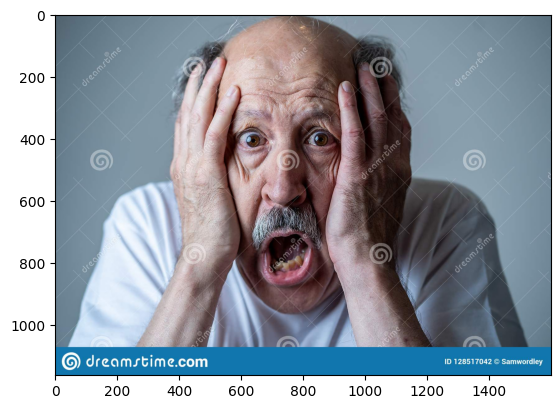

In [61]:
# base64_image = base64.encodebytes(open("sad_example.jpg", "rb").read())
base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAsICAoIBwsKCQoNDAsNERwSEQ8PESIZGhQcKSQrKigkJyctMkA3LTA9MCcnOEw5PUNFSElIKzZPVU5GVEBHSEX/2wBDAQwNDREPESESEiFFLicuRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUX/wgARCASKBkADASIAAhEBAxEB/8QAGgAAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/9oADAMBAAIQAxAAAAHiB75gMAYADABgAMABgA1YIAABgAMAAABgAMAYMQAAwAAGAAADAAAYmwEAAAAMAAAAGJiGCEwAGAMlgMEqQCmaoiM60iVK1ClXVzllTiG18Ss9LTynZ6p5u1nY8dblsAaohtADCWgAAAAATBDBAAAAwByAAAAAAAJghoAAAEMEAAAJggATBAAAIaAGCEAAhggBDQACARDSgAMkQ0CaBMEAIaMwBgAwBgDTAAYAMAChiYhoGAAwAAGAAADBgxAADAAAYAAAMAABioCoKJGCGAAAAAAIGJjusxDgpJg0Coc0KnjclGdQtRqFoojDok5zbOyMtoMigzjZpzK1U2tEWnPVnR0eYWezXkdGs+lGd3NyAACBDAAaAAAAABMCkgVIQAAAAAAAAACYJtCAAAQ0AAJggAAENAFCSBDQAAACYIAQ0CYIGJuATBACAENAmCTDJpgDAGAAwAYA0wCgBAwG5oQ0MAAYAADExgxAADAAAYAADAAABgwBAAwaKJAAABAAAMH0xBNTI0rJauaTbx0mredyUhMqILZE3Cw9IM8tsiI0SSmzK9+qPM5+7kszYamee2SaZuRiovXkLPU6fF01n2Dj6dZtVKMENAAAAADExAADQA0AAAAAIYIAG0JMENAAAAhoAATBAADBCEqQCYmAJggATQACGCbkQAhoE0CYJMEAIaMwBgAwBgDTAGAUAIGmAAwChMRSAABgAwYgABgAAMAAQYKAAwBgOQBgAAAFSUSmAAJgFT1E5GYBSlu8beehjpno6mkUkkdElhM3KocClhitUYu80yeuVNDiY0Uc+e+WpnNFkTQKGCTSOoK0352z6nR4nVrPpEXrIhgnI0UJiAAAAACpAKkAAAAAGIE0AAAAmCAAAQwQAAwQgAENCGDEySpBMEAIYJuRACGgTBACGgTQJggDJpg0wBgAMAGUCAABgAwAGABQmIpADBiAABgAADAAGAAAwBjEgBgAAAADBNFJUSDJuwrFoGtJosrn0VVWdwaIQFAiEAMAE0TFysimBipZ6wmQSSrCVoznnaE551zoy0hJTkBIbRZZldU5E37/AC3Z7i8/o1jaed10Lng6VkJs8UdJzM6nzWbEWFJDVIQANoEAAAmCAAAEwQAAAmwQgAENAACYIAYmSNAmAORDQJggBDQJoEwQAgBNhiAMAGANMAsEAAAwAGAAMAaYAFCoTcgAAMAABgAgDUABgDGEjEwAAAAaYBI1GZ0GEHbnxay9Bz5r16cnbm3beegU86bASYIpEsZCqRKkohCECTkU0zMuSctoM1QkjzNsKDLLSbM5uCJqUkc06lDQ0omqbgR3kjrXLOs9t8dp2Pm1s6q5IO6OXYvTn1Nby0suoZTlg6gEAAAAAAACAAAEwQUJNAmCAAAQ0AAhggBoYioENAAIAQ0CYIAQ0CaAbFIGTTAGAAwoARclkAwABgAMAYAAzYxqQoTENDAAGAAAwABpgwByDGCAAABgCBQsB585NdEPQxxmc61rk65e70efqmnU1nTpClS0mpCkgEJQIRuBaCAQRM2qzppblu5znRRkUlxz6+ZJm5Jx3xqIaSZcoJzQghAqtw0pJlRWRFTVk6w7NCFZteYaa81J1VFFbc+tna8N7C5BtIaqQAAAAAABMENADBAOSiQATBAAAIAABD1MWgaASpCABNAAIAE0CYJgCQCpGLTBgDVggAGABclEsAAGAD2kzH0GOyzHAAAMAABgADQAUBgwBADAAAABplKWLDXmDn25pcKUzb0nJB5xL09vL6s113DxvTSNFBpGmgnSSWTKMKznWBIILzqkxillZq1CrPYlaTZzmriMdM6xWuUZZbY1nNwiQEqkkpoE3SaY5vBDTOrKx357G4DRToIqDSnidOmUpp3eb0129PL1axctirOwAAAAAAAAAABghAACYOSiQATBAAtpMx7GWqzCGgTBAAmgAENAmCAExiloE0CYZADChoQwAYADAAuSiWmDTOiM7LQChMAAYAADAAEGAAK2mCAGmAAAAADGY59uUvKvQk8vP1ONeCNM86eDzK329yXg26ss9L18/wBCN9ExAwTYo1kzNsFpVdmK2zMk3EtyqrOhqgmdFU7ZtKaLM5vOIy1iXPHbFc8tpTHPowITiylIEtIVDLCanLTJK1wuyufWbG5Zpjoi6XWcC9cPPPV4Uw6MNDu9Dj6dZtosCpGAAAAAAAABQk0CYIAAATByUSAIaN4iikAoQCaAAE0AAhoE0AAmmEtAmCAEAZNWCAAYAwABgDTAAYAUty8VqZwAwABgAAMAEGmACjAAABgAAAAADNOl8MuscvomWWvCvo8Wms14/J3efLG+vqnR3xpdZ+b6Xl8u3lez4nvR2FPXNFURqFjGJMaSRGkSzNoyy1xlenPpVgxlOsi5lnomUUb4GGriJx0mXKaRnG0WY8/TzmM652KWhCEYmDkFnarLXn21ibjpjJbpeXs5fasrmnzTtjfY6nPBZvHo+cdm3H03O9Y7WAMAAAAAAACgQgAAAEwQAAAmgAANS8lZEAIaAAQ0AAgATQACGgTQACAENAmiUIYAMAaYAwAGADTBnUc9MFDQAwABgAAwEAYAADUAABGAoAAAMonpz6TPzvS4Zezhvw5rr9rh9eay4fX8leXzvW8Nnp+p8n3LSwl5PL9Lzufo836fxfoGIpq4bV2JjGhok5JFLUmiObLfLNxKldhLU3cllRvlComHGknPG2M0mkTO0RnntnZy5dHKRDmyYtClpBp0JhAEc7c6z0dXN1rValY7WSfP+z4/tWZnmegexwT1WcuvF3S83V5nbc923L0azoJgAAAAAFAhAAAAAAACYIAABM6DB0iYpCABMEACYIAE0AAgATBACAENAmCAMgYAwAGADAGmAAw3MtKgeQwCyGANMAAaYAIwAGKAIAA0wAUABoKubp7Rzx0+N63nTWuGP0ed6zWct+X3edZxc9e0vTsWtZ6YHP5ff5nPt6foxd5IQU2WNgCETGiIVqWZqSJuCJ0lYVSVpN2NoE6IkrMziplltkxcSzi8UXN1c9c86QkK5rNaZoql0NME0Y49HPZ6PRh0rqpS7dHD3p8z6+Xmsa+35pT9Lh7Tze3mzMernaen1ef3az0OLsAAAAKBCBpiGCAAAAAABMEGxldQGYAFEpggATQAAmgAEMEmgAEACYIAQAhpMmCjTBpgDAAYAM1BtBmgYANMqSiWAAwAQaYMaiTABAAYCgAAAyydMs62y6OSI382c69z0cOqdFhfJGXFrw6zt73L3zY7ySebTmzvnxjuzv0RF5qk1dxVjaaCaslzEtKJWpiI1WNq5dGS1gi4g6nGlhILJmZsk4nQRSKbzXDk7cTjNMLB40ineDGNsBAIwBpyZYb8+p6XXxd7VFNcdFjHdwLO856MYs9Pz+Spv0vN0ozvHW439Xy/Q1nquXc0AAUCEAMAABDAEAAAAAFgNBmAJggCpKIGgAENAAJjFLBACGgTBACABNAmGQAwBgDABphtjsEaIIQAMABgA0ypKJYIAwYK5GAAAA0DAAAABtIm0zTyuvhl5+jm93O/V1FNZcnZxpyZnZqd+2bzvTn25Ey43w47Y/ReH9ClNO5TVisVyyWAMhaSZ565SpMDPbIBoyqslUyzTTGzbN0Yz13HH0NU4IFkZLXn68yJ5wmefQh64sXP1c0Zo9GvPv6fns+eXdwS58/Tz3Pd6XlerbYKbMurGzi5evGTgaVxrpjo1s0S3JtcadnF1ax6Yq1lhQIQNANAwAAAAQwQwWmegRpI8wEAACCaUAKhskAEwTAJaAAQ0CYIAQ0CaAAQBk0waYAwqQZSF0YB0c4wAGAAMABgA0ypKJpMEAwAAAAYAAAAMVCHRDhnPx9WM0fReR72daJyuXB2cZwez5ntgVM1HD0eZnWXF0eZN+v7nn97Ng7C09Zwh+Vjp7enl+ncCosIqBZXlNVMhUFApgaipW3dkawJtWN1WCzl0WSNDGVvmvIywvmSHGqbqNCOfrxjPJwvV7edanRw+l525w8XXhz1yc3Thc36/jenZ2C1bmWHHh188nmx089xWueq3pncr0i7H28Xo659euW2siaAAABgAAAAAA0AMJ2yRtiAAAmgAQAVAAAOWyWAS0AAgATBACABNDQyRsU1JkwBpg0waY7mRlITAAaACsAGmAAMEGNagokGgAACgAwAAAAGqGTuZ59XMc3L0VNdnrcnZndTcHP5npccvX1rSxY6YRzef2edjtnxdfmn1PTj0JVzrrBlry7hzd3nc+nl/SfK/TzXRKN8gklXP0TLynTmuMXI6zxN657NKgNYzo0fLBtzrojHp6lZzK+ZaxnIxnWGcM+izm1eR0Z4dkcWO419Nj147zjic91zYb82Zz5dfnsvr4uiz0urh6V6Jlrly9fNHJw+n5lzprjoa3nUulZUdXfz9vTlprz73INAAAANAwAAAAAApIFSEAAAACGgABMEADAcNkpggATSACoAE0AAgoEBI0ZADAGDQpJRpoVLUKQmANMABgAANjBAg0FIpZAQABpqAAAAMaEHbx7FclCztnud+0aY6OLyjluepbqCyMNMM65eLr48dePJxZ9Vthsmuuc9ObibtnyPQ8jn0876P5T6ua6K1euWC6Ecdbi45aZrMVnGtcmpee0GBszme2hz9GrShup5gzefn6OMzxvkq+jETdZZp1OLMcuiJcds219ZFvpy4ePu4s9uLn7uNnHzfT81iNsaufU7fO9FrWdJrLm3yjHz+/mTm1y0NampW1pXoeh43ra5Z9PJ06zqRQAAAAAAwAAAGIEAVINUhAAAAAgAAExiQAAOSiBpABUACaAAQME5ABGk1xaYAwokYAMEGmpUsCkAAAwABjBAjAAGABUgAAMFAABgCAAGgyqdFXXyennXTcXNPHTCWenLdJnTKsMdubG+bk6ObHXzt+P2tZ9ffPfWKBaznFcxl5XX5XPuvqvmfo7nZuriRtJjSVjm6sZcVdryY9fNLXR53oWONMBbY9wBypvoMaMbMsNZmuBdVpgnonnPbAc9AcT2wlrNS19hph09OfHy9XFnpzcPoeeZcPZysczTvPs9PyPTdO4m7Mubpxjkz2mPN0zqza8d5dFDrT1/I9TXPqqNNYG0UIAAAAaYAAxAAIAAAqQapCAAAE0DAEAgAARALUMEACaAAQME5AAQAhoyaoKSBpoA1AEYCjBCpahSEwBjBAg0wABgAAAAAMBQGAIAAABNGFBNaex5vp53Tkmqw2yTbSKseWvPGPNtzY68vPrhnp4/0Xzn1WufqXN9MOVEk8mvDnfN5Pblnp7no579OIiTV50lZ0lzzecs3hvLGHZyCnqyN3VWcPRGWdaFTZsZzW8EJWee0ufP1cJnMNOvm6SzzRKUlwt8+zmva9Xwva3jl4PR4pvHy/S5U8/HqwZ4mnrnr6XmehOno65XcvDomXgy3wjhnfOy4INdIqXX2vC9fWN6mt43eVpQmAAAA0wYgAAAABDBMAaAVIQADAkAABNAAgmlABDQAIgaiECYIAQCCaM6JUYINNRpoA6AJWAgwUqWg2KSMAEGAADAAAAAaagMAQAAAAAiUS63mtu3l6MddFQmVRqVclPm6OaObm6OPHXn5ejhzvm+1+c+n6chXlqPIxzc/O6fOxrg9vwPpdT0bwvWNpxmzWuXorQ5msp8mda9HHod3Fo83SNcE6ZzuxYaTLcY6Ua8e5ty1SLp5o1N+M5IjTDJO3PklaREt3zONdc7muj6H5b6jUfL24az53H6XFnfm49WKeUNa5X3cHVOnr3jtZSiJquXozk5eLu4LAaTVFyz6fmbWe3tzdW+SvPawaBgADBkjEwAAAAAAAAAAaAGCQAmgAQTFQAJiIAExUDBCBNIACAUTSCYZAKwEYAMKGnA0wAGAoxg5BjQAwABpgAAANMAYAgAAAAATkWioe+O83rvydeOmoy5xbJaytLXPcHLx9fHjpzeb6UZ37ner6+ecNudcefbkzrm8b0/Emuj6Hxfe1nruNLjHDslcFqCxotWeknPGmM1t6Pj+mm3P04ZpeYk53guvD08lm3XN2Rc4BlPKvRypSTjoWTNBlrecJ65rbHLf03yv1Fb5b46xy8nXhnfncfdyHnYdvFedb8+rXqdXB22655KWuHbCJimzzhVULSM989Df2vA9TWO5tb5sAGmFJAAAAwAAAAAAAAAAYCQ1SEAIBABUAAAhoAYIQJoAEQAhpRMRAGQNQBGArARgA01AYMYIEAalSDGgAGAAAAwBgCAAAAAAAQ0OpZfTltjrPZx9s1qqi5yaqV5a5kLTFrk4ezh59M/Y8z6Sxsnpxz5tebOsuTbjzvn8f0eRfV9Xzva3zqqaKXMuebnOsTZUpd1hn15rz9We50YaSYszis6DDG4s7DmLNON8UtY3uZ6u0yrZmZ6XnEZ+lznFz9OK63Okcv1fy/1FdEXGsc3L2c015/J6XBLyeb6/lMK4qvQ7PP716Oa8lzRjEpykBdSNw7xo0252fS15/odeIAjZIwAAAAYAAAAAAAAMBACaCpAKkE0ACCaUAQTaoECaAAQAJpBNAAIBcmmDTAGgDABWBRScORgAg01AB1INUgAAAAoBAAAAAAAAAAAAHb04dWO3P1YdEXjrz2F51LTFWfN08k1x822fPr6nop9OCzrIy5duTO8ObXHO/Nxy6NY971PP9DWdpyqWuDbx8b768aE9xeVvXbrjpqbVhRdzrK51Ry575kTeZhnvy2LPLnjbDKzo1yzs3fBmept53Udu3F0Rquf0V8nm9HlWdMaRe/897tei5rWObl6eab5uHv45ePi7ednia0uent830F1z0zM8OnGXGbhI1ys0RZE1BTGvR73y/v759bJ1zYAwAAAAYmAAAAADAEAAAAIAGgBoQCACoGgmlQCCYqARDSiaQAEAomkyaajTQaYNOgGDHKIAaYADAAGAAUgCkIKBAAAAAAAAAAAAAAj0urm6efbDfHUvHbjSt8dlTFZlxdnHnfD3ef703sTnvk8TDOlxb8uN5cfR51vD6Hn9tz9H0+WXPqR5/lnbhl1WYz2VZyLaZdu/wAxTXq5aks9vndNdVGyceXXyy4zojm5OrzznxvFI35ui57OOs1x9JUmmePZZlj1Y6X0cWeb9F5q6c74Y3xVez4XsWewkazHDvwzevOcsZ82mbPJGmNxp3+d1L6ExROOuUuUXmk0g0uGaYaqwZU1Hs+T62sd6a3yYAwAAAAGmAAAAwBAAAAAACYIAGgFSEDBCACwTUACoBBNKJiIAQ0DcrkAjABp0NOCk1EFjAgadAEMBRpgAMAKmgVSAAAAAAAAAAAAAAxno9HPvz7Z65aj5OvArWLJlyZ8XbxTeXred6KRN424YbcmdHNeUZ+X6HmEbYlm/peR1XL78votYy1183pznhfkZ16G3lGN+pvxatV6fBvNLTMPT6uPruZ5evGXmnXE4fO9DzZcMtMky1zu5rtyg6NI+g1nPxOvo6Y8Cczl003yUum+OVvs8vN243yex4vv16KuN4x5+rmax5ujHN8vLr5Wcefq5bmunm2O5zZOOuUuUXKIVDYxMDYER7Xi+/rHQmt82ADTAAAAaYAAwBAAAAAAAAACAAAVSxzUiGkAATQACGgTBACABjWASZgDAGBRSqUSdg0wAGADTACGAAAwBiFKkGAAAAAAAAAAAFEgAvqbZbc+uWudFRcJZNEzeaxx9nHNbdeetmOHbyrx8vbxZ1lDiXLyfW8klBcvt4e2vX9nyPT3i8Z8rfPv+Q9by8a06J249V14dG5wex5nqTfeuvfXPm3VFY64xhz9PK1w+b6fmS8sXFzG+PQhlnqvt+nwdm+fl9PJ5lnJd3z3oryzrWLjWuboxTPo+78z9Oveid5jDoia5uLp4s3lmsWcuT0PPsemep1a47EZa4xMVImmaXn6R58dXKW0F+34Pu6x1gb5gAwAAAAGmDTBAAAAAAAAAAAIaAAaEDQCaABBMEACaUARACoSpNJUlLgAjApsaiBBgDTAAYAMAAGBADoAACAGAAAKAAAAAABRIACqaX1NJfPrN56lZ3FlOaiYuCeLu52uwqWYy05msOTp4s6yzCay8zu4FzTnWNPa8j3DbuqdNfE9haz8se5w87x139UvmV7HNbx+nh0nV0cHTc6XGqLHXCXLk6uaXi8/t4jnx357KuGnTepbp6fN1ofPfQZV86vZnF8vX0Lt82u3lanz+jnivq/kvrLnvYbznhrhNYcPZx5vJnpii5ujjZd1FdtYbEZ7YxT31PN2O4ylyacNwU0yfc8P39Y6wN8wAYAAAADGCAAAAAAAAAAAAATQAAmgAAAQCAAgATQACoSpNIACAMgYMdogRgDABgDTANJY06WYGjOae7M5WnYAABADAAAFAAAAAGIAAAC89F9Ro59Z1iysdMh2mKbEznWF1loz5Onlmubi7eCayc1NcPD0YWE0rnt9rzPWOvQe5c55xvHPjL18+Clznp0MOnJV0+hl1XAPPNMN6Xlw7OSPP4fUlPDw9ryVidCzo38/vs10z1XW8aVZaRLEzjLMW15p6sTH6r5f6m59DPQ1jn5unFrk5eviy5cdMhcnXyM1vhddGsaxGHRzl6XROkQTmARpAwY/f8P6DfPQDWAAYAAAxggAAAAAAAAsjToDFaNeee3JOcAQAACAQAVAIACABNUUlKILBNQACAMqTVyOwBgAMAYANMvsyqajnfYnOdAcnU+U2w7eMQFgBA06AIAFAAAAAAAABNBcbS+ix46jYLHbCW7Vgrm5SErCDLl6uaa4+Pu5JrmpxnfkEvWCn1HZ0Zbnp7Y9G8KOhpwLua8N9AvPhXJnYub3k30C4iTSavk6+JOJ9WWdeXxevhZOHN6Z4dUGWpFnpacfaur0DHLqg5c+gXn0IjlnTBZ+k8H6Gu4lawufbFebj6uLLm5t8BcvVzsmuexto0KLReuOR1cbQBQpqSkw39/5/wB/fOgNYGmAAMYIAAAAAAAAArrypYxOpMDcXm6DmTbDs5CQAAEAgAomkAATQACABNUJqAAQBCTBp0NMABgDABgduWuU0tM6TnL6Aidic7gzAsAAYABAAoAAAAAAAAIBdnJ6ed3pjvno0xIxty3aLAMxyyWobMeTr514uXr5M6xx155vydM9d8+juz7Zef1/L91OT0fK9SzapdyCytjBcuNzyX1TXR6RW+Ti85VrjsLDo57Ofy/R4MdPO7K47nZ3lXPz9XNFSbVn1cWx6G/m9C9OWaLyMpdOboCuLbU5PqPnvqK0x1jWOfj7eWXiy6OeOTDfCFhoWT0Rqak9aHH084YQFpMpyxjCXUmn0Pz/ANDvm0GsDAGMEAAAAAAAwTATDqz0zlVw6wK3QidVmKlMhoAEE0AAJpQCwTUAAgFE1YJggBALk00GmDTBpgDAAYB068fbNcXS8E3yz1HWnMb822AAWAMAAAgAUGgAAAAABACNvR5erHVa4bZ3QpuVrnrBNRSilCudFI0hMufoxXm4u7km+DLpyzvya3z1j1O7LuTi7YzNjr8SX2tOW9Z1xnGXLl03m8/bjfXMU1Ys6Us1Er2ef381zhx352OmTOq55duPos4UnNT0821l8/fyBpz7GpNBdaS8fp4br5Pp4bEfQ+T62o8qwsOLo5owx6M44eX0eQwVpHvj0m2ECLOdDnLzHVQUILSZTlmn0Hzfu6x0ie+YxggAAAAGCYAAAAAG+nL1LydDwTbONBvTmXbn2wQTQAIJoAATKRUgmgAEBAmgApACAMmAMAYA0waYADAC4Z1acJL358oUk7AAAAYABAADaUQAAAAACAAA79cb59jbC5rYSuXthsKLglq5amosebUsc9wufPvjLw8/TzTWHN28dfSdvL2XGHP3c813+D7nlw65eyzcro1nk61rCm8Fq86HILm2l1y04rm+XHz8734ISMQNCFrjqnYo6K8+tsZd9MOizdRodHB3cOdd/n+r5ep7nTN6zOemRhydfPLgryjnw3lcMOlM9PG7TmyYXrjsY5a5Fa40hOmS1WbNBSae14fq3PqsfTkJghgAAAAAAAAAAAA0HRpxo7c+ZjQgAAAQAAIgKGKUQIJqgAQECaAAQFCuJcwLGAMTGDE0wBgAMAGmAAMAAAAYAABQpRAAAAAAAIABDR2XzdHPs9sqmtpcJrUaCl5WGmGsukUVmExnltiTjpC8XJ3cc1nw9/mH1XoeX6es1j0YxXL1TNeR0PLOu7p5evWKuVZnGnO1pWGpokA5pJ4uvnXl830fPl41cogQSQPbl3s79+boJw6hed1MbVlsazUta483fZ6153rmstcjHl7eaXmx2UuDqjPm15k5SEms2zHXDQeeuJQhBwgdRWiTivW8n1bPYMK6ctjNlksYmAAAAAIYIYIYIAAAAAAQAAAmgARUJRBYhqBNUAQhoE0A1SAKtxLzgWMAYA2gpNggAAYANMABgAADAaKJoUogQAUAAGItWQUyDWjnezMum1no6Ucuu9RVmjKsibyg0yF1M3TyIHFykYdOUvBh3cU1zeZ63lr9B6/z/uXPRFyNWS8fP1KbveNbis3Fk8m3JN31eZ3HSouxXnpZPLrivP5/o8ebwRpiiJQs9MbF0cm6ereHQuhFmM25XaRtM5NcvueD9DXoA9conTInk245bjOA5rxl18/TmSRCdKmznYioqRkljloeuVQVcD7vM9WzpM1c7PArpviad1cDPQfnVXoPz2no15tnoHHrZ0LKixMABDQAAACaAAaGS2hJpAChNQJggKE1AmgaKFaWdM0Zg0GmAAwoGktJgmmgAMAAYAADAAKErSqJGkB61g+rQ5uvbpOfL0Ml83TTOzap1XBa5Jtz7ZzWSvPj23Jk2rG00xpLmtIErS5F5Jqh1E7ZSZcXXlNed53p+dN7fR/JfTaz6RGiO0zNaoTkJzfMpw9OE3fo27nl1bU0L1jiw35pqebfnl4efrwTmW0Q8OubPP1VXHf1cG831POl0kocEyxJnLn9L4n0OppUxrGiiU5+Tu4peONM4U6ZnLhrJmUJpas5QCoaQTAm4HcXVKFGnq4b6ypcgIGIG5CiQsgNKxpOh84dN892dW3nXZ6NcO9m4mIaAAABAAxDSokBEACaoAEBAmgAENqiShUkyaYNMGqGgAGDQUmCAGADTAAGAUgEAD1M9OjpMunS158evkqt+DoOt5a5uPD6fLZx9XFtZ05UlU1JlcVw9GqZD0i9ZWekxktLXONEZTtIpaFjpJxc/bhnXNlsl8T6Dxeyz6Pbl6rNrirCGSzDzWcbyl5+7yPfWkq1mQZTHrPHydmOd8ePVxy8mGuaPPVRA9DLg9Dzrnft87rXr25tV1aZCcy55aYy+362HR05yNJhm+eXTlMTOLmL5+rE4ctEkUMsuTnGhDlAAClSUsrXLrTruZsSuAaABDEwAAVgiRVGhdRNmzy1C8mnX0+ZtZ6JhtYAAADECAQ1Y0OWRpBNUACAgTVAwJCBNUNIzaYMoBANMGmAA2gabEAMAAYMARQtunrOXboFyqZOisdZXzdWR5ms57z37cu2b0Z2Z15fP6Hm7z23zdATQctxXHtrUPOtHF6yUnEJSZjtYnTANgsjPWZeTk7eSa5lSl5+Pv8APs+o7PK9WzepqxIJcs9eeXPKuZrj9/5r2V0WfkS/Vrl23z6ZmLM+bTlzqeXbjMJbAjkTuji6JdvO9Dzbk6ObZPQ2w2bu4IcXmuWmHoHua5675zGwnnc/p+fNZZaKOF68xusbThz2yNZz1GhEK0igYFIMxUAw9Dz/AEk1hzZVZgyoHIiqmglMpJDSRW2WiJBRpkzVSy6w1TXr4as9OuTpsbaEmCAQTVAA5AEwQAhoAcEhSABNAmiAChAwBgA0wBgAFIGgGAFACAPQw9Iu5U1oKpcsOvDWY35tjeW868/k9Dg3no6OPqOm8ds6w8v2fNs5evh6q3c6JzVSx0kZz6Z6xCdtcXTcmW2SwTZCpS0U7FOuBz8vTzTXJG+MseZ6nEvpe18v9Nc9OmdAjMXJvhNY8HV50uPq+V9FU+f7fFbwethomkxFycpzy1zVij5s8kcUXJ05a56Ty2rmNs9bOzpy2m6cuDK4Xn9vw/p7OnTPTfNq8Ey5NubO5jFwcXbzJjrAYYbZEitNnlsrx35LJtVCzaBNUNOD0uLtsETYxBVZobjQocDmQYgHOhoqzsbTECHedS007LEk17vN2s9Mx2sABAIJoAKE0CYIAAYpaAAQAhoE0QAMAYAwAaYNMABgADCkxABUdR29UaTWc6Y2bac+0t56KXlW+Gs9F8+8uPB6fDZz9XHvp2b8vTi1w9/KePos9Xv25t2XncZ1m3HLtpNNAll47ZIqHUaTtLmNpGO8W82HVzy8nP088RhvE15/1XyX01nquLsWWmcscvV57WPBvyy9f0HD6W8XzbFcnQYTW+HLvccHH6MR5PH3qOEvCzQhGkqlVlxlO/NZ6fTx9k25pSrG8TT6Lxfd1jbSXrDzuDm5OnkztZREaZa4JnT2PO5+3jM7Qj2xsrC6JhMQAk1QNHT0Y6oIVjcg5TK0nUnO8hCYNBWsahnU2UJKCqHQUOaSri0yqQ6+7yu2zrAsQCAAgKE0AAhsUgCagApACGgTRAA2mAAwBgA0wAGAFCGIKmkP1OP0zVqs6jLfOsdsXZ1PO86Md4ObfJ6ztx9mC+dZOp2dHJ0ZdOOsZ15PJ38OnT1cXXZeW8RiNce9OGm5AZspKHFaQEFy6eO8nLz9POvLzdfPGE1M15vsefR9Rry9JOdwufB2eevLlekvvb5105zWNi8jeEfJtkme/B1npYYxc+fl6fPL5j6uZJtVNavSVwWyM/R8nvmuwkXPn6OaX2vV5+jfPS5q5M7yXHm05s6y5urkjQMkcoM+Xq5jNJJVxYs7g1zdEDQhWS0zquK1BCRpSr0z6C2kkZ3mAAUrNLRZmJK1Nw7ToRKXokjrN05cxrthdepfJ1XLTQArAAE0AwJAE0CaAAQAIATRDTBpgDAAYANMAB0hQTQACp6Dr7ct1Kl5pNpcMujDWdduToXUVYuOHXz6lkann5dXNqa9HJ0nUKsa8/z/AE/P0ns4uuzqig5nm+PbWGQ9I2M50zTPpxqrcaAmiocphh0YLhxdHLLi3E1lxd/mH1fd4vqmuWmS8/m9vny593B7Wp3ujfPLl6uZOSdMLMKW8vmXPPHr5FazydXH7MvB5/bknLa1mnG4sYdHLEXML6V8+03F5dh6/Rl0b53UUk47YLz82+Obhh085gxRVrQ5ebs4zmdCVAxxcq40zTXNaGVywc0dFTWok5EizTXPRHFQRFSNpj0jUvLTmsqVcpqACLFQFIqwKZmqzLIk7PR8btT0CauQCkAAMJAQAJoE0AAgAQAmiGmDTBpgAMAGAUIAAYAFF+jPXTpTnWgrlSpE5bRZy6qNTrvm2zbz0JeXaasw5e7jsz6OfWuzTDfN5PP9Pz65url3XsvPWzkjbLn01VZ41tedji8rDPTONNoLBFil41PNeUvLl1ccuMNKed6PHL1e58v756ONYHPxdXIuX1HhfRb5memesYUaHmVO55+azljk7+FOzfm6bJ7+Oznx2iWKVS5vTFbxNZcuH1vLOvq5dJvL2/E+jOrow6N82xIuffCa58N+WayzvNIVzEdGVGfF6HGc0jQBqmwWemSMTNMqZnrnvZo06UUgqNI01l2GdZkoB0mVtlqZ89BWqoEiw0TJLditUOXCRDSoAemYet1eV6dzQFiGxS0AAgATQJoABACABMM2mDTBpg0wAGwBDAAYAurl7D0dc9FM9Ilrbl6ClSzpTasyx6s7ObaI1Oy+fbGpnWBcfby6nPSVnXvy9Mufn+l55xbZ2vZrlpZHPpPPes3ON200lOaVVUJUrKFBOW2ZyxtztY83Tic0XMqw3zl873PC9Oz2pw0Obn3xl7fd8j0+nEMs7nTn6ONdMoyXm5XjL1cJoVtpoKVyJ0Z5i9eHdwHTx9vHKaa5yrg9Dziujl6Jt/TfO/RWdHRhvrDTRllthLhydPJNZwpjWS0yuNiPO9HgOaWkpqV0cWTnpCJNDkda649SQMpZkl75dBaqEjOoBjGAat51jqtIcip6DQaEpJ02gUXkIHCB0hhp63i+snSD1kkATQACABNAmgTBACBgErDBBpg0waYWkrVSg0wAGALs4+o9PXHZXNEvNtGdna8tM6csiQjUXP0Z2Z9GFnUTedTz9OVnFOkamnTydMXwehxLwus2uzbDe5yjTPG95a56ockg6tKhoSE0iAkx5urlXDGoMc9spZm5l83fOK9q+XYUlnu49XP14a41zRp53p8anP05zXn136zfDfoRXD1xsmPm+jjNeVn3ZydvJi7OpcnWjDCV8XdzGOsXNdP0Xzv0VdNxesMlE43zy48+vPKp0a53bTnq3GXD6fKeW9chTcF1nYs9ckE0Jq61ta2Xg0ZNVGvRj0WGd5GaGNjE5s2z0mxImV1DNHU2AnY2gaSHnUg2ySkJgT6fnd6ejI9SQEE0AAgATQJoAQAxMSyNJIAwAaYUIYmFSDKkABgC6uXtPQ1z0abDNjDpysz6uDqrcTxVGk1hG+Gst5aVrtz75tZ6Tm8eXTz9Mro59jp4+3kzeDLfC3q6OXpseGuGNdEOee6zVKaJ2NyxpyUiBQSRx7cpMaI589sZVFSvDh0cyeh08HW1Xf5vbc+vyvq6ceOsKg58eubuMNJ10jlxl715U2erz8uMdePBCdr4Uz7C8322px9HmODadLkxuUzYprf6T5v6RrW5rWJUyLk6sc3A6LOLToRzzrkZaOIvNynm8vdxLAMmkjTLXJE0ydY0s3EVMVBTjaNtZdk43kFKhqpDXPYcPKnMqL0m6rTMRlTYIQU8wbsltCTQ+jHpOLtw3T0Kl6yIATQACAEACaBMAEqARpBIAwAtACYNMAB1IBSAEHo8Hp103NZ1TRK5oOJdPFvPoacnTm0mSxltFnItefU6t+DsjcTxvHl7eXec6RZ2c+0Zvn8/Vzaum/N0JXPvjjW81PPoraS5d2KbzUdIWesmUa4GOW+JixHNjthNJOV4cNc2dOzj6Wr2xE9no5Y6cZd8UvSnyTrPn3xxrmapmNCQIdvH6Jzc/XRe/JB7GHN1t8uXVwpp0cnZcQuzCafueN6s13aS95zz1zkFdEvVGOOylxw25zKNMobxzMObozMGAlcDzqEYnVXNpqhVCaHvj0mqrJM5KHQCTReklZ5rOK2jUdJ2NpjrMp1pkk1TEDOjPfM5uqUPGsYfRy7V61Z6awgATQACAEACYASoAiAEASAOkAJg0waYADACpAANfT8/060tPOhjlGmLl65s8/r51qeg8tMac0jHm7cNTh6sM7PW05ejGjn6cU5hm50CvN4OXs5dI35ugvJ44101PRz3GgWUhkLeCE2s5XkTzac8rhQGWrrhy6OeWR5r5xNs3tls1rWSTvvg69459uLvlrg6vPm+aAc6qamtcmqgKRaP014tp6aw4ejCWPS83dPU5uvBrk7eW7jt0Wi8/Xi8691xesxntIqGlyCZTeMuHL2cUuZNrGXXCcUbbnn9PociNcQdHD19Vngvu4V1oSaJzUAF9fN1D59edHomMaJas0y6OCouN4qlVDBGliadOetiqQEABQadGAlOIS0GuVHr7c/RrKAQTQJoABAACBNACAAQBNCAAGmDTBpgAMAAAAO30eTrW6mpQCG5a0hmPD6fNrMdXm9R1k1nSy2k4uT0eTeV3+V2HfBWNck65bztrltm8XL28mnNvgl2iejnvoWmOK91Vjlsz2zCVeJOOuS5ZXlKTMG2eeNTi4mljvxnLS2ZbmmrTQdvA7nXpwzXTkomuSdM7yq87aapC0XWaZ27ek57s5steyXg7K6o08r3vBahOGe3t8r0S8ujml97Tm6NKBXLYSASLLSTDg9Djl5WyNYYY+lydScXkdnWcmi5g5vV5q6PK6NE40BrOmdQyzTpx1TGCwYxJyHRFkcPRkVqrBhTgwDfPsRhNjSYUUT05MnfLImakSaBoPT6+DvuQCwQACAAQAgAQAmgBAASAMAGmDTBoGAMAAA6uXrXs6M9SmEoBACqnNSuLRw5d/DvPXv53bLqmZufL2Y2ebpWO56PRw9mLGHVzVpvz9Ec/H3cdnBLya27eTs5dN89cTfPXMI25zqx0yNMNcCcnJlhtnLlm8AxEsjarg7ck51pFjqalaUKrxu56tI6WsY7uZfO5+/hZWkWjBnpzhda4S121O9PN001zcu7Lvu8/B9rxVzy1zmF3+b1p6uFC93b5PqW6OLuG1SJNGa1yMOfq5JeadlKi0l2tTyevz/RTwtX6J4vteN7FeT3cvQnATVbxpBOi1qy8UjWbENE05h6RVceq0gYqcGMDnrqrFciAdJldvHsCMBy0kxpCpNAgO30fK9S5oCxAAmgBAAIAQAJoE0AIQAMAaYNMGgYAwA2klrp5e6zp0m1oDNBoQFFSynLlMN5TzN65Nz1NOLpzdItS8fJ6PJvMd3mdp2c3Thmx08vTU8fdyHn8nZE1rotee9ydkwLxVNalZ5sMrxFFRLly68pOTzUJC0uusub6L5+5wjpxlgqJZioI0z2s6+jHob6eXv5K8/g7+PKJ6qY0OjWzzpPQrj6/TM6emGuXJz9Hn537XrcXR3nk+X18eNnP0YOeO2VnpdHB2Gft+Lsevpza6a3Glw5ZE4dGJz4dWE1ktUTOhGHVnScXD7vGc/N0tOLs08iunDTiHrlvZsrVho7p83ThFlJJdwsDZU6QmdCUkwgg3L2VWCCwpUPqhl5vEQ1YqklMunmEmEjRr63j+pZ0AXKBiHIJoE0AAgBAAmgTQgAaYNMABgDDUz0Il0l5mvp8nfqXSrOmBABSYgaCnLlpDM+Pvxs87s5jU9KufbNXP1ZHn1rzanqmPRm822VWbcnXyS+dtOmd1rOmdObxCccpegyumSiszOSufTlXPneaqBDDQXp+X72s7/NfWfM6xzQXjphGmUsZ6QRvh0Wd3Th03XRz9fK15XL6XDnO/bw+uz05885ehOuMuWWEzoa5ZavVjXqp0I4el8yJvMWOubGNJmvVwdR0YXmnvdHH1abPPSzRRaGVzGePSlxneDF6zGcdELxTXLHRlztOPDoyTEqaOrl7rNKjXWauqswz0co7gznSSKKHnecKHgpkbQ+hXYMQB0Vj0EJslmSwsACU0XnriS9Iliakfoed1J6jmtZAQgATQJoE0AAgBAAmhAA0waYBQgA2x3lJvALz7LOzom7XU1msAABAAmhuaKaJRUjl4vU5NZz6/M6K9BZ65vPy+hy2Z+j5forC0yTfm25149c9eXXXTPUnHbmOeGprSodyIkmKzlXJtzmWOuCjVjANfocte3Dp8P2uaz5bPp4+Pffn6+aXLPSCN8dbPR6eXuuuvg9Dnb4/N9vz85w087vR+jxaW98c+2by5903fJfXrWXoIsjyduSXHRNzjPbmkmIo03w0OlFWej3fN/R2X0c+46ljmiyE1E56ws00KbiOTh9DhmuSdMUiCEmdEmffx9epfRl07xqazqce865uM6SZrSSKCM83zzRi7g6S6GUkokrp5e2hacqMasGAJyKlReW2RFZOWZvIe2Vnr7cnTcgKwABACaBNAAIYSACaEJg0wAGAUKyQABF+px+nVg5XScoBAACapNANBbipW0Bjsjzef0uHeduvy+s7cbebxbqNTsw3wzXhrzKrnXn0dJE82uM1nGmdi0zaVlWQ83mq5tOeFDazSYd3B7+8ejjtPTlnph02fPeR9V89y68uvP0Z6ck75RDkOz1vF9CvR3w21vg5vU5s78fs2tHHTjNZdOXSsFUruZs6eA5mcsXozWTHPHkvGCp0WtY0NqnKzn9zxu4+h0zdm4rRJzSG0iLmWGhQbOXg9Lz83gy355Ylq5SGiqA9Lq5Ontz7s98Lnn1VrlOsxlOkSznpxy54tynUWgwCXJanYhssdTVAAwESaC5svPWbOVNZ1m5YWZnb6Pjerc7JqwBAAIAEAJoGgCksoElpg0wAG1QJMpKiWtzu7cdlTGNhKAACASGSFCB1IW5qUAI5uzOzyX08e539PmdkaY9OMbZXkvOpvG6ubzomoXPHXKXKNIFChNcoVODOJypE5uVus9A+l8n1OvLqcaaxy7TFmvi+9wTXzHP6fn8e2uL0XlWig6+cPW6vG9DV68dYdMnEZ3tObrfs84ue7HliXbLKUvETGkRDF4KJXldmWqsdrUri6eazbadT3NfI9izXTKrNM6kE5QcqWUxXNEYcfdyzXn8/ZyRjGs2YlwiVJOn1/E9fpjsis941WqswnbOXHPXOXHzuvjxo6luJMFLkAtRDs0StJYADoaaIbDRXYTUnJFRnSakembH6HDunqCesiaAEAAgAQAxKCSNMWGmgANqgSYADEFehwevXRScoBLQAADTJZVzZmtJshpF1kzasrlsTlEwx4vSw1PK6Iz1PUrj6splYSjV8+t0As7RnnpiufPrzy5ZGRsoSUi6jHSIyGKUu6z0tcr7cejfm6EXL28ybY1ovi+R9D5uOnidE546XPTykWiXXXHY69OWq2zM1tZSu2eaTZYwb55JLE4MNBYLZDsi5rSyNVlZhrn0lt4ofT/Ke5Z6OmV1ohISIQCyOZbQ4zw6uZeLj7ueXkz6MUzy0hJtyk+p5eup7YY9Ofqq51mMejI5sduXOuGjrzomkSnMSVZKZQMRuWaKdCGFMKQp1YwQs6xlyispQGDAe/Oz2NebouQCwTQAgAE2lSaQTQNITQNqgQA0DAAA6vV4u+qJqVgS0AAANENAqVFmc6zWSuLHWbN7x0zbFUqmkcvB6/HrPH0cdV25Bz6VrntnRNZhKSk3mmPB2+dNYZ6QO1rY3VJzx0ZrypzLXseX7fTDaOnPfo5OlNstVHJ2cXTZhwet5015Pn+95nLrzwtZrIolNIo31x0LGjLPoisJ6JMJ6VHPWwZTpKwtEZ1WpnnvmKi0fF0RZWyhDBAdvC9Z+v05t1NE5BMrM0lYLmCkzPHWJeTm7eeXj5+7kOV6ZJJUkjSejXm+p0x7GnL1dOeeO+BzcPZyY2aw5VLRNVZMXKJNA0xiY2MtGlkWOwpMIeZOTxzqVSEwBpgAdfo+R6lzoBYgATQMSiBEAIAEAmMcgDTAAYAXn1noby6dTUrBysagGgBUwAABMIjVGC1jUWmTN7w0zdHLlWes2ebyevxqqm+e70TWZqBTTM4vE5+Hr5JrndaCqiy9FaZYa8q86HL2enxdvXlQGs10c21nXUaRxrfjs9Dj7MZfKy6cJvy8vX8/G+dXONDKWtIZq4YNTSLCadRGdu3ONpjItoqKM87QU8rMtUh8xVyipsROh7np+P7K6jEkpQTciClzlwrilGOPRjLz4d3Eefl1c5I0imgnu4iz6TfCu/Do5ujlOXn1jnsRKvR7WRlpCRNRKIFGNClQ2Ox0nVipJFIY3zypFy5qpAAGmCAr0vL7E9JBrIAJtCQAmgTQAgBFSAwAaBgAAHp8Hr1uS5aqaFU3KwcqAECsaEUSxgAmEzaMp2zsmpK2059M3WRS5clzNTrGubctEpiyVFRy788YYazNQrVgWk0qIMePfnlm46K9Dfn3689ALl6ZXZ178vTC4PR4jTXh7zh4fV85cXBNcvJ7PHjXFUvG7FS1SoEmTqMQ2Z2giLgahlrSCGOycnCGFXZLasWbgOzD0TT3fF9Szracrz0zlaZYlRLjG0mRcLkXMYc3dzRwc3fynPGkCmkIBPS9P5v6Drz355nWcZeWNrd9VkZ6Z2RnecspzAApSpHSdU1SNipyTFxKIzuZV0ZddnFG2MqAAAAA2xo9i+bpuRisEIABAAgBACaAAYmAAxMAR1ev5vp1E1BrfMzqrKs60JqAGsgWCaEAAIokLJYTSM50iyXM1tCwzpNPnu9JsJqFTTqYrOM+fXCWcdMxXOtji4FlWZy5XEr7OT0dQ6eXp3nWorWG07N+rk6I25unI8z0/N67NuD0eWXy8unmzutuWjHl9XGa4LJxu7yqLuaBRSzpmrNlAplci1lxWbVhnMWOK0uZKmycqiWaOsvtXRvGPZ5/RL7Ti86cURKQrKLJmkYzcZuctK8tYTg5+7ll48ujIyVSSCSvQ8+rPaxePTBtfemeeuWpnneUs51GappKmA6TSqmqpykuZRUkSggqXQdWO2s8/L3ccsDUqABgAKO30fJ9LWdEFgmgBACAAQAgAEwaYAA0DTR6focXdUY7ZEUTW2nNUdV4aZ1oS5WmEqlYkwQ0SNWDkLJFcuUnPWKxi459HU6ZprLokUrEVOWmcYc22MsqnSm6SJrMnneUuQOtu/n6955ejl3s6Lw21nRosvp4+hOuSo82Ojgr2caI87j9HhmuZVnnWm3LVdXHvtZ5b9PmxrB4mdW0ltJDcI1igQosvEaS701mHcWRjcSwX0yz3Pp3hVXPrPHvyVjf1FRedDYZqnEUKidIM8tsZc1SUVCcnP045vFh3cxzTrBCpCTSdnTxe50x0JHTnnleUsZXnNRNxkkJRpjopG0DE7EnMqVCJaKpdUXca2Lj7eEiW8azKVICChU/R8vsT0RPWUAIAE0CaBNAmgaYNMAAACps9fpw3pRrmYzpFiqWaa8+ku941LqS5WBKhqwTBJolUrEAEtEZ3gqqa59KtVCBUmmrmoSefTCXOGlGxIAM8tcF58tMYsWtenW2XXnwa5Xm7782us7VFaj2wtO3Xn3jDyvX8s6+ryvVObh9HiOHHfPPTIc5ta4XZ11x66zrjvZ569GZfPn0YOA7Yl5XvBgumTGrqyS5sjDSZc3ruZ9ldOsxdqyfO7vLllO86+i15erOrc0E0hJxAJkxpJjNwsiRPL0ZRz8/ZhLwz18pmmhFiH0Xzfr7x3yLric9cYzzuM6mamVIUMSLcVVE0jagbQMHYMAc0VcXZpydMHnMnOrJqCmhRSpa5M9fTm6bkTVgAIAQAgBBRLTAAYAABrj6J6Giak2jKNosxVqxVIut5ONrwuXV5uWyWAAgBIKSBEnFZZM57LWmdtjRRUVoIFleMuWOmKpxqjLiyZrGWOe8FzlqHpHbqezx9vJ05+ezPOtt+bo1Nby0uaErOvp4+qH53pcJ5/r+L6J1cnZzHmZ9HNncxtEucuZa0xqzp15NdZ6XjdlqmZxtJjn0ZLlQ4k0VZ53MQadJl1XrrMaurIi8o4uPTPO304d6dfbx9U1pUvOqEkUuVcuRxUkRpEuU6SsTakxx6cJeXm35jJ6wGQD25yz6Webp7cZy1zXKLjNiXMqQoABtVVVKRgAwsGqAaCpodS7NZKs4Mts8bztoElFOCqQHX6Hk+nc6ILBNAmgBADCXI2gYAwAAH7fm+uW5pRMJm0ZxrNmatUmMKki3mzasal1UBRAUQipJozrGWXN8ulXOhUtVKdDkRnhryyxm4W9Z0sqKhI5t+eXmy151BMr2/I+l1iObp4+mOLLWMdL35+nWbqHc6S5rfr4epOnk6uePJ1jJfbyV2efy9/FnUwyXKNolzGpbvGrOjTDTWejTDWy1RZhnrnLKbFLkitugy3u7mdKokcGXH1eavON43t6OHbvBslm9FS8dKRSZzeayihIozm4jKNYWY1gjPaI83HowlmKkzjbMgaTq9j533emNM7y3mM9Ms2YqZZGpUDKuBKY7ExgN2SwAYKkwaZpUXqc3N6HBmkq5Zm5iRhJU1fo+V2J6QnrKAEACKAlSiuEYFMAYqALPS7Jqm5ctOWCYSNCVMhaIgoqSgh0CGQJgk1RNIwyqefSqWma6TpxTJBIQ81yw055ZBm2iuyc7yM+bfklxw6eZVsdR0e74vub5cPL0825w56Y46b9PN1ayCVzogH1cm9nflRHl8ff56+h2+V6dmHnel58uLTzpTaMZ1iWalml5aWa7c+us9Lzdk5VAk6I0rqJ2bRMsbGThrzmHmdfHnZvj3nT1RtrAqmW6z059aBos7FzmpAQJWjGdIlzi5Ju8o4eXv5F542zjNUjKdJRd3CWe/GddecZ6ZyxLmVSyUakqopNLyqzRyykwQywBiHIVNlXF6j870uKOcDGqkQAgTVKpZ6u3D3XImrAGEiAEFSobTpioGSHo8Htmw1ahpKcktE0AgYwE0IYAwlNAIGSVSELDXlzqaWnPa1m6obEiRhCRleE1GFwT1Ybl0nZOOmEuEnOactWdEPI93v5ujry4uTp5a48dcufTp6ct94xE6bgS7gPQ15emzj831PNhej5PcvXwd/CcrTzoGiY0kzVkqrXVMNNI1NHlesoGFnSj1ENJlaRoNVJjy7cRxwPO79Pl9LWdLYinSBaZ6c+tk1BLSrOgzKRScAnlGdoVSScWfXyxzRvlLlNwKKEzTR0+h4vobztIamc0skEKJqG0VdRVmlZ0luXY2bGJ0M5VtkFTRTmrNOfebPNKjG2hQAAnIAV0+l5Pp3NhViQgQAgBANpjYgAOz1+fpoGpQGIaBrQCZltyFzNktoBhKtGU6RqIUmkGZlmPl1qlcVpLpiQOKCKzI5unlMopTWmuWll1Ik8u3JLlJIFhN4ejZ7oT15cPL0cy8kXGOndrNbxztEJJGzl2dHd53fZj5np+ecfTybZvrcnTz6nG08bABKrF16csbRxanVr56s7efqWpz1OtmvQhFIDudg0GGWnOY+Z3ebNTc9MvZ38/TrDEFJMhkY6bAZrTRM3KqagGIeWsy457cqlRoRy9nPJ5+WvK1tNEmU6IxWuQVCs9SObp3hzWcsiYhkIap3FJdS7L3z9IHz8x21yid2HN1r5518dlVFWaONLOLDu4caQEqGhJoAKfpeZ1p6KRrICAEAKAEW0qbQPo5/UO6gtAIYgaEVSmUuWN5suaRcORkhZIKKmyERYuTbLHQtLG9Lm7LIZUtAxDxvIjn155Yc6lXNVeb5ycNajjVwc9xa37PjfQ7x156Yb58nNvzzXKLTOvQWme8crRLnJEvReempXb5vZc78PdxnmXDzr2cdsdZ4hrG2ALs5O8ng6kbTPAek/N9BOb0ebSzLrWusmdZiqLNNY0KYieXflOPj1zzt+hx+pc9FjsKTAGTnpOdVWdY20NZlgouRlyLHbMwy6MpZqaJw6Mzh5vQ5JcrHGUbZGeWsmStIdnHWp1KVY0iKaoQykwS3NWehqsTn9Ll1rWvLpPQ4O3I38/rwlyqSy9MdLH5/o8pygY0gBJqgRBpmV7F83TcoCwQQIBAGAHs8IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAe3nXP7HV8/w9PvY+Dqj8r7Hxt58cDt5wAC/azvwgNYAAAAAAAAAAAAAAOiXnAsD2/NzvmA1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0+1+U+m8/q+Z9vyPWs7p+O7ZT6LLjl8Ce3i9HlPRz9rn08b1fG9ma+d9V72eH0YfU2eX5X1HlZ15PpL07PO8z6PzzzfVe5wdPteLnfl5/SfN9ONerWmd+T9R8r9PnXmcHTybxpze55CL0PR4c9OW/b5c35t9vd1448/qehy7fGh09/PfR7nBx9Hgaep69z4fD6nrzXym3b6Fz5PL9DE15fmfWeHrPnAdeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPow+gx08vi9S5fMvL17nzF0dkvBj9JxZ3xc/teJrL36+Qyvt1l8Lfv7bPCW/cnidJ12efn6PFZ0cv0HnZ35x7/OnkHuZnjnvYHkHsFePr6nRL5vB9N58vkntu58M2x3gAsADr+t+I+y8/p+a9jl57Onj6sLPofI655dvE42vV4/Ufm/T8u3z3sdnza+n53d59zHu/OfRHP4v1nLnXNzcv01nzvqcuxfmd/nWe98z9D88fT/ADH0nDNdHl/QfL2L6b5j6NPH7PW+bl9byPU8mz6H5r3/AAD6Pze3hzqvQ87Czp5Po/Ol8P0erg3j2Pnvq65dvmfqfn/Rufm/so5ZrnUXrLy1yOrh7uE8sDv5gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr3PBM793h4CU9byS59zl80mvex8cj3vFzNT1jySNfb+fD1O750l9vm80rX0vILn0OPMr2d/nzG/puDyA9Y8ks9+fCJfbrwhPU7fng+i5/FF9L0/nOuXiA68QAAA7OMl+0z+R6+Po+gfznKm+nGdeIBrIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8QAMxAAAgEDBAEDBAEEAgMBAAMAAAECAxAREiAhMQQwMkETIkBQBRQjM2A0QhUkcEM1gJD/2gAIAQEAAQUC/wBRz6GTUazUaxzeI/ZF1Gz6h9U+qKojUv8A43j8zF8nLMMxsiuZScmPZlimfUFNGfysf6uh/pe/wFy5+708mDBi2BmDA/R+JP7oy+1VRVEZshfid/pn+yRj9L363Z7Eh8P0EMS3YMEuTI0Yu/uv0U398u4e98MU2iNUjPJn8Xv9I/2iMfpe/USyPFNJZNRgx63wYHsxfTknFo4tHhy7J/5LdmvAqhGqJ/id/wC/d+nH7Y9jZk5PcYvpMekh7HeOCTiSGjB8Oz5Z2ZxdMU2iNUUs/h9/psf6x36MVqlL7pSd8CR3+BgZ8Iaaads5tjiz7t2Z3xngjUE/wu/9+734yRxAzfAr4Mem9zO1jDM4NWW2ZPm3Y/ShUFLP4Xf+/d7cCelWwY/Afo6uLYtizMZHx6kZ4IVM7M21GTUajUajO7v/AH7u2MnEbN5t2JbMengY7M5tndwdD+5uOBnJ16GdyeCNU1moyOYr6TTfJqM7O/8AfuDXZsydiWxernc742pnGe236KWfQ1ieRzFIyZMmTJkYjG7v/RkvwkPj8N+q2ZNeDWzWKY5msi8kfTxsx6WPRfG1+rjJKWDsXBkVtRqFUM2TMi/IS/CQ/wAN+r3+xbGxsXI3gysSkKWq1OIl+QtuLdmD4zga/AXJJmT2mRGXbkzZDM2jLd3+H3+z79b6fH6Bs1DnzqNeFPTCGVIcLR+4prC9Zu/dn6fY6fBi8rP1FyNjMHCOImXbkQ5YFIU+VyvhOyd8/jd+to4/Sd+pF4k8puOlfmvgbGTMZFwJ5lUlqlyasHuKStkW74287e/SwNkXiTyiUML8DGRu74NLZjBqH0si7mQtBkmJkXwL8nv1I8SeU3HC/Sd79I1b2R4mtTR3+bkbH2T7+ZdpJDnh68mSnEiuE82W74tkXod7HdIatjSsa1mSHyMZkbs/SSyN3Vm2Z4ihyydLojy3wviBPpdQYhfld79I1b2R4mamjv8ATd7uyXCpik02tL7/ADW7KzyaSVnDh4kYIRwQQyD4QvQwYtjbn0ex9RM4bWlys+BjMD9BWSyN2Z8RJMyYJMjHA3mXx7UpWh0R7RAV2L8fvd2SICk0NaX3+tQvsk1gbUl+ak2fTRpQoI+lEdLST6wMbeEuaNNykvEhj6SQ2RliUOd2B+7BgffFuB7Pj0Pa2sGVJbcXfo5syQhM1CMiJMihRcj6Kz9OCNET6MWqlJxIi7h+jX2trA2pL9auHwoxWpp6fzox1HRKaMtmpo+vyuSvTwsE/c+SnBso0/pxRIqE3pl47zHZgxdmk0nCu7ZEYMC2I4SjydGn7tmB3l6kul7eo24x0ZKMNYipWjF/1DxHyJZhVTHyTpELr8/54Sj9zT0/r1xTjLSaor87GXjCrVMFOLk9OCWklTKeYkvuKq0trJFI8aBgXUioVjx44p3xuxtldM+RDHZcRTw8pbcbPhj2ve+l3N4aRpIpDp5FF61iKqVdJCLm148SNCGXR0xjNwkmmpR0TTEL89cQTwaor9e4tEXhyWJfnQjzORGLk8KCqeRpF5Em6McqpHiD+7yF9r6pwcpQjpRgqExrXVSxFLatr4Oz5HddmRX5QuDHIx7GYGhrA7P1H7u2iP3EYmCnDM39pnVKnHRGVZRlTrvUpqaqwKEua3UWJi/OaaIvDksP9dGOk1OLf2vv85CJJKOvmpLjs8fxniKwM9rrf48/d4cDoVqhM8WOqsP0W8DFxd7UKyWDLR03d3xbBgaGSs/TkLuJAwYKRVWadP8AyPiK7pUpMctDKfFWt/jTIsiL8yK0mppv7X3+uTw5ocsx/QQ4JckuHnVGl471QjiL6+Jd+Q/t8el9SpGIlZkyqzxIaaXotnzbNnbBi+TJIzmJzd7sDQx+q0LuC4XBlGSm/vwVF9OcWpxlTlGVLiFV5kQ58iu/sIMiR/LXDkhvK/XL7IZUzLg79/mK054M8Vo5KedcOFk7dSWmMUVpaqnj09ELyZNkvvmlhbc7udr2MX2xT1HK2vbwNmTUPkkj4xmz9H5+YdIxZPD7PLpZKdRwa8lDruUacNUpy0wowwVJ6pi4IMj+UvtjlTOY7O/1XY4YUWsNRS29/mZJEamD4o0kzQaRsqPUVKumPjR+rJCV5FTg8Vaquxc+o3tlHCTWPtxfpdkkZt0ZMYtJEkZZqyY5+LMe9nzT6WyE9JLmMqMZH9MRoRQ5JKVTW3USpuOBWg8EOfyXDCTWGopbe/1MOJvhOOmO/v8AJbM5FHCqSOhTeqlxHJKRIqFbiNCnoppWZkkypPSeLHTT9HJkyjUhzHIyZsuxe6XTjiK4EfBIi+WNmrL0zFTaHFmB5HnDNI5CZgaH6DtTFsYpOJ/UYf8AUxH5JrcnkzZ8O1N/kR93w44jv7/TaVKNP3NNP6jM59Hv8fIymuas8JslI8WOqpFXmSKcPqVUK0hsnIn/AHJwWNq3abO+DBpRjiGcvVnWzu2bvrOBwkxUkKK2Ma4k+e22mj5jLB2Md1ltxlG7tSFsdqq5shX7OhcqkL8XGVD3Ph62d+j3+la0D+5asx9Pv8iLJkjGTxKeEhjKhM8XoQ2SJyJM8Zaq62Y9Pq+TGB8mcrBgVlbQ2KOLPgydnQxkmfMiRgxzgXb5TtR8XIoqEZMq01ZjKRGyZwNEiXMLIVsW7VMh3H8V/aP7lqyvT7/Se9eyPq9/joqO0I5dKOI2ZV5UyjDRCzZORMqT0rwI/bs6HMVQTtj0vce1HZiyQhWY5GbZw85T6bMk2ZEJD+5r2yFIZ4tPU6Xul1IZJYGsDKb5h0aRcDJWksMVldC7SI/i+9e2Pq9/ocfhd/ifC5s0M8eOZKzJE+F48dVS8mVHk6K/fixxTV1aSyVMxKFXWlfJkfI1bImfLPj5Ezh3yImzPGrBkyfUim56jsmNjaZwQZjnpyRgkzxqemk3om0SJHuWSSwQISyRdmrNGCt2IWxHzSEsfpe/0Gfwkd/hIYkSJHz4y4VmSK0ihDTCzJsk7VOPIp9WVpMXJWRQemvHrZIksCTMMy0sszk7d/kzgXeSQ5kZNipZPpxiPAu54Y4pGFqlTNLIpxNSazqb6ZJFNYjVWSlLiZK1X3rqXdNiYndjKq+wQtiIRy4/a1x+m7/CQ/0Hf4UFkksDYzQUViKsyRp11lZjJkmdEm5eTTWlCVmPlpaVVYn/AO1DozbmzeDDakYxaUSMRycW6qs5YWo+NZKeDTKYvGMYs5D5JSGx4YnwPDb7aynlOMk4PuKzUj7ZocSbkZMlRZhJ5ExcETApWZIfKsttEaM5F+m7/Z9/gx4TY+9JgiuLMfdNYuyRMaKjKC1eQKyJsisE2VWZ/wDYp1Fp+5n0zQacGk+41NLUZRLle4xgwY4UEYkYkjTPEaTZGlGCt8SZJ8OeCU8kpGo9wvtOljUYwdDVqX+eHUkSJEkYJ/dC0JYI8Cux2qLE1u8cZHv9P3+z7/Azw2I+Y9q7H2kYsyRIZVeDxXirHpWxeZUJZdahDTFHZ8jVvnHA486pQNakM7PhDO0kZOo5wZcj6cipTypUsOVE0Nn0GfTkiWrTqkRmm0+GhoZR/wCTT6ZNEkNE+bS4YikyPF+h2rKy2YwqUvvzx8r9R3+z79fI3ZFGPN5Ee7sZNjPIfHiQzNCQrtk2TZ4sdVZdZO9vxp4RjDmucuJB5Xwj4yQw49HxnMpRy1yMY3mnM08MfIxcijk+ngzJGvVZcVKYyQyRK1X32pkHdjVqnNPYuB8kPcnkx+q7/wBFpLCvIhdjGSGV393iL7YiuyRUZWl9vhkEzBgStgfFmaeF04mMnMZa1jGCSwYEiTMtiSVmxj7xg+lqf01Exg0k48dPI7SiZcSXtg82mORKJI+a3utBkCI1ZjO9i4M5tH3YwRl/tj7RHmUerMYrskMkMqv+74vNNdXkyTJsqffPx6ShTsmZu7Pvojy2j4qQOiK+1wJcGcGciXHxJi6SyNI7G8mrBnU9WDCm508WyO8o4PDlq8cqj4cpLE2zJWvEpiExoaHaosTEsJyy1ZdrmJF/7bTXN2Lu7GSJD6X3VfEhhK2bSZORUlheLHVOCsz4V5EndEuu5fDRH2yJLLyYwR6Pn4nIzqEuJRKkUjVw+VDhVXxnm+beB7SUWyUToqLJgq+2yKYrJkkO1ZCWE3myM2pcwwYE/wDamJEFjY2K7JEiQyo8R8b3xWiPtM5GNk2TZVlql4q+nGLys2yKWTUhSyaiU0a4skRlw/bH/K0SIv7mdxn7nyxyIrCciRCJwTkkTlZMTRKeRsyZt8/HjTx5CGSJIkMnzTsimyLvkcSSJr+3nN1ejPgTz/pq5H+WzBggjAr/ADdkhkhld/Z/H0c1MWaGzJNlSWFT+6dLrCYo8S4NNQjN4zkajUPavuG9QmJmopL7n1kjwT9rZnJJ4P8AqauM8441JNszxKXLka+dZqySOh95tnUqa/8AYiPBIkTRJbabKdnI1GsbSJffsQ7ReCnPUj5/J7H/AKcjBBHyIezq0hkhlc8Wl9OjgYxkibK88lHumLpmljjzgSwSWoWUySyJmo1fdTfDGfHx0a8NvEZTw4fcYO1qwnLjUZJcM1Go7FmJxIa0tI7E9Lh/nhZjJInaqsTtAgzk04GxvCdV5yT53Ipyw4vK/wBqyIXa3PpEiRK1Ol9bybMY2TZJlT/J48SBmzXGkWRjdmfEub05WYrTf245qcpctLCXBkbJSNQqnLMHwJZNI00RWuHbRJcU3/chaQyRMZWXFokWJ8OTRqwOpklkjwSX237srePP/a0IXuV8mLTYiRIlbxKWinZjJEmS6j90qeCFkjskdjNLMGDBg0845gfEhErY5myBkySZKQ5GDRgiuFHjR9kqXEIJLH2tEMuuiNuqkbSGSJIZUWYWRTZHBjCmzUhyGxPCxsTvTlplF5X+0xRgj7lZ3zeTJjKVP6tSzGNkmSZW9sCkkQ6OD/q/dqy0+HnGUjNsGDSRMnZ8HwS5MmTVknLA3k7EsHysWmuIYnGP2ihmM+R/bJIiMl1Hm3ZIZJElaSxK0CPCzkbGcGES6i8DW/x5/wC1U7fMbZtg02ZIkxniQ007MkNkmdnkS+6l3QEZM8y4hqciU9ENemOcxbNVlsxkdl2zgfNsjlgcsnTiZ4cjXpmqmGpFColKpA8eWocfukjp/OSSTKLzTVpDJErVl91qYnbI0mNWfQnga3UpYknlf7RTt8qz2skSKcddS7ZIkx8kmTeqdHuihDkUyvJaavkcupUnLXU1KsRqayN1I7ErNIwhowS4H0xschsg8nQ3xqNTkQpSIU3lUpFOtkacJxaqKrHl3kjxf8CtJjJEx5KvMRLBF5cbYs7S6EJ4GrMVsnjy1R/2inb5tIjZWZIkeJC7GMkSZVliGCgimxyworJUqqmTzWeaVNfWbPqGYmkhV5Ts3ghJ5Uj5Yx2ZIlxFjtFcZWJcHudOkOcKZ9eTPrzZ9aRGtkhX0SqpMaw3bJ4jzROydmiWCTHyYwN5EQdn2Oz6FZPBgYrYy/G9v+0U+j5tNkdjJkuWlpXY3gbMj5JO3kO1JkamlRqanV8mSWqU3py40JMXjM/pcEvHaNLQ1qKc3TIyUlg+YEeTBJDRgwibJjHZMcjOsp08FSqQpyqC8bI6dKJiJpNKKNfBJDHbw3/atUmanl6mSiyf2kSp77REZyfMrO6snhyVsZGeL7f9Ux+JT6PlWfcbfIyZQjqqmpDlkfAxsYyq8zwRek1ZllQTk5ujQlMhRjAxgnX5lXkf1EiNZSNWJYUlByp1NWVITbcbSNI0S4ciQx2R26cMJ1sqj4zbemEataUzUZNTiZ1xT4hW0nZLgZ4i/s/BIwSJY0yOWVLwFaQ7S3ZxLTkzbxvb+ix+yzn8Pt0+j5s+1sZM8b3oayPgfJJ4GMZL3DKXvf3So0/qTgrVG6tTyKGiPJ0fEZ5jGTT1xqEftTTIkBdOzH9yl1IeyMUlKpx41NTccSj5LlKdTxYwhk7I8v2Ta5kU62kl9yaweJ/xrSQ0yVPJKMETxK1T22iJ3dnu7ecXo+z9r3+yXcOtj2sqHjrFO0iQ+TolZ+60OHFnjLEUTeIUsNeTJaJSeacs2oLlkvd49TWtGT6TTUcER2kZ4qe2S5d4Iqy4hFSdOniX/R1NHmeVU0J9wjKUl7qnuYzpwm0Z1rxf+Oj4JcDJ5Yz3E/baImruzuhRcjGD5E8DKHt/bd/sV3Ho+bPayoRWKZ0pe6RK3RId0UyhwlwpZa/q5QdWrKqOm801GMUinbGqelQp0unEYhjeSQ3xPpkrx4HzIpezteXA+MZceCB7pjZpZHumeP8A4BjtUyhyyStL7o2QrPenohU+6rfOHRf2/t+/2Ee49HYrMWxk1k+cDHJJSJErT9rvEoRzHS0QY0eTSt0RWolLUR4T1lKOGoZIvCTG+ekMZIn0yV1yaEfSIQ+1TaJOhUVSGl8HBzMUdJpFTwNYH3E8b/j2fA+SWSZKz699kK7Ixcm6btCGuX0YkZ6V9SMVs8f2/wCzx90ense7H9zOLPkZIkO1Z/aO1MpcPCw4YNXKSKviRk/6WqLxJNR8WEF9sSUkRlk1cN4Kf+P5HZkibGO8e48xTZCeBTjJYTNCblRgfSjE+mhQSJYJSJOy78X/AIohvljGO0uj32i7O0MfTWT3T1QpSlHQ6k1NC2UF9v8ApOhn0z6Y4tflx7XT2SMbcfd3ZkkSJXrvkYu6aKS+2OSL5eGYSS0ttpH1ESq4HPU+xLiCzKfLisK7NLJUyVFkqckO/TgzGH0Jn1Mmozy3kzgc8DebMxbxP+KiR2pcDJErPqy+4VmMjNxPqcTp4XFaKnKK2/NL2/j6GfTPpji1+tjHUJYM4NcTWrShn8qHasrv3J3xZcStK0+FJ3qPNS3zBFK3Y0cmSWWaWaMn0yMMSZqwQjsSyYwSlglUQ5xtUpKQ1hjRFieYmMi5MDXLksMxZRGufhHh/wDGtgaGsEmPajObMZGjqU9JFulKeFK3xeHMo9fixjkSwZwa0alaUM/q4rUyUzs0M0MTcSMtRNfkw7W2Vlbp4yPu0iTGiRjFm8ytgpLMYvElbBgcRU9S+kKHHVmyjHVOK4slllSWBtsdNlSlLClKBCetV4ZVunF4ceRdqPFny2jSzRi0+58JdeLx41nySGSyyWdqshkY65p/RqOlrK/d30r0fevxUsslK2hmhibRGWSa/VU1xJ4SWWlgckhNMlHJ7X2nw/x6fe2Xa38EupIlyStLiNsGnjxiotLhykYMDR0PsciUuEnKVOmo7IkuE1kxpUpo1qROGs5py90ZR0yGhdQkReZJnSt89tk5aYU4k+ZtYXi/8bFnLUN5JvBJtk9sRK8Z6JVIGfRpe9dfiQ6k8LsSwakhNMccnT7T4f6iPtqFMm8K0JZKiKfU/d+PRQxXYuzi3xdsZNskStP22jE08UvtqVIao0HZWxbI5E5DPHpYitkep2qPCmMpT1KvEo+2v7xHTi9MovBGfGRjZ1bOSX3TmtEKMHN1GUo6KY4oZPUPBLUx4jswRsk25OEHVhgco/S9Gn/kX4sfbUKZN4VoPJURT6n7v1EfbUKfdTqPumvtp+6ftpk/d+NjmPEfm8hHx3Z34tkZU6lafXyiERIksSp/dTl/bqLlWySY2NkmUaOWltXUj5r5P+9dLRR99X/H4/Vf3iGuMEWJilg1WbtnTGhByfkzy6UMQhHX5Jydko5JdakiTQ8DOzBgR8OTjRyqy1Ons+Fup+/4/Ej7ahDuoR90/bD3T9tMn7v1FN8NZXTU0zEUTlkpoqPiHEXy/wAamsvb20jq/wA7GNEkTGNFVYlT7ghIqQyeM/trw48aeqCkZGybG8GclGlqlGODi7tBj5JNo1JpqCdapqKESt7aS005PVK0SUT5M2bI2f3PCp00vqV5cR8KOapk7JE9I82kzGTBi0IuctEBSdKU1FSdkvRhxOPK/EgxrK6akmYiiUskEVOocRfL/UJ4aeSUdRoZpYqZ0vfKcvyKSHtXuxZ+hIkkSQ7Vl9tHumhIkig9NWqspT+jUkJ5TMkslOjkhFRW1i4tOOSaZKDFR5eIr/LVrTwrxOxrhcP5MCRpyUY6qleWmPhw4rvC8FYoIY4jQ3pOZGnJNDNJ0LJRlif056pzeBDt7vRovMPxE8NPJKOTSzDFA6XulN/q08CmruaG8/lUiWzpr3WfexO7GSJWqcxoe6kuMDRJc9x8hc+PP7PbLHGg+mspWyfObyF1nCc0PBMlWiiU3N5xtiIa5aEK0Vhe90OvKlkoRxS8p8UYaKdmSyPJgfBLo7HwRehy5qOdSNkJkrLhv7lv8V5h+KngU1dzQ3n/AEyn07LqR2k8bY37GN2ZIlaXXj/5KfSGiSKXNLyCHE3yqXTF2NkuRGbsRJ8SKhP0EK0uxMiReT/pS4VdfZTf9ucdfkLm7khtMbM2kRpyY9RXiokakZR1xhHGyWz3b/E/bpZ/YQfDOyPK7Fs+GRM2zbF2SGdkH/cp9KzRQ9ldEFmMmQ4v8SeG3gzzsiTfBNcT9BEbNGDH2pvMO11Q5jWj9lGX9mlz5SuyQ8mLYIJ5mlUWfqKUdMrOy6e1/cLb4X7eOcta1+ugfEOodvsWznVdjti8zGXLrqrR6jZ90iquKS4qeyHSsyfTlzEW2XIyfUhrdkiRYrYslzHuXFKisFX2UZ/2vE7u+8DTGnnGBkF9sE9dZL6jEIlZEtvR7tiWTxnxqNRqNRkz+xh7Y51frlwLkS51vIjGxWzs+P8Ar2pIcWyQyfFTx3xEdo+6py4/bKqslL2obGOWSQpYlHlfNkSJEupDuxjtTwL7T5R3eKxL4g/vm/spHif4ldj6lHD7Hw2xyw/6iWJTzZCHZMe12xqslkbKHtyajUazWazWazWazUajUav1X1H6WPw8elpZgwaTQaDQKBpMYuj5s75OTI3zJ2+DGSSGMre7xZcQd121y1g05lTWI9D6kNjliTeHB8Zt8obGS6kiVnZjtAhLIkZ5H3ZrKUiT+yPD8b/Arv7VJomzKGxsbJMd0P0kY1DdqfEduTJkyZNRqNZrFUMmsz+Dj8LsfHqZ/D79BQyRpmglA0iQomkcRK0u+rIashjzbWjJk6PlHSX3DJRyTGVzxZEHdWceGhHwyXI+mUqesaPn4xaXB2MqEjAzBgkrRICeR7PkyO1KGmGbd2a4lIw8ieofBKzEcnx6KWW2e4gsy9LJkyZMiNRkUhTFIz/omBUz6YokYiVmiSMidnZMldEuoPhmozbBpsibtpzEcoxOZEupFVZVB4lRYrI+Ls+JZYyEPqzStjB8JHBLkkNj5JWxsmsOIpZExPJ1d9PsyeLHVWWLcHYyXBPExmMmkl0+LoQ+vQSyN3px49ZGoyJ31CmKX+g9igRpmgasmJ3kiSwJiex3RJEVZq0ulHnDRr5MZtzjCQ45JUzDHHJJceypQkJ2Wx52VHx48cUx36Xw+nkkPqT2KzinHOXEQhM6ebO/hxxRMGkctJyjXknwNGBImsDQsqXdkS63pZG7045aHz6qQ+bKyexMUxS/fKAoCiJWZIyJivOJ8xex3iMV3sZjB8nJhjQ8Ejpvkro8aXELKzu3wZKr+1cLUZsuLfEu8EkSHd2xx2PtEXZC5HdnZBaUc21H0knqRzg5R2TRIRjDES63JZG9lLq3fpobzdXT2qRGX7uNMVM07pofcWIVmiohMV3tW5cHckiT4RjK+XhEskr1Y6o0JYlSfFlZu0mN85KksieYzngo+QpzzfokxvCkyY9nA5arS9xBivq4+CR4y1eQr6SpFsbiPk05JmcEe5ku/lcroQ+rO6WRy20ur9+ihvPoJ7UyMv3CWSFMUTFmZE7yJiEIQyoh9xexqyGyL2dGrjoVpZa/7P7jNmOI7M//AEoPiO6R8VHxPvxp6vHqDbhOFTXHJqHIlwNjJO7kknLUZbI7IkBbZHhIWxlTDFEaaKmccC4GSRjkydHZizskN7odbO96G87FuTGZFZMjL9vTgJbGhiFZk1aIhWmia5ixXa5EMQpGbMwfNkR+2L60jGSwOzKvEvGlqUdsmSJPipUzJnirSTJRKblTlnUZxaUsWbG7SqJHY+RCJvi0SItsjxo6aKu3gk+JM9xrZImsC4GS2LDWkwPiyWRvcu1u73N52oe5MxsTIM7/AGlOJFbmrK80MiIVmVEfMWK0lscbLhobGdJnxzp4yMm+ZDQx2qrjxJERW+bTZLqS0kVqlRjhSjqWkUTGDkbJTHIciUkiU3I0j5MCRnA3m8CO1jWqURWY+Bsk+H0pHEiSafDOlK3z1ZDY3lpZbd3sgufQVnuXqMQpEZfs0suEdiu0NCFaRJCEIQyohkWKz3YvIijt26OhjyMYx2muKL01ab4V3aoSmSZ48MuPFpRTEfD4JU4sqUWrSeBvIhvLtqO7RWZY+2Lw4bWzx1q8iIrsmkT4TWTLx9rco3mdXQrJc59Cn6b3Ifp44faISE/1z2UokVZ2QrtDE7MnaIhWmiaEIV2NnwfOWJ5HwYyS4Sjb5zkxhSQyQ7sf21KEuI2d5viXTPHjiPStpRUapxjI+oKfM/vJUx0MRqLnoyZ2Q90O3wU3xdjPDXMRXZKKHlSwfdnGRozaY7Pq3uM6jr0KfXoJWe1CH6SGOyIS/YpZdOOx2WxqyGTGREK0iorRFZrYjB8dHbxh/PQzOTsyMYyQ7MrI8V5irO0mTJMiszp8JrLcsv6hOTim/qTpQc6tSbw3pIEYxSrLlrQqtHSRyhNK+Mziueisv7lJiu2M8SOKS2MZJ8cJ6nlZaxlIcuZW7uuSVux92eyPW5CQ3ke1C9NDeRMkrxZF/sKSI7HZCuxoTtMYhCtIqDIitLZk1o1ZMC2dH2ndmMZglepH7fGmQdnaXUx90FmrAqMw8YSPJqZi4ulFvR4+jTLMpFFkmyrJ5hipH5rw0VsctaZmMr2OcSosyiRd2NanHgWxjfPEngxiWcGeOXaQz4NOdvu2K63Iijuz3IexbUN5vkfArQl+vRTiLa7IV3ZEiVoiEMqEiJGzuuRnV88R+63zi+bOzJO9TkpPTUpS4syZM+fEWZLhYJ968SUMmvMKehwq/dDKnLsqQ+rLydOKVX7pUn/VeR/jlTkTqZnUjpOFCp9lWCJdPiUGJ3orVWihbJD5t2PDMHx8YymOyQ3uX3LYhboo79BWbultSM529HRkhIi/10IkFuYxC2SRG0lZCEMmSEREM+RPgSvg0meE8mBmbdj6ZMZgbyMfE6EhO0mTYzOHRjojxnOFn+3GP3qEv6eSU6edMvIxGc/ti3ipRn/cg1GMIaareiU1pjGa0TjpKnJHElOWpU1zN5cl9kGRZ2N4PCiRsryGSX3POrjDWEfCQ0Pkxlt+hnVtW2KO9j2oY3ZLbg7vjZkfAmQkJ/rIxyQiLe7Rexq8x2iK0yVoit8vkS4YrO2cGRK3VuRvAxslaTzeqjx5cRdp9T6YyK/uS91SXNT2L21MwE9Xj4jr8meqf/6z+6qoaqPUoxxVk1N1dX9U5f25R0txxCn9tThOi8VBIRDkb4Z4yx48drH32SJLlWR8SNP3Sfpdj4ELvYkdi9FE3ZLakPna9vRFkJfq4rLhESutrGjoT2MRIdkK0yVois7fHYtmDuXQ+BK0hsbYxktlVFCWHTlwupMmxlFZlS4g3iTWkUG46klX48KEcODyTevyvHinVf8AkpvBKS+jRRz9WfHkwjFkZOdTXo8r6f033KP2uXcBL7lLFpdRWmMdjGS7ffTOx96eE8Ek2VN72+46cdmDtoXoK0hC2JHZja9vR0UpC/VUyOxbmhqyYrMQyVkK0yQyJGz6+bK/xLkSt/2wPqRwfJKzvNEOJ05ClkkSZ3LxUpOb001H+5w20lDyfsPI/wAEqnP+JTWY0mN/ZTi0QUpU5y0UYxzXqTy84o0KeDQstmUozT+lL7yn98ZvE1f5jsYxkuvnJ2Lr5jHLlwpDFZHyPcvu2t5EK73IlZbEjve93RHhw6/U0yN2Ji3NDVovbK6ESJDIiPjPoKzFb5Oh8DGMd5D4lSfEXxkmS93iw1uv1QlmC+6vq1E56q7mqhN66NSbcfeQzTk4kMJwpuMKy+7Xpq/9qajpoT5m9K+ng/6/9VHTH2lRf3EIjzU+VsY2PtyGdx4zISyPCU+Sd3f4PnZE7u3myFZj3IkJbEjv0Hvi8On+gS9KmRu7Re9jEJ7JXQiRIatGzF3s+fnd89khjHsZU7pMiz4l0uYU4/TpeTNwjSiqc4tLzEmoVJyjWlBRqp6qrT004OJ9P74Rej/pTg5mFOnWo5q6M0Y5R48vsf8AcouWqK91LlNp04vFOovulxJFP/L8ozdjJDP+2GfbjTZcWmrYuvQXQuVLuyFZ7kLbFZ/Cov8AEfq9+jTI7HZPe7IV5DsiIyRIQrSENitlIXXzvYyXA7PZWIMgzJ2Ulqq/9qz1U1iq6+dXJJLyXCX3UqcYwjBZ08pRw1iD90cU1Oqs1Wpjzr1ce1fUlEouOrOitCa00+KU1irU4qSQin/lI7GSZI7XVo4JttpWaJokt3xsQhIbye6yFd7lu7Pd+DSYv0PfoUyOxkkRYtr2K7JXjaZK0bM+bvZnZ8u0mSebvZWEQdmeMQfMvu8bw3mflY+lVxEwoxb1ieFIb0w1MdRkpvMqkmOWCVeJ/UCrJnEjRlqhoJN54jTp8Ulw6kB8w+IcT+VfJJjZg0HSxkeDKsuVhDSKiGfF3tiRwZzfOUhWY9y29393q4yOliJS/R976Ytske0i9rGZuryV42mStGzfGeb8sWzgbMjZ8knfA9lYRFiZkoPj6n9jRGFHxpP6T5oPLjHE4YwOeol5EYkvIgPyT+pZ/UxH5DHJyd4Sw6Mlq5gOGgwouP3VGuVF5b/twR8J5u0IaZgUUYSEf9Wh8WyxcpvKmP0vnahWe9DZm3e33XwdWxug8TeU5Q0qn+k73QFumiLE9rGJiFeQ7IRMdo2fXyMSvjJjbiz6Y1ZktlbtCFahLFSmlolUZF/3lrc4yjKOScypI92x3VNInTwkm2l9GlTkqqU5RJZZITemHE8NxqR+6PuwUuaSVnt5y8I9yxw8IeEMi8EpIl3se5blZj3Kzdu2t3Zg6OzF1BInExkS+nDiqtcojeXTF+k72R7hvkh8OMhbGNDIsV2O8SYxkRDF3nZ3vYx2dmS2VfehEXaPug/7c5YJ1F9XOV0pSJvB2z3bem1qVTiPj9xqSjKcfpyp1tTGiSwReWk9VWP3Y0yPFf8AaMMaMWSErdWeGpPFnaXT5Gtj9NEbPeiVu2t6OzBjY+SfCo9qo05rQ28sh3Hr9PDuHoTiJ4cXtaJI6ISFeV4kiRIWxHzpNKMGkeVufAzI7NjZm8uZiFaOHJP6knJSdR4IR4lLiUiby75ytkVJtZo1JUsFVxlC1KrqtJGlZpDbmTjlYPGeJ7VtmdGRGEhmDBoc3Hx0fTghwiOhBk6Ljud0RGMW1CJDeRbmxcit3tWcp/TlKOCUlON49w6/T0yPoNE4kWJ7ZIkiLw4yvK8SRIkKz67IRyjJlmWZs1sY1gZgwaRxJK8urIidi4ISIvM/+0CTJ+jHiXEYU4qpKnmBPt2gvuGY5jNjwjtYKXFdO2DGxq3Yx9vgRwSSOMwp6xrBKrGA/IZ9eRHyELkrUtruhEt6OlN5aFtbM5IreuHxGMFrak4PYu6f6imhdehJDWHGQnsZJEkQkRdmO0Rkh2RISEN2SMIwJ4t0MdvjZJknepxGyWDObMQ5JKKM4Unwx78EFpoU5uD1U4kFxPl6cigU4GjKb+75jLEtWtrpmdMvncxnLGSvk+cNyiuPIngjFycfHifRp4n45CbptNSVSGia9tndWkLdFE3ZLa2N5IR9CPFKMtL1wQ9qKf6dcuCwL0pxOnGQtkkSR04MTtK0bSGMyZKd0jJkySESu2MbGzJqGx3rOyR27Oy5s3y+WS72xWXolEpycZTioz+FLEWUdA0tUUYxRl7rRlgg82kiEtUFvYyRKyMj5KS+5vBPMiMNCnW0y/qGQqKZXhlePLnyF9qPm6Ij3pWqMS25GyMRbksjg0Qlh1FpkPdS/T044cMr02TiJ4IvYySJIiyLtKytIkSM2pD6+bcmbfMuhjGOzY2Z2T5klg7e2IuTQRhmnjiaurJZdKCpkakoykvpyby118KOSNMisySKnEJWYim7SPGf9rfjFpjVlzemVP8AHD3S4TFRlKMZaJ9kPtq1v8S6/wC10IkLbg7tLlpbWxIS3wjoNbi39jbyx7qX6ZPDUeV16ckSRGQnskiSFw4sQxitIkS7I8kHh2+Oj4t8z6HdjY3tZpHztzZET/rTX9rBUV1aEtM6sefqKcBdqJ9JJSWlrqmiMSv7XZ2gxMZ48sVNuT4vPbT9zGtLzrjOnKLhnRPmaI81/Jf9tC7uhExbMHYiXSW1sSyRW+LxKohyUo3e6n2uv0a+2OVMppxF6skPhwkJ3ZJEkRZF2kIRIkiaI+5LCENHRrHPJHkfUUS7uxyG930/sY1viRPikvtfdQwNWi1SpKUaxFypSStTpvNKmiRM1FFZUsI8l2Y7RIM7JcSjJTW5nzLgfWDBhMZyn8V6eSM5RPronWclRp6nUloj48SvPVKJHc+74HzZEtrdorevsp5VQy6bv2PdDuPX6Jwwk1jESHrMnE6cZCd2iSOnB2lZDJFQpRFyJEeLNZHE0nQ2auB3kxj20aeup5i+xmN8CNqDKnuq2S1E/HcY0aWunU8alGmlJvx4RlL6aMCnht5JEu6C0qTyV5apjHeHJkZ49TD1CFjYzsZ3Zq2GaRfaNEqKkf04qEUNqKqT1ydVRpi7j1ZKz6XdsD52PY3aK3JZbp6YxktLUEu9r5W1d03+ih7n044jTRFeu0TiJ4Iu7JIkiDIsdojJEuZYFfo1jmazO1kmNj2pHgrNTyI6ou0lZ7IEbUVzV99Yj9zovTUpJ5cFGMOW6aFFI1jkZ51D5IR11SbxGb5VpWXJqIu0iHMFtZgaNJpMGDBhDQ20fVPrRJVOJtyb2I+BWl1G2B8+g3aMdyWSlxN5ScFGG987qT/Qacxh7nw9bO3TQvwJIlEixO7JI6dNjGRtIXuEKzG9/wAZGMyO6Q2eJHRTmsqrHTNnae2BEXceCrzKrTU6dB6aipPWqrinUyRl92STG+c2ZSw5U6ajatIfaszGRsREyM8fnxkxWTOtiMX+SSJkrZJWd8fZHqIlaZEwPn0G7RW7QpQpcTkmpKrIby9/z3tpsX57Wgf3LVmJBZcF+FJDWCMhO7RJFN8/EhWmLtdiGSGxbWfGeMj2JWpQ+pUXB2vKgSRB8yQ9kSFlzFlaGhVIqpGnXzDWReXTwlqGS4uoPFOkRKk+JyFdrI5XV/Dlx0K63Pvq7JkkMyN3xaHtiRMWl2lhPcxjdore19MeJx15hvVpW72QfMOfz/evZG1KIvwmicTojITsySOnB8Ss3w3whXZJjtmzt8EuEySukd28ej9OD7iVo5Ulhvh9xY7xISGiMdUa0cN4qxnD6UF3GGT6ODmJryR5HTTNCNCEsiRN6VKRP7xIdpy2IVoVfpVliSWzuz35JokMY9mCL+yJBGBmOd7Y3ZISvkfF+KqwqcPRRK75vHuEvzcbYrLpr8SSJxOiMhO0kNFNjvUvizY3bJ82dmxsZnA1s8WnrqEkRJLK8imSRCRJDuu0U3qhHJKOSUMNxHHDg7MwIZFcsghzUScsuciI+TGSch7EIfC+fClZepgkiY98XhkGkYH0uXukSdkhLbkxz6stnYuTJTYvzM7aUSK/FkiURMjITGNEeH8MTJvVLYx7M2dmNjGLgd/FjppIkLh/FWGSccN8NPUmh3TKL5E2yfbQ4ZIwxZ2SMCQzXgbJyOzpduTypPahFRkSg9NZiFbo+PgkPbImS9Cn91Nfa0VCO+crJCju7MmMerKzsh8oi+YP10P8BFNfjNEokkRZGVnaJMYtzG9mTtvpju+RMaEtTjwkMkRJo8imSQnpb5WLrtPinPKQ9R7TJkbtTicDaQ54HPI2OVujslIyP7tqs+XFGCjP6lJcNCs+tj2MkSGt9CWJOKai8khLjbLp94Ix3YzdGPUY7JZG7d2pP9BTXMF+O0TiPgiyMrNESrl3V3ZjvkyZGxjOhu6eDx6f3IVpET4qIqww5IpsatjL6EJkZ5SY+zJk1Gs1mrlszfJ2ORmyMahWQkVHhIireJPTWfad31sa5uySJLAzFnsh9j+YtNS7j01d2qO0I7sZ/BZI7G9nZTYvz6cRevn0WicToiyLsmSldLcyTGxszxnl2xw3nYll01ogKzR049TRVhlSjgaw08rGR7Iikahu3wZMmRsyahyFyOW7GqyOlJ6mkIbOURl9SmrIfdm9zJEhq72PkoS1U85aeWuhoYxk3lwjuSz6HXpNnbb3R5IPj82Ky6a/CyZ3yROImRZnh8DshbWSJbfnA3l7PHjZMQrSRAkiaKsMkkQ90undCvkds31Gq6WRmDF8WRjIkVGJEbNmefCqaqS762fF+nizGiQxoY7JYG82pS0zklohL7/izGVHwlkS2pZ9Lr0GdknvXDpvP51JEfy5xHHBqFIbzdbmMmxvYkMxZ3oxxCyFaQuH8TQypTyS4I8pq6ELZKODBgwYMGBRtgxdLb0u5JWbM28SejyH2db/AJHwMkSs0SVsYHzsoVNSXLhLMRjGT5cVtSydenjf2N+jSf51JfmNE4kuBM+BXZjB3ZkmSHZCVsCGh2gsyj1ZCsyXDg+JIlHmXVSAuHtQr5OrYtgSyMxtwPZNkVZsbuiFT6tP0MXdmYJRJGMD52p4dL75xeoTyMZKy2JZOvURjb2SfpQfMXx+XBZcF+PkztaKkSC52O66G+Jkh2SwLtGD5mO1BC2RFaaKbtNDGslSngXWxbnxfGR7MbHf47aGzOTFkjOX4jzQXW19nwzqzQ0MZJEud/jc1E8mcskS2qPrrZ2Sfpopv8ykhfiY252zXFkLY+rMlLmStGPFu7SZN3p8RWxCtJC4kupImrNZJ09L9LsxgSyP0XeVm8DeRK7eSCPF4qR2fFsWk8Gbs7GsE+SSPnb8wlqUnpn8SHsjE6/BfB2NjskP0aT/ADKS/Lzsm+LLbjgZIlbSfPQkK1R8SdorLQtiFZk+Cm+GTQ7YyTp49NcrOLYMD2u8nZs7MXbzaCKf21F3Z7nyNWZ0YJcjGhrf4lTmr7VLJPZCOTr8Lskx3iuJd+hB8xfH5MFlwX5iZm03l2W9sdvgx9uLtkr0+0xbEREMqIpPkkiatk7KtP0EYMmcjtkdsiMDt1Zs7MXbzaKIoxxTeqnf5d/nG35aJDRIxjcm4y+opwzpJjtCGTr8LsbMjVkIn6KKb/KpLldOyZn8jJklLj0mfDRndIneHtQtsRWmdSj0yaHbJ2p0/Qcr5OtmBcDdurN2xdvNkiESKJ8HivNK8untYzrZJEh+h4syXDzwynTyYwnZ+v2N7MYI2qelTYvyaKs7ZExfkt5dlvZIY7e0RnA7SJdiMYRHahWkVO6T4ZJEkOyYmTp5GsbI8j25HszbI2ZMGLt5vCBFCKjPC9y2fG3rdKJJDHui9EpS1Ip09RjCdn6/Y3tXJjFpr0qYnn8mjZjumZ/HdlZLG9kh9sVlxboZJjtSWZzPmO1CEMqIpStImh3yKQ0pEqR0LkyZ3ZMYHfJm2DF283hAjESHwpPnxXiur/G3mzexj4JR4Y1vpvMIQ1OKwmOzH6uMj3q8u96Rnmm/yaPQ9mbJ/jO6vnYxkubfFvkbNQ7+NHMqh8qy2REMqITxOLymTJDvkTExwUidPBj0EPgyZtgwYu3m2CMCMRK1R2hLTU+fQ+WY2ytKIx7qX+SmsGeWMY/V7G/RVp953JDebU3+Qu6fVntX4jH6bHvfbJGcX8VfZVshbYitMnw6UhkiaGPYjUZHBMdE+kzQaWaTBgxZowYMbG82wRgRiJXqPm1N6oevKz4JRMbUsnRCWoZnKH6q5G/UqrckN5vB8xf48O4dflsk7K2Dq3GxskfO1kh2XBgoLFKpZGRbERtIqFKR8SJD2LkyZExPZgwYMGDFsY2vkwYIxIxErzeE7RR4/wDi2tekxjMEojulkfR4ks0/mIx+olkz6s+U1jYkN52Ipv8AHp+6K4/Le7O1jHtfDZIY7x7xiMz5yIWxEREioiPDg+GTJWZgd8iZndgxsxd82wRgKIlsqyvBFHgXWx7mPYzskjOCSsuR8XpT+nUnwfLH6a5M+sxjWLJDed1Ni/GoQ/MZJ87c8W6GNkrq77Y2PZ48NVWXc0SshbYsQyoPulIZInbGR7kzO97MD5skRgJGDF5dS5YiCI8OPV8+ni7RKJ09OR7YVPq0v+w/SSyZ/AmuTSd74dx/FSy6awvysktis9rGNj7S4V2MfA9nhR4kTZJWQtsRWmT7psXUiRgz6K2vbnJgUSMBIxsZVleCIq0Xvzsdns6JEzGToazt8eemoubP0Us/hVEYM5Ot6ZTfpd+nSWWuvwcmTO7Ixuy2ZsrMfJIe5kiWxRbKMNFGZMfYhbURtMqEXzB8MkiXpIQrvY+bJZFDBgwYuxlR5YiCEjAu/X7MDWSfYzI1tpzzD0VyZ/CkuHzZHW+lIXpd+lRjhejgxswY9SXqTG8jF38KzGMY7IgfEyRIyIW1EREiorUnaZL00K72pCjvZN4TtBEFfHqMdmzPHI3pjU5qX6bHfxpcvse5LJn8N9S7tnjdF4cH6ffoU1mUVhflyshbe3ZjGdiuxjOWSjaENT+kjxM684TJErR3xYiRUtT7zxIn6iu9iRGO9jKrvTiRV2L0Pk+LYsll6ExvA5qKGt/zGeuMuN2Mjf4tRc+lSf4dCP5bJO6e3uzPhjdvlLLV2M/68590tUabcdJ433QfUiRK0N6IsZMa5TIMkT9RGdqRGPoSJEnlkUQWz/vt63M+DsyoPGCTymuR+hQnpk9qWR/jVF6dMX4KWXTjhejhmDHrZG+Hzv7PgfbYxsdl2ubMkSZq0jmShhf5UpOKoxUab6l3IlaHoQdpFS1JjJ+hgVKR9E+kaZLakRj6DJFR3pxIrZ/3fu2s7sr9NsksL3pNo+JLhjs99N64u/Y36qpSZ9E+iOElvY+/Rg+Y9fgUY8r08mbY9WUs2VlbNsnwMY7fFlZkmSZ9PUp4It0pPClTWqoiXUiQxEB74CJlS1NnxPfGnqFFIbSPqRPqRdpQzsivRkMqPLIopxFtYrY2vl9meTTkkexy7yIlySRJmq7MbIvS9XC6xkb9SENQkkNpH1In1Iu06eTrdUXPoopv8GlHC9HO1D9LJKWFtXW5kj5Quly/h9SJGnVLP0punrKvZ4kc1UT6ZIYu4Du9kBPiRUtDtdT3RjqZOpg5b+lI+lITcXCWoqRtFCW1bJE3xamiKvm+PtXpfOdL06ip29kiZjnA1nfTYlkb9SEdUidTByz6Uj6UhScSM9RVjxtmuPSpv01tpRzJcLeh3z67535t1b4YyR85Ert8NjFLTKpHZ4a+xExkhke4kruytkgyRUtHuPU91JfbN6YpZcYqKc0hSTJRUhZjJcrTzFWd1sYyq7IpoirY2/K9FdyRjF+LPkwSPn52O6zlS1L1KK+2ctMUsuMVFOSQpJko6lzCS5TWHsZLv0YvmL49bx4YXoLpiHdDEPv0JPYj4lyLjZ8MYx2WyR25uMScMEpL6d6C00SpaQyHcSd3aJm1NjJku49x6mPbH21ikirLSrU5alVRR6a+4d0LYyRN5ZBEF6Eu16Dwm1g4xge1okhrloXIxmLMxkbIS0+rD2ViiipLTG1OepVkUvbV9+2ovTpv/wDs9R8KdUh4VGJ9CkS8OjIr+FKn/wDQ/C8bUVKsaUann1JCqeSyHm1YOjXhXXm+PoeyKzLzqUIQ/DnRqU1bwadKca6iq3/yKEdc4pRj5FV163j+JGknVhF1KUK0akJ+HWTj5NCS0ytS8OpVU6DoV/5H/F2R8Co4tYdKhOsP+OqYlFwkU/CqVFU8GpBHZH+PqNS8OrGf/jqmJwlTkJOTj/H1GqlN0qvk0XXp/wDjplehKhKh48q5JaZUqU60n/H1MU/Dq1HU8GpCJ2R/j6jVbxalFWpeNUrD8Cqk04unSnVf/j6uKlKdJ06U6r/pa2t+BVSp+PUqSl4FWK/2CVCpGf8AR1xrDhCVSVShOkU6M6pOnOm4+NVnH6ctf9FXIUp1HUpTpNeHXaqUKlJf0tZxFRqOnTpTqlSlOkyNCpJShKDF4taSacX6NODqTj4k5VfR8NZ8qs8UfBjq8jzazpU0nJ+NXlRqeXT+p4/8dL7PLWPJPFp/Vr+V5X0T6sqtb+R/xfx8FKr5PmShUSc5VJx8Sh4s6tVefUjOp4VJVK3leY6UvF8x1J+dSVOt/HwUqvkebKFWhV+tS/8AIT1+fBSon8dFOp5HmzhVlNzn5dWVGl/X1irWlWf8b1X/AM9DFDw6fnzdTyqzoUvE8qVaXlwUPI/j6SZLyqk69WpGlSKFP6tavVXj0qHna5+d9OZShHx6P/kZa5xj5FH+P4q+V5P0F4vkOuvK8n6D8Wv9eHmx0+T/AK8u/I/53lVZw8vz0tcZOL8zmgq8/o+Y8UZJ1CUs/wAjKH1qilOnL+R/y+Op1qs6v1vLnVmv5CrR+p5zqKfhx8iSo+U9PjUIqVWVTTTclUhB6Z1VOvKpL6vkLx6VUpUqX9JKl4/0atGlEXiQ/q1QhCn9KjQpS8aCrVaVH6sY0Kfk0f8AneP48XSnQpRP6SP9bV0/U2+NLT5M46oeNP6Pk+dSdSn/ABx5uP6mXFH+NR5T1eSeA8eR58Gq9CDnW/kX9n8b35P/ACaT01f5CDdOp52aJ/HP+55kHHyPH/5H8kfxvfkf8jwP+OeX/wAI/jTyP+Qees+P40PqV/PjGNT+N6r/AOef/wDHLv8Akf8AB4H/ACPP/wCR/Hv+zRq/0lavWdeZ4L/9n+QX9mMXOTpTpOstVA8dY8fwufI/ku/40/kf838d/j8//kf68u69SD8ytSpVK3l1lWqHlTjKh4apQhVpqJV+j5Mq1alV8qnGhQqSlqn584zqeFKMCnPRUf0ZV35jVaHl58bxFTSr0inP6c04ONWosQaU3Soyn/UUn5lOpGNZSivAlOP/AI6vOL8Ot5C/pvLrQlQbp+VRnWh9arVUfP8A7P8AU0qkF5njVo/Q8jiH1v8A0t9Cr9Wl5vjPNHzp01P+RbXi0JVqnm1dFGH/AKvh92jJwlDyKNeH1KHjxr1nWqfx84xlXalXPG8uMofR8ZnkUfHjRp1HSnGrQ8iM/p0/N/kJxk/4+cYyrtSr+FUhHxzypL+i8KNKRU8ilQg3lnjeVCVPVQoKvV+tV/j5xiVXqqyqQ/8AHrvz6kZUfBePJ8558jx6/wBCpnx/IXl0qMKXg06U41GqXk061LyIRpUaB5nkKtLxfLjKH9PR1eV5cYR/jv8AJ/Jd/wAafyP+b+O/x+f/AMj/AOCJ4lX8j6q3+P5DoSp1oVVPxqUyPh0YlbyIUFOq6lXyPIlXl/8AQk2mvLrIl5NaX/8Ail//xAArEQABAwMEAQQCAgMBAAAAAAABAAIRECAwEjFAUAMTIUFgMjMiUUNhcHH/2gAIAQMBAT8B6vSVoWkKFChaVpUfWQEGqMcKPqgCDcUKLYUfUQ1AcSPpoCDePCj6RChAID/ow6I/QgPsEWMThzI+hAWsTz780/QAKigQR5kKKx9A2oAjtfHENhoERQ9wEKjegQCJzzkNhsPdCoo0I2AAoiOJuhQoXlHvgjQoJu68lRfGJu6LaFCw2HvQgijViepUqcO2AIIooWGx3cNqaCh3RNWp6m40KGEUFChgd3DbRaBecwR3QocLu3FoQoUKBE3/ABaVtgcgbBee3bcEdkShU3lDIE6woYHDtmo2heQ/FQijxTY5DCe1FoQRM0Fo2zTeKHE/ugnbKFCFpKlTkkLVQWAZHd01O3QqakopolacZK9rAUaCpwu7QXBFA3QnNKa0gIbIKFODdaZUcJ3aC4YYQNZRtNkKKlG04XdoKG4WmsWjDNhzO7QVCNgwTQBOqFPJd2jRUXCgq6oC2qUF8Yzmd2g2winzT4W4rMImbBj+U7M7vzQJmAKMITc7tu0btlCH5L5qLBj2zu27RpocJRp8r/aNBU2m85zWFChQo6mLBviC+LJqKlC35uPeRYajjC11x7qKm8bcKLiYQT0LD9FZnCCKBRsJUUKFh+ghGrd84oUKTZN5782Cg4c4RU9wLjaEaDOVKnEKFH6IaNzuKnKe6GVud29sYT0R6VuY2woULStKiwfQRe3M6oCClSpC1LUVNg6M9K3MaAIBE4DQfQza3gBBfOIdwLTjGcoUKFpQQsP0EUGY2ijghcNkNvoxQo3IDNoQTkbIUIr4sCPQnlm8ptYwP2TbQgnGkIKLD9GFowuMoWhBOCAUUhRTZHgntxjefarDfFxPDPFPBHAGN5qELAgbZRdxHcU9AMZRsabtS1LUtXGI6UcADG60IHnkVHYDIbggecezGQ3CgPBGVwQoTkPRDIUcIOclDKaE9AM4yHdG8V2QddKm0ngOzjoBl+csrUtSlTcTQZ3deBkKHGmwpu3RHkjK5DCM4oU3M7OOcMrkKG0UGcI0GY5xzQM4vCKHAPBPEPHAynag44tbzRy2jM6g5BsbzR9wa3UYUM8e69RnyE/xiNTahsicUULYbP1Lw+wJTIgvch5p3CA0v0/BREGExojU5CNLoTWt06nJjQfc7J7G6dQTGiNTk5ojU1Na3Tqci3xjdPbpMJrWhupy8cQ7+k7RHsi0aAVpYB/JaGA6UGS7StDCPZAStDB7FDxS6FoY78U3xt06ivTZGpPYA3U3sGtkJzR7x8IAFpK0jTKPjATmgLSA7StLUPHvK0iEANyiE5gGy9Mr0yvTK9MoeP3R8f8AS9M2eA/C/GWORggMaj+f/iJkymQ5ulGGNhH9YXjIILSnscfclNh7dK2YQj+sJ/4tXkGp8LyQGhq8ce7SnAMbCd+AXl+E79q1afJKc06fY+yA0w5O8es6kwtBLU1vp+5X+Jf4U79Q7AOhF8oGBC1+0Qj5EXT7LX/LUmuhDyOC1e0Qg6ETK9T+gvUWtHyEr1FrXqFB8SbAY9wvWB/II+YD8QtR/wCif//EACwRAAEDAwMDBAEEAwAAAAAAAAEAAhEQIDASQFAhMWADIjJBEzNDUXBScYD/2gAIAQIBAT8B4uVqWpSpUqVqU+MytSnHKnxSUXYpQN0+IlyJ2k+GyidvPhMqVKJ/6Och5G5Dx03Hez/UhtKOwjIPAjabIRKG1I8MFHJu0Knwg1FXIKN+OYNpqKlDCNgLxzBtNpO2GQc4UaDH93d8A8DNxQQqEKyp2IyjljcU2wbYWDwYX/ahRki0Zm80ULBYAtKjIBK0qLTkHNFC8IJzoWvGBSVNRmHNHDKc4Eo98YRdClCozDwKKFqDckqLBmHgIrOyGYcodmM4zN5Q5hWdiMzeUObscBx/SGZvKHM7AcRRzt5Q5j2pNx3Q5OE4bI2HGNnKlSp4eKTYdscY5ybBvh4BNRe7vuh4CLShV+wKChDIObNShQoVd22IzDnxQ8GOYNhoMB75x4ibHZx4QbTQUNjs4zDlxiFChV24m0cuLDabBV2YeFmw0Frt4ecFgoULXeMhGw3O3R8ACIoKFBHdEwplBHmRhIqUEUE7IRFxt1ImUEPAhUWBOxt7p1xrNQOiDdmORFQjmaIvNQiNsEOVCONverhdG6G1G8FDU42jg22HjhU4wLXDfg2HkScbbiN+DNTyBOQXkb4dOTOMIWCwjYnK09EaAZBwRyBDCRnARygwigMoR4E5B2QvNe6LcgGwb1zngDl+ssLStKhRdFDnYePccg3YTuCG5OVtRec5oE7M05zvicoqLznKFDmBznek7cI7AbEHizlFDsBebTvTu3HM2h3AsOcZj5g52kSpe9aHfRTHmYdUugxkDuseJer3hP8A8Aj6UdkTqbKHUJzjMBGdQlOcZhqc6OgTXOmCnOMw1NcZhyc4zDVqeUx2oJznTDU+ZCbrnqgfcQtTj8VrfGpF3tla3Arstbz1CPqdFrc35IvOqAtbphMcZg8g4wg49JRJlSZQeU0kqTplanIv7QpMon+ECmuJWsLWFrC1ha+iD/5WsWeqPtfL3NXY6ih8f9odE6Wu1IS50ofMp8zqCa9o6AJ3tdqXdwKHzKZ8imGGymdSXL1PoppLnSh8yvT+039NRLE1wnt1ROqWpr9IhPkgFOdr6BfuL9xD9TkC2UGwiFp6ygxBsLT7dKLZRYFp6yiJQC0LQtKHphaFoWhFvawiV+Ij4lfjJ+RUD+xP/8QAPxAAAQIDBgQEAwcEAgEEAwAAAQARAiExEBIgMFFhA0BBcSJQYIEykaETQlJicrHwcMHR4YLxBBQjM6KAkJL/2gAIAQEABj8C9PvF6el6pc0Cnkj1lPzZkWpyM7Z5f0R2/pP+Y/Syfy5nfAE+qCIwy/o/JfmU00PNSXiD74DYcDD+kF4+yc2S5GeRMOjdDKdpxMPVM/N2X5RIJhh35Nj89ExzGH9In5pj7FTtlhNjD1TP0qx/6s2xsPVM/OHPkUhK2Sbk5elp+bTUlPySZkpevZeSz85YU5Kfk0uenZv5s5sY18lnTkmFExpjn6Ong3zq+TCKKp6Kal5HXlGFLWPmlefni3zAopO/ks7KeSRSd0HPJMKebhGTvz08jfKdpqUj5NNSzR8+VknaalVNyUqebu01KvPT5DY2FeJOPIpKdr2SU/IZqR5JhgngYJzYy3U/KNrCvEpc7PkZKavQ0W/PSU1RUGQwsla+JkbP8qaoqcg4W/JNjlgkpLxF18IXwhaLUeSyseGi352fJXoQp15/bC1jjBJb4HyXVFT6KioFTNeG135drd09n5VJbqgVApysvDyR4VPnp8kTY4E/IGGDw2tbexDHO2ipyEhzTmzey6mCYVUlOaoiy/t5ITY4E+dnyUx5G5sYTKpY6IsZCFMMMITZtVXKpY3ONa9hOqZNUqYRTq6gfSVZpok48gKKCNl633RsvnriMWmbVdMqs8EsVOYiUXZDuibLyBsHdHyCs14k48wvBTr5LNC33s2GN9cnoq21VVXIdP0W/kj6qiD2+/kN4KdfL36lMapvIpWOFJUwOV2xiHXl3U+TlyDp1eCkpwphJAmgToxJtOefqp18wdXYlVz5I3Sy91w+FXjQYzFpy7FVfFptgZ5YNMEqckxpb8S1U1shDDz7FVfzAg1KnXyZoVTEBjfXLoy/yV/pdV1VFXCQp1yJKU1oqqqqq2yW3KSTGFUKkFM+QEKdfLvDWyflw2xiHVNlVyfCT87ZquOck5nksKWzxMJnZeKEjuMx/IJVsn5gNVeCY+UPhdHH25Qapwp4aWTOSyopYNsPj+SYBrHh8rGqcKfmG6Op8uuhNjfXlNCMydU88W1psnrgMSIwbHA+Nuf3R1PqBzjA6IY3hw1ws+XLA6/yqrVSZTZSVLHs7qeAIHAQmNjmmQD6Pbk5clOnJzppjayKHpXD/jBVMqKoyW+imq/JeCF9V4ov/wCVT5zTLoqTs0ThSs3sDWC26iLe68Xwrbp5K3Jy5KdPPe2N0+SMEguqoqqiYYJFlNT+srWs6roFIErxINg8K3UkbC1LHsahRUH6sFZWiI9LGNLZYSMl/Wz4nshyRZRlMuqmypVVJivEJaBOpKaa1wGK6e4XwjuugU4vkqT1t3WyKH4bGtfZd7Cmt4ffE5ojbtkHHP8AoRJB5lSxtZJfi7rbdTTUIVLJKVo6J+nRSmimBLdUPEV8S+JTiUovmpM/VUOLh98M7Wt2xg4nPoSXnj5JNkzbVSs2XvZP3taqY1wSTCxurp4pnS27qt0yktiu1m6mApFtlMWwHfIODbEcLn0JLzwWPkSyRZNFkbARZtZIGlkkUV2U+q3Nni1sOUDrjHbKbA5tH9BxCMhrQ672SThHoVCCMMl/JJlPrYVRGzayWOSg2lhpYMs2Of6BvkXjgli7WFrR8rAPogppt1JDutrA/tikLJGVMiMbvjGWCnPoSXnxsEKdSw3VRSng+981QfNSPyTTslEPng9rT3QU0yMKGlgezZPZOq2VFopY5pvxDGctzjb0g3lt4/dnZRaYCnQUw5Un+arF9E48X0Xi+psfwndN03T7LVP9V3TKLCyZSToFb4Jxe2DouiDy3U6aw4HNLOH35F+iP9BAOpmcd3C4M1v2K0NO6mxX8muujBSi9lL6q6u+/VDHJT+q3VU0rPhQs1wuzqSnI/RTTmlvD/Vkd8hzY/RXv6BQQ/dEzkGyS0sdlL6oyHzsqu9jNLG1hZOU7qc03umW2CVpXa1iEQelP8YIP1DIBxuQbKWFqf0CvGsf7ZIAskDb9Voinc5/tkgoo7IfRBhZA+uAHcZBxUwlOKf0AEPTrkMOqYYKIpqLtmSxtihOi904oQ6vahQrZ5WAjpmtgfIcUxt64vdY/wBsi6MXZGLo3zsZVzOie2djG1rDoU9QpfJEHp+yZMai2mCA/lGQ9rnKcU9eiHXIYIm2SYVUzY30QN2icqcKbrlnXHPBJTiZfEXV4/7TRjsQrwUsLqDHS1zg3yHHrw8TWQxyRwuU30CeKJh+EVWp0CoBZOqkmjlvlaWnCxtYS3TQkvspiW6oLD90p27snGH3OGdrJ4s5xhYermxsOqEIoFJTwSsAtqr0VFLwj6qUlN0ZAd18X0XxlFopqfzCdTponBsbphGVd+uinLdXYRILZPEVVSiscGa+zj9jhP6rZLqqfNVVU55Bxaw9LT8gf8M8Msc08ScyC/DCgwRK8E1ULWxwnCP4SpU5ARFlcEhqnipojsttMM5pqhbWk6xY9VNDkPCmHrePtbrZJStODZbC0QUgqd0YoTIdDa4sOhqrqZpZElWuKaZXo/h/dOVDwoalHht4mr1JtngnRSsh7m2qqplfCt+SknHnG/n76nHKw4RYVDxG6LiSk1jGwpk4kU0VU1s8Axt1Xjp1XaVkJioOuiLnxESs8IJacrBgknC4f862b20t3zpDC48438+hG1gzOy8RReiuxwu3V1pDopKK9D4jQvROpWAIMQ9VJPiOTDG/xD69VJXxbJPiM1w/02uLHh+S0tOubA3WqN2fnu/njKSYFTUsuS3svDAIIaJgvhQiihJPUUTxzyDksCWdeKCGL6JnPCOkVFKlssfD7Wv9Mf5v3xyUiD2sZNDFNXYxJf8Atj1yO9ks+YH7Lr+6eEgLomvABaprO6DdVCOqGd+6LqfQWMzqcIUoRPWyWLh9v72TomOR+b97Z2jR5rxf9Lumb3V+GiEvF6Rqq+UArdaY2xiyarYWwBNupJsVVVUxA20srbI4uH7/AL2Tsnkb/vgqtkwhZXoJhfnCMPkFVXy7ZStrZLyWVkrJWztOVKzZa2BSUjNTyK2Sri72b2OSvCMT2cP3/e2VkqZgIKEEATGieA4xzdfL2GJ/JJZRzAgws9rL2KWHdXrdjYN1ML3t1KpguhNZw+398E8xkwLhXoCgOo8gYYn9ONkMnyxCOqDY5KZUjZuLCLdwgg9Ee6NlHU1KSlY5t4fZaLqtO9nR8t1fhofSQQRwv5RqqKWA42xHA565c6p8Lraxke2BrGsMWlkMOgwSkF191otMi7dV6GcKEMOUOWCCOF/KwhaMB8mpmPZKiByJ5QddrCjhbJdNZBDvb0U1VSZTIVRjF1MZRIw5Y5YIWjAfKmtmnUk/kNcqmUYdLCNMc+lksiadMKK8m1sJwvglY6AFnayOPQNgqp2UZSwsmEU0xEl4TmDlmtmnsfzCina3mTIbysfSqEQphmmyqKi8S2sujL2U5J/uiiKMSKfU29bJj+6op0/exsHdM3ursXxDrY9svIqKdrejxk72tl90PkrpW1k8LZWqnmeyJM+iOnVRIhCyGHQYK2aBV98MMOqIFUz2TwuK+tJqXLBOu+NtRzDmxgm3T7oKCHWJPhkpYKIMPdNxOnVNw/nkuK4z5vLzKSkmPJsKYSjYDiCblns9k9jIdkD+EE4K2TAtkngmU4rorkctE2XKuI+byTivmJ1yKpsUsLYyohoUULfojqg/SfKCya+lgNhGiKZcSLsMOq2TGybqIKQZFs2VcMvNyOvoEWzUsnumwEW1U8D5k7XNroJtU+1hXeI42NlJp3mtN1LOcVtYU9B7cnPyMWSlkxWOodkLZ2v0HJMU5wNrZL2X7rsioO2DZbpp/JSomTN/vkpe6YU5Lbk58kybz2qlNFB7XsqpYzh9l3ToqdE8Xwack5U8O1ndRIqGHQYKqUtlNSKZ00SZ+RknFfWc1tZsnKGgsZaKZHutFLL97Axsmm6DFRMpZTmlrFNY6fA/SFVs0sn81RSUve1ovmmz2FLX657n1HK2Sayi/cp08T9lIke6kT81vlnSwWA/inhnmOcLHG/4i9klr3TGm/8AlSpoU38CcYWKEs1hTknPqcLdOtlJb6qsl/rA+SGWz2HZAcg5xthYdUAOksDKTlXf+08M/wC9u9rHMYU5Jz6nlYZyUhJT7olAD521zPZdrYTqLLnWyWW9pxMcA/LPD+LuroMQOhU0TeTRKfzW2BjlMKck5p6q/ZN1TaJunVHG4x9rHtH5ZWCKGoQiFk8iaeL4dM6KLUtiaJSU/mFupLbCxU8bCnJOaepJ4nteJH8RyHW+MMpJnkLDaSJwmoXhyJTKvRYGy4fnglZQsgYSmKn8KnRbWUwMVPCwpyTmnqphY5683JOzYZrROaZ4h1LYpKkXyVZhTcbqq1TqU8phTyWfpl05K2UqoctK1+thNRgc0xsnyB+WeQDN1RPmMKeSz9LUtZSQe3bkmT2P8rTFeYapy7brvJPS28aLbG+k1tTIji9sbFu6k6r9E0U01PdTwjA3JOeTc0W3pyfRN0W2UHyBYyaGq196e6frQMul40DyhCJdwPDRlIVoFvsqOoX6zVxpIEi9Cav1V6GcB+iLKcL+9ofqiNQbIu+OHeeN7Hm/ayqZC1sErJ15Bzybn03MrunW5snYcbnL02Reu9IQhWevXdAQ/F/bVNBD4ot1A3wzhP5jorsZ8TTOiMcUn6aKchqjAfu/5VyLtLt/tRcIyIp/Pr800PxMP580WHhJTFEIrhRe0SI6OqIHXFdFSmGLRTWinZd11Trew4GFMDGuc55Nz6cna+U5yin/AJshJyTJTnDD/wDYrx+KOP7oUcVXhJfZO7lNGW8Ph2XE4phnFFdhGin8AB+aJOqMUAc8Rou3QqKKBrkRI9woSZEdVd/GXA+hRjqLwb3V2viYI/logYelVtF10kvFSKEK716KCX3ZhE6jCAOkzkxFnscfJTxsKYp1zHPJufTtcxzlt7f5URPwwS+iMcVW+ShAqzuegQ4mrV6hXPheGZ7f7KPEHhEQYDT+AJ/wl1dPwwfET16rvD/ewRaQkh0YXkRLuEPwEj3CvRT+wjJB2XF4JncgDfP/AGuKf0+ydtFKgp9Fc6AP/lRCL/jt/HUA6gs6f2TfhwMFHF7Y9lVk6ZSWhsngYUyGNcpzybnJ29QOcwkV/wBqDhjWaA7xF/oi8RJHii/ndEkTghEZ76KK684LwMXSYdQ3IWMTwt2ZkO90dkI9Z/z2A+aEB+7dhUX5ihFCWMLwqCO7KIg9lAAXhe9DsuLD9wtH80QKxQMVxo/uxRgMNEPygOqyIdQBqq7/AD+TX1+SLruCLWFkO88jspIqaZT+eCVMpjXIc8m5y9vS/wDZeKvJRP0hTnRy6eslNpCahMdYog6i/V9f4VA8roqFwoCG+GJlCQASfCJI/hgn2AUW/TRRR7lRsZA01UPW6LsX6SvEQAICPomPw/D7KIacJv8A6shBFOGBzH9P+k8f3pndMaSCh0EX91e3BUetB7r/AJEL6pkwtA0yNrHTUsbVTUkwzGNcTnk3OZt6arbPMZRg9YU+zoaQEn+yhhr95CJ/hB+qghNerK6egifuy4fEiYeAv7KI/hMQACYffa8RouIaeAiEKL5It8Vy8PmnEO8Lbf8Aahu/FECx2X2oLCLoOp0RiBnFCPrNca6amFRRb3YfpNP1gruj9f57KGLpeK8Pb5KXUotKRCiA1tHfKnbOy6mFM5jXA55Nz62HYKGL/ieyI6XXURZx+/VRCfjiMPyZOZQRxA/sgRMsW+X+1x2+EGIfNR9DCf3qoY2ckP8A5Vxvh8RT16L5rhRt8Juxfum/Bxf3/wCkInvzcBCfhAkR2UM5Q/4V34oopgdFxIq/ZwFm2UMUNZz1/gRuzBTfi11UJ6PJS9kYoKRVR72wfqGOqqmdNa9kk+e3Wxzybn1uR1qFCOoUfE/OwfRRQQ/A6hMVAIv3UIM7pb5F/wCyvsL0j7NJRwwaENXdQswhJnP+aIB6j5KX3oWmmFISVFG04kzeEzI9kZyimG1UJecKaGRioF+aEz7fz90fyL7M/FG8JP7fuFCCGP8AdRNJv8owtrJRDujdpquH817vbB+oZmy7JuS8Xsp+hd/QoekKgUmqYR8lxhCbpaE3t1CelR7sniakP0M/ompF0J+8ELwYnak/58kZuabNoor1KKKKHVQkCjIB6JmQnJFqJ4urBH81UwacV50G0UpjfqohGWEULJzWM3m2UTCrlRlpGTKAdGELrZhbB+oZMkFdmj0Wymt+Qc2TryLmzfzPfzSeCeZ3iT/hUZIa6Sza9VxYj1AXDNBDG2yPCFWIPvEgCfFNjp/JrSKlhQvUeaZ6q7YVOQUnXw/VTDWSV69MJmoUR1RfqoiaGjKHsvZBlD3GTVOFRMt1VNnzwTrnucG+cZzHmR518inIgOoGkHM0B0RBboHXEEybzt+EoTdvi+bq7F917NEz0WvspOe6nCvhPzXhhAUy+EIkB7yD1PRATnVlt+wV3pdREUqFPra+uCVrl7ZKjb4N/IHOLfMBUUnvIOZ+ohhmoQX+zhTt8NUeGaOvtIC0fwsibpgJ0ocG+OYc9Z0ThMFeMPiTCUSZTsI6aKPsgH+FihDbD2yZWM6pXBXnnORvjmHKcKSdpqUokyn6nBURPUsFDv1Q4kNKRK70xTricTBnJN10UWqbiTCEUBkaLxVwTUMShi1hR72dra4pJ07Iofv5A5yt8UpgzTI6po0DCU59HzVFTJ65JwOVeiRg1TadFcBrM5E64WhXi91f4dFP47WNbZKZTfhQsih98qqkpl7K4ZBTLr4V8IVGUpjlHOZPDJTV6Ci/N5fLyGWZPMc2nWzfMBZ0Y+GEb1cIwFCL8VsO8sylk8ExJUW6kAuimGsvQ+/JOeSMUAReqPpFhy7nkiWcrZPDDNPhO1s8EMWhzJ4WsYVUl4pqi8JX9k4TdOQc8kTY4E/VDnIbJYKYTdDa1niUrCciGLbkim6pqlUUvkrwqjCgc9zyUwu/mFZqfkY5VzkuicbL4heTRzQihoU5z20OU4xFRdkE9jp7PdHOc8lWaaNCKGic+X3vIms35RzlnGCvtIaLxfFhlY9hyLv4s5iMG4sZl4tEW62e675rnkgVfFFOvl79Uxr5NJU5G+aGmYcQiZyU0UotUYTa6vYBugNE2Q46IRDrnvZeFlEWkGV7oiUYk2mY55K91KYyKby90xVXPkL4q4GGYAV25BgndXeJRG7OJeJ1NUxCw45WXD1pyG1tVqpysEMFcxzyTursSq5U/LyFOvkLZFM51FEeyOewU1FDEDMqdckWE42FMEB1hfPopFTCoVIKZwjIc8lNRQl3JU6+XSrZPzhzZ3sOXKzw1CmvFZNSx+JEjIYUwjbmWxueR8NbJ2T8uGqvBMfN3NgHRNY+W9gI+JX4aiquxV6ZM05sliYUxRw6T5+fJAg+JXhXqmir5hujqfJHzns2tc27nA2QxsDrZbhRam2WXLAwpjvD3TwzB5jtYbXOexwDpEEZzPqRrNrHNr9Bhexsc03Jb2MKZMUPvnyye6K25Nim5LexhTnm84n8k9o3xNk1zq4ZZUJ9uan15S79eTlyU6ehHNm1gGqbE+QwTHkpUscVygeokeYKCnyTCxjyLCnpu906ZTYGGBjnsKYHFcm70j/fmBEoWpEXAUuRYYGOewpg39GthnhYIDNYYmU8xhTFvkOOiEX4g+I8g5s3gW8PIMMTHNYU9HSyJ4r2YylkMVPKYUyN7GxGHrCUVtybn5J7A9EI4a6he+cwyGOWwp6NnTJc8lJMMpjksKciNIpJ7NuRc4bh0W+awymOSw9HdsE8E7X5BsxjjYck+ihj15JzicKUnoj0Iy2GYxxsPS01O04H5ljhlyTmlkUOkXIuci67Hor4ropUM8lhnTwsPS07DaMDc0xtlyTmlpH4ocp+QhjHVHeYyJchP0y6fyVuSc0wQnPfLuf8oUWrCJY5ckyb0s5xS5Z8pk3IuaYoTzIiFRNGIaOj+X9sLDk5Jj6Wn8+dlkStY57mmNtDzVz+Mp6MULWHJytY+lJ2bftkgc1LCxzXNMjiDYchtlXgntlycsLHNn6J2W1j4By8spjluaZI3DclLJI0TJuTYY55bmnoSeVKnOSyWOS5plQRaHCM58juiOhXbkpZM8lzT0g4sJ8jY450zIYtRybjG0PzQj6GFHkZck5p6ClyDhDl5ZrHDPNA05KljjCwsig0mF7cgwzZ4XNPSkrZcnLPnyJ5WVrC0RdOqOfKmextc09KCySlycuRmp+S+FMMLdaRLsM2XIsVP0rFHbLyWfIdjyvhTjC3SKRV7MYck5op8nv5nvhlkymoR88EvJZ555KmFxhhOte+WwpyrHk98lh5c2TwwOpn6Lh3RaeSYPdb5LCnlW/me6GORB7WMvDFNMRRSHnB5BlKKaYhwmgGS4qgQnxsKenziHeamu6YBXoaK80zyUvJ/bN95qdjMpUW+W3Q2NhYemdcRsfEwDK9DML8yIQHP1VeZOdRk4ot0Rm18QTjpgYZ1VVU8kfnG5cMUIIUxovCVCN+d2UlNVVbJV5+Vs7QAmUrJ5gKlO1hmbKSmqqtkq+hnz2UphPAgNLH0HPMFrhfyTwrfkGNjDOYYn9BuORdXhQ4CdeeayZUjgbka8i4pyUuilmvrY1kypHAR521r5o1QwyTXU4+FCEYIecCCOF/IqLZMOSYUzggicL/AP5YufDCqXu6/wDjh+S+FuyvQeKH+of2kdOgV6IrweEJweIvH4u68NdF9pBQ1wgbqEwwgduUBjhYG2K8AYt1EIPh/pGIdUAKBSpSFPFONMY4Qe68QfdAg9itogiD0tf4RuoAS6h72OSBsmXhEtVKKEq7EGNj/CN04aLta5IhV2679QvihdXYgxsYVU4gFcPRXQWm6+OFARTdFiAyMJqE0AUooSVS73Thou1klMiFOZjUWvCJalfdPYpjIpoA6rCmjDJoA6u3Jr7p2dECGlXT+E9vUIgMPiNF8H1TFNAHKF8M68ELpo4WTiCSuN4tF8H1CIghdk0YZPc+qeOFleuFrPtLvh1XghdeOFrHEMt00QY2OICmIY5QhFSouG8Lw5UCjOyGwdAQ1iUgSUx+HqFFqJqOHRR2AGlShDB8ShMZeah7oxH7qMHDk3VN1KDDYK/xGEPQICGsNSp0hmrkFequcSvQpxSJGI/dRhgaSEamBd0Qj0sii0RhgAkr0UyUIoauunyTxriLifqKv7OhfAulOBMlkYI6qJqGaPEPSQX2fAA7p+JP+9kMPRO2wCu8W6N1DFBFCYqSK7ByvgF1bESUfZBg5KN4MRogIQHM05DEIt1n6g4KiuxEMoIvxBPCSDsuB2Q4MAbsuHw4i8YquFFf+y/LqheF1tVH9n/5BvaKURhPVioeyEN+Jus1BB9yEshDeLSDKKESFSuLc+GGQX2UAZ+oquHw4y/Eqg9BNQRmGGOKOt5cSEDww+KF+ihJ6FDif+Pxf+Lofbi5qyihh4ccDUiPVHicQGR6KHjNFd0XC4kI8ERmFFC3gAdlxzGHulgoIuMDEYugXCafDjX2MAN8muih4cIivjquMjxYwYtIQuHxLpEBLGGJXW8DOorgaHpigO6ih1CF6XQoGGd1Ry90W90X/CuIVH3s7hXuhUIGqgG64nso+6gJ6FQxDohDwxdNkY2UT9Zrh91w/dcT2XE7r3s+VnE9lxO9kuhUIIcKG6AJLiLifqK/4BBQ/qXsvZRDdRjiQlOadBYEO6aEOUIo4WDqMDSyAHRcVcNcT2UP6VH3Xt6g4REQYdXR4h48DaLw/CLOCBECwV8xwfaGjmi+0+2h4heih4n2wh2KF6cADI8QcUEdAjFqXUN2IGXRcQxRAFpOoYtChx/th2XEigAaLVRxG4IhSFHiRRw3+gJojxDx4I4tAhFomH2cUIoIyxCinejj+IiiBiDjRX+HxhANEIugDOor3/kCJ95BRw3heejqGG8Lz0XCAiDjogYYh9pEzoXCHimVA/EEEUOq4EEJ8MHVfaAuJUQ432wn0XFN+Fj1dHhGP7M9Cm/9R9psvtPvNdyBF819rAO6aIXgvBAx1KvxfDXurvWJOa197REKhNGz6RKV0dlePso3LOoyKPZc4pY79V8MCiIYHoxQih6LxN2KhufC4UABdlHeLOoyKOjeiAY2CdWUX2jP0deC6+kKc2XOKWNJ9USLo7IxfJRiIgKMihJTXg91mshEMQM3Q7L2T9DVObpTwMIn6KK8AYt0TwqAyTS3hKvACHcoCH4QhBGWiH1V+4EYYC8X7KLsuGuJ7KH9Kj7r2/oKCQ6EIhuwjpkawmoTwFOYPkvg+a3/AAhX457KcgKD+ocl/wDIVPiH/wDSl//EAC4QAQACAgEDAwQCAwEBAQEBAQEAESExQRBRYXGBkSAwobFA8MHR8eFQcGCAkP/aAAgBAQABPyH+IHLqLf8ABC3EWij5/hBcXg19y5XTbH6Kgd5g8y31cdKRERLRU1Ef4ImX5OIOYMBEQSWS45r6WGMdQuPY/hBcXg1/8UOXUW/4IW4i0V8v5wcuot/wQti0UfP8ELhlF4NfeIzj1+p64lS3S5aVongnnMHEege2PMsXsJpg579NS4FzHNwpue6FykHreJWOgXFrB/BC5tF4Nf8AxQ5dRb/ghbFoo93+cOdJ38cfwQuLRR8/wguXp/ACA24gAtGCHd1095fT3mT6LSW9ZR8dTM97ptWZUL0nF4dRxGGRKhuJW/oy+ZKGHH6RHNnKV7ioFlzSDNRxg/hBcvT+EHLr+GHLqd/HH8ELcRaKPd/nBy6i3FXpGnp98LYtYPn+EFxeDXTsd/cuXAVRLHrPJBvf/ZTueyWv010CDOYM46FSo9NxtO51LcIUKTE5zT01USmCvj+YnTSIg8sX5EdX6WmDxjUt46J3YOJKfUOp9kLi8GunY7/gBy6i3/CDl1FbBr0iV6ffC3EWij5/nBi3X7i31Vekaen3Qti0UfP8ILi8Gvo7Hf26iqhaynDKli1juxxcB35ZkTDfWpUqHpNOugSq6ESzoqYGZlHDGXXGHiNM3iJc5yQvjL0HhPUxDvKC9swekOIOR8xippZfQFUTlPV7x6gMF++FxeDX0djv7wcuot/wg5dRb6jXpEr0+6FsWij3f5wYt1+4t/SNekSvT7YWxaKPn+EFxeDX1djvv9vSsuJBal92W+CeCXGfVLckJ6TygIRm4X0qVUYmfEqZ9kylRod9KFPeXXkiVniZhIdmLphaqX5SzpOTtDuVGqsYCqI0fI95v6BL9wPuAuLwa+rsd/cDl1Fv+EHLqLf0jXpGnp9sLYtFHz/ODnT9xbfrGvSJXp9kLYtFHz/CC4vBr7HY7+zQCHkr3yUdTKUTBhO/QlSvoD6PXUdx1KQ9iU7SjnofkioKTZOB95TxkllqNrnM3MSVN1QLi5lWxGh8j36jLgy6iwLAfshcXg19jsd/aDl1Fv8AhBy6i39Y16RK9PshcWij5/nBi3X7i2/ZGvSJXp9YW4i0UfP8ILi8GvtdjuP1CUIW7i3LpUJFSpXaZbhFROgX0rEqPSu8yjcvGZiVHoGpqTZ+mKYFPaXXpNTxNnGeCZMq+gwRSsSgfI95XWupLgpKdwh9YXFNGvtdjv7Acuot/wAIOXUW/sjXpEr0+sLcRaKPn+cGL0/cW37Y16RK9PpC2LRR8/wguLwa+4d2/pHuZH4irHtCQw8ErvKlSuuulV1ues9dRXG5uMrokfMY4BUNVv8ArtEStU8mpnnaKNZIjVswjjjoEqmD5HvHf1GZqX1VwYsel9I3Hia+r1Zf0+W/qDli3/CDl1Fv7Y16RK9PpC2LRR8/wgv7gYvT9xbfujXpEr06hbFoo+f4QXF4NfevR30sqJWzLLvscEsTmbRZUJUIqPSowjCX07mZTSbiqCnX0GMrcLNe/mNnGPEHVLO0NECLMIcRtgRdHu9+ifTXeYag5gy5fRXid6UqN4TaVpMoRJpvo1C4KEFvo8t/QHLFv+EHLqLf3Rr0iV6dQti1g+f4QXF4NfbDF6fuLb98a9IlekC3EWij5/hBcXg192+lTyZliwVAvOkthSD1VTUHS+h1uc9OJnbL7xoQbOiTiYvEF8S5sjCmZXS5R6doYMXfHJa+0rwHq945jHMfp5miM1B6D0uoPXTYqNfuBUJ9cModCk8I730GIMHr2O+gcsW/4Qcuot/fGvSJXpAuLWD+EFxeDX27svx3i25/g9mxmCtHn+EFzDBr9/cZXG/QZK5hUfDzM9fM3lqGVAhK6G+lXKjMdvsbniqI9CMsqJxHosvpuYRKizxKTmaJXeO+IKtGTklRRrvGrlduj1P0XBnk1NnS4ws7HefsDvDCKMtR3uCd4wslm4B0xaeiGZTX0GT8I7z/AArN/wDYt/weziYHY8/wguY4Nfv7YYvT9xbZ/bv/AAbxR7wa9Ilen8ALi8GoPDqJX2l6ObpWkllgXwTvLcjO2ODLznculRCEI9DcqGJcX6PMVlj6/uXLmI46LmMVy6jmVG+lO8YwimB7z1EAajuLFjiX9R0uMuC3+Zf/AEMP7GIrhxwy7qNJdqW94eUFFMuRMMJklEGya6GrYtzsd/wQ5Ytz8v3/AAbxRBr0iV6fwAuLwag8OolfZDF6fuLb1/t3+6FtEaN2PoGvSJXp94Li8Guo8OolfWs0SuPRi8Nqb8ahHLVMSrVy0aYKF77/AEYQx1umbxF4h0uVPLLJmVL901NpVxgRphLrokrpVqJW+QSunGv8Qa4xBT479FNnV+kelwW7eYOz/bozhVbj9Sk79mWa1C5tuPHQK4iYMRVzLrKWyqmIhMGfxMut2Z398OWLfX8v390LaI1bsfQNekSvT7wXF4NdR4dRK+sMXp+4tv0/27/cJDqbAHbKxXLx/BC4vBr7JNSr6CrMmKsRsjDKvgTJbrBElbA6akshgJh0HQldDZ7Y63CcWxsxG5eIHean5RKh6RzKjCV3g0S7jhPNKRZeouFIjsjx0VSrxHJHUY9U6PRh1LP8zF/0QhXaEFG5xIDbM7SKGo8yYNzS2XeYlylqZZblNEWOjiD/AAA5Yt/T+X3FYZsIdsqlcvH8ELi8Gvthi9P3Ft+vz+sA2W820ErLMeICtGWBnWisJTxDDv2iqtbf4AXF4NfcqQEi0lZxFpHoMkobAl82WWItwSatzmawPopjgIqXUZ7mXbG36K6fl0dw3PCJ8bmk7wRpL721UILmzujyy0roB/MOaJZW7lOZbiMZpUw6ek5j9Vj9war/ANIsGpfcQyu53U/JFW3RLGJdHeVtLUOoTBBhWXMrR9BmQYh00/fDli39f5fWA2W85oJWWY8SraIGVCg4HiGHcVVrb/AC4vBr7YYvT9xbc/Z899/p0xKqCpeOGaGm7rtN+6sRQZHIyoXDqKq3f8ALi8Gvuy4imFmaoHdwy8RVlljqJKvM7cugHVwOzUuhQQ6VNRYuc8YisuyptJ5nhEr6DujuMM457zmunrM34nMSilo5xMKc7rtN05qCQzOZWOJ1FbmU36y8bdo3vGBUfsrH+Zi4P3CYLD85S+yIq3RUzaCFquK1qgdlHxdC4kgy+IIe0Vysy9zTqLPvA5Yt/Z8t/UlFBU3jiYFabuu037qxFKyOZULw6iqt3/AC4vBr7YUX8O8W3P27szvv9Nlq1vaJSnrN4/0l5cH+FeK+5pUasrlbpEn+KLaK9JQvfmAFG2Zj1jfKp7SjstiXgQDDLUvXQB9HieTmZoDlYsgzZ+kS0B8wKf7XKrEJ7vWeojvv6MKZxK6DUM7+YdKOgK434gun1mIuP1G4cQkdRjmPmMeIlw0xMXGXH6cymCMU1uakvt4jYYuzM8phV8z4+0t7nlj2N+eIVFl4nG9yH/izSnsjansQ1mC5GIP0G/uByxb+3dmd/SXdbeInOes3r/SXlx/Crij7YUX8O8W3+AqFL8TKtX+ITCbajtPk/nXrYwYJzl7SzgAiDiU0V5mOxxPzMQwi9kbpKUGWCR7oLISoCetJTQamZXQ+UKJK7ZgVp8YmTkei3Mch8pCu4hZ+BlXpTPmcrGXGNI5eI8iDESVHUNN78TKDcF23LBW/kghaO3RyRacSpQlKwRzxU1fQ3LnEfrd9J5xwfKPwSnJcaCswt7bjZuKG8cvMIICgiK89hF8A9ZV3AnDCIyMzgfUlLg1BxF0v7gcsW/4A0FLmSW/xAIJtipPk/mhRfw7xbc/wa0FrEWNdoZQjbf8ANEAcwFRxPKOlwjOYKVXvcS878Mq/sjwTJGUa3HV8Tgy3THEMbmMaxZ6b7DMMyoYTiF7gY7I9/wBz2lOMohqnuM+CJ5+FjvLhlDXS6mli3aVfPRpxNCu0fxMlrMSwycwtOSOHz0vMu5Q3EvuTJEPeJWn46N4kegwdSMXqKqTAEwQwF7lwHFxucxA5LCHQQ7tpvtKcLhKux/6eZnt4GeIcwZTIy4rWyXR3iYMPuByxb/g0pLWO8fE2BG/5gUX8O8W3P8AFaMsDg9Wx4hsGv5wSqz2lJEHPChNw7wNDsCzmaz3jHA4mInDKPcgN53DEMETFQwiq+nyiysEwSqm5zOPzBzUv58TnGPSB3vPmJL9nxC7WnxEwyDxKjFj6R/Mw7oQ4T5SvJEf+StlI7Y08Rp2tytMoPeCrYGMyre8oi8Yj/VQJQbtnLiPmaYi4lTnpf0PXATesY12JyMHEAjhBfsJuXiLY3BmN8soU/wAEQaa8SgPiBSdm4tl6k9kZl6buH2w5Yt/wAtom0ItGx4lyGv5y22/wAtohJwuQdyHMFdaOoqrd/wA405mdCKj2lKjvEu7ELXmUCJhvaAbmPgREuWWiWe6GHQtEymJOzkhfUZ6Vm2bmsTnO5R2lrN3HQ5v0INqXDUOqs+Ye113iMTMN51Lx2i95Xm5yTmCBCIpzcQNGyMW+8SioQvoUutwvQVPlMaIp2j3VOx+GGsdFo+J3dKvP1MrMSd8VqW3UELRgZ9kxrdpqvZF4AuZ2mqFdp+dJV2d5YnakP4pXLCKL7QVli3/Aq2iWnC0KLI5gqpR1FVb/APOqXtMt1j+IGJjp/nEJSzJnkm44jauRlbO8zoxxKg4jpPSxqRVTuzLMKCtHQMEeIpjZTLecI7lYhiWNX0vi5XieqDuzwj2i3ZWVq1qa5/Escc+JxgfEsuxnq4iOMxt6znMvNwp2qAx2Q8Yf8hUD1lU1PSOCA7RMVolXVyprWJeI+qBWMx25m/8AuNExcrPrNMcdL+q6yOuiZIelKzMO5EIneKvcYZGhKFZOEl9ChNfpcQxFo1dmn3elpUUX2QrLFv8Agqh7TNsGD2zT/wDPoFbgYrXBggizt9Hcb7fdC47x906LiMjK0Xv+SYx7yOmFvgjg7S57xZXIZtUp+7lgQOlPRxflBENHS4MrmVm+q3g95zj9S3y+WC94+TKfJH3j6T3lu35ntOY9FaBlgYinhgqjANyjzPm46vmKpc9pXmVermDAviPlL85lYojnshdj3iGcqmDuzxKsqa6H0rh0vpZRIh9kwAcxCDk2TNmOzOUezKkUYn+xEBOXEdJ6EOhrCEV5bNIfWFZYt/waHS1DAFcGCqJ7fR3G/uhcavH8wFUbj3kiuJwxJXYRVyt/T3G+32wuLwa+/YE3goVm0/8AE1aapSh5RBvMIy6m0+0obZqri0A+CDqLGO/mKk9nHRehgi6LzCcyv+s8/wCZTegI+kZlzdku2yieCvDKuIVGVbiNYztPxDSWQybuceZaLx7xhdisS5aIUuZHuy9NsvWqKb7iW+sx6mWz4RAyRHlfaZftGnssx/rAvpyb7/U9Nwo0hKiT+sVDkMzJpT3JS9/iN236pclQRuyNE2AVvtLFkXS5FSEPpCssW/4AW0biWKRnH4Yg2cRV39Pcb+2FxeDX8wFaNzmekSGVMQcnPR9juN9vshcXg194JRLYEzjLMRdmPCbdRUX8IeDH0EvdrG0BBQcuid6OehVEdMd5ZKzydoVIreajqVjMYV0xVzmWG2Ir91PcRu2X7k8y+izLG6T6RXj3TH/xKrp74lmt3Moe1TGLCRtYPcNEzExzcWjmV3Yw3vt2imEuPp/bh5wua2TmuIIAAfO4wu/pPD+0c7svmYNHxqpYi8yibz2Zdzh5iVRpCoTNR7eM1KF/DLvvHrfV6eZpDiHRIJtmO0yvhPRX7fljaXQgi7gZjdQMkwdD6ArLLv8AgVbRMc4qLG1xAzMuPsdxv7IXF4NfzCw0bIgz9Ix5QErD6xStc/Z7jfb6wuLwa++xlN6HQTZ0nseJQEcETpxANy2OpFdCx9CmWH5SkDghqVzLuZghL6ZWonl7ShvL5ldsTyczi7gUy1zy/U8BL6BNkIZvzKENX8Sow/Fxp3W4QjK/5Ytc5ldM94FuPHrErQfM1h9WIIxXoajrtLjj0iPSV2uUrBLQ/wA8TiE/M9YY/RlIA9o4WN8MzzeyDHS4aa9gXP1BkuM0juLE0lVLiMMcMwO6EuKLoTSV0FTT6ArLFv8AgBv1bIqyhU5QE4Yqrfs9xv6wuLwa/m0GMk1ibJWhtNP29TuN/SFxeDX8BlYlEzbYsY6WdcwTLoWIrwhF656WvoOeaWS9e3o4nPQwgdHxOLcsMblxMduid53M+kMNV7QbqOsxNRyBg05jc1w3wx7cRvnct7wXtctcUrQHpTKR8BBzz6xq8RO0XFR+5y8xC1nMAOCI3ZmVHDbEVSaPzFne3cycbjimBbn8oimd8zETDpOltQC10S7eb8JX8OwSiyIxU8hz00m0cWCOoJMiM8TFyQ2ePpDMwgxJapFU6dQrLLv+CMwwTljZNEW8P3O439IXF4Nfyhsp+YlNdcFmjKDLf3juN9uoXF4NfePMSulRySgTjIkoiUUInRkhLY2sA+jiYpVFnxLGt95Sl5QnrGBwTMCcJAXcsJsmxgrzEzd+8qs1k7xX/kb8fEbda8Qxg35jtuGqqvSUawswS/UTeNK9pZxuX2b8zDOpSyjDBetwGfHeYasxHwEI3nxFKWy0T3HzK7M8Ta29iWdiZquKtrjmPoO71ih9Zd8PZhbePeZDybgchraCn/Uuw7qmbyxTwQh7rrXmA7T/ABMZeHT01RlBLIUj0jYZRct+odBK6XUZr2d48dKrLLv7w3hiV1wGaMoJd/eO431C4vBr7xXMSutYv7Q2U/MtdR3/AAe432gXF4NfwB4dSqmMnUsrjiXNzeZjtDR1OO24qcECVUemCnyviXobcz2NFnqKjKjD3447wxbix01/6x5aekRfBXdzPgnyes96O8o970jVURMr9oPdOalD/pOBBp3TMdWfEqzxKzgnGce8vWGZWrcvaDb3hsPeoeB2xmXovbyv8SoXr3qZQTDFsBZWJl3RX6lnC1HNoogGGUCnM3ZyZL/UFiI0EjwcLxMYnMcvSYF5qB6KWLrn0mJIcTeV5GFDh/Uudzhhp/6Iv+nQ3E3EszDiCCu8IdQh02hOniWPENWxb/gDeGU3Uf4PcbgXF4NfwB4dRKgcuot/aC3EpX7RKc/wRnEcP4TSAv0lEtFxEiu30GJMgSk7sOj6Hai2h5gEM7e6aK1DcIMXKlUyRi8z25Ili5e3Ee6PvLzVvppFWLp7QBkffEs3R4suLLl8SztKnLfRgeM9mZomVdx7wW6zf7gtq3Kd8Mpbt6xWMka4O+EWeyZwaBxtLCxO1/5i5ez/AOpipZ7wWdAlKUYc9oFoBbtuZox6uZrNjSwKEw5npW6KnAXiBYXWIUsphp6O5lbLqd0Oi0pfdVmCMHmOOnmGrdlylv6PiWr+DX0NOZWyGoZZbs9SgyyDFnoYg9nTxHv/AAQuWV+0Sv4JvEcP4TSG/jj7QW4i0UfPQbKfmJTn74XF4NdO43/ADl1Fuc7XQ1TNhhKT6B5mJ2gY6KOLfQ4vvg7x2trKm4Eshl8RURQsF2zfKvSmU2JmdylcUQXLTXLzBF3Z9MQxR8nEDIFeIE5HcWmLHJ2I3y1q6PPaUKNV2lCWfkSxDPhmCKkldnFPmYV9qh3MxRtcqXtNjZKdmd9QrFiPBqAIqHAS8rkqbyDPP/JgpVLyxrlPKBlidzv5gNF6uHsBZN3oMygcM22aZhkC31mxKL4Q9XU6W9jmo+EcoGgKvWK/0dpXyKZzkdMdkFV2fEoMxbLI+geYnMOg6jO6Ybwg/iJXp98Li1g6DeGOPvhcXg107jf8AOXUW4PDqJXp9gLcRaKPn6Bsp+YlP3QuLwa+juN/eDl1FvpWJ5vUF+HUqMOmnSzlthUdRRRzBb4i5WC7irhlqYTRRKVOAh5czHXQapMBuBq9yWbmWu35juBH1mK/Jc4JesUmpjf1ooC34LPOrwwFiw+dQxIxWdGI3Xj1hh15lvkPiW6TW+D4mKij3Tu+ejmbKHsJrHzZYNN6nA3vvFP7EDlqGbaK7w6s0/MBt0es9NjEsYGWUQyZY6YeEaEKf1YrwY/JiZcHU4JaYZn/AHag6QV04Z/Y3FR7GCPTQcqaM2OmOphLJdAmprfSEx7TnoIfRr+B3mZnoEH4iV6fdC4tYPoG8MSvuhcXg19Hcb+8HLqLfUeHUSvT6gtxFoo936hsp+YlOfthcXg19Xcb+4HLqLfTmNOmxM6jp2mZmkI9ORlBNo4iimOWO9ygxRZzTKBFyszRHHbKE2ls9QykXTXt0NFcSzj2Y2P7vmJVG8c/3cO6B1Wotl1nWJ5r8XChrw2IXMVpfCDmmZjJ5ESneE4ZxUyzgpSd4YTPOBZsOZ2ZLfWppfluYsh0XfzHGLwuZrUe9wLj9CYS5X9xC2t7xY5Y5Yb8nExX3BmcAvySm79YzUWVRjVyzubupc9u0/p2g/MVWa/06B6CXMK6fvoG4LOxrqpw5gUO3eFBgYl5DMe7T08z9VDoOoPgDvHyYwOUVkuD8RK9PthcWsH1DeGJX2wuLwa+ruN/cDl1Fv6RrDr6Qti0V8vsDZT8xKfshcXg19juN/aDl1Fv6HCZJeJY9ImW4Q6hfS6uL0rllnRRHhROyUdDHcAJjZvZZPeHC+0spZ4ICqP1N5/wVC//ABN9lxMucaSVZ2g5jRVYRs8jhiiVjwjGuYA7n5mVUH8S8AwxTzKGEoqPByXV9pU1h3KN9T3uNlQPMxkN3n2nnDbBMEfIqDEReC485pOGLlngT0A17cQomi4a5g7GFvxOwyGOMwDa2I+artDW/wAINwHaXsN8kcHEckBGyejz+5gVNYIBFdR29JBXmz0IpxMVXk79BZmVekYfQZhCDCAHwHeJdsxM1JWBUqEGvSP2QuLWD7A3hiV9kLi8Gvsdxv7Qcuot/aC3EWivl9obKfmJX1hcXg1/CDl1Fv6sXLKl9RIsUGIdMeh5jz0XHN6G+oxYjx0aFLaFsNlUfH+4YJc2z+5yE8DNa17S4xqNF2OM5hEwb9YvY5l7HdO5ERc4hcot5KlquL+I58XEZRn2cTkccNTU4HKFlOeJZDZ7cQg36h/uc6D3WWWmDmygUL2GC8/LniZ7zgqv8ywqEMq7Spq3z/iJzbqvEDzzt7TINpLyfMTzUWP8Rpw/MFXFPecjJ3juw+ZWDQuOSL4l22jgJgWFH6AEoY4vclGeIw9Oj3TWIQZUfCd4tWwemFRlh90Li1g+0N4YlfWFxeDX8IOXUW/tBbiLRR7v3Bsp+YlP0hcXg1/CDl1Fv6uIIwJjQUZcOjJqYEI9CjjzHLPRNTmCgdoFGScRZg6WWX7yhICDWCKBmBaX6yla96mGVbjPtKOm9wMO8uYreMV2g9lnHmO1KqKle5FvuH9zM1HuQwRky0Yl9IwUXh8yiz2g04mfapgvmctUcynsTOHvFoB/9mAV5Z+JcrPLZAlq1RHlw/MZcMbiT5OCLs13PMvcuYBYq78cTIWs59YeCfh+o5dxOGNZ+EtnI/GBZ4m0xL0S8yQjlBAM2fjrtFqOUb1KtajQzmeoswgfBneJYxQY6DFRKxicL9sLi1g+4N4YlfSFxeDX8IOXUW/tBbiLRR7v3hsp+YldQuLwa/hBy6i39bqVmVcrg1CDTNZnaEI6zHHFFHSgX9Za8D99F9r940xFmDoGizvNMQvzMFB+JZ5qY8GosYl40+kxp/c8a+ZZp5mbNdxFb3Uaqwr4h90Dj4bnmMVb/cweTP5nAGLLdpkZY2Z1LanMUhk+EoH5TDBDVZzbPmDfZ3gZOGVKVqCUuyzPYIIczDQN55i4qXiLsCspdraX8RBSL/uPiGNYe0LlR1FSdFXuf+S2XF49IfNvvE4Fe05MQMOTs/RXTco9JgsyT0x3MntQvgzvEVs2yh0DLjBDFGegP2AuLWD7w3hiV1C4vBr+EHLqLf2gtoi0V7n+ANlPzEqBcXg1/CDl1Fv67lzJmboBxCJmVQ46FdRRY69ZeU0hjfrFcApzUrVy4iehh6LCPeCCt8kPNPRxCuIp394kGyvxXzKJ+Wko3i5jXBfC5mo9WNSxtDu3KAIx2xGd43UoXnRHZ13pJmnixPgcxXlx3+ZQhp/wjOzK+8aFth3BXcMtR0rVNzF4Vebj48sU23bvMQvbJLuYAWBG4i4cK2wWmgWbf8RS19lsvGy8Fi1W8UVFsOWotk0rzsmLl1MOZqkAbafuP2SnxmMSWpx8wxauXm8Poc/Sv6M5mpj5JzGpXDw7rR3ilbGEFkpGXK4W7lKFSofUFxawfwBvDEqBcXg1/CDl1Fv7a0Ue7/C4H57TDw/hBy6i39laFZbBX0BEiXBiazLGLHVccyIRFg/LiFojWbHrDGzLwx7zHoyY6IW16zke0aoHoalGQ8cr+Yl3d7CLYPATE/vMpq1R7nbMKryJXA/32nYR8JdFrGu33jVMXbFiRxdFPepZ6PylbfPCeS+0yjP/AGnY3Ei+Vw+Ysa2OJYU51ULXs5Ze4VkvmKUGkl5s1grT6QeWuzzMjejM0vc7/wBuXReb9LnK3i0u247GJZRSr1MDdXfedjbgmRew3nUTY8fV+oDYLc1kHLXqbnJbBMM1B7Ht2nuZmsHZcH0Bq8d8RKUeOh0HOYR0FOMdoRe1axFQXuUjTuOoRVMi4RsiHRAroNfUFxawfwjg/Mwx/CDl1Fv+aFxeDUGyn5iV/ADl1Fv7DK6W0pg1BB0VDG4NxV+JdnV3huOgOLlnFTCA+H8dd10bgPVhg4vl8xhQoHn/AMlGhLe0AcGmaL/UvyBHK37g1v4Fezh9JQwoXFVmZDlXZgh0LR3Gf9ek3oy27B58Qb7B6PiYKvFS1vG3+iW2fML5zO8TaDwdkW7HJdxtFYwzR01CvxPl/wAjsXaK9ZZF2OO3pBmoviZLOLr/AHOKPFympM8+InN/+xwtLcx2FZ/UUKaFOHmNnNmOSa3WPEyqeSpYu4/uDiF3NZRqA9MWrPsdotC4dR12aTSPSekI7lj7uhFmZ4CzZAbZe5OOYIfB3l3eR2Rpg5QYD0elQyTWGU3NOp/X1BcWsH8ILi8GoN4YlfwA5dRb/mhcXg11Gyn5iV94OXUW/s3Bg1NosTKTCJiam5XSVenUcZfBfw5Doqj+ipXBFxXvKtZpe3mWuh/rxLAovzj+3Lfg4qo0Cw9gX+ZSDFXofxEeT0mm8p3v2bv1jUrjg/33jWgCG1myJjG74lN+ZgwFM9ptcX5TxLgwCFjk2VMBBuYl9sXzMRMeVVEcWeajQooDK68czDvUamczkIL0xqPeUeSVenHlOwPEOPLndSgtf4mQGKvvy/5f9lvBXFQYzMvc3u/8kWJx0Fdamk2gn4l1Wel7mcFKj0Qrct8r6SznNrsdkC7L9IddOgx0sKfqC4tYP4QXF4NdRvDEr7wcuot/zQuLwa+kbKYlfcDl1Fv7LDqcwHUkeoXOCFCaXHFmLLkuf04QOjji6TpLBx3cAKW9uobqxrziePY4GV5r4jlWwzlleV7sxzpuzQBM8Gu0WpWPiZ0/uWqPfP8AxMIRQnbPYTwgtv8AMQuME2ZzBIMV3ZubD/U3t+UBgSs4Y0bimtTFhJginNw/FLEVk/U7tvZ2hbJmUMDlU9YmHM9TxOV1HQDXWMR6xx0IHiU46s1esHENTTzxKmDiZ9A5noPPXadycFe8pc+jzMl3LtsMNwJ4RWu8cf8Agh01BYuZcpGV79AXFrB/CC4vBr6RspiV9wOXUW/5oXF4NfWN4YlP2g5dRb+9fLE73QRYYeZ7zSVmaMyiaWam89xXph8dFH9FC8jCAv53vMSHavmeh7sw3Gcpt+I9/lXM4Dg5qBt5x3llnFyic2Qtues7o21Dm4gzGjWY/hHsf+xtfeOMmXnDCjLDK+/EamMQot8zIF6DhNjk/Exh6wUHFgXt/WavFOVdmAC99SlynlY+3Rv35lyO3uS6tNcdpgju1uWVXEwGyyC9wp6MxbGnMIlrgqCD1rbsehHcBYvwd4jPmZ8sZ4SJ2k8M2yx45INf8EI6lTjoS8t1C4tYP4QXF4NfWN4YlfaDl1Fv+aFxeDX2RvDEr7Acuot/fGJWJVSOmVy8QDO7rcrh5NfqZX3P8IRe0UXWnKY3GZe8FyMY+XmUKtvxNLz6VqaC6T8Sni5MtaXtyoFfdlM71Y0boV7spdnaFNS8eYrMysxKYHmZr57zTcMXNlbZg4FniKTS/wDMutTIaqLz0Dsk48RWlm1u5S0Zb4leY/tGAvBmUGYl3FiRXnu/1By2iqIIQytH995mBzzGrs3UpDbEHb2SFN+5LwGx45Iym39E0jjpfYhe8Jcdygdx1wD2TvEW7plvPyRSGnySwge8T5jklzHxMH/BKiZzGHSvlQwLi1g/hBcXg19m7wxK+wHLqLf80Li8GvtjeGJT9Qcuot/wNJxK36t2Gsy6x01H11P5Z9OYBxqai9BdKyolB8j3nlJgnuKShgFxh2LtCgoCssb1XzAaM1ikEHizEKRfrF26+GZgTwh7ospJsuVTwUl5nMQwGJScTskz3mVbVUIpglm9vzG86hlsuehqe17Qt53KJaCxQAviAaa/BNJamwONQgxq0MHrAuc7HaI/CVeuC9EPhh/cRNMeRi9kT8vQyzXz0i5QZ5FeYPZegD4zvFtY8ZlHDTMrx5S7PJF3I1fQOhFiBXB+o5m0yIkEMo4tYP4QXF4NfbG8MSvqDl1Fv+aFxeDX3RvDEr6A5dRb/gG5rOOk6KhZmXKPeeUeu8ykT/QgxbMRRRxW0SjHue8skIyzEbn9Dc7MOxDrOUwGWHEXpLXvqVF7fQ8RwqHaXpsMaK3LSse0imlWmu5NIPg+e0DtmV4jaxWUx41BuRzMbg35mbvy8w+Bsu4mszQcMcWIuY+XELvYw9pmpgNBg7su4Bt4nvIOc2U/d6TIwFVziW8GJUfu8fEfZnd4gglm77kyPTdO8RTrL4lb4KXU89dpgRVdfMDlcYMUSyYFaYH8Q7xFbHnocTD1Rzc845PoxLFkSnB+pvBjpoEqfkd/4QXF4Nfdu8MSvoDl1Fv+EFFvx9sLi8GvvjeGJT0Dl1Fv+DzDsx10E4lT0dbjuPWCexUSvOGoNI7oMvMRlRXj5RmDu5hM9QLkEDJdnmYG9u//ABMRe2XlZerJ22wehDFQ6xZ6Ces+0yY4ZhfpSw0GO0XrK3sgGwOo5TKA1FhzKRpvocDGIlrd946m9MFHUVv5i6eZjpmCGx7Qp0vKn6lGhq8eWZCnzeYqt40RLJ+Y6fzXHLNJ3JQtDgaiUxnNintAfWDDcGLIvzLfA8+xLxBziXODHEr4Th19VRO/jBTZnteDvLqXnoRxIaZQdyMKPiaw+g+CHfDydoQSoiA+R7wfwYXF4NffG8MSugcuot/wgrL8Rb+0FxeDX8EbwzDwi3/CDIsUcdRwQ23o8Rh652uHyl1qKZcPeAJzEV/1iY6OlT2gmWemKO3YgSyoYl6/QhJeTjllSqibDUO9LcvEu6pX2jG6e01Ox2d5/oT9w08ycepHutLE5mUvC5jRuGToRqubniWp8Lc53WCPO76vMVSn80RllvxM2zHj0s7pbNAirlOIlDtG0FWa7SmL3mhg8xUW9nJEpeFcwdDvgTHsTuJhO8zexEE8oeTJHbaU4O8LLg7dCLMwO0vOcTQ6EqcOpqPS1hOX3HaID5Hv0FfwIXF4NfwbvDMNxb/hBRbFt+0FxeDX8IOXU4H28RK/ghWWHvdDiVBHUBB6W/R7nh+4uIGWnxM2ah8Jp/8AUyz8O0UvNbzLpixFu8RtDpKhZV21KzcCt1KG/EmkPz/ij7I2JmnFK5lQQF7huuZfdWucLIxXjkmO44y3ErFwoZzL+UQ625TbHQzmEvHqZrNfuUEx4YsMNFndWEZb68zmpqfuP/JQ3uCToTw8M2yD5moL5wFuRGg+6n5hpgF1XpL9Rwh8RMsXYmVQnZljAH7TUH5dCPMKqmKprMU0SvTj1DqDWTj973iCcHJ26Gh98Li8Gv4Qcupd4YlfwQot+PtwXF4NfwjzFvoN4YlffCssW5pmXlOJzCPSa6vUtfL/AMdFe1+kTAzNmXaUS/h2jHk7sZxFHArGocxOf3EQdoe1kb3XaER4FeuoraNddan+YiHBKaa/cKFKNJO0Xk5IahccsWkYUy0CyJ3+YOIpqmAzdSpWZm8ZzLGAUbbhVSB07RqNXUcYZVDJd1Xjv+4WLr/glL14f56WYaLUujvMxU0Jky77S9M2727ylBTyQ0Hh/aZBG9fKOTFTkZgWqZiwnaNaFfvMn0OitBEw/mPiuipv0OhLMxSpw9SKyAT5TtF96FxeDX8I8xb6DeGJX3wrL8Rb6f27/YC4vBr+PeK+8FZYt9fVDMcQSsdOWcRldDoZ3/BK5i7uHcNqi5pN8cxi2xFhfobQPvHthaS5QBS7sFsjqlGopWeH/aXO8ztdofDmXjwr4jKaY/cdZiQNrMsAMgpHf/kolUsK7JWx8dYBesSmMkqArHaLKbs36VmYFjbGNVZEOk3PBwP8+8vvqyMfGQ8S1rutRGQhHeHmclohs4OmKjc70wpMdBnHeZ4v6WDycy1ampVmWVn4gLAn94nMIUZ7J+fo/BlYgjUuO/o4WEWgaL2Q31FYS77oLi8Gv494r7wVli39H9u/1BcXg1/8UKyxb+lrom189Q6OYs24g9H0lw7sTYNJSshOIqwMTiTyxFbiirpgullw2w/JBd7/ALlzml/iWZsuLddlZnjvKRjUXljlnbF+Z3i+C4VpMv4t5fZmO7lbeehuqjiWdkvLBx04x4hOz8TfpOjpUH7kC9pXUFZFxZ/2P2fVVWXmyVOh/W8Rb8vGKjMs5mIDjvKVS7q/ebDzCErkRZjtO/8AnOCX4hLm6hiz8zhs9aivZmKsxriYv06jeVSYDcanolC/5lJaPdujVIpds8S4u9naLJSvL9HP3QLi8Gv/AIoVli2/aC4vBr/4oVli39B6gbh12VDUZx4vMzz/AMmSxR6iV6uY+yk57yplivLiuO0fjc2hKq92XfULZjdmXDPG5YpG5YCu+cr8Y/E5zn3D9I4UdqSZqCnl1LY58C1nLPVGqgekJt1xKBwdhxE1ZKxGC4WfSPJw5IEcVNI6zuE3uatQO3X56OoFxKzlwEUAkzV74/8AYEyvC835jYTHAHPtLiC7CXT0IPx2njJdUPYiOpeY1L8Sr6H5j9oZJgpBBehctaXG5jFpmMom306g6IlQCM3G01eqDmsRRiwL4iEeOYclt8nEWsOUv6DuUD7YXF4Nf/FCi2Lf2guLwa+5vUH8esv/AMRfAm2Pj+KFFsW37HAzCbmTUIGM0zigCYg1CV4c9kpKDHM17s2y5juEwI0zSC4zy2nJCMwiz8xvVY8tUupvTfc1c8A5/wBw/d8+sw2EqYj0cmY21XE23HErd/DQTUy4uBUMBALixbl1wXF+x6xKz+MuNGbmx3OhIErJKzEwnnDfMMDs4mQrVVTLLU4xiHOz24iLNCBUU3dTiMxA2AbeitHzBNoGZ+D+yeU5un6j60ylsOLnzqVe0t69M36dDow8S6O5Ap2955Rc1StjzEKEXdSmb/DPRfknApwjx0dQ6hYhofaC4vBr7m9QXxLf8S3AmwPj+KFZYt/aC4vBr7i5agTQiNmp5vxBegMsGaaf4RXMW/r9Y/UrT0G6jWotNaf6qX4uLspiFtbj4bWVf5dDU9IYjCGkzDFSZ9YFaico2Zhg1FcsS5h9alNtNdyqMivMFi9VRAuY7XL1XGCa1eHMzv8ARA8YjiLFHiUwCBszyfiL4nr0tXD946DhIS4lMGh3D8BGF3a3c0crvzF1iBQDUKisd43GpaV2iqL9olYNx2692bTo4lZQMzldv2S5YesaXRBnc15jbr/I/wBwnJfzLvcmouGHULPmF84lNPxKXEOUd+JqS73Fx5bJX4T24nMojB1ERofZC4vBr7ieJAGCI2anlg/QGRhnr/CK5i39oLi8GvuYXjmGCVPJ3mV3YP2In2YhjHiAPPaXleN/yvSJDHXaF9BnE7EYNXiY943Ef7g2lX4lWdwXwTsTiXDz05nf0Gp+GPBK7zSPLR2j0zeWERsV6SjcUzDwZzXzKLFwwYYz5maaHHtKPyuYIzBSqIvkiDyxpwSw0+kZxZ4YPYGyYQZNzcqVuhje+pnHMWPcTg7gKDF4li4w+YC/PcSUP93HL5gKnM1g44itwrWh2l7Zi37QRLvE9ImMjDDxMea8QdyEPjvHc4foh89D7RKPuy17oGGgQOztEZVhl6hBX0Gn7ILi8GvuY75mpX3O8yvdgvYiPZiOMeIB89peU4/mBcXg192q/eZ/mJQbYZomyZpGAfPeZ8pBLuGCw7fyDcmJtlRmorxgxDU03E5NPX9do8FxAYVj0gagyGK/EHRWXDoZQjlFOeJgzPDxKcStQWUDE2Sym+MT5Jc89JARtKx0YzW+8WnctVKdxDmCcIYAp3w9KCAmkniBhLSWYrLeMeGAm+GfMZ5aMoyO/vEM2AMvNcEeSN8RsClOX9xF1+XM8ky996PHKkhs3+7ZWs0u/DG6tw7DZMgz+yLbAvxNSSewOWI1dsqOpXQzBFI+aCUdMdoG2/xyw4l9PMuiXZroalTX9iC4vBr7p37z1uAqiGcR2GaRhHz3mfOQSzhgsO38teDX3vxpxQ5U123rRp2TR7I8zsz9f8dmG/pMCC7d4do0xU1niKYHUz6zDp9GT3ie74lDwlynjrXwQhuXQhieY9sv9MvNcQV0wzFxM/fPNKMxX7suiy4cY10YwYQXRAyxse2KiYv+YrGiWAfSO2dmCvWXBiuJ+9MJybJeKUTE5J3crlZXA/vib3z+piB1cUy29iWpT1VnIHOCeY4gfvnELLpOvWIh4nGCKxHPjUwb/wBNR3qm94oap4h7EJmPQgUywolerHiGF63mDySb9PN/RvUzK8ypqPSaH1BcXg1978DoDKmk29aVOyaPZFkdp+r/AOS79KHCjyO8OD2lMmoTbkn6Zv6X6/45YQy3B1V4gloal8tzVxcRYROw+pqJ2+It0PzMxip25riG4x3FUiZswTFEKMLMt3TJ5YqDTL6NDgiFXP2x/bUs95VowZ94NBWsTU4i5m48YdWahQzvBQeCYeJGJ50i/GP2psxXXsSo+gbn4y3Ok36xbvzBBj/2N31m/wDU4CZcauI8BELnrGDYmoPGZPoZf1AcvMwqqiukMbVvZ1NmgbondfvEZM9gnPQfmWcmpnA6CNMFwvavNER9ryw9Lx7yljpxTHXpL7QehV9CdBM0+kLi8Gvv5wG0eR3gwPaUyQGXafqm3ofq/wDk5nZLsme0kDrD1g/T5mnpNnslBO8G3nMVj3/kDxOYdNEdBB9U2jV0RZ3TnECfqJmobO8JYxUELcvLZle8FxfXTyql4NflPebGDzv6TJU06NpK0sL7xjRjKUMGXqLmKXNhMCSo7ka/B5uZgPdhr3z3iU92COu4pWXzlj906aYr3KC+0bKfeDuWhnc4NINrAxfnUvmWahVcx3vSqEqJi7FD3/5DUQbmMkzKd3zL27PZnoB2qN8Ud+YGaX5jZlj2SkAJUGOblkt9nNyw3G/SDnl5iRHBx0MXGD0zUHorTFT9AXF4NfwMT2S6JnsJBaw9YM/2mqam6Fgd4NnOYrHv/wDJYkgCyD4PeI8X6Q7mM9viKdoJpuYq+/3Axb920huDOJfEr7pYxUXh30OIYl1mmFN1OI94w4eZ3H5hw0xl9u0yjXPHC9EozqFiRKPLDuRWZKgWDHFS5i0g0Ol5uaqXbGKiXd3BsuH4sHe3pGuH8R22B2ituBBcmnjxB5Dmc9FzFkjhMg74m08blUjtLzDOWHyvvN1KBQd2C5GmvKXLtmZZLlL3k78Y6HuqMUwOEe8pKt9GGNHmHi90aLR2Rk7ErVCZb10FcK9iWg40idGEMrCkE7nzPDXeabOJW23J1vPS5xLl5lE9QuLwa/g5AgCyD4sT4v0nmRXs8RTtB08Nff7lYt/nu8RW8MEdMUNsFrPpHefiDWvuBy6i39zWLiG4Nk4jgd4LR5mdXKzLYOo5YZYGJzXITg4QwUfEa2krVHfUdsWCzp2iaUajFShIZMkcb6p+weksCekt86FvZP0RSnmUBiBW5qvaXVHabR795c0l0YmAuGcpqNabiDbU1LbxLpgdoJWNeSc9eYOI8V2JlRruKGzyziD8ACW1f6cQlhgFJiOrlccShHaGfw367YYJRuxlOD4gGqfmD1Li/EWqet59oi1ZcpzAGF+rHyREXqGmW2CGY2e8Cduz7RRvxiU98yhCumq7TJz0WqA1A2Ticy6i5gy+mF7dAuLwa/ho8RG8QR0xQ2wGsxXma19wOWLf/wBAOWLf3h5JTmo94qoJZR84Sr5y+l8xwYgxbFxObJ+XRSJ5jl8wPPQW5WYcoLr+YtDUEwTEM9XCoceDFYcZeke/ZFy3MaIM3jiVArxVxHcgqM4aueE5vplU2gYEzmmII76vTcHMccf1Bo8yqPaYvPMIngxncRr4/UEHtePaZe7aZWyx8XEbzUPpPmZm57fiA2vvKpU8Zhdj5vUp2r4imqtPgnJu3tAVsUnge8qfBnugck4R33dqKu3/ALPXUExDx2gzvPUa9SPoGyX0GcQlxtCBc8Gv49feDli399b9n/wQ5dRb+9VHdBV3E2tuSDT4GYWMNy4zhMkzgzBRdTSV2m0Y29JxGYmMTxm0RH+ZTqW+Y7HSkusmh5uGhj38mJTw3hiVOQlYCDTuUvZwwrXeoYNiDOIYm+jhRvmdh0u5xfT1l9L6X/qFfjpYY7Q3f+xT148SiPVz5hpLmO1byszfVLH76QtZ/lMf5inEX8S2cjEwMteK3D+JIpG6/wBx7YDtN/2YJ4Da6i/Pz7oHcjaWC4hVZ1N8T+mfuZ7V56HM4jqWjZuYL9QilweuTK8Gv/ihyxb/AIAzbkD3EfYrF/xw5dRb+6RKYosZmQaP5m2aY5xiLYy8SkqwuZxaHmM1xsi7S+0Ug5eI7zZE8TWOhFo1+5+2KzFGC1MFJmK7TT2JaO+Zm/cOjIKShl0wcHdPPUf7RmB43EUrqXVT/MfSXqDaz0II0UPMzTjrxLjCdG2WYgpEde0RvT9y8550/Uo01n/EXqLucPgKZs3CJfQ37RKjiG/N/wAn+oEvvEmjlv2I522pzkPREJElBqpflTxzMUw8Eq7O5SFrWyt5/wCzaBq2adM3Op47lwYuJxL2GVt6hDmGulj9sERp+4dCkp1rl/VX8cOWLf3TcSnrkKCDQ+fsDXpEr06By6jl++VzEroHLqLf39lMso6SqxKK4nHRTZLl+I4nOWe88IxmiGnEPwRBFJQY3Ecr/wAShjTrl5uPE0iQZ1xmHB3xMlGrJGp5UfMFA7YnPvKi1oqGmjmINb3N77wA4JfvUyHS53T/ABMwiWlIobgNzOOZzmLPQpcXqOntCFvdS8NTTYceYu0ZdBx0xQevzxBHhNL4lNNgmzszU4qNAQb95/j/AB0cxfWpY8VAWv4WBadtEE/EmUc+YvCfCZZj47RZaEAkrnnbH1mDiOZkZVLV0WXZDXQWNm4ge4IRl+2Y/wDqmPRvLy0JJJPqmPhH8S4HLqOfvlcxKegcsW/vjeGJXQabNzDx9ka9JhmFv+CN4ZhC39gL6SyWgmD+iC5Uy1LjuaTQ6CRRtYOsTwII3UyNkB7u8Cq79MYNURwXdeY3Xo2EoKFghgoMsEwRjs9Zi3iWHxmYHAtmadKB5RcLBfuzNEZ5RVV1w95Zrkv8Sqtn2S1L3xUzjrvC7aqKyzULtmbynRGuizBz0bdFmAD2GZqecTKzLsmzsyrieFG+e83CsqvzMlunHhFVfgxwV+d+Xo8Sxw/mZB7GEG8SBSLXZe3cgxFl0DiKZbcx/wAojyTKYhV76NIw3FfqIqcTnwT+mf3WZzDT0uXLl/SN5aXgoRRvUDu4yhN/fu8Mwhb/AIJyfcAcup5a7RK9P4IcupfKJX1Asbo9eht9ODJAKg0j0ZECGoonibJmIb3MsorxG/L9PeHIXmZ4l8TL34gg28SwpWdXwS40NV4lG1HiDi3+oK2zjKcdIblXMvUE7MsXkqBTy1cJk44i0ruyMmtbRK4b946s3cQ5W0b2qnMoMGPELMiXBSU4zXiXTmLO0yIMdAzCzHCLvopWjR27yvWvHiWtgzbma1wYmq7Gcxwp5v5I5X2UzSjuG6ZXU2RquFDJ7kX5l+rzEasy8x7Jt5aiXVR71uKLlzr/ADFaS/K8ypmaxc35K/EViylfMpzAQBqo5jmDmLPE56VHo2DXLKcYh+Y/sCV8MEely5cuXLl/SBGluv3L3nXaWNNn0In3Qcsu9xK/gBbFrB8wbw/MSn7Icuot9Br0iV6ffDl1FvoN4YldBOojD6CFdKmFOncyl10NpsplU9CpXLBKe8wJtMecpbiNMBbKfZ+YDGzglKtYPW4YX4Jf/I4jXGH5hViPKouTI7cyrwVNo6dEwxYg/voCHmcPPDDxswvzFV9rP3KoA3V75isvB+mZi6H5mQY3+naUGqDU1q/aNDqpXCc2vWNKjI8iNK+Urh2mZEjAVDUS2ZThhD4R3jIfYlc3D0e0rY5gqw48NRPkZXKcPjMc2Z5ov34ixKTFQA4Lc3GtCq9mJqt35ROVnuTAweTiYuYD2Qsz8RPOMbGe0arqO1jMKUKIhcFMHx0nfTmO5z9H+w9pg/6I6hdibltBXI6L9y5pwfuNmEV7yMceneXCnQvg39oOWLfQbwxK+8FxawdRspiV9Ycuot/QNekSvT7ocuot/QcGOuekdC464MqWy5K2XRiQjxBuYrMwJYSrEqBGjRme4ZdyxqFnMytpxKo0omG++oiXWmAlgF2uYKLURV7C0K9NwQk8HTOweqD0GK5d1ETH4nDfZWbPxcSnsf7ljQ4riYpN7mAmoPOZY5JpOYjZnEd3CNr5g5VcyXRMipTLoLNxKZpKnCV15i7GOPE0ln4HtKsvcUhxDLU5ekuiOCV3NvZolFZLji5fMbG6cQ1Ry1x9v9o2N7/pzALFE4d/7EAtg7f7xKqSk5gLxO6095yKrwz/ABD2mmFGYECCmOKvpUcdOJcseOWBX/R04mQ7THJMNm+SX9zBwfuK3USneSONZHmXLlPSs+wHLFv6BvDEr7gXFrB9I2U/P1By6i39Q16RK9Pthy6i31BY716joIYUekoROgiRwkGPQ4hOJpnp4Rm52QpydEuzFX8wacyirlO84M+hHe/dyzZfRbMQme9Lnam26I9As7GED6eseC7grZvklKRbRisIOHv0Xhgw+pmZb7OZ/n8XGwJdl3SV+Y4B8wauBKAcB+phMoGdzuF+JW34jsp7y/QPcwMdJCDEBlDgdu8VyeNQUzsx0zFCeqIAtOntMGqnmM09Yj3yog6QAQnhXuTJlRrf/sQiXT7TNvwaqIWM96h2J7sf6MW1t9mCHeu8McY8Ji/1PDMV+DT2jukJ51KEPiMCLnra/bMX/R0IQTol04ibm+T7YxwfuWJf0LleHI8RKLMjz1uVy2Df0hyxb+obwxK+0FxaKPn7Ycuot/YGvSJXp9kOXUW+gLqI7lUKwKhB6PQw6BRdLpRqVMfXSXTBuDHOGaRgxqonaJeHUFMM7fWJgW62HeAmAG2KXSnyw6c0MnVwoGIrwPP+kzKzXeJGr83AmFPi8TXE8kJ63yTEMsMLYfmcpzco4xWYiD+IQ26y9MzBwFmNK+ZRayIzLml/HQuUVSzzDOeFmCUHDHfNly5m0icRYjgSo94Nba/csX043eEyR9T9AwYYp4aP/MGIajfePNV8jUpbA6DF+ZWQjkS5TuLwzKGXpn3lloLOTDA00OBqPSzsnK/aeeGYR8A9o2qY04jgnMwOjLv7e0wf9HTmEIKEXoNZI42b5PouH0DH/RLHS4Qi9a8OTtErWSXB6V9Eb6hyxb+xeKfshcWsH2w5dRb+0NekSvT6w5Yt9HcolMIT6AOggzHmOLo0mGYdEPR1LGBXRVDSpVMPSN9ovIxGtuXUFpUHs8rxHisBpGi3ZBFDJt69paga2T2myz7yjfPeWbM/MI7/ADAEu+mq0Hklo6uH4m64qLsuVRbmko7zx/mbsEzfrECcmzyx8HU81/4w3E6pbGBr7s7eIZ3KJgQS6itM6R0TZNzUvSj8Th3S5cUWhjluE3lhE6CVlj4i5bimP/kP+9B0S+MTCx13mkczaPzKdt25DwyzTCXlSryhL6ZhiU3f7gEaP4l0wCfA9pl0Oj1QHxLX0RfHftP6DMfoIKMeo04mtm+TpfQ6LB/RnqL6uPpr3k7QVkyMIXSnpjcDli3/AAQuLWD7Ycuot/cGvSJXp9Icuot9AtqUEo610BUcUIcdLTF0LpYSqMkUOoTHRiTDWJw/KAiiYnon4S79OLmM6H7mrXLObeavHEq/fVIm5zhPEAnpjMyMzPMY2kd66aQpHDCN9xHC8ZzLmiLha3zOd0fqaWeX3mR4RmFoOOEacVDfic8zsjNz/wCwotfPE4o+J6y4vJpnegZuPiY2DObjg7xLtg6a+89TnoE2TZGJFQyrplLe+es3iVIX18XMKraPNRoB/wCpmweTvA6y4PaWH5O0tncXTFf4jszRju45xC0jsPo9pYahxmDp/teJi/6Oj9BsEFH0jTZHGzfJLhCMD+jMsfQQRQ+glGHI8RrkyPMJcuVsw26l/wAEFxawfzg5dRb63tyiXLh0TpaY4R6RpjijhDjp6+kA10S5ySlneS195XLOD3YAGi5gBiVVFXKoCq4VtP8AEpK7UJ3vvS/4l27iaNE1LV95iwQdV7nBHgnlLPiPwjePEZs4uWFnZAsGZ6ASmPmZw3+4jVb1BNa4gaWLrP8A7Miy9RuV6mTMDHSAuMJpD+hmJX6O0OgocxHb0SOCGIeejdY6KJ2UDGNdNXBZUv3fFx9C77JBcy/rtKtkcF7qD8g4TFgI9txWLTucw4HvUzg07do79e0TXnqHeLvKDpGI43faHX/R05+gzA6P0r9saI7+hhDqdHfp+5nln8Cri1g/nBy6i31xEqJVEZcUPoJVH0MyRVgjj6NJimL0HDqbGCjLuVmBgZwymLNGfWU9viCcqteJnyNQPhHgMt+INBtWyaJdvPiAFYe8LzDD1XRipeIsS46zNaeZbumotTA9ulUWeYKYzUfENUeYn2rfMEaHMWAMpxlPiLg1ckStylEUH9WZ/gjt0wTDzG9pUoO7EfYbnuM0gTicxcZ6Vq4DAxDPESKtxQhuLK48jiboPVExdi9nD2SXRJvjZKLFs7zWyBeixgoL13n6RlYPSPoTi67RVjit3xE/0X0ejDpxBn6l6EIxfSQRQ630D6S1tP3EsKUS4+8Fxawfzg5dTu44+ixuYOgjFF9EKekQ3DNMXS+mKZo6Y+hi9FLB7JZUtMDcyY90qIxdtrMmWOZmlLe0rcCnE0W1ULoHOVgmtUMD38ygAXz6sS6mWugxM9MyYr0ixb0Uc+kZnJmoy7M0E8sg0DiXeTh0lZM9+JY557R2AsXrL2Jbhszlr/L648EwQyOA57+3/sa2CviVyrP7iuX4mC8Nnn+sfLfCXFq10EN1P2bhoeRexBgO2XowKp2S0Q6X0VNT1wg/f+oIqx11jjm5iDwGCKxW3NOJdl4cxY0e5zN9FkHsSqdmYd9HEHsQw+JfmZdarfiIGdVpefWVanf0MIkOg/RcWECYOD9x+kQdDh0vodL6j+jM7/Z0EVdI+4Fxawfzg5dRbg16RK9OmIlBDHRghFB6J0jDHNIIIo4+hxMk0x9CSjpVwqonVQwzHsg2phyme8NDbE98ujmmZ7UZZhZ2Nsx2EbNQavaw8dIg6qMy8afuO5xFP8Rq9pyziYqJWpiBqUG1f39fuKoYarh/3VxFcI3WA7sKAOdGG/XbzMbSLN6hf+Y3ru1WPp8zI9sXZ5Dz3imslcGQeb9JpdMqrvPfRXt1MdWaZ1Vn/InG4CqZp+IoO3nnlT5qIEqxn0nNPyp6d4U12YUXYH/MYbxveDbOtPpKDd7SnEc9JqJWo8TyvJ7zsIQ6VqVlhwiXh2YDmA7FoS62auNC/QxJaAzUADScRXc5fSBcHMW1rUHiB/z8RWVr++g1BYaZhTX0mHSfoXqxcH76gv0CCaI76LLgfQQY4P3LEqw5O0oyZO8GEqZYfbq4tYP5wcuot9Rr0iV6S3MFHVgjFFDoJmlU2QQzaOOEGIJtHH0Fk4g46GUNWYhUERsgggaPLLrOnulVlvgmob704C2H5Z3A8StVBGtc9DtBGMB4H7irTxol3vL4iPWLRHliMozczU9mIB8Bl8EoUeDt6b8BCwOfbVbtrzNDZeO93e0RSqvJvD4Yz7+JvQq5awZ9dd3PEpOd6u8T/XrElYueIdr+YsMN0cIt2SxT/bNYmt+DOL1KRGWdt+ogFKHw5+MeyKc/AU7oC0+ItriKP2QqOTNuklp3ZjMrS4ClscXen/TKvFptyefiI2lL2dr/AMTtIT51/iYL3OmXF6UDYVAE1BXQeOizMf1GUX7CWgV3kzKoqFCOckhmGx05iIGKlLeeKiDjIIk3mCvbUGn3cTiCWNcsUf6mViVKxBB7BmlHo76HcJqfRcvow8H7i2j0MOhCCPos3B1YQ44P3LHXHDkeIOGR5jl09I+zVxawfzg5dRb+nauJQE0+hgmmOLqZpjgxBOYutrBBmLoIZ4hiDKBuiX2TZgiYxNkG1XMAa78T4eYZKi/+Su/biU3EbzAZ/cQjA6SwCuD9zC3MRLhBntMY8RW+KlZS0+1x6m8h70Pn9RwXArqjNvxM3lh+d/8At/PEWIKQ0b3Z6evZ7wLy5ZboGG/NP9ZXILXq9j3pXsesNCJOA2l49c36k0IY/tcv6+YoZ0g9+6XSpkAdim/1L9AUHJsPlg58SaFx+P34lWbHv9f17ykBXkF3R8XMSNaYcB/yT04GvvxEUZFn4HEJAvgeEYA1eKh4L/OYtrIqZ438xVG0cs7c/wC5u+g+qyrLd9ebx0LOYsS2icLM7vXQEJRUYnMyeky2+fmNhBTGP3HYXR2jqmt/5S1NMk3jvdcwo0DC8w4OLt/1HbGXwbZi/wCiZPScXHD0YsHoMbFHrzNvpr0w8H7l2z0Yv0HQYOlfUOrMXB+42fRUHRyPEeY2PMzlDLz7AXFrB/ODl1Fv6r2UEr6GCCKKHROgo5OkkcfTpDDN+prDa+nE6nFEqKuYZEShqwgW2sy3Nr3APpMVdVHZgqk0i6KHY/csQWTHZaExdKIiTD2xGwup5t/4/ZgaU3uT/wBM16bL0e36WNai1/JuX3hWmqW5oq/nXpBFt6/QB/TtCGo1O6n7s94V8qE3zmFFFjYcqwPdgxaHo8YfsjUvCWe0EEZ8hVj9fiAAZHNWcV6WPqTG8jnkYT3BN50q+91+ZXxRFfa7BbGRRjsS/llQFqFXj+/4lr1zOe3lfxL/ALJXn/h/EKu8vfovsn4TOv8AUP8AS/EIxgHHsGCb/efsv/PmUTglad4Y3d3vMHdf9ug11MsaI87ikVQt4li0WxJViq7mY9NTIfJcdLm21zHTHHteWB/ZcHiGJxHMNR6FOjgxKadnS4bmnV6BXB+5arYRi/SOlUTJ1A+g9B+5duhCKjGFMOR2QbGVp63YfUFxawfzg5dRb+q9KYKl/Swxx0B+iqmGoIIRRziGGG4+h1KgaGpRvBrMxxAqaYnJcRaORUBpdxa3viYxdsHg4jpjMsTAb1L8xXNHB+5Yz04ma5hS8gx8OkszIfTM7aHHi0w2HZ8hv8sNqmaXgL+RfsQ2RBa4e5/oekXcrWDDHoqWrkPyT/o9/E4HAec4H4lw2ovJvRuC1irrw3AfTyf5PllqV/5cxhvkWktPw1NVT1Dxn0Zagnstufhin0pnhW/jMvpjxssy+nMDi0w8n/UqSX+qv8X+ZQDfj9Lk/X7jXQiSnSOs9omgUMY26fn9JgVoC39eGIUQW1frp/MFxu1fQs/XTZAEA+Q946nvx0TUro+ZnD7Y4I+hjx33cC7SktXf4ilo3ECnJxHga5meXEeBo5e0DX/t056Heb1NZ6Xnoa+gZaw4ZtDB1WBXD27y1W9TGP0H0gD6Arg/cSoECB0UWPQaw5HZE2MrTKWXH0hcWsH84OXUW/rDDKOl/UH0DHokOegwdHHOIIZzH07Oha6W8JaWs4m77ygF8Qq7sQwjrdWuhEcrPkhjHMTXau8XHHa4zAX5Z5OYcW/9jtzHfWwZgJgRbzVLOkEZCrBRZaG7sB+vzLM2rGOdfllFQqj3n+6hII+XgLafy+syFaVnuq/8SisuRM5e/pcWyhbht3+S5dQENw3/ANmBFM0cUKP1GJCwpbuH/JCosAh7R+4qx6v8Sx1bGuy/xh/5MzeCo4M34SKe358OpnxfxD7hN2xL3Ej3P6j0mQPLHxf4i0oxy9tf7gqzYuNYXGsjX7l/qWA5Bd6v9TN3VP8AlEPff9MRQhD53vLm6VvwCGHTM0ju5anncvleGGYWOQRqNG15YYtwc4ZSzGhqYOVcf+wnw7xWOnmJTLOOhCPiadK6Mv8AEMrA7g6sBXDwd4rYwQdFi/U0RWwQfRg4P3G1noqHS4ov0DyytkTYyOnoOzrVxawfwgv7gYt1Fv6zDjoxj+muo6emug6DiDMelw1NIZtHMouOoDE56GrojBr3S2EAe2JWM8TLZ7SlNzyAwPcd45eeO8bs6iZv4RqxJt1uGKWIlyZanISnvIVWPkOYqVzw96lwd49kKft+INQwMNVul+I/XTHs2t/YS20vY5cv5WGnSuEwUjMiNHnJ16anNDbim+X0D8pMoW3aAMv5/wARbwr0oO/x83FtS1chxa2/qAB1oeUt/hlGSiDhs2fh+JUmXQFUaQ/viVG2huRp+lZ8Hkl46IlZHJmV0w2uNv8AiEApfet/i3DaF614d/TT7sqoW79SWn9docwiT2x+2Uhs0n8Iarsr5PP4isbKkHuJb3jhqVaO4J/l0HRIq30OhxMbBuLuOKlsi1GqCnmBPwxu3JU8E7zVsPzBp5gvoYpcITSc9bjuVr6BlU126MoDh4O8RW9BhHoeh1MVEC2DovTDwfuOVv03Li+oeWR2TGpsdMV9AXFrB/CC4vBr7YYt1Fv7PTqZUxfS9SGuiMZUdQxh06TWGbzePtGFwyzZOZ6SqJqckGZjbP8AKWyvL0ds4nruJw53K2Za4YPoDHS7UOlPQ6IaUx2p2kL9g/7ivYsXtohnImzzeXuzJ8r07UModZR/frGDZLDOvPq4gXf4yL/D+JdqRGzhw/M/MMI2AKHw9ajeEZKG9a/B8zSrnse8C62W3xxHx0peKv8A9EoEVCkOz/xEwFl6RtPRNQskDAlBeD695eRGQ3sP/DDBLgvCclX7zLaGFUZ9vV/MTB8R2DNfIirFySsjd/7+ZTfNAexWfXJAAt1DT9R8lurXPLCgjR7lNeJUppUwZrDQ/pcJMOm+guyMphXmEtM2Z5Np2nFkqAjfHPeZXu9429YZkAh+5Y/rD2jO/VX46HmHUbjBBrb0Mqt7lAcPB3jK3oYepfSfXhVwfuLa3pf0v1mebHiaHJAuLWD+EFxeDX27N/8AYtv2eE06iOHoj9F9DBFXSInQxOjjmkMsYYxx0cQ0Qwn0gvo30MEb44j2X2lcp5a4gm0wuOMeghrpcEtMJmpfjlBzLwMB7u4mDBQHYf5msoKOTH/kpYwL82XGJ2OLf9pOeIg55B+MxMjFxg2H5XCQ22FnOf8Aa4Oysdmg4+KiqmuQyZJTyyPTB/uMwGGk+YgJpd96v8/qWHRPULPnPzB4yN9y3H79mcvjJgav94mTRXvyx+EgA3ur1cf+xQYFs81Vey/ghtBMYNDCPbGfac5sF8NoMK1Y91ZP3+JUAU3Iw6D3c/5lA05p4H/sow5/JMz8dOf9zMNOgi5c3msz5n9saxBzzMz24O8LZUnHpCuNMeFh37w0b477iLeLO/ebColwwuMIoajnpeJz1MEoHL8olXLoQwdS9D6GkS3rc2n2O8tXP13F+xzOLZHBjXf+EFzDBr9/bDl1Ftn9O/2unVhg0y76EjiXBcroXUQR6FNIcztNR8OpjBmRN+gO8vEQWsobZZ4RcQoJboNx3fbieuO8cN8yqyu+IrlErnvO9HmOYI76MGpQy0jDGWuRXsReRy2ndqd1so4vlNqgTv8AqtSwCjvupkPQuBVcIi3Zk/wfMpFtOwVur73r3JbVn00Rgj7UHi3MIqp2YWun+WC3DQH2+Y4QVUHtRV/ibBELrglBW4+t3Bhur9xNKCB/7Fe4eIhuLHxl/EdpXu7sXMUsRwHOj9vzO67Urnx8S+7Dmm2N++YQ8slOcU/MFTgXycj/AF6TURO3lwf4lrIiD3VBNzWDnv8AuIxGd3sSuuaJhUP9zmczTooT3je0olNpKf2mN0VLrXLmcSu+5gHr7w6q9fqLmz3d4Dp1MX/srnfMZzDEIw9HXQ5JpAD4DvGVsvT0GIjTvoMIxdTqJx0WLDXBwd5arYf15+m4sMx619VAB7xY8RK9P4AXF4NQeHUSvshy6i29f6d/sGadDoJSLeumurEgl9VDoYOhHOOgQ3H3h0HZNS2ONsy43AvjU2+ko3c2glXyysk72R5ceIjLll10PXIziZdGM0jmCXH8QrQdzPYncUCevj1Y0Bxn+zn8RE13svZRl76yjQOD4AmSApFuAMfqWkUDVmzWfb5ahXdOHp/yeGTH5iKw1v8A1HQqVuy2Y0eLPE4DWpjrDyQHlbCIoXvLOyoi8SMq1VXcHV8al6aXx5YN6K114gqLKt81uoIKlU/mK6q371k/9jTrs2Vx+MSq2W0M0uwb/Ewr2TIdv3QMphqXF+gSneJqhSska5D5mjgm+IrV/wDGZKu6cQG+x4JXcxKMcJe+IXjc2ZgzDujOIOJYI7Zz1E2PwilbGMfANMMPRRdDowgjFiz4ODvLVbDp/Xv9CwLjgm4Er6BIDbLRqX1GoNekSvT7wXF4NdR4dRK+sMWxbfp/L6zqa/Q94hpdxGlvtL4PVghhAw6n6DecQdHMcNdAUi1I4hlzvtKS76MF4m89Gj57SziaRQONxye0XKRv+xM23cc8V0Go9GanVYI0mBi6ZQuWfgbih3oVKjBd9tF/GO0o7gke7V+i5jDoklDOVC4HkeUVT4F+GWe78kA918xa97Zrli/J5FiYqxNaQswPoz/hoz5PbLoy8/Qu7EQrEZhZCcSsnYJ8JcKuXY9JYaQJaGpfFt+84AmzvxKC8OAe8SolOfmEGOdlwPT3gU/y6bvz61CcTtUAYDzANtY58zY0P3OXKcOZerV81G1sz2nOFPbtFQiPB/xLLiVf89GsMZuaix29QucYYjH6djm4Q6nUMccHB3mXbAh18v8A10WFpgRbh9QmNQ1rOiS3ZHEcNffC4vBr7YcsW/r/AC+k3DiDrouszfrOMTLcrfpGCCpRFcXUQZlR5mkMMd9FrqOsoFyRXibIGJVE7GCad4teJk6L25mF2xL00QEHN3OxVw8lzToerwdV4jAq0Sb5i7703BKMF5UVipU9diXisXHlAVI3Zv8AWPWbsCTf4xx7Ro7qZsMdKuGNOOL3lU56E26npVcqEFR13Lv4lKLZvgnPiN6K4BVquO0C2rYKO0IR1qmJiLvML2wJVoD2hulm/aVcCZRX+aTBuUBPCcxfmVWazK3awEL1WZ2CvEcgceJx1jlmIZeiJDzMt4eIlj3Kjr7pu8x3ElSsy1zicw6GCbE5jHoQw1FHCB9AmjoWVwcHeW3MEPpvV93eGWYsZg6sBQbtoIIUV4u4JULZk95q4AOO8NtVcMS5Wx5mv3guLwa+2GLYtv2fLf0C4GJV+j0Nwe/WwghdF9A6WEyxw6GDPQ3NIIZv0KmG5gpSipUsIZYeUK4ngjZkzKqWXd4NeZWfMBW4cBxFTH0zNd+xOeo9XfoOjboXm5g3vg7y5QLw8TftaPccS1w5YckKhekxsEW/EVsehjXoveVTTHEeg0PaWQKzuDHVqlacE+JxFFyYRnehIZh5ajbMctQqs108k8CbO8xDwz9ciOyWE7k/vzAlkXsnr+IAYz/uUZ29pg4I2AERsHcceUqFl5giytfiWuB5jHt7xyZi0TWmoSLWJUN9NOl56EO8NdGPUOjm2BDowgionHDwd4rcwQ+lYLl0p9DFXmHUYbgqoUacM8UqtdifBYjfIcjNKjkjtsej+8AuLwa+2GLYtv27szvqbgY6GJ6am/XqnUi2D1esOUsi6MHXWawQTeXjpqOyFuMO9D3Ep2SnGGAMZ8zEwSzmCZj+5mzKZ2/xH+mKpidudyNui4jsQ6FDBwcHePsjgnCuwnEI00qPL2NFrlFJ5ugHWlWrTH6CNtvaXALuMBvbxATgPzEmugSXC5mI4QutUOpsUekvcI8wFIFnRlZh2ghzEvC2yqxmI5u0a2W7r2iP7iN8CQ4ynzK2JRsqYY1HbMKT3J/gSHAe8p/4ZoPYh6+wnEJsh1P0Sj6Dq9RgcHB3iO2GB9NEyQUdLB3HP03Uvb2iLW+8x2/0l9cD8/Q4X3S4o+2GLYtv3zmYTAXBD6bJQ/VyfQDXEHoI769OgTaGYqwjh5lB2lZ7CUGDOACUdod5UMwd/MrN/mJ3jUtkV9ZwFXzDe2fEpWczLvPX/meSEdGKkzmEWIAODg7xXJj04lYfYzUl0bnK82zFRmEx5jvodXoEYxQcTeFfxLFt9MQpvhJvOirY400VNkZbWXElpL4YpLkx8u/CYJmtfMfOvzPVK9IYxM+0C7oxFReK4JZRlAdtxhBcCCzKv3MSri86e7HkCXrwIAooRh5HBOGPWeNe0TiRAsbJWPsOhoDiG4a+gZrFNsCH0CUcJwd4t7BBD6KJZys639DBUs7TZBfxAE22mGmzk+qWP44UW/EW3+DY3hjUKNH13n1lB6FHSt6GGHTpD08xxdpfzuYAEzfJAVCe701mm5Yx8TZ4lWriUcTfzFuyq8xxSPxL6CEw9B6O2HQhw8HeWVsOgm7hgDZlgmulBtftMoM9CHRlQkg7GGYDlbJsy0sbzzMll4ySmmF8Q14uULBw7lye0dAgnpQYYRDpzK95rErtFjOobW9RbL0894EM58wW38JSHiG6zP6oiWivMShefMqAaIzffRUG3mcor4l1ME8xS27wzwXmAOQZcDyOgblY6iGGCKD6qDg4O8x5m3pH0USx9koaWuI9xrkhbXDtV5+naPH8YKLYtv8AACARdiYTT9hJZLZXRdU6kdBujBDodQwzBlugW3NErnvKSpjgyy/IQvAOY81NRJmszR3nBNvM4IMecejUeliHQg4eDvG7GB0XRqg0S0dArEHQQ6qQWyrdZKwzsI4DW5uWYcwx6Rf8erQW2MelqZjMSSruRFGYhGVxftFqpasZgvDE1VQ+YlYi7y/A1A6M228E2eOYrXLPyJCqH+CJ5rUDXBNwalhuUI05Jb2LU74axj0EEVEcsD6SD4DvLVt6F0D6GLOkKly+hKiKgthd4I1ezYgqGt/YL+Mtuf4G2icOtNDKaSofZF9C50R6joUPWDJBOeniHoeYRX5mrc3QgtDUNXcyLxLjZNwaFd45cy94iivoXqa5mE1BYwR8J3itj9DFiqCAgxjHmZRV0OpAG2KORGozxuRgOx0RX2sEATdlEwkqlazg6L6Hnp8QS7JuP8/5leel3xL7S5YyqjTgxEvsTSi2e16RDVPrFljW5eiU8jDmQ4u6Kn7uPEu/YSysS0PEYu3catemYJ2pP1f3NENIxlQQx4gtlfQAPgO8tVs0dDR1WL0L2VfSQLQNsFOKzUFchzDeBWojbPsFDX/xaB7SyjIzPLcCH2rCVv00n0mB4hm3Sah6MYHM5YHoJslViCmOzcO4jm87hD94tY3UV8RfmN3H1Bi9XiUD4DvLK2VDosYuK5pLzmIhRT6SyweGLkWuTiYkY6TnoLpLkCFEmehMZtWMQ8R15OlGaQczPLjpv3wx6kGHl6ExVM07Mcwy3P6i3bPCIQM1MwLW1fMwV8neHjhjV22QAppmUD2SEHRIy/JiCicfvZRTumZ06lQIIYsw/QAPgO8VVsEwjJcrqvTsSn6KldPBEy22ue0xvjp+gfU//ipB1tQwSuDGKhoh9tJeQdJu6joUdadQZ6dIJk6AuQK4NIxXmc57y+SNTPwlXVEO6YJhHJcV+BLoHMaSPpUZOx01+mwTyUO8utvQSV0YxggslTZVDT6NujddEp4XOAQULHhlLOcRlmJaeRx0GyHDp4RDAJUnu6adaz0ScDarJoIFwa3L+IMGJU3zMmPCiUGo9rx0W4oJUyX/AIYqav43KB+3MUbROa8k1KekuMu/DBTIREFGH7n4U9ZsPQgVtYRUvmbX0qBAhgmUhjqAPgO8SrYEHQHVekFsph9B0qVLgY6cDBxFnbrqVub5Jp9SqH9ILj4/mArRuNeSO4/DAtdhD3hD7g6GfoMfpozUEPozolbaLoPghrvD8JlgO7uXTxLW/wATEbOY/HrKYz0dS9qKKMvqOrOa7kw6J2jYlVEjGMZlDKxMCMFKYECKgLWMqlOCcY8GWgeCpbc3mOw3UTcCOE1TBNm+0dyxjzMn4J86XrjXRY6ahHBjWkzl+2Ffr7TD/UtzqDylnBLMz1anduOG6mUbVu/EcZZQ9pWO8qyaj8ItH3dpyjM0lPcnr/EUtv1S5qkftBonGQy9pxDhBh6wJWegEwgXFdAB8B3iVb0CE26r099EPpQA2x7AxxG8Phi+uwiqtX1YYcQ5jfJ1qPR1GD6AuLwa/mArRMM/SJFiq4gZmWiWMxQh92ydqXOmPQdRrZYQzmLoMHjTDBDCEXgx7yBWmX4pMktuLNcxeI54jYvDCiiy+oBb2O8TjUULuQQczJHoZcegwLKmgQ0iOiWoLYFODqXtmwe8+JhCUs7UZYoVGL4pgrzmOtm+SODtlgQWu2Ok0j1G37Yf0MzFGCC5bqs95hBubg9pfxER/olgdpTPrEGPzF6vEat5ZXnPvGzAxuRc/Q0a/wCHoC8P1lxRgzGcQwjDQ+LhygQSpjBiQAfAd4lW9QnEei9PfQD6UVBbNHDiIAVglyeej6+INzfJ1eh9AFxeDX8wF2rZGGUKvKBnD6xW530TR0PustlTK+mPQ9QtJpNoo6mrDk9NII4j+Zmi2ziGsx7y/SXvhl3tmaR7Yy2PdF1APgO85GVq7yek1LhyRU9Yxj9DUF6mWVey4ecd4VOClS/d7uVXDHdrMerGRMMzYwEcYbUd5z4el5XEyUwOss8csw/9HSuhXH5rT8zBF0DB36UM/qch3mjUt3m9nMV7Qz6yuBuUO5gg55ig0yiNwRm046Oh2mZuDcwSugYmB8B3itb1qEYxenvohD6AJ17IzJyVEXLvBFYfWJcrfpYSsRxYlVs3yRj1zR2QLi8Gv5uQGSaRNk7heH6AT7h9CS+XOnfCJ1iukMwJv0zGpaMoIMRnVYN3LxCY8xZo+ZfAjiajaOPS4FfAd4q5Y9ZYyzOdnQ1dnQpo9YxnPTvNVArQPLDa3LOsIcWpMKqdo4dAuO/SrmaEtqOgZAW4xUzORMLnorHSx+2F/RfQjhEnliPYy7eJvOIbSaeY7zpIY4jOLJn/ANnBUB7JXibqmyDEHQ2j7JkjEjHM7k1IbH1hCTOM77DvMm2VKiSuii6e5bAqH01WLbh0MaSlRY0/U9BCCmDWo42b5I9aIxReDX8obKfmJT1wWaMoAt/QBo+6fWDl1vcPQ5JZAmnoKFcwFb6CDRF1IZm8vIcdH+Z2dotl8RWQqxeKlBj0dQD4DvMq2fuHe+ZmMKyG1x2XE2JebpUZU2mr2HtKpkDE08EBdfmh518cPCcuGxQvzkj2uhnGB6gWalipfgg0XmXReobOkoF/7n9hmXBh0adFHMGB3IhsAsSaQcTyb4nJ+Yhk7JszzNPzNE8wLLidqfSGePaa5lU7dAVxKdb0j0YtuGIPbtM3Zx0DEP0BHO49Hq66nuXyiV0AnwPaBVPUor/YlEbfVPQh9DdZJym+SX0CxcUa+8PeJXWsX9obKfmWuo/SFJ0IfcPoeoDbqe/oKNnXWmEIRdHEOWZjvxHLEMKHMWPJnUuq6V3lHMVb7JVk08wAPgO822zUyP8A9Ya6T6RU19+lU2hwZmujhzD8IY0vTmNVLyZcIXJDOjoKPW2mVqd/UsAnNTFUDdygs9RMn+ZQf9EXQh1XbDNpmdxr/n/E1NppPM05MSvmcvaN4/MyejOPEXPaC5Gceup5r2mBVfMrOztKV2l4sYzjPXEcQFYaNeYqqlgGaeIQs/E3WMSVE6qjo7lzKiV9AE+B7S+jMSnDcPtEIejFpsiVs9RCr/Mcf+jpqz7w8OolQOXUW/tBbKV+0Svo5JQdCH3B+lOjVKnoXQX1gN9Ewb1KZ4gQIEXmb430/ieKg5ccSkvn2jl88xW+Ok+OihvR+UCvIdQ6ZZvLoEUDMVHEdlDkmNlTBKhhmaU17ywKPdKgdwB39MYOEAggWyol1iyh0Cq2AKqJa+kX2K57QKuOzv5mbpUCBBnox1BDewLb0ZhFvs7nluH5IRvbcXg3DHkvMCnrKBbjvGBDEuPoESaenr9DwcnEqHcrMVFpY8S2+GHGoxJUSMZmjmWSr6gVRAVliGyn7RAhNJz0MKuMVz2iPF2d/MJVFh9/SG/jj7QW4i0UfPQbwxK6C2YYa6n3T6yperDZDNM0hrMdzCVUvEv+sU0xTzFfUxWPmLwQ5e0WCq9RZSPcx8QwfAd5ZW9JRrIxxeVQ1DjoGIKY5aSwps6g7R0JEzCtCCWPV79IHWLrtBTQkp9XQUlspdShtiAmkmxKE887U25mI2mCv/SXM8z9oJUCBCbTRcfTNJdzfzEVEw18RcxItoHOa1Bbz7S8U3EmUyJ0cek1guZSiJE7R6c9KA8kaP6xx3JZHTXEp8IkSJGMdQ7gtKj6FlwSomA+R7wis+B7RQ0/ZCB01m0WWP8AMwf9EGmyVWzfJDcw/eDl1FuDw6iV6fYC2LRR8/QNlMSmXxQfcuXL+g+m7oi3VtnQVEoYgN56KVKlpfGYDn4gjvcuuYc3+kLmJp5CfHHU2lUt9jvEW2c9NBydpmb6QusRUxzFs9DenltKomZagig+V7xVKWFU7gVZKcNRek6AzUu8zOFWNIt9Kmplf5n9xmMLLDZuP5AQSoOhhIb6DqXj/wDBqCvVMVx2QbUcMDd4lrsxxFtd4jV+swX5iZcS67yr1ub3uBli9J8IxUEcM2dHe8ZDvM2Gwf4JEFrbU77mcY+Eo9IkToZxyrnd+h6CVEUD5Hv1INnwPaJTT9YQOuk2gW/zP6DPUxkiVs9RKmKz7gcuot9R4dRK9PqC3EWij5+ozhlUFH2qjE6X0DLh9V3Q26NpExMkqITfpPwdHB4YsSOOI68Qa5faLxhZr0mHqmiK6mZQDo6IytnPVi2MHgYY9I4dJgr6CyJcpmQ6UtURAfI94dCJJhphzPoziwY13hXKaiejxis8pQlsH+zMX/RGBEgQw2blBYeRKghseownAx2echOGAFwCOzOCGTM2uK96rRLqzcf1g6jdMsrxNQrmVZ/noEFzIxInQzJAA+I7xWtikbBx3I0qcea5lFz5gj9T4Oo6Og2SqOqxiKiOD5Hv0r6Bs+B7RFU/TUCB0egn+6YP+j6RpsitZvkln2wcuot/SNYdfSFsWij5+xOD7rEidSCB+lJbKJRK5nGC4rbZxBBGX8RO2ZfaJ4+8y3vzxGm2XtdsW2LkgwIoW+w79KrcTnozKrjBBxKOo66SlhKGVrOkkolMPc95t9IZgTI+B7TBqF6FlkaaimWyoq/zFj/o6CKgdFTDJKGz1HSw06QmjoYWLPJES9BjD/WPRqByhz6zFmfSafQiFlm6ubL7zjMC28naYeSA4slAzuPctedeIBlXn/HU9JQ4eO6IrdLdgsL2mAA6rzTNPL8QIrEuvSHpoi9KiL0YxFRGg+R7/YGz4HtEtT0IEIdGKOU/oM/WqElOzfJ9oOXUW/tBbFoo+fsX5gol9T7VRIkehBg/Slywly2EYpWnB0w6rXqxcYeiOd64OrUy18d5b4l4zxKlH6O8yTO9dFb6Bm+oEcfQYjhvozxL0H917xYZklSvoJKlD+B7TkEZX9PW/wC41X/R1KidBIwhLyR3dAKOm26VpcN/XiDH2PmXdYn9O0zdR1e6iYIjdLuceYm2tdF7/UplPKWrvPfGZGiIaiQA+I7xWtnE1PSaf4Hk/wBw8tJs+IJcNSsfQV1Bj0VURofI9/tDZ8D2ihpgSurFjlLzg/cfshr7Acuot/aC2LRR8/Y2ykhrodD7dRIkToMGDL+iyXwXmOEVbBmEZ4Qsu892beI9eZY9O82XM8/CYwJ6Ji/A7wy+Y3K1BZGztDmEqiCiR6KOHULIuJxIBoleeic9QnMUUuMonwPaIqmOeioxantP30J0qBCB0CBOI6ISuWQIsxq9WsfME3hk7PMHEqyeTif2pfnpXzHEMtTz2Zz45hKxrvGmZlQPJcouviWNkr2Do7xKt6VNTWSIGwhosoWvSWTXIO0odV4jvqeiqiND5Hv9moEqZHwPaYNP0LGPRP30fsURd9YOXUW/tBbRFoo+ftDUdT76RInQYQRfVl0xx99E4hiB0fBuaNRxvjMGHeb6A9tdGTOJSv2E2v8AWIPE2lUHvMDzN5xLXsj6kXQmJimeolkxYgphmbhFdOlQ6aQZcvpYnwPaXgzKmSICtP30Yl9FQJXQmYEcRWSCVkUoQswf9E7L0O08QT6D/wCzNcMDmGJV/O5uulnumJeG4jHeaT/OyUNj0hQ4ud0EPgO8zL9bozGXxcqV0n3HaFx0AesdRRyujNy5jQfI94xj9J0Oh0VlexiU56XGPRP3GEfsKmXn1By6i39oLYtFHz9q/MNHU6H3kjCdBgwgeu5dFBNwc9GNzmOdM2VFe3xEv1mkTTTuZbtSVmBl8O8c5Ybp3h8JUQE8Opl6ENH0BHH0xdKr6Kh6GYlhHoSpxDpUSMMPhe0dPSduk9ZRE6VElR10BAitogStEU7kcQP6MxV/iZI+xp8ks+owMQuvMD1hpcx3x3jfNE7Oe84xKlvzKuvhl9pdTHPHeVbtDF1jiWWc9BKiq+kUCbIJl0wd+YgyqELuxHHbKizcsY4V7mMYx+k+sbK9jMldGOjX7+hDP2g19Acuot/bWij5+1uVhD6T+AkTpcGED1omrgQagVNTfiYMcRy1UTc0iy+sUul5uUO44IX6mOjIk5Vpl4zuUOWONeelSQ19S4Q3M2JbB6ZplxBj5Er6DofRrPHPaNmFH7jqZTGCJDEu+gjAlBUJXG1CHEDH/RL36IFvRXg2YQRMfvoNPzKInMrL8S+8NKSCmuJnKPszDtL03cofpMWYHmfNPwR+ge+OidymjzyTPuCl8whjm4+izcVRoV7mMYx+k6kOtxYNLcc9pRhr9xdK6AfZVRd1By6i3/HGglwYdT+CkSV0HoaQeom4Jj3jmevz0WNk4pqx2i+kop7R3l5ebjWxnmUt8wxXiGHcuOB5jAX8x6Hft9RUXRpMEppNkxTJHEIwcynDqdD6GcpVNQGT2e0GaYHQpccpnCNui0jmUSlQhxK/ozGX+Ol7K488buJmGuj/AG46doHHkgal4leGNExdzRmOMkcsTFsurMwLBjMIgiMJuVnEZ6ziYyUB6zbU0evE/q/1xFmKotx1KB8jGMYx+kh0IdWbTh0/conwPaUNPQWw4hz9lUyw6By6i3/HujHoX1BL+5cv6UiRlw6FXn1MsCMZc13jF/rEMvB7wOdPEVdaMZ0QxYG2kiVkz/iZqeYorJzCGvVHz9M6FOIMQZq4PSMuFJZUytuHqMuEDM4tIS8wKfA9p5RYxcwgU6i0i3OzKuEMr+jMufo6WPXVSXvcf7hrpV7+Zgk4gmj/ABNk48y28EBXlnhKpnUXlnacQKvidlQ4iJ2qJPfpb5nG5xMiuf8Ar/EXqvyZyu0yiKU/MdD0MY/SQ6HS4sI4NP31ET4HtGymCGoPt+ZbqLf8mNQR6EWLofQ/ZuX1eiRnMHpBKqM79HzGprmcM8xXc9EVFvsRKX8COc5z+YXbn847u5UyYz47zWx8S4ooIG40XjcJp0Ohlj4OsQVaWwPopfQtKYORFeehOYLRYrSXCPiBmZvBw9o0xLx0Opp0GCCHE/o5lz/EYFvWRXSXuD9zTpeunZ2xMw3mO43F9pW347xy5jv9T+3CNnq4lGTTAnhPKPRzAb1PJFBMktsq/cHFMRSlXQehix+oh0uXFgMYK0/f00/Ae0LKYSwifZwb0/crfyTj6AL6hA/evpf0JKigdFXAGCbMRamFsxUquj0oN/Ed230DP5nB3IHXPI7QLyN+ERt25JjhrrCU6dwYlwoMIZmsEUfQelU1NkHQMZcOgEjmYp2gt/mV0a/cylwbl1LzFzAJ8D2mTM26tYxuEEOJX9GZc/x0C/oAULop/e/v46qz0I366P77TNc+sFcuZ77ieanc+0e65nBKz6yviBMB58z34GWjARJUeq3PEb4DPE3IwK2+eo9CjH6SErpXQsixwfvrUqVAmZXse0pGmJZBFRPqwf8ARM/8Jg/kcwYdVRl9A9AYP3b6XLl9HURfQmE/UquY8NQmY+OjHHwibR6Kxf4h5icZW6KG69Yl9/3GuRx2nf8A+Eel2ughroeIMyl1g6DFHNJg+ioiDMHU6G3fRaVa/uKNwhqafpdnwPaC2YwxuEEEOJx/0RnKhbrNHSsjmeKFhhHZmZho6N2u03/qPf8AMvQ/M7rG2OyNG+8TOZdQZfSiNmv3C0/5BBmNdGMxhjaB4QWlN1vmWEPKr7nQuoxj9AQOly5cCODT6CV0IRWV7GJW+kdD9H9BmWOuNn8c3BroroepFBgy/tV0r6fCJMdNwMwomuYscwuuPSU1NGYufxHbGpzVdM5Ho+O0VxzmW4JY+InofqEr7h6OYpmwaKIdVHOIMQZZcdB6gdRjthxNTLoPYiTLkoipeXlps+B7RRp6hAdHV/8ApGcqF/olqOCW9CWVMOaGG+rOZudr1FydpVRiRJWZzmX2nnFvwTkRrzzArj/XQn9Y7zMSoioi1sg6Tf8A1TKnJphRY9DH6rl9bgjg0/fW+h9BCDZT7Mp6XL64P+iWP8daIuP4+R6R0SJHoQYMGDB+y/WsS3UOioU/xH4cxb3iXtfRdxxlL8d5b/mLGZ5fEvnpWvWf19ZVB0LL0O4nMlE4P1PIul3DeCFMHzFDoxxQhhlTUG4EM2jHoLTt0/cOpLjKjCYyw9ApPge0bqZUrpWL0/ca+gt9CtdYdvSxi9RSHT8dK/VTIL7R3nM/tTz7dHMWL41NzZCOIPMtuHkMwcH66KmpYqILfq9+ndKvuSi3bD3/AKzRHv1GPR631vpYjhwfv6a+khCUp9j2iKnqTB/0Sx/j6FTMP3Qot9j7Rv6EYkSV1GDBgy5f3WOsx6BDUq9TCWXdY8w3XHeeGO7inNNm4uKtYtb3+oG++6lbrhiB6TJJw9Io7ilZ6WrXLUqHAJrKuhMCvc9QYRizFF1SjfBggz0EyYsVp++gw6Ei4dKiR6CdCkr2PaYuZUrFuo7SoXfoICMZwfR5h36gzFTG4omSO41z7TGv1Kg7TsC+84i5qo+YK/3Ki8yVH/BAq1jnxGvWBwIgfI9+udk09EwUeLWcPN9Rj0Yv1C0cK/8AT7R0IQ2Sl/A9oip6Yv8Aolr/ABLl/TrH2wot9iLbn7XJNFQ61EifQS4MGDLl/aYpYO0MwLhfEPMbrDqNtPaG+3M47TG0TcoGAYte5ub1K3Ycw/7GdmY3WpdUWY5h0q3BlirDmXEKse5+iIRg56DmkGJhOKaQwdCHbp+49Rg9AgYSpUSJBKlQyV7GNPD9xWlS3qJBFRiqH0Tb0cVmmHQqrY25ilFuYva3tOPSc95QNGvExwx78yqNxMTduiNMsS2Ocf1mPMCLojs05O0oHyveeOi56VSDLB2m/UX8x6GMY/WHhp+/tnU6VQInwPaYZxD8xbf4+i5fRVDs+0FFvxFvf2nMJWfUxIkr6bly4MJf0X0Y9DxjfQ3CCGOdzDTKicwoMyppXzHjpcEwF7wZw8Znoz/MwzNcR2ijCVzKXehNpQYnN/x9MdVHHUOIKmtivomZMeBqJEidRgwYoMJUToetYt1HTh28RQ0yyUdEgJUeigj0vejUwPkIdNxcuZ5I+upkzb2lavUddoMajNJ7xt9JzKtfR2Szol3r3PeAOHk7ROjOJlrW84m7uaDxHoYxj9NiLjg/f3yHSP6GZx4HHiIqn66mWn2Qot+PtwXNbqCvoV1qJKlSpX0j9AuX0uX0LtLplglGMZnZiPiU7RPOYEcxe+JlPehXcXHaVdJq4GcaqGx7J3r0nHmdnePtroXoW61NQYuUzV9HSKrES8+47dI6HVxQ10HMoi+DLY+DXVIkeowYoooR6HoVt1FaVNb2PQEEEV0UfVBb09HRh58w1cthN+I4itV024eY4x0u17EpicyriSoezXaZlWZgu5HG+go2Qk+U7TjE9+lX7wry6ewS8tRjGPV6C0f6GYfbrqQ6C2dEdv8AHRCfA9oiqfor6BWfWFFvxFtz0/t3+wFxb7EpPs11KlSupUqVKlfW66nzDE47Q7b8xzxKxfxLfcjkzmNyzkwz3EWfSLTNQxSBIeY6MR0x3jtHPXDtBCnGKDhUVuJrNoUcTN6GHVRzTrjo7JpRqDP0JE6kGEUUGPQ9al8qlYlQIHRj6Yrelj0QxCdzBuEvo5fMddOAvcXL4njiVjyzToYAO2G3mYEwHAssGC9ke8e0exLyG4rcY8EATMzMorIic2qbmzoY/SH+hnoQ+yfSQguBXVwfVXSLz6got+Itv0f27/UFxeDX8r4ely4rYQT0R7V7zPe5vfRHJC+XXE9IsVtI8Pia+pN7/wC4Gu6OPRzKqt+Zt6xZx2jEzkgPRn/EXfqKc9DWWXjhlrxj8R4N6w5V29bnpNRhL+ic0gxHDHBbCGDP0MSPUhBigy4ulSpfKJXUOrinD0C3oUEIY3F+XQTU1HmORlR3BJ5/M1DKto3F8I+jF4iVp3kJRfGu0YUV5ZTuUuY49Y3uVUTraBUHMBPhxTsY60zxXeOt35jGPQsmD/o6kuD90h0o/gAKLfiLb9oLi8GumO5rqfYr6qlfZcZL7yrlEPDM7ZncKq+O0W3+5o/c8dxTSKydiLncr5cyoVm/mDUv8blccxYXvMz2hR2GXiDnjU7OBT5esvi+D2ldEnQeetzBKxGHS+jz0tYZZNLWkvJp9RiROhCEUIXrUslH0EOjFFR1m56QQO83DK90MPTjouKJtj5lYzubqLR5M3DUdx9oAG/Ujd8PbU7jFsfzJHGvwYV1ecKHcCtsSpV7nmMdzXSndefiJu7yS8/hmMYxF/mIrg/f1EPtHS4PSw+28zTqFFvxFt+0FxeDXSrPuQX7y3eZNnSvoel/RccJU2LaEDUCB4mHGkhgd+kfD18QpGNRc/1cZGD/ABHV+GpVkm16z8QNOC4a9kVQGd13jiz3mmIszJ6S6ayOxmGmXdSkX/DCuEP5nBnt2li9EV/Qo3DHUd9Fg9Bz0HUNzajUOjkfVYyoJaC2I3R6wf8AzL8H4jumPEGX0JZ0NRZcIQ6lmVn0FZA79CGF7h+P+z4IdMRntNvM0O5NZmGL3qO8dL0e8PNAPaZBuMX6P5hHDz46AF0VI0zTBM9otcTR561ZM49wJLaIW4wLf5mHg/f1HQYdQVoLmwo9Zb/mK4PxN7Y8fSQhshr7SiFfQFZfiLbn7QXF4Ndb4Cj6K+gL9IFal1uVlOj2da6VKjLl9UuWPDqvoJ3U2S2t4NRy7cPiXBqKW9u8/GN5i351+bgccbl4rsQOO0W+NY9Zr0dsEwc78TWc3uUw8iZzzekvDnKA6Cz19oMTSO+jBh0WZkTsNdNzJLvoO/qbNxANCpsQT+4hwPvCDnhFU076HT0RZfQIEOij6jY9A/RrPaGjWnoI2PM4lsq3ESugVb8zKmDKryywsd78SuCY5gtr3lDLj9S7jvL2wbVKHxKFmWoTncCtkVGevT8uRGSQljGYHELJi4P39gh0I+biDaFTaAn9xDgffoBvCG1Thlwlwemx9pUy0hW34i25+0FxeDXULalT9jbXR4HSmU9oeIrg5+pIkZfRrts29DtAgyj5RxCkpDF1xMav2nNd2Lhzm47s4qotneDy0VDmmXyxdgzBIcuYkhU+kXzBBGaPuQKOU7O0ZkWjMOgDaKN/o4Yms56hg9Npdh0nHR9dd/Ti+OZVFEucveVylBOx6xDs+kx7Hhgns9pYV2b6WsoIxegQQOjFKoW2+ljOIhNbxPAWZ9JWTzDIfH+Jflhrp6ypVMa3zN5uVz3lcd4C0GZARIWlRYHDcFu4U+kN7iVuHEHiF4OhJUSVG89puZbh3gvZcOrxrPE9Aj9Z9GK45gUUTz3lhbysE7EQ7PpE8Y8MI9ntLadm+h0Ol/3GNn2hcXg19HtcP2DW4qJ4IFRBzBGJc/ZLsmsS/oYxm43bwEzYagUbhuobiYz3JrTmYe0xoZzzfeY9nUcu7+4FOywi0uYfOibtcR/knA7v4ho8mJ+Z0QxdS69Kv1lPumZuKV0CZ7/FBRgQlPfuh4+hmDiaznooMUMwzo1MHSMR3Hh1rD6KLd5ePPEUhtlCPmasmrGC533nqREE8MwfZK4xdDoIdHHOHoLenQcSu69oA46s7JKpE06cz02yo55jkjj1mt/EVFD1gY2I5KxniOdTPaGTWpduCHJZStwub1KghjGXMZU1LrYbX2iAOj9y/noy/qOtEly86IxjbKAfM05NGMPNvvPcEQbwzxZDoQmRBX2lUXfaLwa+nIPP2dE3JuxSpuLhndOX1DGLeo3FCNwjkIyjZ6MxUStQJDv3nrELxmoOiOex4i/Ud5iWu9T/ABm3uQidi/ieut0Q4juzUXJKxD1qU7t3Z32vxN8e8ITUpHNQii9Uxp0cx6RmUcKNS89DWDEwjX1230n45wzMomHb0JjHZNHtitnZn4cMRReoQ6uKjqNj0w631ca94aD0XcqyOpn4hPaAuNvMVB902DMKhBU16B3mAjqAHmbemoggYqGoq/EQghf+5g/6Jcp0/ueteku3Ev56EPpHpj6MeszQfBt6XMA7JhD6Mdo7Mw9RDoQYTm+0OZcf/wCnijPcu2C5a7qf8/CefvjB1Kvk/wD0MBXfK58xvSP3Gap8zMiR3LlOwdhTLSsNrZDqKbDs/ST2kEf03WH8R2mh1YCzrsmr04//ACNAtsJhSCibObUQaJ3nj0niiCJRCHEYSW+4T/gdF2JU9SOK6eULNZET1n9PxAUAWsvy+6Iy2NMf4m1qAsh2j5QcPQ66TXKN6k93QFAFrxLu7swL4DRNn0mYppHQyKrQS0NdtxBTa4hESNk/oMRAosSY3HNi7gUzKJ3eCCv2BFF0DVy2YDfLoCgFroJdvFO5SI+E6jYPpCX49GDkUNjLCVz4m17Nv+pez2PDFVsFuQmI8mdktop2ZSnMqlhUor0VEppw/wD8/uUutKzMQL/EREBE2M76hULXbMjLK6nMvQfmXzq9oLm2atif1/7pfwbZhq0S93AAwc6f7gKkcGRhQP3PiaikYe4iyNXcADX10H5jSgv5lz/YemM15ojlQbH7SthouBrklWvtUHyv4jHbH+oCnmhqKar7Ep3aQXBTN2k4hegcd7kJ7/8AJVzvf46DkxgzEKLzwRt8UPzP6fiZTKY9ZXFoUXmAdlqA11YO7Etg0EyzWH+CWM2GEoKJ2eJSgtolAaG/eCJdMerCzpupuY0p0nmGflfVUIe1vw9FFs494IwOrTMTpayykG1cnrPJIK1oUUT8on9R3hMju+YJWSsGpSM0F8QSDCxIaCtCMEuDWoaVGaGFV3dLn2c+kpO0D0AujgneYlTBJosf3P0DzKTu0u0KJ2f5Rin3eiVuezMVnbzqI4kU1C7EP/59p9Z+n+4iYRi8aJWJTknkxSqNQtrkvoR1qXvdnP1lEHflagl0eXLG4PeLW6IxLJWBP6fmBMNqLBAG1wd4RKLkYyTtyE7FZlWK+LxM2heRG5yHiUBsFHei5mPFQugdHaJoB7rLJ+YIqwFO8AC0diogsXFOYekDYr5RdtbFmVyXbdy6isKxjsaLP97y8u3L/eSbkfsqoz3TphqOHwE8/Fcan4JCd41ssM28sJPgft9P3OChoX9VxeHzieTInEC/Sh3WWjtCjd8f+J53R7p6SV/EWuHBLSeHxjoaDyhLk04YT3BfBD7lTPwP8ulHpQr8zMwPPvLQVKXt6dBOQ2jNpiZ+Jn9XtP6HrPzs3+v6AHLj/wBT8zDcQ3IFYeXC0l+o5UT8on9R3miH50/oeGafVP14TzD/ABhNi8Wbmm49joBfyJGXNGfxDjE4ImupuNkquuiYo1jFGm/3Pwn/ABNv6cz+h56R+v8A/wA/o9Yj3VYwMwOR1YRdQRxaPPRhRkBusEpNWUKGb1pQ5YMMJTsjSG0JKltadzgyBCJOa45yCFTm3NBXUKV7siddJjwTMGvU1xCzUtAQVMB2ZiCF9neEVWv0o+YYQo7IdiUKFz3EHe3xI38br3jbvYQOf3UckRhDkztiPFVhyYmHgCjkrMF7CCOsc/iFJPTKwa5b1KIDclfESnpXzqvaLMCKQpiM3bjYFaumpj7+86+sabNwC98OzLW0Op+4HIeraZQfJF1CN9Gy8oTh4/bmV56Yd1FUrt6OTSWTGjykqL8G7EWI0OxAA6CrY4drB6DgCVegjmfAwiSnqJuq/KCy35yC+AUc4IQtWun0gCKBVsUW06YaoIovR9A4PM23FUcTl3DvRGS1behogHgEv1f72Kzg0OxBGRpy1DVWkfMcdAyZuKg+YmgdTxUCw1aCEtN0BjYN4hEBPX2QoGotuMBZ12RqdqLUbMFj5Gf7nql/dhAsAWL9ju+P9QC64sj+v5n4T/ibf05n9Dz0j9f/APBSoANp3inmufsWcgKmXuckXpX3wiVlnyuU1R4wG874doCR/wDoaLEke5C6PcBgtewx+pv/AP4o/wD/2gAMAwEAAgADAAAAEOeWVx4unhqmhpuhvougmnonohugntpnvkgggginwTQWdY3e4afcWBZ8inxtigksvvvljjiiktrgsvikrkvitrlrsrtir9jjtlmiphRZY6nhovmjomhugngmnonojuhupnssgggigu4X7YAz8HljXCkuKguhJXw3v/gwglsmvvvvrgksjgtikvitijitrkrtkqlmqrpkmqeWXlpqnpornhujuomnononojuhvssjjrjjmf4/DZBG06lFJgiWyLy2npNBz3zzw6gkigggsvkstvitqkvjvkvjkqlissiplmmqtlVZ4qmlpqnhhslsmmhonon4nohnohvvsiuu3XG5bBykxLAbJzKS6CGOB5N7x21+z39vjtvrgjtvikvisrhjjprgpkissrtmrplkiqaW3homnhounlsgmhsnulonogvohvugimqxWL916R/+2+S/o49iO/Bz7gzPUjuIKfXRe9mvsjgkvjkviljitikrgqlktkiplmirslRpqvmlomnpqnkmhuluh+nohmohvqhocV6ZwWWy1wz8FabNbAt1uMQu7cEwBalVz5qshbmxnvjggvikvskvitisrlktgqtkqplliq2nlpgulpumhpjlnhuhulqhrohvshqbKDoqQYD7Z9k6Rb1dEQ6Lp1MG5c/P/wAbIIWbuq2WPZb764JLY7r4pL4L4r5pZK5Yq5Zq5q6+KrppbaJ4aPJUp4b4Lsbob6IJ6p6NdAUnTYhEX2OSSeE4jcqwqyNSx5N+BRNmnTrYaeT26777774IY6pL4pK5OYX5KpYqZIqpZZJZYYaLp5aooUFpaJ6J+P4L6oJbpJ5fdIGJJOMtPOAiwMYvOGvjuvQNY4pOtCGY1RypLu+ZPL77777rJL45LorY0k5a5YqZaq7ZIqqrpppaap5aJF4Lpboet6J7oIb55uuH3YZQX6FCApQr8Y0cCmbadPcVKUZ/O9ilcqByBi142r7777oa4JL4pb54UrYrYK5YqZYqqZYYaarp4arK0bpaL4fsfob8IJ6qIf7VSuqYFEtF7NcTzd5Q1U8mADI0a1JvGkvWu+kRbULMl/777o7774JL4qKXL5L5KpYq5Kq7ZKpppZaap4ZVpqapap8PoN+sJa4S/wAOzyEdwZ7hBGK1SaRIh5V3JdBe3K7oDB59QxO0jkxoH3d/+6Gqy+++CSqF+qSuWqWKqWquSKu3mqq6eG6hGGqem6HrCKH/AAgvpiE59euACm3OaFHkb0JZOGAtdBks9CBLUbF99xA0bmxVPLBOd+xughgvvvnvXkvititgqsqtkirlklllhqjmYungqno+xmhvrghvrjgy595D5wULIhfDHl/1zzHWqm2GgCf+cE1cZu94xUvhKnz3Uxr7gggssv1Uvi1vnvkrlipkipliqqqmlpqmnhulhqnrvgnvggnukj6FTTGFvinIDLCnkjt2TYqhzEbRCAPyg3p/Thk9mHxgf6T9c/vggggkqpvilrwvutplivkirlvqlpqqrjsou3hqlo+iuw/vggnqtp6tYZGUxXpGy8dIOmmKfaWMEL4/aG+/03axNBnu5VlBZzvNe9vrggghuuvrgtqkvgpkrl6rliqsillg6q2spqngvggz4l/6ghvnlnDcQuAIiSVBDF3IZYWHzEOBDfJ+7Ymz+wPTaX/x8QTbUzF3Ryvvughunrkvigviuqgityrlirtgzqvtlp6usgulvvw+03/4gntvuyT6Xs6P1yglvRLBEfFypvAHJVoVBDn2ttdJ1FuyDja5S5DaYw9vqhmgvvrmvilrgrg/krlirliqtqiq2l1o+soug6141/8A8Iab7Z5aVpcZftXdiMINDFlgFofOJ4WQkKdu9HBhy8vunCMO+XXc9AcoL6rIIILKIJK5J4pYtYrYO45KqtfaOqvlZeLu5peP8P8A/qGi62692OnrGxlT9UY/x1BB8U1SmFX8G/UGPQE9fIpiU1084Hol/wB9qTw0higggggggiqlq0rk70rjly7l21l15a61xvrrmlqlvqholvjnhzjgY2kezjilfeN5vnOajdl4hcg3MzZN/aRo1nViPCEh/Gwkv976vvggggggmhggvwvithjli79m62n1lx6ukg+hjvgvuhogvvvtowzefs6M3uN7YiWxb0wdTwK2tadXPJV6JBk76dN4F0Bx7N+83Bxwtvgggggkolrplq1q0olgql16/qqu21gLmh6vgnhvuiglvvvgvtKzddIK6Y3dk1mJszqCb0lxsXxtyQN1eT2y7iPLs0cgrnns1P8AcNb4oIIIaIIL7q68L/K9KvZcu5equulkKap4LpbLLpoIJb7765cq+uoluH0dsR6BQ/nZzfxGeb41MWK+QGnyVdQeURjGoe6KFKxdcNb6oIIaIoIJL5JIY4FcKtZOvdIcemu71en9ar4KrYIIJL7774mcp5q5RczEUuSW3e9+kitTzRGas/UhHYULrNRIzyXFror6Jc9depb6oIaIaq4IL4K57etcvdOu8qddcWomlUWlcP8AD++qCCSSW+mkznPTmrI0vaz7A8aMirLjLLA45rG3/wBC4L37ZOmYEKN2/ius4i1wg/qjojvvvqgtiluvq061g66t6l1UNYafVYXR+Qf+wwgggghoqN++e9yd2eweFO4bdhoczKQ041QxE4Y28eiwRfiGtDIWotpi2q1g1/ugjvvvvvglqlqgrw6166tw621NVVYaVmQaaQf+wwggglogiF9TVO3YhnMVOaVMVWW+fZkFzxkI08NknEIJ6fyIlC14nt1+Xa/w1sghvvvvoXJQvgrwvw/1bvVy67meVVQaVMhcYxf6Qwggggglk7Wclt7bdoetkFNL/cHfQLACwqq0n9UYL9bEUC6F4v4VFgXURr6x4wgnvvvrLbHQfgvwly1w61V66y6aXVRYRPekVVfYQwgggggmi4ULfAMUkC2rKIs46N99VmZIJwI6SpCKObZLcXT3hmuniDWbVH48wwnvukkhlK3Kdi1y1qVy7lUaeKaaaeVRQGj6WveQQwiggghvpTmJwQ+c55Cqbv8AoU8IYn9Vka6GqHXz0aRoABBUUloIUmJH0Q4tMI77KIIIIS0EAFa9etGFWn9cGm2WWGml1Wl4elH2EMdJ6IIL6tknBlzZUpD7fw6hNOivrNCwmDqwicjfglPEVHIcBHb7l09qKS4fLY44447556Vma4L4P179Wn9cOlZVV0GnlUGlWFX0EWJ774Ibr9MFIK0V3paT0Fz2ldLDRThvpW9fJi7gL+SR/PFKF1Wr0PddX8/0EMoI47LLL64oL4pauoHdWvdcWnNVVVUVn0Wn0H2FEJ/rLI3EnUWPoCee1Q2L3Ff3ZhoNLENFjIuKBrpPO9ajeJkkDVYJIogAJ9vIAkMjEoXcoLb4Ja4breldOldflSRkl1nQSlUHkXkECrMXtOUIgfmG2/oci+zslZRmEWrniXhP1Dj6kkcBn4t7DGxolT5r49Yci52LyCRxqdfuu0La4L46outUmtcPKz2mm1nlUX1Wl2El2EcVzSk/+6kLpmNIKIa6O+Y6R5yMp2hiqADskaZDF0OGZ5xIrjzaSseCDHIWCQjigrz6j+sL4oIrXadWn9VUtVW2Emml1XlUHlkFvp53mUcaVpqvOjYtoakuKqm8H7sZQJ75cWChIuuQ8G8Icy6S/wA8kPrHcQ2XVNRpf7ovld8tluyyrVJdRp1PJpVVV1VBp5Vh1VxB3OOF7qCWUgqbM0Q/cd+tp1lAhGpZj9sJZCP+Rry0ErhCEVgWCpRTYs77Au+llZJ2B5sNx1GBv96C/XpVRpJ1hp1VVVVVppVB5NhJu1FU6RjkaVMHdg0dmNqzUCbaiRTYCVbJxpiAVM+EgyeBB1WKay0rTzL3g0ephBDHZhelM+46f32i/DtVBx9XJp1VVJVVBpVB1VVnT2vEOTw8/CbmjkqM7kftiILIeSiEORw2yini1JhZ+BSwyoWSG6EaTHCzbmo1EMqjVRRMCAn3cvAGWFpVVJVVppdVpp5VVpVIp1gRHyfA7mmme+C1QQZJLwMMLTGiHOOG1JUcQq+KV5QrxNo4EojpPGdGD4nfnC4gUtfxFAZCG+yR+NFC/B5JJpVVppdVppp9Vhl1hFlua0tst5yn+5zXwwl+83x54dWoKWLpJodqeDP5PLRr5R/bx2GdLahjAIrq2d4E2nDdpGOCZuBS3ZdYOBx1ppVVBp9VppppdZZVBuRalUR2Am2MOcHjwjQ34nVOD8wYOoVj3LNSUEWzMkBeq8Fi03QuC9hfEhL6QDkMAWtVhU6cHfZC2DZoOdNVppVVRppMlpppkVpdB6pdv1bFH3hRq35mQIbOg4hLnB5ZnAZCEuxr4QJoDgd26SBZZBlYMzlQEIjGkwIjJTpZNJOWC9NhVx1tzI5Vp5VVFp09VBp9JVF9B2Q2W4/2zdpfFITrwpbIo8c0IFRhVjUWEtvA75zu2Lmk5FYp8jXtEyHgsADm7Qk7nD9xCgDECNhdZiEJzp5VBp9VVIpNVVpppdB5Fw5IUsBpdsJGUQboLDA1pgAUcFt80DgqnnFZUIA6GPb+FS2AHzFOZjuBUcfcvchJTVFlYfr9qYxKKRZ/Ep9VBp9VMBppVJppp9B95Zpi8ZEWV4Ci/I7tb/Kh3vYcmC4pl78vEd9iDBRAMLJzlkl36OLvnMDVv+9oDFls/ljxgLY3DBaS+6Ndkg5VVppVVFhpB1pppdB9lGJzKZRnlS9W6V/8k06NDPj2qOUokaU95EO28xLkgoeLRohwE/mRonrL7aQhfgdvfZli67wUrHNu+igdA+pdFhptdVFp1BpptVBBYxV716UgIxeoKUBbt2Asp80pazuwfhZgB9iE0RwqhuKNzTc0rzWrtyxybLshBG8gNhLojcfoV9WueTaVcRptVFpp5VVlVhpplVFCP5fnthsPulApDNooo89RtNleRoDZy+F7xOtYq01yzhsWVqaHoxayswi/CHEYg3UKfShTsv3Sp1SOFSCcoghplVVpp9VVVpp9VRmS82/plhGZKSB3GlF20Q2LMArE4DLqOynTclmOcfz41XEBbaq/Nw9P5R1IoWPEyPz6Kx9LRTDiUh6hp1ZwInlZ5VVVpp9VVppVduSeQ+VN5XZFkTOV34pIKSnjyx7Xo3zd5V33RwSeAZz199YrmKmhFrOg7ax78EE2SXwCuhpsT8+GoX1lBFuIEgiFpZVVhppdJp9V1BFEZx/vVv7ClaajCg6geL2Ztxg2+nx6RzlXGzaAB/hCyv2rnKiJkvLsB/u9F2t7KkRsGKM13/zfHo0BVuRY8c5Vlp5dVRwpppVJpB+uxBFlOuWHa9jcVz0NlYWy3gKPufuWtEVdr/1ASk5GJHbRgFeCSeRUhGwjquwqzemFmZf/ACkyEF6uKVaUyDBGcVRaaXTBaKfSafTbCRgcUpYe9/eEAKEw4k5YL1CtCqk3rk1rsIfXlrkkSEJmOHhXaIsUcWUJH+GEEI9FnkacOI84FzyvH9X0oEJTLuVZacNVRbbYbUYaEVjbT3udNHIyFny1QOcNZloCUEoCAOJRHqGpMpnECjzJOEKlr4vRJxJI42XQFZK3Jj6BALF0cSVk78kRoIKUeaeVTAaaWVVaVQXpQ8t97UcXesPa7YUv9lR0fBkF1Pt57NdVTCN8IAtYa2Jg2QQloVffOQw4sE5qOOONIlV/WE/1IRl5I8ZXdBaXS1YceVVZbVQbVedPjfqivUScTTh2eqqPxxpHWkNV+2pV2aWqtRXi0onlkr3wrCQ8ihegRFGQl0Pd6WdGbPQcltpQMZHgGsXgSvcYAEjRYaXXVVSfSZRDmRm6rRSvtiah3Ml8woPlz9ZcZw+o/fsZU0w/IC5wraGNlaISWoVanG2oaS2o82bPV4V8hn0JBjLVcjtvVbfYR1eVRZaaaSaVbVeRlI5jkOXbocQFdFO7bjGp+c0oqfECELEePqmYFCTfOD0kWyQUekRVWMF+cU1MOmakA5Lx6NzLETqen1XcgU2fyb4aeVVVVaaUfbKdfQ75VZpUTvX3+ta/RBbyIydB8ND71DZRug1Junx09dtuiVXZeftVtqFAo5yXaT1nNw2J4kN1wA5pge+uz7Mw1fNlYaaaeafQQWnkp2/B7nqYavG8Kwl3jDlD8UlMwVkSOyfgi6pvZsSTYnlMmIWjae9R7bHTNFZxD6joHFM+AeL89DRrWZqoXROf5dKWVVZZdZdQRbiLWnzGM9wwabxJi+2eCL7IDG8EYxIEG1JHhoMlcUjkbvumhav4qkZoo8MbHaD/AHQ+ZxLs6zV2LQ4H7nXKqJxG1e4QOGnlkoNVctxU63m7pIAzT5sDBBt1F+0ndO0fS4+gxjXLlp5xX23GlnkYkmYNpoJaqp4BlwFDG7wLhKpesu0lzxG0ZLUuaphH88fVhJUX2XelnWKBULo11X0F8JwBLuEMT9Yu6G7EldIB7Pi3awt473b1oNSm1c845B/mTXUFkSHASfGSHYZceYCMBYQQYWFmGp4mQfsfG2mFllkXH7Sbra1KL0IKZjRTHuQaPRWQAk5WFtR2QzZO+im90o6JWMu24/coQwJq402hU1qzXJTxtxOjai1qj7S4dbKcbXXkMOP8kOUUWecEeKBpIKZaLUX4Lu961xTbY0q9CyNGRTp7n6a7R2xQAY6YhivOPtMbVpod6nG8frjSgF9nnSf5x8m6NJhFE2SnWYZrEOtU/wACpbL799999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999/K3c994999999999+94999999999999999999999999999999999999999999999999999999999999999999999999999999999FQAB9jpmGV6W9E31H4r8X7D+p+mHxI99999999999999999999999999999999999999999999999E4XvugGGFbmSV73701az+99j69Sd6Ei9fjGe+YAKqmZTyv6yTuVCA99999999999999999999999999999999999999999999999M8+Mv8f/PsPMu88svPM+9999h7+999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999/8QAKhEBAAICAgICAgICAgMBAAAAAQARECEgMTBBQFFQYXGhYPCBkXCxweH/2gAIAQMBAT8Q/FUwSH2hCsQysRGFyv8AGFZ9sCSpUqMqJioxColiyV/iaME7lV4SH6RJUJUQx+sSv8NMBc++UcLhwcDh41Ej9f8ADUZVOpcqVisHCsvFlYbRRKlZr/AalYGSGbiwxWCdZfGkqJKlSv8AAAgYIECBhxUqVK4PXC/G4qVKcP4uvhEDJBCOTDL5MuLDwOFl8hH4NQ/EhKhkLi1DrgJBuXLuXL4Jk8L4GP5om4DCm8dtRqqIdQzc6ixVly4OWXL3LjuG8sebipbgRj+Ir4JgJQXLvJFRLqS4xz6l8RncGX4/cqXBhh1hPOfiiVLtxI9Q27iwbmpbFbcrh1k5d8G/A9ypWNI946YYn5ghCww9yqVDeJVSVhjipaVOpcvc7wdxKZU1i/CMJcNQg/Dg+IIdxZesDsnaVS7DqLcrFsMF4/nJRP0jbAlZvLqDeZDqLBZCDgx/ME63hg9xcCqOF3DIyqXCGalVL+5VyqgUYqdYchHsR6jh0gxwlMMdPzAhOjFYIdTvOo61N2b6wbJUqKpdsqVq8dzqWuaO5f1K+4keBFcbLJSYfXF47Qz2/LkDcYR1gbnSdjBLlUVDUrLHUtG0Ah3Kc3LWfxKOzLJZFyQNRUzYy94wwIZG/wAsYFsYRbhDDrgAXBRFvBYMGL7nqDcIiCyXvUCNRfU6jgwSmDUYdTtHLD80INRhgIcP3GViuiLbuarB3P3gbLg+mC3KGpf1AhtonXcEiwd1gwNQiqjqdIR6hiuB/L7MNS4xnbFjqiUZWOqai57juGlCVuGp0TpRCG1hHF4My7jsxsQ7lRImRZEr8sN5J7gU4qrRFuKG46I95plQlQawqetz1FlXmpXBtCGBTHgw8PZ+WNF8B3DbDNFMBBO2QbgS2dQjDU94epUIuQslSoZmB7wYYeCWQU/lekYcOhcsXAgnUG7Y9yqLgqLJZg5VFlRowHdxobJUqPUYIwWQwYeI9/lCHUYRzdUhaECOiepXtl+2fbEEIOoBGLLl4Z3Op3EIBgxWSokqaomHTgw8ev5QnqMI47R3FIQwuO5V1FUE3c0hrqfsixg6wRhO5Voih3AOpVblfUs7mkuKLjtwePX8p2wwjCd4rcA4YwjaWNTYvcv2wLamjUuEIR7wFxXtAsX1L3ElSqYtmBwx5mOv5TthhGEeAuECPUZ6giVFBhu4EsM+09wwTtGDEHsgTYy0D2wIJ0wR8Ix1/C1NSvL2yI4MjDHC7gfuH7QAl/UTUX1BLqblsdxIQl4EvHSEIxj34X5KmpXxidyidR8neHceAGRCXcqG9R1BlpbgQFQjoi3uP0l/c6yYrFYepUMvh7+MncqdR+K9T1KnZPXk90Oo4MIYMDFi03BTcqVhUEW9wyEOyeodSp1knRc6JrqdQcMTkZ7+P1PUqep6+KTZl8hqDqOTJFL1KpRYlwRo7gRAiK8Gomp2lH3H6J+sMNk6xc7al3WdoBWLjxcEcH34ydZfjXL8waIdRz6vNQYOW07JEplo1O+4FyseoLjFVlxVyoTvc7Kxd4MvBwR81cv8Orhjms3CDGODqEukTeNiVhlCOXN4O4dytowg4euBHgYKlfjrly5c9U7wMBKyMJ0ghBq0GmFthBH9RwOCgwyQ7xYPCuDx6SpXIFfhblwLjwPSESB6wMsi3gwYdl4vD3AmhLi3FxJcNUeBhxJUMXF4PFb51KiSpX4C5thCVBhBnthyOOsGf1khh6rLPtHgaRhvBlbl8Lj4Hyp87bkMGBnfB3D1BjCXU7jDWCPYx1k3P1ElUlQIEcDCudI8kVEWXBuPjfCwjionzO8pCesEI9xML1PUq4lQc+4bhCOzIQQbjlhB7IMuXErUPtDUVs0cGHGG4EYeJ8rhPlhqMGJEqDHvgesKDeEhPccEuDj9QhgRWxVFMlJeF3h1uGXghl8L4GHBynyTbCMIRIayI9TpGKm5/GN495vBBj3g6hh7wwMXVwdxYQgxj1xEr4j4H5IhGMHAhsz64DshHCxhkhHBhVGNiXGLBiwcXudx7wtRYPC4PEYeafHC51DDgY7hkh3k9Qjip3LhuBgjsn7hmYvUv3HvDHA4uGnJ7wfEeN8n4rCMWUnUGJHBPcesdYT3i+RghLji7YdwxaVcqdEO4ZMHvA+Ry+B+aYYNQcsJ3HBPc9Y6sOpcvmY94VFxd3DuHcBwYIY/SXNzrXA8vcvDl5PgfA/FYYSDhjhRwRh1HA5hgx7x0lRNzRAEpKyiK9ShhYlRyYmCs1ycPhMPznvBGOmDhMDhw9QjPeGTkY9wgslSyUSoqGWVAqFMHA5HhXhfA+F+KdwykNQcJgcvUI43m8hKwYIRNRIJpFu0I56lag0x3EyTwMvm+Go834w4CDhMDU7MHUIw0QjxMVCOiEMCCEFMWowxUVE33DdxIGB74mWdc3gwzUXwvxDklQcJhRyNzoqGDgcPpCEvAhtm7BhgjZKECoe8+o5uGWMYx8DwXxPwjUYcknUGMYZHgKY/qVyWi2diGGHeHdwFdQgyrgxjYgbCOocqCOCGUlzWWXLh4HmfGHcOYhBjg2Q7wGrwYawQ4KqR7rBGGHabI7hrBcCSrl7qVbHwY7JWRol5qJljL4mV8Bl+AYYQ8CQnccHudw1HB68FqKm53uGe0pdSw/cSKgS0/eP0T6RXwYMY49Qn7yxyZcXgcnid8H4JtweBMu8MNsMGosYYM0UwT0PE3uGzAJQRZ2TRmYYYxzcMkY4cCLLhDF+FhwHwGDxpgYz1DRDxWNZVMVmairAVLjawjgdypWHDh3xuEY5FNwyQi/PdvhuDlMm2HAjxVE2hHlMFII4RVlSuDOsPEwcbiVrBDhfhDi+f7eCsjlKxUYMkeHqL1HJFTLIcalSuTlcvjq3g4L875mEPGOGHfNyY7xy94WA8F8GMXJ1hhGHWDiLKwQwvhqHJ83vBDxjGGjiYckesmEYRY9bL8TLi5WorwZvwVNwbhkPEocXymBg874m3kGHkOWGDcSU6YMvhebixcryN5vkLIE+jBzrgw4vmOBg+M0YvDCEuOKwsDyWEgsAw4XgwuCXWDuGsXkhHBxVYIeC8XHkfKdRyMGX4BbwvBzu4Yx4kHCRIIluCuLgi5BgbObDidXghwfAd8WPjcpwGXzqLyYMPFUTthjwcHUHCRM3Bl5uOBAoiivgM3ySypVQ8x8B78Ny5eRbwvBi8GXqsnj2cA4SJHBlZeRhR7rJyviPcIcHwMWuL4mBrzGjkZDBFi3ynJ5GPC+IiowqfMLKlQ4PgeZ8PvlXgubnUvgYeS23m95fCGPgDCyNl+Ye+TwrLDzj74BLm+YXqUFcHA4eLpZ+o95cEYd83mYvBWS8GDBuPJiV4Ll4rDFZxfA8fUJeHj7sPAhLwcHrJ6nvLHHqHge8PA0R8FviYI4I8E4vC+DFvk/5U1SIvZl2tH8Qno5VT68QksMKF+/8AEiRT2KA61OKFx9ItdE/VIaG9ShAdCfTs+vYb7MFFNPWPfdGd5/rcfVbhA9sCjsxvK3EivPp7iICLx9wkTogVvsiLqRphahzo/IEy/Z/cGK2094CWoOz/AK/iVG/Z/f8A6/5iZpr+SKuzNy21dQLs6v8AqCtHZ/1/Ecf6f7uAJTqewf8Axn7j3/UQ3Z/vuJ9/v+p/8P7iaKVdf/kso/f+pvr/AHcSmsgi4Iei+4ttfuMQ+huWH2lm2nshXe1jKP3ECq4JQ1NzaSBbPuMp/bGNX1KQPqUS2kaEVc2naxFf8xC0+iMQn6gFXUPQKRQrq4Qh1CY6Yd3l23/e49P99/kQ5T+P6lRAq+5afaIT6Ij6N9/uVgFEt1SnSX7ijv7/ALiWZtIquFOg3cWlV9/3FJVeqgifZLfW9X/xBiqe7/5lT19/3D/YOuCL2QFUAKqmhL7/APIn/8QAKBEBAAICAgIDAAIDAAMBAAAAAQAREDEgITBBQFBRYGFxofBwgdHh/9oACAECAQE/EPqriSP5lpeCJaXhAZf8YQR/EUy5cuEuXi4Qe4OBZf8AE0ER1L8LRlm4OGXBhI3/AA+6n4SzwViomDkMP1/DWmHfG+V5HleCkEZcvN/wK8GHEeBHHed8a8IwZcuXL/gN4ZcXJCXm81jea8Zwv62/huPUWMedciVAj4g5jD4N/VXLlZWovFI0QJVSpUMmXwngIfd9RSLgIlGCwEMVKrJKldSodRl4uHMzfBhD7oixYGCotzaHrl7lYMepUYyvH6h3KmsEd4Hzv1TwEZUcTrqXxrDi4cnwkJabyveCH3DHPrDFm2XkxcslzeKl1ncvNeA4DhYOD7hyNx1CKK4GDuVUvFR3hzeN4FHGskSuJIYcEPuHIi94UMiqIbislRjwJU1Dub8IVTgeoYTg4IfcM94vDFhrBuM0muUuVRj3jWLlPqf5l/nPSHWmPcI8Dga+49YYYUYaYLg1LuOdZRlEqd4swcLvWTFRhuOSMI4OGsPt1hgRijDUPvC1Fc0lSsMMGowMWV+y8Eu4YcbMkf4ArDhYsV6hFwG5X5w91CJ3Uf0idTVysf2y7ncqJ1fBdR/Y9wwbjHi/t2ODgE79zUWMDvBAlRKgVHsRl9TcO2H9xIAI8KzeHuMXiNQ7+7PeG0FFRYs2wqXUpCFJcI59wJdRZcuXio5uDUcLyfr7Z91DLPWB7vDGdCEWLLuFYuEe8kuLAyvcZfC5MIy+I1Bs+1dwjljBRUWLj1CLbUW8AiETlcCM7cEYNmdoRwbweBevtXcIwyNtx6ixw9xblepTolosnvFQMVGGNzUWFEYSmXDcIvJv9o4Iwy1jcYwwdQQRFULbjTP6YGKwwxqWdspSiKhbqMSp3w5MvLf7R1gjDI6Ix4e4dQAdz/AJR6Rl9dwIxwwlzU6MS9RNTbDBThyc3G/2jrBGGHDGOCHbFEEep+co7jKsgRjhhipqNimUgBLxthyc3G/0tzuX5XWCMMOGOCGFxYr1G2BLJqLmpqDhxXDbDk+Ludy/jM1LZuHk0jCMMOGObmu4Y6ws7dxwnUD9lZGOLly8bS45PDp42alzcPi+57x7nvyP1l4EY4YQLKjs7ywds1HCdT3DrhvhVtTbP3h8mnj9z3Lnue/is3k8it4srLjZge8F+pcBWBRWHGmDJNZqaLmoPWHmcV68bN5PjVK822Tk4MPU0GXZKHuX+TXFfh0moQw+TbyVK+n6sIcqwwwwXN0XgR6yeAmU6m6hGPk3l/X1KlOHTeDwMNwjPUSyoesjAYVk5Os3ykuXL4hf0tYahwDpjLn9y5U7yxhvhWXcDAcnrw3yB4Rly/oKlVGBuJEqLLrwuf74f3g3gMOWHMHXmPKPztbw3Eiwk0wyKj3GEck3khl11ggowYpLyFxMHgZfIeE4j8w/cqJNMI4LqGB7xcG48NYYdObjNIbjTKsBLwdR5mXHxHnH5awggwbgiwMDeBeRHjUeLGCiPcpiSpTiskeRw+I8B4B+TojBjEgx7yENxwlleJjDWHgZNxlR4ORm/iH0AXF6jCDBhR6YRnuOoawaUYYOLgw4HcqVKhhhEvHrDghrL4DDxOZzH4+puOBm4kGo9wy9QxvGGLwYcMN4cGVA7x6nqEMVxJ6w/EPGfFNxhBkZuCDwDUMbkc149ceo/sWXZCXL7jVRy8DHxmT4B8XaONkSsEI9zUXA949Y+P1gLZU9R1FwRZcvD+8vA8K4nI+AfF2jgYLwQwIQjwax8frG+DUd4WDHmwhhleAweAjg8J8UjGEOyDA4GFg3nWPj9YOnC1FqHfhIIeC/MfQ+ouVUe4mFNwVFj3nXByvkMGX3GeuIRyRwSvOeI+Y6jwUGBgwXNMI7hh21g53lyOSOAwdSrYE6pBi4Hi5PIRzcDwnw/ceJFeRQhiwItRbb8ZyeggxwYDaA0gm/A4vE4VK4nA5uT4YjwcDU3gIMFnAaeML6mhHgTQhBuXDVz/DCbc0jvgQ8hKlR8Bzcnw9Eeaj3Eiw9MdYK2s3l4m4HVzfAmkDDaLUtrvCTcujiQ64VwviJUrvg5PA5PgOCLHi5US4lRQw1DruLcI+GhEsqaY5IGrwlwBBWUQhHvieB4uCMCVHDiuBxdcD4J0YeSYGoMSHUezB0ZfAbgjKmyesjhpDqLgMMCPAhDm8Bqdu4w1KjHFeEjr4gjyrioQQhuO3x1F5SyolPAcOCouKi8CMIc04uyo6xWDA858A/eY4qJlYSKjx2NQ6jCe5Z3wJfG5fE6yc3jUx3wVccVzrC8Tz+vAOUyOLni8j7w4Y9kq78xGE35tTDwVzMMeJ5jcY+AZcYmCdXiYQ0ZYawkoj5CErxPFWvDHAYcnC48jzGGPguDhIEVtcHmO+BwY4954XATcDIXBXgeN1IuA87yI74nl9YSJzrJh0eQ8DCOHqDLeyJg5BKgZq/EXjcuKWYY8r4tuJ5WGEic6lZdvjINsDkMDEIQ41KlQJrFXg1Hvk+AYMfDUqE04nlYZSJK8Co8hKqCGWeo4TAwYhlOCqBmrhgsJT4Hj2Vhj4yOuR4zcYQeCSudjXF5i2o6wZYQwxwMHNSpWQgZW2CCnyjTZBvsjHyvwBkl8KiSpUrCojxeY7jrkJ74EwMGHCoHBUYFEPV+b1Rj5CbcTxvG5cvnc+FyQ9R1HgMPMQ4VxXcGBZXhrjQ3LvuPkIeuR4TlfgqK8BxIFFR1g1kjHiOLg+DWBRlKa5Mc1w9UY+C8kSzkeVZUompeLhjXcVt8k4ORbl7hri6gx41Ai5EXqBHJ78BHiMGyPK5UowQhBTxPAcdsZWCVKhj1YODGBhyQd5G56wwYY9xyz1AlVNlw1ye2DgevOqjyMVwIeuR/KgsQ0eiV/8A0n6lkA/XiUOnALrr+JNTFrIoLfZP7iRUMIN8/sUTM1djHb0/Sp+nRMwtD1OwiPzTU7g2So6zRFb6EEo1BI0l+/UUFsAJdSotdstFOmFpQtV7i3v+wVAf3Ln6QBPTKyJv/rir/wAMEdX/AIYMOs6A6uriVRuv9xMidP8A1xxqETvc2n/7P6v+YN6Zd/r/AHP+P8ROg6lFv9P9z3QbLywhiKNxAU64G5+oKBOoFkQq0ELd/UIAXU7gdy3UsYtN+Qt0DG7R7llCrgREup0BQQtkCH+UCL/3FmERd7JYCJdO4GJ2TohKon/ahv8A96m77Alf+f8AcvCt1LUfyCFbcA9/4ly1tldkuXdRZBHdB7QAqdtsCd3+f6gRu/dwCP5K/vX/ANiEKfVStb/P9S+nABTFFwGXZO4a1/5E/8QALhABAAICAgEDAgcBAQEBAQEBAQARITFBUWEQcYGRoSAwscHR4fBA8VBwYICQ/9oACAEBAAE/EP8AkOtZ+8d24DAHHqfnJVtA4Pnt/X/E76Db1Argff8AEE1LfwFN5I8jXoGCK3GjUPWjrcR6E8Vo0UYPErn15i4m4sNxLbA8wGobnE0CYBZcQntvg2vX9y594NV4lDMHZXvFTZMJwkG0k8JlHTb8SlgSobg8YYLX41fXqio3EB9V7l1/woujl6gVo/V/8U61/qjvOAwBx/wpUMwkbHPb+vzz886/9/iO7cBgDj/hSo3A4Pnt/X/CSq66uIocVu+IFaP1fnKvaDFmoFX5/RKhKlQmUJXzG3iFtIzFdRE3iNY3YIkuM1Wiw4kQsQFzxGqhueWO0d1BVBoIqaNI3AaBR9j1NsVXiaCNM0qi2WIqpSglz9MrX6QcESnUB9cqxtbr0RUQBw8vfokGn84FV08QSjVbviBWgff/AOKFaf1R3bo0HH/ClRuFZ4+p/X55+eNavHb7QKlrfDR4/wCFHQZgfU+39f8AE6xgNvUSKtVpefeIjSUnH55BWoPeN2K3HNb+9wAf+iCupYb+iU8yzzKHVPeIl8dwtLIecxAcQOAsyZw6Y5AWlrzLBY1K75hQXIaIFWjMGyR4K8G1l0TVpx4ifZHeYXmRZ7kLXG8R0hpMQu6jcykRtD7E1kKivAP2giKqp2cx1SnMwvDCMnEUeNe0QOHl7/Aw16hbREpr8lF0cvUSKtVpefeIjSUn/CNf+r/jAP7TLKWt8OPH/ClQzATX9T+v+U/JOvpuWO7dcBomUJa2TERtafz2qNwBfjnt/X/Er8G3qBWgff0EAlDT+zERpKT8m5fqVgtiEAKrcOzzMMCjgDfsl0FRpKr3ZVpwdED13qCIaSKwDFiE20lpfoBpIK3iAZSIrwQ8qgTcDg5jDRNUcEBVWwjKaS9TGmRl0NWjLwMZlAmQpOnZKcjmb3FLAyxRLAE7zL6OyPLDCq+FOJcvNb2YA2oxlnApUJljiFY4XuGvWo6m0r0qWvx+Si8crxArR+r0EBgGn9oiNJSfnhX/AKoit+Dr/iGv/dFzfB1M4S1smMja0/npUMwrPHPb+vyn8g/MP6MQ7t+A0euUJa2TERtafzUqDMDg+e39f8TroNvUCtH6vwCASuD+0RGkpPxLL9Kv0g9QBGFBLzx5f2IrVtmDBF2GtB14IYFU8RsyphRAviGWpQlHmEGrIyqMvMrKVFXJL5aiZySjBTxEpVuLui8wVlwOO5V5w9HEBQZhzkxG/HYgQZFqpQsI1TkjmNvj3goLwh+e4hCvkIs/hNsrf6CXIOQeyUdQP3gCVYD4mDLhDKy+ar/D2gsmYBYPubjKhv1fyEXQbeoFaP1fgEGgaf2iI0mT80K+i7iK34Ov+IK+m7jO34OonpnCWtkxkbWn8xiUBbATX9T+v+M/LP6MQ7t+A4/DnCWtkxkbWn8tADcDg+e39f8AEr6OV4gVoH3/ABCDQNfsYiNOE/Asr0qV6EdrbZgXuK2tlNsKo4dBFhXyszWsPBQ+spagCstQF0vzBOVfggDBKVFTiJy9JziFnBiU0JhFLMUElKwOWNzfjxHDcurFsUQM2eIMxQbL+8NFW7JUplGGEmOl4mU7XWuHYzE5ryeYehqXRTiMMLh9UhCBuI+ZmAWbSuFrARbP8PaYgxpinMZ3iEAUzY+hv8pFjBy9QK0fq/EINA0/sxEaTP5Y18I7iK34Ov8AiGvhHcR2/B16J65wlrZMRG1plflLUbgWeOe39ej+Q/kH5h18Q5h7n4Dj8ecJa2TGRtafyUqNwOD57f1/xOug2vECtA+/5AgEoaf2iIo4T0u4Hrr0sFvb0RgGhpMYbflmVgOf4jCC0iIY6Bh94N9ziF6NQrvUqSgYyxCswJT1PBEmrgYzEatezuZ2ujgNQt6ZuXL5iBilgRTAaDTXwPtw+PaKYdScMBvQ4ESVpRY91AYwWZHNrG4NwiuO44IXGgnaTkmrxM5eJkQVZzDsbP8AD2i5loMWE24glhj5biGgsBsYt+j+C4sRY0beph0D7y/xiAwDT+zERp2fkgHwDuIrfp1/xDXxjuM7fg69UlSpUzBLWyYyNrT+Sjo3ATOc9v6/IfyT80/oxzD3PwHH5OcJa2TGRtafxpVtA4Pnt/X/ABOujleIVaB9/wAoQWUNP7MCKOEgeoRalCJUjG1Ly+Ii7dAaJdsyiTkQTniW8JTyTLqb0TBRliUUEDaJwSiO5hMNyrzqFC9f1l1a+wcTBiHAjZqNFqYcTZrEACPWtX6XTx7aTmO1slQ8rZAJFeKcxQhTy5j7xz9Y2KN8S1LRmOVxzKod1iFUNzJFj/h4hlXEdyu/UWR3MMEdsaioFD1Mr0IsWBcsb1t6lLR+qYlEr8Ygsoaf2iI0lJx+MA+EdxFb/wCf8QV8Y7iK34OvxVK9MwS1sm8NrT+NKhmAmvnt/X/cZ8IQ1z8HX5ecJa2TGRtafwpUbgWeOe39f8SvGDl6gVoH3/LZQVgNP7MRFEpPTUtXEcWweYGDS47MUV2y+OktBWEzKasgTItgHioVhnBA1PaYhyY9Cr1BSoriOSKotYaO4yv/ABFZuqiqxgiAlcphmUlkd2cI81UvxB19hezy+KlgLaNj66fDmCcAdh/EpnN0zgEdeYvdzuPB27gts07lJlxDpY/4eJwMWAtysR944ZkolAq6hwCCm5fULZagILAljFiTmIvEXwDKvELbQ75i63MHMB3AQDBIFg+l+ggrDg/tERpw/hAOHg7iK3/z/iCvhHcRW/Tr8vOEtbJjI2tP4UqDMBNfPb+v+J3RgMq8fmGfCELc/Acfm5wlrZMZG1p9UqDMDg+e39f8Tvo5XiBWgff824UWUNP7MqmnCQon3YHFeCeM4HMW1faGl9wtENwG2FfMNRvxKDMLwBgiVtlruIWpaWXMVFegus4gDO+3cSriTCGFuHqJrm5kFCWdRB/MuO7E+Y3QXFLhiNdaSglngnM0BfbXw/zLuwZcqGY4zd+PEAmqDZ1KhFk5IBQK98TLWx/w8S7bZce8SyXT4izbC5aomHCou0H5jBGGWBTGCg17lrEK3Osq6CYsr9flicrgU3AvcG2IGbfpEe0XaCeYOn0wj6iCsBp/aIijh9QDh4O4it/4gr4R3Edv06/NzhLWyYyNrT6pUbgB189v6/4ndaDKvEOtZ+r5fU/IM+EIS5+Dr8/OEtbJjI2tMSraBwfPb+v+J10G3qBWgff8xZUQZUy1BRiBp78RUtlWdx8v2dy5fwHRCVsZ6olAXPEJr5TBbGcgjjLEOUlLgmLqUTES0yqW24vTMqloHB3LOdvHENe4tCU8y+J9KXWkbBSPTEQwUF4OInivuVwlM47mQJvqZMsanKQbYtFNv9mN5neNp4meYK5FYvn4litRo/zEG1VBWozwlA3MMXiZNRqvMyFBsuVXGCI067lkcPoXcU7GCLMflQZXgIbbQvyu2P2zLOahU5RnYmLDKjlipTKmVFwUolk7JinZN+ggsrg/tERRKSAHDwdxFb/xAHwjuIrfp1+fnCWtkxkbWmIqNwBx8vf9flv43eMBteIdaz9/L+E/F4RxyXUa76Ov+Fq4cg/eAsL2dvH/ABMug29TR5o/q/LYmcHcZDFDVxd00eIhbNRzMHV2vl48x21pP8Iv3RQuWmoCpywLB3bFACK/ZAqPdCQ3jEbLqH3H7B7/AEjSABaD93bAERcE7H2O4i5c9dROmBtBRi4OLxUpeY7XzMNY1KpTKYB7RlfERHePE3k5dRYnKJgc3MLhUAKe8qkJs/W+I8kXx58TNBs7rcTSw3aZxB/cBeMTUAwEWJ1FTUwlGQEdjKDLf3EHBLp9Cio2BlWgmDi3B9/9cRtytQRB5KLshIQaGO3dyzwhtwc0YNF48x2GVGGfZBxZBv0ADt2dxquXX/FsacEMrfp1/wALVwtbICpXs7flP5DvGA2vE0eaP6vwH4zPhCFufjxPp/x9ZXf/AAJO7t3M4S1smMja0/8AA66OV4gVoH3gVt/REWcnCc/lnBBLO4pnqV7/AFlQynUq6g/4eIzqK9cQwYHCc+GDaCg0kRjXoXlBZN8TSDGBUvDqW5YNu40J9Sa92Kdx3uYq2uDuKV78ahVuCRyJ8SlLF05ZmG2nxLu2nHLLFUVe8x7nAHzAmNsP2ljgqvEstsHKqDouMCW51Kq7tdNXAJ07dwQRHMLmbJhMPf8AcsLJREzUSO2THiIfEQ7+sccxZcYqYYyQyx9IrmEWqwDKtBCGQH1XbCDOp42uyVmCiw0nccSDM2yxlUOdXE9Roj5hfdFQU9QockbBl0I4jIbwwfcgbGoPUAcDg7iK2CDQNP7REUSk/wCAA4eDuIrf/J/v/N/8KDu7e5nCWtkxkbWn/gd0YDKvEOtZ+/mHWdf1PMd9jpNP5JnwhDXP/nqUaccH/Nyqad/mIQWrRCaudoGIeucJa2TGTK0/nOvHL1ArQPv6lWxfaIq2Ok5/FqdEsyMAsClgGTAV7XicACD683P8HMXV+TRBYt4m3B8kuSa0A58MqB3BWCXFiYINwy+IZBxEWDlqI4N1gZgZczTrMzcvxHK7hR0cHctXpl+6FC1pcwCT43z/AHKUmn2iEJLZceYcgYObnIV7kK9sxoDemVVPMc4qZcHzEFnPbGzmNTIsF5e4gRZaNGogy3R1zLsKhcN6EpoheyFiy9doqqygPMaC4kKbuDMb5hPeOZwS8QYdnmBUYGXgESFIOb2u2Yr59BZKbeNrsiFoJYaSHTeBKGrhuAksstM0lshGXtCQ0g1wlKKqQUZ+IU3Ocwx4gIrNfVLK19UUaNP54Bw8HcRW+vn8/wDNxKw/mIQWrQTfQrQPwZwlrZN4bWn853jAbXiHWs/fy+p1vf1PMd05HInMIfhM+EIS5/8APwiCnHB/zcSmkp/L0FHMBgVw8MRBv7X/AIWVGA2vECtA+/5IuUQcMoLmBOIKS4eLULLiJV2al7Wa6iORAq6IXFAi4BK6lNLSyUyQKEwZgXMM3idI4Stw1T4Be2/2GWprEtcAywYier8yq4HB3LxDH6QVFgBZzEH7IIpYqdtPcsZfieWGoaWYCLwGa3Dmh+IG8vGILDhZ9JsdwrS/eZFHzAOBmEjoHfviGm0eBiAkN0t4RxMcC1uI8l/MPLKdSxUGMlQ3cxWpks9FTM7gsgeYbg4iUFAZVoIeDQ72u2WX3gpTZl6MtxuOnbN9sfSNXg8RCztlQcMVY4jSBZFdapW9KSMcLP3kYgLhkQYs4uYk2QKlx/wAHDwdxFb+G60+17iJhPyrg6EOYa0Bh4Yinf8Awx3RgMq8Q61j7+fyzPhCEuf/AD8YgpVwe/DERRwnH4j0My17JvuHRtMtrK7GEhU4JjerTfEuENrtD6srFi6jhXY/8DvoNvUCtH6vyiLbmBKNyhXmUC1EbtWpZY6iwNECmsEQPiysCDhZnIwv+4OWIBSrMwgrgxAunHEB7vSQJi8TjUQIVU2q83g/T7zaUTXzAQykImzorcbG/ZNR4AvwFRum/pErF774l0atYW5Y0VWWWOkK8rv3lUmKzUFwlWK9ts7bdzBQpbD/AHvOw+HXtGFqHBRSQgcDeOxlJgvgS2rSjeaIroGycRvAGKS6iSt9mAFQhgWHMy5pXbUsoBXiIXcta2/2hhvjUW9MGJacKmXEXEuoWtjZKqcxMFAZToIjSGc7XbMrAC7YLKYQyOk4uBwR284RwVczAqGCKFpSlyXZuDdVuVPWZSOTiGGrUFAc3EcjJEKjKlzMGLhiXPpzZ+cAcPB3EVv49afa9xKad/iswjLT7RcCgaZbWV2MEQKvBMIlOb4i2g3O0KqysUmo4UnL/wADvGA2vEOtI+/5B6EM+EP81Fu/8Q/IEFKjpc+GIjSUn4Boem5WEgtV6EY6NxI8Hj94isq+z/e0vzbHAh89iHJHL2vwn5bLGDl6gVoH3/K2xwRBolW25mW/mK+spzLIBJLgByvEQL3CxvbcPOg5iwPpIDs5jATECZqcdwGLp6liBu5lZgYjlzqA4+kE8n9INW55jWACCnVSo4ljKB4xB1k6LyymrOPELZw92BvjzuWVdJ8YjS8vtzFXBxE1gSujrnNRZ3nrqO466JltrUwHew47imHAvNbInsOJQ2OMspCmCgo+SUFlJaODxK0qthG8bqCahAjk7e0VnO/EsSi8qdShZm+ols1T7yxev3iqI/aWOpqFTjNxc4iWdRbjUWYLnHUUjVGAyrQQmrR72u2LOY6TxGN+VCE5A1MqjoRUE1mNMqT51zONRxODLceCYQ3PEoj9EFarGZtOUQcdv1RUOJXQ3LiuooTNwbPQFivzQDh4O4it/JEFYcHuIjThPwXSPTcqiUWirpIq3kSHB4jKir7P97RDc2A8QuTRDqOXtf8AA7xgNrxDrWfv5/LPguP8ai3f+Py6VOgY7eH8JKvkKg5ZZQ3ZMe0s2QcDSwblf8LYAo/V/K3DERqwNrogrMujBHAMec/rMiI9kczPtR2FHkGviVA7IgaQpO2FAZuI2q1g0G2IF2GVWXUUcdy1OrKnOjSVJp4mJomQqBysKeKI0IMrLKbEFnFsFwLV9Zix278f3LC2uLFvvFVBdYpX8StAI04P9oWuzi0/eOpqrZKfsQ4z4MypuBzgYNFPzmJYLfaZI0dxF5r3lmjBlgJoczAbiCU1hjurHcKM4lQsLhblSbXgeIV0zuzcVopxjkiXZXmNQhVvMxzY+3E8V0Yu8SuEFxEKRNjMGVX3DCXnzEqu48FxGkWgi3HFel1GqNOXy9sUowbirFl3FbOiVm8CHYNFfEC9i5rUXrTxDfmWvEZQvDUZlOTgIxzrq+BDARswInLRXC/1l2gr6JN5t7TTUbGT4he5GBNTFeppuXc0ziYU/MAOHg7iK38ulWgw9+Pwlmy3aojLuBvExu4EgAFGMG5X/DaAo58v5Z8Fx/jUW53+n/AIAByuZdiEKLQteZTYS0TV/wDYwIugH3mqABoJV14HHvAp8uyw1hnVRyzrvYIqhq5OYbD5L9ZouALYdOkxJ948p2VKyWsqY51zBLolRqKIejGiYJxGzDTE44z3L0zlz1A0cI33UE3Wxm0xco2alan3Tetv/gE0AXwB90zCX7gsr7QBLb3s/SOShXRZ9ZQsKX5gHQVhNxA7+sobFHoZTNpX7QKdtviVilA4Hb5l3mygbJu4p5h7VUqsANq5iWVfsgCSqxl8Z4TUbCuUVjgzg+swEY+CrxnUElKudsoZtHtluAPUBhk77jVFYOZm2MqvGtjLGPO5jKJXF+YlU3FMQr0rOJsmIgv3ERA2NSh29qWTB0HcGcJrNcErpVdQwyrAdRHWmJCTdMPjCO6QcQFTd7HvMa08mLBJfSfvFq9G7smXwOkzMbSDV+sBqtsulS0MtxGFiVm/ywDh4O4it/4CIAOnmXb9hSIVj5lWBMiav/kfyTDVx/jUS78I/MI3ND4lnyW+0VRkaYqi2tv/AG7klUA4ARHfnt6mgNeZRErmsBHII7sv4iflNkd7NckAZBLZB4QAmoMALDcorHCaEosHMZZZlEVgG7l2HGZRL9IPohbHcHJ+rCgoUcsasFA7dV7fzMpR0tgtEKuDA+lxAqxn3v4i+QW82tfFxlIez9wygKEuEUmTNvOR9YFslmWh/WEcveiJYZNe0UubvhlDgx41DRI28LBkTDPMuNWX5iu9UHIMpmcOKqHGDA2cxmzGm+IURTAhqgzmPK7ZYpt3CqLPlibUr7MaFgDlbZQsQrI1iVhAelnKD2TFtu7gYv7QOzK8u3mATO5oRdSyWJWEjxc0YmUSMwRbwwWrnjiwNpgibT0SlIqSeJkC5g8Q2prhKl1Qv94DVBQRSqd0f5mZHG1dHvKg50NEqgo3sX8wL9RaPHcUUN2m/wBuIyDj8o+hMNm40y2yZECmJD8kA4eDuIrf+EhNA+Jesh32gptnDFUrtbf+w6LHH+NRLtv+A0KmgloQO9wyC3TG4EWHX4T/AKKljMXagkrQWw2LVcJ19ntleKNl4PeBhUuhSB6pyHcEQUmnccxovuiJ2an2YhHEMaltODmCcAqiW0QzLcwkLaxQ80r7QRNAVEAOIEGMXuVhXywzgK+Y1ml3hfPUer2xtaJnYWKHQ4qtZX3ibFMMVv5myjflSNLU6/wuWqJrRTFRVKXoJGgObrQfrNxziMBX5QdNQnht8JEpbxxLvCUbK+RAKY1FzxXf0jGgFeItW45bxF5i57xsqny0RSAYcFQAotz4gNL85lmQFzCxQK6PeJOUfAXCL30SohkNw8KaOcSjUGVyy65hU1f1gdthwyynn5I7VuHlOxczAqXkuNQyQZl5l2o8wXPMFQXmIB/kiShgw7lgvUrsRAmcb5f8zBqhWZMGuvfiCFpfczHF7LoiyrfSRjReza2RAficnctZh+pKiOj4ZQKmjM5keIw1+SAcPB3EVv8AwIQKvBB7cO9wkCzTA+cA6/7k5j/gQgtWiCi2AdS4FsB/aA1skMcva/7AiXDBhB2KP3mUxtv2lQuKQ5XY/aKg2qMD5yDtgACodCWaipxr9SodduP1IsT4l4JiKaJUOVgXLLpibVMxZagpUe7Lkxx9Jbi5fE77hRd5sp6YBuOXNuNd/wAS8s29HEUAsvnAQzk6Un8y5KaOLdETwSi9ni+Jer9T9yaYEB2edMSIuldN/ErkW20IstPuMRVVbj6RyzT3ZKUp2xmU1se0AW07JwR0ws+JoTNtYJkWEYOScdJP2QU66vjxMiF8DggUCgdwmJjobgrOK8ypC8MFxMKTlUKhjTtzWJVKFmKqLJgcNa96leEr5rE30M2VghWpfuRvPHEKJyuoc00y8t/DHQMy7PMe+5ULrcHuC5YTKszgOGMAKzcoEWvEXDB0lAjK+z+0bjn6Uoaz9yVltR8EWU27V5lSOQJykcXBeHjkiCmQZgtubP1qUP0r7kVblC3LzzLgZxD8gB9E7iK3/gEAWrRBAoWDqNbmwH9oC6ybRy9r/wDNucl2tiOiTZylObgOZX/bZhB1HQKitFmCqmxUS/8AhRHGQ0nXZLpaXINyjFgqoZXK1GhLtgSi1Mcy5rqOp5xfLKkFHBKNbgyTIlFwhnglCaa9+Y6JVw3MqXvcALuq6hQ4XxKyt60HX7QCae6MD5mGW18KlzFWA8ECsmXZaKC5QOiKwptc/tM6YPcn2jYOUq5/tM2FBwhu/n+oM0PSRvVA4CIvAc5zAFJWFHUVFx7cwp0PI3cEW041mo92O1SzPa5rP1lKNg0LXAbXXgD7yigqM6zmN6Tnayj1Zf3lym2eczCFbJXIXN0NSlIHtc4AfIoIoeLrNALHdla4ahNy6XMAOT3iV2sgIaByN79oozKXceSwwepVw6fvDazWyKJTChmbMQIRBiSh2ZJYQ038y9wWdRxdKijCLfV8RwaFJDrVs9yZ0Mw67I6zbAuyJkVInUt+S91sLU6Klrt9gVhh5kfvDF+JvErBuXHvBhr8YDg4O4it3/wMHa2uO2MJs4lJLxHMr/5zAFGF4mAHGQtCbWnzD0FERpOYgUKG/wBx+a6xgNvUpyV5/NdEqudSvEQ9hv4iDLYljGKLGjk7jSVi5MkAzVrhgdV+5L9Q/WXg4YPMNWxaP1Z1qCuVf99IIU/XJXKmObOoFhYaOZfN0x9uYS9AECvEazLmju4ABFsLXIrKWG6NVEUvXNePMSUAOyzJfKtXavaOJMGBNe1RDVwd4qEAnVhr9InVoeImrvDiiDyb2UYjpAWZpEjDy8EO8h8mI0IVOrzA3iveVMhUZ7j49EGGYVzZh8ygLK6w4mrFtjyfEG86OoLqKXHftAsrVeIui7B8ZjVtKXHFOw5i6UobYCFwvbcCqpHBxxyMRbBbTeYhKrxc33fZqKwSwuDU6UGbaDuWKKeHfuSqFA05CeI5JMajgWajzNJf1g5jqOqgCuhzApHmYkdmSUylJiGLKr95aTYLGWNtVydxM5m9TNID7kdczZtYCCZy+URTpXk8S8bP9kvRf1TzKvvMyalkpwx1Cuoa/EA4eDuIrd/8KAhOF4mE3EQ2iO1p8+ooiNJEBRQ2d+T81XjAbXidhXn/AIz8kydrRFqVbAmWhaw4lvKcHURtLt/AKIjSRAIUN/uPy2WMHK8QK0D7/mhcqknm2KaGWcw4Nly1GMgRzfcbX3Bi51Y+0BtMOr0NRMijQmdhwGBd/MM4dWi7JWYidsQOWV3lilHMXChXZBWyGnuwzRANQy3AMofM2Vw9TwBfUths1d4v94LNLKUUATHZR9D4hXCgxfL4lGAOFTmI0hTi8v8ABHptMZbMRosh2yngArMZXPjbqNi2HukoOW8twgbKlgM1xUWMIbAiLHdDqUWjap11dQFlk4z3AUtCDOdQWC2wraj94gM+2MzEJF5TYQHWjlwbuFxWq0vfiUFymio1bPwOouFtUDdv9xWOAOW0iqUV4Q9ivJWJlArhTmBljy5H3IoYs8ugzREqrvoO5iriGWF8wtFcuIS4oIXbyzCkKxkOHxBgZMF8xLhiq5iZnEMzGasyCzCidCWdkTAly/Nw/wCagXANiRNa+8Ny6wB5/vCCqcYH0lHhqD9iXZgF5vE0q3PzFXRMm47qPS/EpWYRfhAfRO4it/4EILWiN2K2EyjLWHEopLwdRG0r2/gFGxpIgNA2fuflq8YDa8Q60j7/APEeh+QSFVoIwA005cMtmxQYdfxLKnAcfjFERpIgEKG+3k/JddBt6gVoH3/NC2GQlFlmXEs+iAk8bhpSY/mRZGOOhrlDq4Nwh7YQFL5jCVXqI0WoBysOvyLXmFRDgS0lxGZGvVRlQwhaXeZdPLF9UK2GHQQG21JVXB92DmnNcXAFlKY/qWgAtiBoKwDi5ZDoMB+rFWBawWZ+n81BXSrsEe4OJYUlM/zk8O0rTzmFVh5YKBUBpXNWPFIt8MBwb9KYM5RvRQwN0svBGHZV2HvEiV4TT/qlKS6iZi0dxFdiXh1DFR3Q8cxLgmiy3E19U4Dpyvn+YBpkcXyxrqxHfPKZbQpMh14l8tspv7IGGnLL4L+8o0G4bWezePpMKh2rKMUaQBGmiuWW+UKCwyF4jQAqaKfpEFxUtLo7j6FtS8r2wSCNh2ywcqCfBg0OC+gf8QAarCxx4hrirzHb5hHKE1FNWa+cdknUh7lFS7JKnMdTO2sjCxVjv9phfi72P5mifk39pcs/Oj2mb0ACmEE1BUGJKAECyyKmD6gKccHcUrd/8AgBV4IwzByZ7jol9BvUsDcQ/GKImGIBChs78n5KvoNrxCrQPv8A9B+ATZXmdyt4KIvuEmxu+/M+vAMxneX5Ao2NJEAhQ3+4/G76OV4gVwPv+cYiBUvpAzcSx2Y6qWKSsVkVqcWczG1fEZACyprTzLxjEFFn0lI2VOUla5gtBjzDSPtCwgIgDLMaAudEsiNnOCUjnf1lBowcxoYvMWs01vG3xHAAJzdp7+YuAt2AqcZyO7F1WC8VGC4u3mYUhTjUpOnniIYH0iNA+Y3qVuECXHjIRfxqWCwRLBvqXwv7coCA30v7hjzJVUL84gb9syjv9mFJAzl0RDVFlrdB/EWd3dgov5jpypNVbojJX0q36Ew0d4uj7V+8xIK4q+ASxu2mZTk5zHTD7LnMW2RvBAa4UuuGKBozZWIJqtqlyB77lCabOaYoyWVxfcCdNPwMVEAbOr1BReF8lnkhtgbBK3x9ZZkUmG+40VcOkFdvRfQn1EEH3JkTxmaZjOJDYrmNG50C2Vs/SKDHCgOhT7x0rHL0MkdRPcQodxdXghqTjMtoZnKUw9AH0TuIrf8AgG6DI7hcKxD3g1yXffmUi/ImY4W1/IFGxpiAQobP3Pxq8YDa8Qq0j7/9mpZPbKcVHpxSmrSv3/LFQjSRAUUNn7n4XfQbXiBWj9X54zKJIa9QLvDEQpXUqwzlKiBVcQ0MIHUwszf2hRo3zFHBGNsTBmHT4lCgvrHSGVgv53Pl4mAwKC/B3G3K7gK1c7F/pAINaY1rbzKrjFVo9o6Uyjg0E3xr6SjwNXFMu6sExLwR9ajTQrkwuIwBeP3ES7V6dMwodG83BsE5nI1leAgPRwH+YF3hozKmhb6RUpUaun+4CmfmJcW19SBu8K7f2hVEGAJcWygYMFEqQjilL9W2BqqBrl+sER0cVuBrQhiCEAvlj5ItkVeWDMubLwEJWErrVy5hrlwe0tjoy4x3Bm0re/cRVaIgIFFZYs0PSQghFy0Y1uLpFijp/uoKwCApymr8QgbYJwP8TJXlMxJZ1AZWUHEYuHum/wDbgqkdAPtOcUxlHtFR8O/1i3n0jGMloYjSEYuE5ZpkktUxCq52JcvPoVVKiKVmoww7TqYJdSiDTFcpCAOHg7ilbv8A4HUpPXynFRIVQkK4dH5Yo2NJEBRQ2d+fwq+g2vEKtP6v+otGcdP6iXDPpWJj6nqnmJCiqj80URGkiAQob7eT1d9BteIFaf1fnMLBh55Ii7HScwzHlC7gNe8C2BXMx1zKTNsEAViHExYh3Glt4uAbjELWGrfeVdpLQOJVAhLl9htaZm0ufCNvytc0t06O4WtiWrbLmjMajA/MMLT2mIIGBwSsF+1TCrIvo+YgkrXOn05iVSwVX+XLeB7u2v3gDaB5sZgRy4Vt9YdBdrWvmFCVtackR3nC/mZHQX0xBmAx2ljXChDsFDiqllixlwqLwNniVAUvwREBduS8DCwVndOaghWOlDP1gogOdPEDNHeLqiWGGWhYxBTDZv6RXKVbpRKlS9jgiUo82iu7gQhNasQf3jIsH2jgFGSnXmY2t5ZUDZt0s1XEelQzwQaL0GFUbZvv+IUttX/fMc0JUcj+d/aXehNOnzCeh7m/MNI5qNcgfQ5iJ3gX9Idjia3K4eWFpQz/AK/eVJRCw0kGZifMDlADi+WUQblDJmW2pcyacRbbIWA5wkZ7hxCCGYTI9LrHEZ+I4S26i8HoAcPB3FK3f5wDg4eoip9cBTFzzFIGBR+aKNjSRAIVyP3PVVWjl6hVoH3/ADWMWGx55I77HInPrdehrPP5RA+DXT+pweYAoNncqBX5woiNJzEAhQ3+4jvoNrxArQPv/wABVsX2jb2OnueEH3jUsdHRMSSxcooJo2IoCGCLEXRCR8JeA7L5nDUNx9I6HEEw3GILfiN3uxsv9uO2qtH+cwXJV4HcyLywtFNdQ+8r0bcrHe4VLUfUdj1/zB3YSIlOZlaGq5jd6ReWAYAL5QF+Ihg1Lpn/AD3iQfQruN711eiNW27AQ4PrEoLXodnqYehS6MP0nDSt4P3hA0OZbYf1lS1Q7RU5KquMXALUxr/XDybdYfTMEIs0UKp6mORburp/iVQNG6tKqgjFhBjBmrZz/EAGw1iCWBtbaL78/GIzwaGAlee4YYBLsfRr+5qbLLrftcqGlqAp5riWTHVLG/aClrW3NdsRKmp5By+WNDgPOftFDgSyt3EVxwsvR1/cuuFHMy8W/X4hqYJXTfV/aJJbYFiuP3hqAg33n/yMDZp5I9j+TzCWs0v3hHmrVd9v5m4D5NJ2TN8QUollrivDww1JW5OV2R8yJkNJBs0LWNrogItAFA0EKrXczrUM0czaljRu/rGWoNBeB+IByfgCgzVBh7wUhLWyVFNrTCHB4O4it3/wAOHh6nFZgBobO5Vyq/OFGxpiAQobP3Ij6Db1CrQPv/wCG1faO+x0nMGtI+8d24DQcfkHohG05HH+/SJVt+UfjRsqrN9RiGFZTvz/AMVL/wBl+I6p4YrVStcCaIQJ3zEU8RzZvMzlYmlQEEwLzruWROdhSLZABllyqwZ5YHbAuUoUg+DPiu5fOtGGXX0TSUXfEKGfeaQ5Y0aXef4gl17XCvKtRffH6wDSZgigpAiERCYUrENKvjDl9JahC+BF74m2a6BVe6XKKJ5o5d5zKYGF0H5ajw2d4DACsXlo38cQu+sbz6bl4AHIi+xBSSkBW6NxMnha4hUs3f1ZXX5Nbe8dcewGjrzFatVlJhPiWLt8lRXmAAsc5WveomiMmgF7WA4AWHm3qWNRUb3jweYyKgKeHp4e0DaYf4sZ+kFWpyi+/wC0A0SsVwwq2LC4Dly1nfMo5ysQU7x4gqNETIjPcMSQZa67vuagPJLHNUfRlbhiWLzuqlihDRzSy6Et04XP7EciAtng1mVKC7F61f8AvE1nERj/ADjKg6gK9RyxOhaU4pcPtv3ikwiKKT4jEWYAhk295mGmC+en/eZmtzrl/wAZlaqdnB4lFXBwXV8vcwHCbGUyCUvocTM6mbEuwWk/EBnu9AOSHRB4mAxieLlIMBU3q7eYV2sdP/CionMY/wA+kRU/8JWyqs31GIYVlO/P/FUf9l+Jai1hpqvymq2gcHz2/r0ANfHT+otQz+e6xg5eoFaB94KNmEiAoobP3P8AgKtA+8ddBoOJQdoHDh0wUtQrvceuMsEVQVOJhmXgIZkvNKgHEKCVTGxwi2wig4tv8NTI0OvpKsbwWTlNPMs1o2sGrSWVy0rLc/pVS/aE3hz85ipR41EYF+FqPMqtGy/MdoC3R9isUYTtG/U+IFMKy+R/uX4gFDpgq+zMEg5S6wNmOWPiZ7S8RqDa6Gm/MUAC8s3/AI9pwjN8j5lKFyZEnyOviXQAxdQfD/MyYoUG31mBtgENHsyqS8bAKH/2PWCjbpr6SmGJYdwogRzh39Yp6LK2uO/2lA2b1fVrH+zH2JnOP30srG5Ra+CouvkU5x9IWiy8LiiFUOzN1QQYSreHfllIQavq88Su0s6MvNxSbC2XJcn3uCFqwgdcwmdXYKtMA9P8RABeNDeISBFSnHI/SAdg3ilzKyl4Q13+3cpuZzBLTJp4uAAqJWJgaL8dwgMjAlHQuSVLgKVYEqcfCtRu3B9JcEACg0OoAQtZOR7PMDlbQaSFU8zVB569n9ogJU7qn5IWDefeVXiohhUjQSUiOSFIpaEupzRjQ4lIHHB3/UuWtspKcrZMRG1p/PRUbgDh5e/QBw8PUCqfz0XRy9Qq0fqgo2NJEAhQ2fuf8A1rH3ju3AaDiGFFvjrzL5m1p7/IYgZgWeOe39fgKzxx0/qJU7/Nd9BteIFaB9/UURGkiAoobO/J+cFaB94y8Gg4gWx9HERyLiPYN8HuAwpANBK5DiOo8oG0EbhHwiPRYGWDAKNnHb+oi5kI5sm08x6EVKqxi1JY7Yxvl3C8iRC2f0QbcCZWFbaP3iChetp9IwbW10vxuN8qc3bKA0cAuniF9ZS2KUM3dm/qSkqEWzfY4T6wBQGzOFf7uXQirQH1IZQYaoA+nUaOU4s24shMCA6W0++SO8NwL/8AYYRFVmw+IN1ChB1vjSQoPaMac+yPkjbRUpoflT2lvHYB11dVg3HOqLYFQ+cRRw68ROsv8Qi86xWPd78QqwENAqfLtloc54Fm/P8AEGMKt3gEMtCl5xfWZaV+lAO48za0ltufvLdINPJ8Si1VKdn4jpwES3IHUbDa/VnL/UqTZ03kv95bJQrWrN+dfeV9mAB1rS+IGa0pmtnSfLmAl4lXctWinHiKBcoFnPN+8AZ3m/CZdN40y7ZCt2bhWTcaXhHW10RnCsgaKz/PqsVu0cj2eYX2CNMrDxzEFQ2ZOGJuCtnXt3MmEcYmealVPcomGB8xeuTbBqELcn/DqJfaJK+ZrK8Ja2TYG1plw/LRUbgDh5e/wAPovURU7/NReDb1Crhff1FGzCRAIUNnfk/OGtY+8d5wGg49TBC3s/cl4za09/iYgZgcH9T+vxFwfHT+olQz+W76Db1ArSPv+EUbMJEBRQ2fufmFWj9URdBo69DT3ioDErcQxktkSANrT3CEgoHo0jxMAdw6KhXBq40dwVmyoqcfB3HC7MBD1ATpKl6LbFbEwZyQGRQ4qKx5gkd7HVuIfvAhoSm3hOvB4jRSEXfcBpIdjMW+Qc1WfnUsZXuisfWUQTbdNXyJDh6QTZpzTCUEXvlT2OB75leVFWnLx1olEL36F7gqywu0f/aJVKzVWS6E/WZwiwwW3s1uKqa2Kd/35JYUUzo/MoWTeAwe38RJcC6XWQ+fMV6i47QitfrcwKHC2Tw9Qjlpeea2/wATkqKBGw5siNcq7Nkrt678QN6se2N+y79422LChRnNsHEIAl2AbxgPvC3JhyybSqYZETtdgeyUBHVsqkrHGJQlAwVh4xzDtk4A189wUMUqJo+YHoDAap2TBoAoro8V+sIVhuZb7fPmFXaKPh1Lmng4X8SxtMJxtS0yfRqMRXhH3RE1B41L9SlcsZkQCw/WuiNVoAYA0TEWWcnc8vXoWSUqbNn7nmWAbeTtAhAOfeVmkt1zLcTk9mEymotUINDza/X8EIEKHY/5eIe5lit+5c9BBSrCWtkwkbWn8tFRAHDy9/iAfReoip/LRdBt6gVo/V+EUbGkiAQobP3PzBrWPvHecBoOPw5wW9n4VINwLLHPb+vyA4Pjp/USp3+S76Db1ArQPv8AjFETCRAIUNn7n5RVoH3iLoNHXrzc1IzA2hMlcrZMhaOmH0Ooipn3iAmTMwsMzGRl2Qg+gdywq5isgEdtTPjAfWY0CYkAZfpHWzEAWvHoAjJCqyBTuAswxAQZozwVzFIg0CYmQCXduJAQu3vB7qmTP1HPtGwBAstfzCGAU7OeSvMzSZHbCcnj2mxKml1qJtcAAzaZHu4xBSIbURFdRSPv0xTpLsCqdffT9pTEfRWHqf19IFpKLwU4blMtG12fXhLjydEUYy/24pB0bWKYo/xGibyVhSsdrX0lgFW2de24BSEbYpB/dRd5WNws3ZzrmZpLkDh4er/xAVJ0Varv38QgFdoaTz5ghlAbDI+f9zBHKWVFprp4uO1Mg4r1BFWqAzjp9oRq1hDl2YbYiTG8b94+7TSrLvsZcgAZR1raH6k35NW0PS8QzQLbNL+Zlatbk/sg12Xd7r/e0oF5un+YqTF9+gYvIMSza7GZlYJeGq2+0dWygwHEVrGXU+PvqPXpnZKLQc32eYoiNuu0WxprxDcBTuJcG+ENOphm2f79fS/SyhE7H/LxFG1+0bUmM+oEY9MwprOVsgBw2OvyUVG4A+q9/kAPovURU/koq0G3qBWj9X4xRsaSIBChs/c/KGtI+8Z5wGg4/KaraBZY57f1+UHB8dP6iOkz+N30G14gVp/V/wARVoH3iPoNHX4HUTEc9wOhUWoBuVNmGDXtMpQTGyu/foQBgtZqVC34O4yl5lSI4HmblSk7LWiDkgt91zGZlUUqLq5beiOwvc0a92BeE807LdeCPUQUY5+u4YM7W7tLRBBK7t5alLert8/G4AVDhi3zU0AKBkRDxuEuTBvp8wGt32V51KgDOCGXm/rKh1tFjZfiJtopArvgmVVEKOns4rEswkZLCYu/54iJY8FzfpN+8ANYUuuPjSeSIiUUlNPN694IVShgxty3DsgDuaox/uJihBZBQPiKC0De9sWuCUtLwKE4PC/qxclFBygD9XURWiXUZXk6gKokQZvi74hGWWquvhMRmw2p4B/uZidURg937YlIZGh2nVNQJEpZnLzTAhYsZ0U9Pi/8xVppAOa4fP8AUURGkBEQXZx4f4i4nDTTPv7y7a9mkvLoA+8R+9Rs8wkIoUT6kNmIC+Ev95sQEtuv39pYVNAJgF/JLhhl1y+Zvdj9X02lRLT3lYiW7JVo2tM5z70FLiAIUhTPmZStjTH6ACVj/t4ilbWWMHyMFGAF7g59KzD8lFRAH1Hv8oB9F6iKnf40XRy9QK0fq/4hrSPvGfQaDj8pqhmBwf1P69T8kOD46f1Eqd/hd9HK8Qa0j7/8Q1o/VEXQaOvwsdvSIsdxUA5lMhTeoq02RYljg0HoZUYGfpLFfTzZgZjvZHYNtQydCoGweHceA2fWyYxJRhKxzMyKz1RdREy8l1f9Q7WOjHPvKWilDHPsczPDGU6PEGAYAWEY4iHlq906nGtOlv5gQoHkzggUOICVK6q5oIVHLNebgkZgNlUX+sTZkvDeh67lQNlVJT3jz4lk6V5Mbz/aCJ9gKnDnffXtCaRNwrePv4zxB1NgoCXTgxx9JRyqWLu+/mIirbZq41AAFDQxTGvsKrj47mLqNuh9nB3mUVtaJW6fs4lteKUatXz9FmGmaWsF4p8EFFTQg2VnDAAUpR947HAAVr/MRgDPIG4qXNANgOGnn2uYJdCNHs8xDpLaI1KUK7qfN5z+sAUHVofvFSiZM/xDNHdvLnpAW6pNtYgQXi8PQzGbN5YLap2z9JYWELPav0qVKtW1W5Zd4NeCWAch7uYp24axzLkt5SK1cHvEff8Av0Nx0ZbGDfEKwLexm0remVFxGc4gVScSpUrz6SgWf7e0SLay2CykHTDedQ2KIsBv8pFRAHDy9/mAOHh6iKnf4UWMdvUCtH6v+Ia0j7xnnAaDj8p6toCPj6n9fnBZ446f1EdO/V3jAbeodaR9/wDiCtI+8RZwGjr8F+leg1sw0EIJpqZEdR1FVjUF3T0CdSX2vpnTM7CU9StCyGUKpDz/AEP1IRGr63UUBf2rH13NAIOQeHr06UQqcxFsEGlW1hxMNcbFQoyEz4e8sZCdIVR4gCm5yd42stBkBa1vwfzBUuwBwtg2VHjCv5rUV0JLoUcS80o7eZTsw2LpvxcJbAYD+oSOqlLBx9fPUtsqPC3rKW3DppYQXd4uFKIYGila8iK1pHRbnw8834Za0A9BR0Hk4eo7A6gueHC9YjhWsaccXiIDJQr2n3iPpVAEyvFdRuLwizA52vO4wiyeDDr6y6ugjTm9UxkOkhEzT11GdTLxp+miUyzBYBxNhttophUCUavFQFUC85uLoWjJPLebZStrGORrm+IrlokDZfB1Ve0pyoqVi+EZWzd6qCLjKUOzmalhxiolWqMxcYXer1CtMpofMCyUvJgfv90GN46Go5ajiw/eawofYwVeP0D9JkIUM5JYyj4nfrT6n9ehuLJNc1F5lLzBwaVseYG4mmo0st9IjXfUxQqxUIBY/wC3iKXtYQQQEK4FLlRu4rSPzLYN/jRUbgDh5e/zgHDw9RFTv1ReDb1CrQPv/wAQ1oH3jO9BoOPynIMwLLH1P69CH5ocHx0/qIqTMd1o5eoNaR9/+IK0fqiLoNBx+PCVrcWAjJKgIUmJDZ6JDTkYYayPMBPMsL+0dmZyqbIUPKy5eJs1acHbK0LHTnlARDMOEGUXeA1K2a1x3LGUrPERVuOngzFoEL3odVv5Lgg4RHb7jZ8wR0eB5JWLoucy/YO4wjUsuj73Tyv2juSuih02AfrxAdANtleXnj6wkUA1Wq7KbrhxUeIN4O+Gt15zKwvNgKfpazltFWKxBbsFz4O/jxGIlDOjA5/XDDDYHJFuDmNMMa1bEqvnMCi0ULPf8wXSUXtXKvHMrNoCbu1V71MHgAxwch75jsHgUYM49yqmwVmDR8THABHxW4aFEFPV7/qZAurS7an+/WXGJ3SrXr2loVO5VZf1lsVBRb4IqE2FXdK4ftXzAcVTIbMP2zLf5VXUvpLr5gdFOQrWqJn7TIEsrJWuHNd/zKtWUrS9cEsbnkCmaHHA8SxQKovJ59msyxtVWLzXx4grJLQ8Lw44/SFqg52VUpbGEynEcqKeGuoou442uiAFgqGjR+j9YYW4VgFdpYNF+ZZUxCB19Zc5/WUys0Hw/wAX6qmZCVuWitqpvtABfMvbkwncuLLen9mKtXOQCN3sz4iJbX7TSOmYI3NhB2VFG1QNCYiacksahT8ZFRAHDy9/8AD6L1EVO4i6OXqFXA+//ENaR94ztwGg4/LDg/qf16n5+DiMn+NRaCh9/P8AxDWj9UR9BoOPwHqxXBjcsZgK5SQUBGqUEfNojCBDkbOIZt5lmUaLHtmWqh5slBcuJed3Pw+7PxNhu3mOQXxPtNirTY/pFZD3JWKzJV4iBUFsoGubPBFZFVulNdXXv9YJpdTZ+W/4l4iGC2i9AGj5ghXLChJqxqg+W9UsDFUtNNGENKvIOaqA0UcIA4AT7kKxYCgN8bpoxnDG7igLQ42Y9YvjhH6xqOuYs54NZrsHi4gzkUA2awLd1rn5hRb8ugzOSsVAAMDyExXNbwZzBQLQtCzHfeOYgAAGECVF0ABVnN3iD3D9WIpEsOYkwoNHD9oljBiOsxmGgXsCjNf7iFbt5nVWvPMUr0xNmf8AvxFAYreRpzru/mI2mFC0dnwxfvKsqhdPhu9f7EKXI0dPLj+Y6XFztT+v0Swa0KFZODfX3jLlKUsR51w4y9PmNSaQjTSndcHzn7RQt9LbI4WElGtIaqUEklLtq07uI01hlb5zX1hlnbkUL7yx43CUzQBk8bq/DTCzKHFFB8n2/eKlcHF3shFXd43CBCBq+V6JuVep+xKs+FCO8MqkdSldl2wKsAgWG3ZCLTMBZ6CvZxG3hUziOUJLEtq+atIJhpM14/ebNCI3S/DALkrChzCXCFRb5lwCzQ8HXxLIEDSPDB6NmDAlNxw3DBPKVLiUEmX4iKjcAcPL3/xYuA10nBKD7+f+Ia/9EZ9BoOP+130crxBrR+qAD446f1EVO/8AgCtA+8RZwGg4/DqXLiil1LOKnSixuI71KDMyI7MTRHtBvM55b6ibDJM45a0ROYiO20dzoE8WYPg/VmDk8kCOQ+qWVH7s2ghnPVy3H+MQKP1VwS1q0ShQf1K4haFXXX8oEwA1bGvoR+FuQOcZQ/eJcp88+LVv+IftiA847bbcsmckpkqgE34aeaynNQ6gul+Adtil7bsKw1AWnjCDwl5K7cc8RSxmIq4aqrAM44uk2g7ZlKy8ezndOL7Abq7Ju0XReNO/1m6zsmy0Uf8AOoX1sNtL4/WXA7UlGdYgKSymczh5R11/qgtwTYcstaKF+TvEsJpmTO3c3exgXSj37S874VIeK48N7lk14awOi9GN84iKKvVChi3n29og4AGV/HnyQaIlT4rIJxjPvxMAYglCBd8FW8ZlZY2VF3Sqrqsf+whQKt4qyc/GqlaCm3fk9vruKjd7u9PPcUCxVb+jTKpAg0b+MTCxFGwV+krCYES4xnX6y54Sgaef4lYIvRwZOPcx2G5XqeXjv+/Mv2lsVteiItfY4deYjutkRkHS+cfvFp1Mi7q9wGQFSW3UsNfWUjgmD4lzNU+vf3v1ViMCjFctREpt4ouoytbLKK/mMKMmz3mgzo/yoxA4iGEg1UpyZHp8wgDK/LwwziXGyVqYKpATTSKfTCJOomGD8KKiAPqvf/Ei6Db1ArR+qAPovURU/wDANaB94y6DR1/2u8YDa8QU0j7+fUA18dP6iKkz+cFf+iI+g0HH46jiOUs4hLTAIxHhtDKAqC5mRDJ1wRbFbljx7SuTl5IwKyvtFdzEubwnKDcQ/Tj5aIVbduZWMNPtHGa9yCrNk2TAy39IQC+86TewKizXCnR/EBIBsUy30M/MMvB5NC85u7eMy0tozbgbvFc6mesU7FxhTLYs0QS3s2PvGOLjputHnxj6QQVdqDmCUKcHgn3FWd5gRLmVUX8OHDuN8QWzGc/S81FBcVDV4d/vL1ZAleDjJ9vpNksOVXe6a6YRiMFapCVeQDnTuUBahX4j2PRY89sBFxMXfB7zY45rCeZWLDI5Kde7UuIAwcK4HxEYYxTzwp5pblqJvbQNb7rjUBEHENu9r3MwYrhAHeDzzByK6BcnmNQboobt+bh1I0zVMo0fJhi5prHiCgpSO8kCoCiXT345l7GQbqg5+JkLWl7WnsywEKbR7f0hLeDvf0Q8BImweRihHSMYIscW4DioLtwlPns6iUjS71k5+lZlvEnjnDJMCvmBYc3BwbjTag179wBRgLASpl/Rt/qfv6EqkqHqW1M2xURq1eIgmXlF8vaX5XRFBmovs1LamImmbRBhdq9PoDqGNyjy8MBGkzKBDdkyFkifhRUQBw8vf/Ei8cvUCtA+/qA4eHqIqd/nBWgfeM+jgOPyH8R+aejvoNrxBrSPv+EOD4ev6iKkz+YVf+iIs6NHX5QHMKnEFtK0HCFxcwJq3Gy2XK4Rq5wblGOWZEXfEIUamCZ1MwNzEgx5hr82vySozqLQ1DRmyUzGw0GAVj7Sa0NfV4hIhdqlW+2j6sr3ByA+GP5gOcpsPkcj8x3YDRsYPfiK/LJKr7vu/pAqVUbWOpekyCjHP8QmWXDcFAaClh34UgKg78mCG63h1/mWFA9nMQ8bMjdb/aAJ0XaEV3OeoQrawWjVRrAaO+JiALf0jWmlLRozAAqPGWBaKw2hzEy2NFDXvf8AsTG9iwKrDT9K+rABobycrHR4/glVWnap/q+bissWUVz/AOwVwtxzZK3hBg/aJalvzFxW4x31C8XIe5SmFeDDwfriWKzxLatK98RiIQWfN1c5aMLxdf8AsxEAmq4C9/U+GFmVaWWryHYec+8XKgV4yq3Q8QJphCmiaa72ygsxotZffGH4iLKcPJ13CEtpk9vH8QtIZDIqmTplS6QDlePM6ilj3QdAKgSgVGLu4h4StdK/H9X6EVCBi3w8wLMXvyICqrhd/wDiIp5P2l8Cvhv94hC3zFtiQEhaorWUIDq35XT6Kx4mczUoLhgDXoYBw7gGP4EVG4A+q9/8SLo5eoFcD7/hD6C9RFTv8wK0fqjLOA0df9rvGA2vEKtI+/4wBr4eolSZ/KOtA+8R9HAcflOYY9BiG5VxAsjMC5mIwaij2RBQlVJa9ymDM65I6WT9EVqK3tm6O/rr5iFwA4DQdTRemFT3GDLLJTiXMdZcb936Sjaxf9uo9sHlOvfqGUVvaK3DLV2KXoPassQ7DGxLT44ZWjtGNZVmv0l4pAW5K0ZiL6Lq7OKgwnDw3tt8eJkMTWh0R5B5O42AutMQUBl15iDI1zFC/dCWjDUpFCPdXB5ZLvhgvWezoJawGFb1eM63dAd6iyBWR4lEFulLxcThXTa9v6sdtDJy8GD6EHjKcOQzxKRNa0r38RgApz3/AFL1rh0XFpsH6+0MpaKg93cLZ3WT7RDFwByH+P3Qqsth3wI49mt+IMKA1i3CeT9mVYNY9qbPkmTS+CTWQ5dLcaoCFFWyteLsvxLYLfNdr2fMKtCLFC2f6mQF0pWtdpx8SpiHDWUgkXgaKjNssULpszf2hq7CF7HJEUO/Ee02BQHnfvj9WfIZddbI4uswBcaiGRyaTuI31e8JsQADXswTS/w+JoD7Cq+kUA4GM4Pm4kcM6jrPtQJwSDV4/WLYUrCaSbBU87XTPKVQm49cMtouyOhjSZMyYj6IqNwB9V7/AOJFjRt6gV/6PxgOHh6iKk/KCtA+8Z9BoOP+130GVeINaf1fgPwgOPh6iKnf5BVoH3iO3AaDj8x9DcsEC6QGCYLYqEcFdSm0EsYAbN+8arVRei10yOEeYCb/ALoGtzA8DT5y/SCm9wKyvshZdTbKFm2XpMsOwxZ3H9sRhr7waBusvI/eckN13/veYllnWZ/tBI6C8fx2x8CpRcX3X+1FNVymgjg58v7bjFVdFHOtRM30H3sxdeFBs6zriWBSgWGzxKFK75eYWtizFoUrTcBESsYe4xiluBeJtKKUdSagdPNZfeJGdr0Q5MULtaxNVBytSFbf9xNAPogoDjag4Zm4YFL5v9iWEgzg/SGEURzDNnYf1eI6Ns65/qXBm9spA0b8wiutHHHn9Yu1tnB8sf7cCnYWyTof5lmALnqnddXGWJqBtt15U44YkyTTvNgeN5gBikWgsx78veXtVRrhfT7wyEyleKuLxQtz9TMMotEvYXkf7l9qNNJydnUoVBV8LXfJ5PtMjiDfdB+5DXnBTlXggxansSi4INA8EvNr7wHhMZcT7n9V6G4QlY/7eJYrT6fTUQ4pVh5Hkqr/AFlrZCxNwi2/Jk8Sh4YvUDvDzMgzd5uaxbqIlK0kOlqsZ2umFipQiFxEoQWZ80LUAzkiKjcAcPL3/wASLwbeoFf+j8kA+i9RFT+QFaB94yzgNBx/2u8YDa8Qa0j7/lgL8cPX9RKHf4grR+qIs4DR1+Y+puHCBWUTk+DuPFsXEw4mZqkKAOWU1ljh6DwxWs0Z1eJyvpFAGiAHQaIvSw5ISCbrD/tzxUktuUXmPkkCww/4eJQusHtoio4JfVYcBv3iy4TowQQ+pQLf4PtNi2Fi46s/TuAtN6FtqYEtrLN1jl49pjAqw4D3B6WounEPjUrEj9cwGH2vYh3VXKRtmGm4IbcbJmg0y0W11RFTTDzUdTJ3WDzFIKD8sRYLTd6lSaEsb3/v2gi8mqqKQuDkNPEGSNXTyNf+wJtBrSvH2nKWHAd/5YZwW8ygxRWam2DRsG3/ADEISwMr44T/AGZSUg3bM0bcXLamqYgRELo45UhgsLOAs843kiM1fO6XuEsUByiPQrXn3htg7SxX6kWGcW9mSvvBQ7t+EzCDkLHKlTkN0Vv7+32lktba24NcyyAARLR39PEsJ419v2qiQx8XNLPvBTW63w/uIuWHqYpQepkU6DgMRVMk4616EQsf9vEtLa/bxMO28DHIchjXvLJAAFDS/wCIrGIXJObJpxBowspZAyh6VuWClOEdJ0zI73Ha6f5maY+i4LJcTiIAy1AH1Xv/AIkXjl6gVo/V+WA4eHqIqd/iCtA+8RdHB1/2u6MBteINaR9/P5oD6b1EVJn8BVpH3iK9HB1/waIMYlXfpBcn0mrgISwLXEULqxG20p6Y8TVmrKERHZZSrQct+Ur4jHmEjoYTqVt3UvKYZcSYIWw/4eJR+6o93E6IQF+0BIwOD93iEd0DVBt/rLqrotKa78QWnAsy9v3aJkMFfJDR9frAcLr8FdW58rUtDZtDLRyvUrtAcJOEshU4BMbyBEcDVa5bI2YtUwvw0vbHtFFYA0mZs0r8TIVseS4WGVtdBC2p2rfvLqjDNtNcpC2WV54hBhVLxKKTk4curgmRSWHNS6uGb5y9xdRQvItsrUPeVbal+WowOraji8vu37kvU5lqAN6Al1W4YqO8uA87gDkmbFtoR/dz1DOgNWRVuqf4lp2ApdBdxt2dKcNl8Xcew0oEvbW2/PUTIngbLFofer4gJECrSafpmWSNlU9dMxy2V8XBJSQ7mAomkXcIJz2KrI/vKDO5m2/Rr57izNGNXH9UO8IEVPC6PpKYaOioFi5gWgqAUX91/ERva/aAC46A0lbuDeMQTVIq/aEQXJnHEu27G6m45qVoHcCoplExHSOk6Y1v7jtf7mPUlQ9BgNrHbLOf8aj/AMKLwbeoFf8Ao/NAODh6iKnf4ArQPvGXjgOPR/4A4Pjt/X5bvoNrxBrSPv8AngOPh6iUO/Qq0fqiPOA0df8ACYErPweYrgIPPoZdh4mlbOJYLKZgts1qPDHQzRBPeWiBfAiHNG5kGWbHj3lqgDFmRP8AdwUflDrcewcwAth32/qPEWtyt8a/WJHcp3QOoTF0Zjpa3AuAAlSDkdAfuzLkWdv19sbrs07+l/57wwxLS6rwfzHwFLPEyW3UCKV+D9oIk0yBSfxLCtJv1QBjrEp7o5GTuvMr471tPHjxr2hSN13HV1y1NkZq3l7ZgkJ2agyOzkjYVh7QVW7Q2cQSqTQxWeP1htlBx/SOLsrs9/pKmQLvRRMQOHLFXM0QXFhgo0dQil4lHAVlNDy9RrQL5WOactd4Mdwa5cotnajb40RsIW6rVwfvFVKAFoPY+JUQIcP9oG0hvOb6kFFbOyq9w3KGrSltR1q5jRnPIV/G6f5hIbokoIa70koCY1vUKmx5e/8Ace4q2VzayrtcNG3tuYBB4HESlc8Fv0lbU0IW+NwSzp4GoQJgF33UQYsv8vESLbR9vQ5iABR76loQ8BcucnccR4JyJft/7KF5DDXUO7WM6e/QGYs1FzLkuKR0nUUP1o/48x4hELWOXsf8vEAPtH/gRdBt6gVo/V+eA4eHqIqd+gVo/VEXg0HH/EA+n2/qI1XP5TvGA2vEOtI+/wDwgOPh6hkcB9/aKujgOP8AiA+BO4iVm4ek0jhZG4a3LGtoEpdEwvN+h4ZkLVUPKj92KF7BqtxemjQwn+6YxLt77itbXjhj5ZHJ/mod393v+o4AZiL0AShBubHMV2QhXEJW6HgOolrGhNHt3EK1BBpOXo8Qk0Alhz2sQoC5dYMQYOGOF8ywtHQ3LYqHtF7GHbcMtktrPh58yk1uBcjwO4/NlI/oPjmALVrB1lLp7mMwmlTbfM6k5nEKHqHBYpn4gTZdCrgu4AjzHjcQABSqjqodrBVQ0ym2RDMWcxXc6RRumCAvCi+D9INheh04K49/f3hurpKt3tev97qpBQYQ6es79k7IqKCW1QeCIzyRrHmKaAfEPWrl2L7IjpDpFtuaTJK6jJq4Rp5A68fStQqzYUPvCTVV1FY9eJVYsZ4AP3gJkHNQpYOww0DgwBxGMVX6RC5YN1AWBYnxv92W1Q0fq8S3Yt4mLkyQm0YBuCik6dRACltPfzAKN73/AFFTvDiYHUo4ahEmQTcyIFQsjikdJ0woCw7H/a8xm9j/AJeIlMcL6j+ei6Db1Ar/ANH/AAgHDw9TIuIff2iLoNHX/EHB8Hf9RLHf5TvoNrxDrWPv/wARVo/VKaIciEVO/wDhAU44O4KOv3goegorhnGzA1TKjUbu0ihmJQzVg3DbtA/d/ERWx1EraKHB941KA80D9pcrfpxUuWe7/mogcXP+NTFLNMzU3VIRXXHMuHAx7w/a4QGcwDRyw6Fao+JToAjZXQqoabeC6U1Gw3FmQsLXO9S7LaeGZQyeYCRyt9MBgB013B3EsHWOfeNDmmQC3dc/tAk3LG7DyfxHKniF5+O4SshwckSi18WS7CFxsNeImWyDhM1co7Q+KvH8xhyF2xSsZ+cMMeatDwfuSrktWPuaxIK4MrEd1UaMnX6Ql0jc0bdvP1hEFuNKO+zxz+oRBgN2h+lZfjuM2DDsnF/W7jovY0AYwyD8K85jVRkRKjfTzAaO9Y+0LDxmIJa7GYc0co7zlKHHk8y7FnNVMEuOmZ3P7lP2mAbO4uwUZ7V1fiMkOzhF+8CNh88vrFQFO0+sFeMMi/1DSIaDAOjphwdkwXaW9F4lOUQE4e9RTYRhS7ghaw7zFhmv0ZZaTfpCEq1KywgkbWBzx7D6faO/1x/SbT3gUOo/nIsYDb1ArR+r/iCtH6pXVDhOIip3/wAIcHx2/qf47/Cfhd9BteIdaR9/+IjasHHLFfRwdegC/HD1EVO/zwHDwdxFb6S4f4y4Fc4qixmCkeWXIWy2IaIi6mdywMt3bfAw/eV0g1m5ln1Nk0Kz1c3cX1dyyKlrBIEajf8AjUzzGWcj95nG2MhOoAZgTWSMxZj7FiuWi3KpxFBmON6Ltx3cM6tkm9MvCkRUwMYxMplLTAdGKN/EtfktXRKhBOF7XbH2ItGSWpFuQ+bq/BK3lCp1iFX3p9pYAU1URfsTmWPGMRsuCFAgWgunKf7MRUiJViVmn33BQbLbiEoDSJSR1SZThCurUB3WX7TR+rBo9Ui/Yd7zEVlGhWonm6+/crWzStdoEHs0fcj2VFDtafbN+JuAp8vWXBV55xMGccTPmAvQ2q4O4cZapns8R+UMpk6iHJSN1uDuScQXjrLcRnxzLdQ6asr8pByL5mEsAoxhX9mJOlPvfN+YXoc1G2wOiqvz7R0Evw3UM5a3tnAKf99/1hydkqbSl6mIVvm4RSR8IkWyfaCus7jTX0is+01FEc7jAod0aikUGkeIbQgtM/rKVUH+XiKgeo/movBt6gVo/V/xAbVg45Yi6DQcegDh4eoip3+eA4+O39RHa59P8f5v8ZHeMBteINaR9/P/AD2Qs1p6/OAcfB3EVu4w4R1L6v6xaI2owtQwoKwSrFwGUiOO4NwFPBH1iqedx1Cd5I+kpwKJZeA4PEyW4aoM4TDcUVZJg1GFo4hy3zLrEvEW5H2lNsCXFVsOL4j4hy4f/YiCdsyF4uv16gZmj6GrSaj5NjC3nhXP6EomFYaI4Loru6bfFVEXKezryhja7fldv8SjjUiRVtK0BthXfauBkZ3X8JRYtXTj4mfs11V8aqOgKs6nB98OyIrd2YD6y4ODnAP2lBQPH+9ow5qUBnOeOMMIvaKzi/8AMoEVBhHMLViLTARTqWWP2E7IABVvIBEdODyLcQq0RgOU0HvmLoU0KOEibUCy5PHtBQw9xEqnFFGuoQBcednUs6VyWxocylBa4ijYzLXjcxC/kL+WOolQBbUQFehYy50k3QdbhG5UyGnpxGvreg7YvQWFNUdrj217RUiLzPk9mJ6Yan+v7/rNMJVS5xTJyMGDOPaEWjmVNZv3lHUdu+IQxxiBjEDF2w87/wB4l7GAu/BFlDUYZWkhGgF8HEfzEXRy9QK0fq/51IXGnr84Bx8Hf9RFbv8ABp/n/r8TvGA2vEGtI+//AMUB9E7iK3fo4jsQYxtMH/BfoXEqRi1MMHTyy2jaIijTu1yiDLPqYHCn2DEtVIZvj5h3vWwXeYkpnuAUNOldzc4DiCmotxCfE2SLKM7T4SLMYOcwIxThMDdP8wLUJdOMeD+Y6ohbrhPaC5wAM13HFjIK+JU0oJpzHhagbCg8sdgVP/TAkFG/4EPC61VfzL0Q0oOFLctrXFHcXNTkUC6tefLmacpvErgZDTiMSNAzeYJxlBXPiKlSmtSqaEcV2RUBBzjMuxGXP0/iXBVRSacV9ambSB3MsMcSwgMGx01Y+8qAFVXbRlr+IbkPggkHOmkf+QjmYF7F6N8XXBFAJrMt4xvpSJXUs0OpaGkw3XnnmUlH8Qr2updJ+aQghcFw9rGlUDyP2goGuS7iWqAPrLNSVLNI7hB2NP3QEKsGRr7S5y7HZ7Qi2bdMl9h+s5THQ1M2kaVkZa+kNPs/tAOicuol/CN9yhQ6H+fP6++64qOjBl/pFpX8Wwo8+8peYxCaLVweTAbChenxKhBwxa9EBK3WkNkN23C5tzg/mG17Yajr0LEj+Wi/V6gVoH3/APigK8cHf9RLnf4j8DujAZV4g1rH38//ABQHDwdxFb6pZMSGhBM1Us+/6ziOqeBl1xiKYxHmiABvav7I8ajlMcOTxDBqGwQVC7peY1K2Kwcf6peVGB0EY7L1yvtBVSrVbRMr76h00L08x3SaSuG4PzzFhyRRhOJUL1C2AXLgv98RVGHDYn8QZFwbI/U94NdvgnH1D9ohF5QJ9isPzHKtbaflAwy2h+gJcHyWq/cIyD4xQMe0AaKyBkIqsCao0F+GyC5wBXtTHvDFHGWf7huZa+YvcpWEvhiXV1RKjHN8XuJFc7RKpUcdQaHljCmic7iyppgUeo2aZiWeZ7J1AYBasf4+sfRZQcJ/j7SgwcvBLNPd2y9YzAl4iilawHti/wBNQhALyGf1ViYwUFspKN/SKakeUpv4h9BO1SnaS/hCvKFav7QygxnZDXBTGO45Fi3HD5jXCgG/QwbHWG2IBButTKW1GaX363uOytYaNQmxxrA2fTu4sDTZkGj4eI0B+TIw6Lg5ZU4iPnQhh4f58/rGjyPki0FfeKsKDtuPMFwo4CoLNCivjA+NRADJgJgWImziUAasDyYicaUb/uXwxZk/8SzscI1UMUetykr00e/oJ/KRdBt6gVo/V/8AFD6GdxFa5/GervoNrog1rH3/ADAVQVeCb8PehzE9v7QOx7lTI2neUP8AkDg+DuJY7/DmZqmRGLEqEunn9YsrUWhHBojJf2hTmoCiF2ZHTGl23dblVNkc8mJYYwMX2RVdg2ALruv0hwMlFVzAsdKXCff/AFRcEtwvPse0uVvejxH9E0lnjKwaGZWlAdzPHiIFNGYLZ4RDp4lETSLdE39dEH20HIZTB64i8hADks1kxVWvuSsBJG5jFFD5dZ1LGEgYF8rv7V7yn5Nbn2gM0tO7+ZZGxw18Q32pRwf2xMwFXTFF9yq6dEyaVvvLb4NB9LhjAQVDBxZf1lD7Rkr8TBMvE4P3Ue0C9h/aVhjd0lQ66TywXca/MuNRp8GItzGyIqyqkWDj7xKmkLXvs++CIYFwx49/D9o2IygUAVswEQW0o7Z/gyxAroN+YAaVIGfn4ilzNDx5gTQVC58H0nEw8VipUAoimuo1ax3DAchc3fMHJklmi9ODuVASrNht58VzxUxDhhR1E9pnV4v6pn947bL0NH7dxBnTFzaad1uIjlK6lfdoTfzKda/58/rFC8uyC5ujmYB9EBFLPEqQEoVkYgWvNTqAkrTfKgXsE/z2/SYk5AbtzUy8kVuidfQcyhnZM+j+Si/V6gVoH3/MBVBXom5AeWHISEdj3KmStO8pv/kAcfB3EVu/yneMBlXRBrWfv5/Mzj3O/aVQB+sPs/cxJ3fZTRg98QbLNS9o+yxFApNn/FVblWjuIrd/hYrMWMzNwNwcTUWS9QCh5liVE+kBFFO/ErKhp35lgJhMkCh3zGJSuS1HRUqS8NHt/MBSNLzmJQjS+sTCrf8Alxw411OaZ1qkDNTIphr3pXwUgiRhocwLaPU4YKK95si7c3rqVZg3b1EoIDPlitJQYDnmAaQBesLUuyuLmQR37frAtGKwXSvjmWuEJYX4v6+JtTy97w7/ANiIkBAByE/Y+sroimTy0yxxTsyhxTDDeanUOTys4S8zIlUOZa3nLEaqxrh+sEfImEhgzu490ItRkYG6v7S2py/rHp71NjNiYGBcGdv++kyo2qbVbTbfxhjxoZd56ZPnqXjaguhuHHoc5T+YQTYYP1ZqKw305Y0NuDxAxr6hLXoY6e6gKoAs6S3nfpLhfER4hBe4iS3c5Fu1HX7QlZLfGOIwIRZo2U8J7Qa/DLQeOnvn3lzYVzap+JacfJHJLWMl4fQExRC2UCABl5fLHTEHvuEmB67EA6eJgDCar+8qHAA+equWIvIidkshovheJbXKtqsIMsBBKgQx+ZQjqP5CLGA29QK0fq/Myr7vftKcRCrL3MT5PsM04PfEuyyWFP2WIigpNn/FRblWjuIrd/lO6MBteIdax9/PoflMHBleIAAKDAR2XDfSByX+WDWnuMO17DKalG1/ExjA3GMM/UP+hYcYcfTLtD3l24jRl7lQZtlKzcFqbYK1rOR5m0ynY8R0BlFLBtS1tFRADgV/aCW20b8nrErgrnD79EoKRPWvaClc3ZcClx8cf1FDMp5jdsn7xyS4EVFc1aFTNN6PHDFsxZh8wSYVzmJU21Wb1BQAA42v3gMeXbX6dTEBG8pmNAQsGtqfLB3oyXsxm/bFykIYAcNBrzV/zNKgqfnX0/SOWiGvq1KO5VT3H6r9oAjlfl8zBqiPPglAsXl9pSs4lgLovXt5lDW1oGVi28/Cy2B4V/MpKU2WH4jdD6Ahad6cn9QLbgEb0QS0tPo/3Mx4r7uv3nK6AM11/vmE5RV10UUcYqyCkChA6G6/mADCDwibzMyRuDdRQLTygfBp94T3d6d+DLgXTAfu8d+ZYCFLSsl9+YgagFjavL/EtIttLpg8sMPVSlcYlFso/KfZhIB8HDM4KI6xuENAFbu/pHg+UW+/R4uXto6Bf13HVsXq8rOAFNnL7St27fMd2dQKahDkeZcawMMYlhbeVipSz3DV+coaIa1/ue83YrMWix2g+lL4q5xniA5pJY1FRmJi4FwjdCAVH8aLo5eoFaP1fmMPDa8QAAFBxFb7rpKw7T5YJr3GCXXsMyIo2p0IbjCWdvJ/2O8YDKvEOtZ+/n0Py7Hm/sS7G2D3gL3iV8zy8sVox63F8a9cynuBrpB6z58wiMhPLqv+dPTUEuDLIgAiglEC4gHcJSYAGTrmEUlp9Ihd8yswMUl8lmoUCHgOn5JjCe+nwm5QoHw4ZSsoX0CUNGYkFOgNxW3L4lhrmC2rDHVe4gyrZ9uYxm7Ny9M/nwQYpNec3KqUV7Rc8bO44BQu2ZWtlFnvr9JTnFgaoLptPj6Q1DCBxfL/ABUdmCYZYeO3MBECQv8AsSraW+4KILfBAX5KXvLgj0LXm37y8pfJdsH0HrmZgx1z9I9Gjp2QUukpOEmfLW/afBp7cSn7wHEaTCcTJA2XXkhAlUVjwP7TJD6KXlrq81AsfA6Kv9tRuAd3OAOCvvBJYKVMCaicDDRvB/NRq8NkYFxpRCjg7VSkC8WIq3f9QCS+G9L3XVxM48l5j1IVdgM+ZlabYaeKvMS7g1wnbWvaGiwraFnvV/tGxQK0o8DviJDk8qIrUNVYLVfJcUDc4dPgYBpY+0aeCbCqxzG3uQOoqkD+MA056CXbVpAZZ7MSHKTAArPkzANPI1C244puc01BaGKWDJMqTwmZLUxF9R/Ei8cvUCtA+/5ta5r7S0TbBDO5lEGeXljVGPU0uvUzbA10g9Z/rCQyE8oq/wCs61n7+fzhXsmPPFlhrdgBFEdLQ9ehvDnxGVb5uyYz3tLfYnzDVuw/87xiOWxGIaLnEZVWNYi1AF8nEs7a28xF0benqEPuLFUuKUvBuMQD4UytCjSn+h+sKtq1V4H0uPVC8kTUeKG9KN7/AMTZjnPEqDGVuPUFiYr5lwKsce0aZwKVL1iPmcjbGgGxuUDQczhH/wBmXOxIRSwdHhiLaFQDfWbr5irVtZDxbOQ0rFL9A+IpViFmgwF/W4YbYaiWvt/mNpr2joo+ZQfNXFKPDKnC0KlAdLV9ExF8sbYKA4HfvMgfL2dwh2TPz1H9jvZ/zC8o/qP2lTfBKFMbNrVP3+Js9e6uEjtvAPIzCZWlWDSH6ssoRGsgmMHb4ecy2TPBvtwyxCslXe5T6LowYSs/EKMBS24P38SqThsZCu4EUtEVt+/2idWmrt7f3FUgFrf07h1gmZQ7XdZ+6x0VtVPtH2pXYlD4hKwm27dJn9YERHzZl9g/vNYluvL4OPeoOB8Axa9zBHHc9bZddunRyygUV5IGWeKGHUbY74NypHZDBa94GJELARDRHKE4/qCQUpQqmWgC3XLHc0C6q5mjpzKW4NLYLi6ZSoHZEFvcyq6j+FF0crxArR+r8417RiyPdgPMACIYqwX1NT2cnJFdfN2TAHulncYgp+Q//JuPsntFT6/+Sl/AT4io9Kn5hRZp/wDIxRoplvkoL8dfrDh+SO/YD/nqnmGGIKF6mATUS4gRjuHR4JYu+WAFIDp7gpF4cJHsC5c+0Qxv0vq63NkUiN48oWgk7B9rlgC3qumCAW5QcnNfDLiuPEWIiBzFM8NQ04iooilTDuEvCIsreshz1APSxP8AHEF2ICfMNNZl5uxxKxGjPdwRsw21FALos337wgraMupgc2cdS68HJcWePbPzAAwFTqsTbFDWiKeC4gHbiP3Q32ahU7BVjzLCvkXKH2I+L5mMG/WFrEVdYFV51GtWl/qQc+6fqR27Np+8Lxk/V/eBzThlCCb1LLVZt5jumkbbx1/vEcW0g6QGf0hAFEwSISi7Fbrsfp9ZfFPJbADcu1vuDrzDA9oCJUe1zuIXQbOeoQlhn37YxDb0QELCyz6xEmv/ACGlF1UJtGbCrzcwlwOaFp/buIQcQlvCRijaUaQ6F3+ktOQ9Ffm5daiLP31KBKGcOUAOjtuvaZIBMG4WNVEDtXbg+sy2tWwi/r1BTtYRabv7ywYOj/PpO5YsmeyLYht4G4Cb+IbN4qIArctULxBo8QbpgMpGuJZ70xo6i/gVdBt6gV/6Pz1a8VMHQp/vpK18LIjx1T8wINVjlTNKYn5qH7P6w7+0V+0H/E+r/wAliNqz2go889Q81zExOE0ZWCK1eBApq5XuPl04QuRV/BK5w2Ty++3/ADqDKokGgczIlxYGjdtZoi90ywmHZLWllX7TgG2BfNWIraly4lVhLXMICa5OT+pwgvOJmQseYBWl8BRXcQk55uBPHvKmZTDRlZG6CPeiglBVozbwQlDZZewx1VgfKiFcth1/RuU3uTmebPM2NhFwAUUVPdY1Ru1131LWjCvnN19oV2YeNPcHAVlcMLAFtw3q4Dl73EsrKbuKAYSco2SzjZ+kcs1zxxShgsMB1E04SANRuASiuR94Z32Pg/xL86drj/EMt08eDiFBSbzPoGYArW6PmUVVVdG4a+A67pj1TYGvt+jBaXB1eJZFg66lfB4Yibaprx/v1g3BU0T3hSANDwvPxKGyDFc/7H1m4OQ4/wBczsbMS+OSOF/wvrCZWdQBAZ+8byzTpuupSjbjnAgADBgvf6Rotfmn8Q2sD8LRilXcv9IitztJW0TPLCzHf1lIVvKkFVALdCOdQWVYlywMjRzZ2TI6nKiQy/cbYwoYgCNovfHiGArX6S6FFRpTjUo3CnLiFlWiW4ZuFoFy8eI+rrwbeoFaP1f8FzNqz2gK889Qe8pggnZoyjExq8CDTX29xsunBBOar+CUrhsnlV/8nhK2dkJvYzOaY3dXeUS4+jUQFU6OZZGhS3SC66IBZy8ODr8wejx5/KY3Li4KhAYPe5pTLK18RA50qBDJ5jJVYdwpm64grUwQuLXsRFZndR2PtEW2w1mMFBT5iKAA2MENIHyL+84NvvmHo+WGFRMq4MM4hLLNNr1GUBuJ7+WJgF6/aOjbZjsYjBcFW2tS6VCxOSE8bmLkHUYp4gwxaj91AWo4Pn/ahshVq1q/6Ahi1HNYOJVBd3gMbx+kr4AxFI1iAcHMoTSsdjpx34h1jCagKmDTKdbydy7268JYvwXL8xTQWsQC3Gx0EUuWNeDqIttcS8l48Mq6cSo1sc+0IolI3nkS44jVl0/6yOjIKqF4/f8AuNUM0+TdxdvgzmMg2mXHPBKyxteC3BCIHJJ5o2+C8+YGB5GDnxe7lwt0vzn/ANjIAqNr3e/1mXKAUfMHkTeQA+9/WKgKuJg0LD5lE6Bbl2eIyCisI39RKmp9wNbeLdfMNFz8HH6QstcAFfZ4/X23YzBtVQ59jrqFYIMq5V7jsVbIFX8xAK29C6l9W6pWveAVCKK88RxsMWKfMrlBV7xGXnNZ8QWOAcW4gtaOWaQaWpVjeSJKQEx8+T+JaUPde5PHBDL1CnO4UxK25IWpmArY3FC1UbhHXg29QK0fq/4ULi2dkBrYzI6eYzmrvKDOPpRi3TpuWRoEtK8C66IZZy8ODr8wPAOPP/Aeh+bbnh2OmY/52vrNKPszQB7s36/Wn1lueDQ0RFaR7H8wA+EdxFb/AOfmCprrtFWXEAE3LcndRUesllSF5RpsPEwMSNEdnBDglyspGdXiS4UnKVvzFYlUuXV6jWIKVDlQqq68wFYJUHM0gwhbidGplSXANc9TKph944tVn3m6RGOahLnQ/dFGAsvy7H8QrqqwLrxL8HLk6ZRWdscscLNVaCKZws0huV4Fhk4OoAuxbnwcy1rBkt8f1LCmDIDGKx9c/EFTRx8EBkXY3f6Ec65+8bRXAxWFlzTBWdAsMn+8xGLj2S1oHYwdo5ZalmN16fWXoo0dEvqRyVLtXvuUZvUbTOKi4Y7Jo8nMsTRcH2mJC+veGp07mk5Ch8cfqz3A31Fq1ZbZPeo0KqBNX4PHmBhODYwVS061UQGBGfsfb6S5kgC1sGglwLllV5y/7qP/AOszBYBIu2WfVYnMX4OIsKoOnf0lw2X2MHzLTg5Ut9o4pVhYVfQ61LdhNDYuuFHP07iA16sPl17ExxTtzXtomAIB5dy+0HSQqOQX9oB4JU3h/Mt2DeBe1jzBVi7+8FtUp2xVLaN0fpAVQaA/eWuSt48SraMZigpHYnEQAZQ81yfxFbu1ivsluWIFfaU+zDOvMs3Llcq9HXRy9QK0D7+lSv8Agvj3sdM7X86mkH2ZoA92bdfo/mXR4NBogqtI9n5gBw8HcRW/+f8AEeh+bR1KOvzgDj4O4jt/8/NeKS66XWyQ1FaINQ6y9wEBxoSmLbtelSrY8nMdHbRKP8Lgpe7bM/WKNzNVFteqZriK973jENBtUZwR2LTpcAlsd1CA4jFWPaJMsy/2otKgHK0EwMJ57e4q2LqPTF43GKy5qIvHIdJiCvIc6fWOPWI+SfpLLhF+8RRWjZfUQQN1dQHeTVuD/wBgrUM1ZAbCIXAsXY8v/kdE5OGrWUVwHRcCmCry1zN55uosCUu4GjYUcTYllK9Sl29QFIzLeI7xJdULv7yysYmw3GNClvuWLGNsXJdLk8YnIFoX7xZaygReYakSy26usfcIKxGm2tn+/SaPA+o5PiowWgFNsc/GPvEfjJqqMg/eYiHA2u8n2xHUaPOhN/7xDMraPKMa5a4tZmLcB8G37DFZ0s/UwOBlaxHAuYaQCkcQHkMMzJUI/mEQey0Kw/WW2WRlGDeL/v3h6o8T7PH6y3wSyh/ftKFpulz8dTNQDq1QeY9lsrszw7C7i9bwp/fcsGW3btS0fsRCgtvBFmgtZeYRRC80cEcre6g1Q5j0SxMPMIKKsT58n8TZT2l4zLEuDaIt+/oULVx1129RStA+8qVKlSv+GjqU6/OAOHg7iK3/AM/POoGlpe48/wDwAD4R3EVv5j6Y2NajBsENiHyQS3Qs9oYBhs0FVFalcXHRuAvKmxw+8B6Clw8QoK546ikWluzj+phnh0n7kWL3HKLatf5i4XzGZldSmoc4OeZhlFQYAtWgg09HPa7YXhGYFD2gXj4lTDYj/vrMMkCk99/pKQXeP99Y4DkMDkgjhaeLmj7KfZijkL9q/wBUKg27gooVmvEe2VijgvEoVd7PyIHepZYrxfsWxrOI25X9YqYMGWCq/pKU0Z19I6626BdRswyTYQnNbjBoHeCMLPGGOFlRmbRzHMNbN1DFm5a32jUzV6jUq3bT2xEvN2JaiNOyN4xT44/1wTghg7fsRkQDwOGE+iw4blbBgFnn28TA1yp9uYS6ygOTj95baSrZ83/EUxKEOlGf1GP1IwjpFX6qFWOI4Jts1GHKVk4v4ldzcODGarXmZDSpOXoUVuLVDRdCb5Qx7HvKFVstFXwLlRLrxTTFNjQHV9CBAlyaH+6lwVOKz/PMD4lQYTx7xKvnWJtMeB3DPocsNNOki0LGFZXkUboIKU2QKBxBY8QuqhSJCKQEs+fJ/EweYZUzBBplwI+ByvEBP/RAlSpUqVK/7gDh4O4it/8APwP5iKPI/wARMVH5fyLARh0/84B8Y7iK3/z80C0tHcap3OP0uWsiyKAER4cSuDVy1ayQEx8xAsMxOA1LmGUxCgCBZWCj9ZiEE245/wDYEDR7IKyUfvMr9giAmTXxPoVUYGjtnnhjqhTkWXXh7wVdZ4AZV0S7RPe12wc/hAAPERAYFEEuv3jAOSvm4VzC2fR/uXqV1x4VH9IAJGxA4T+Rgk1Qpfca6VaR4wRlpm6xUaCDD+mIzUbBFX7EoxEaJZf+r6wMLIBdNfugjMblm84T7VAoWC1OMRuF45jzkrhUFqISyv5mNMDz1BAiQgoKpTxDLOJaFs9RijWS4oUq4YfbuLY9xdncSbv4mR8x1SEAHQGpY+AdeYBtWqVe6lvm6D5VMsdllQxcYGym9OlpP6fWeMVA9sMLQy/kAjuBlAqO0oLPvLOLEIGzC/dlYQFTTv8A1TImavwK/WB2LTycQxxrrpiFWZu6ZdoBKZ+o9viXUMkL4/j3/WUnPtFqsxljGbGLBr4NS7+pefmBBUZyz/CDfKloo1rf+3BbezGuTMDL7LzTWb+ZUrFOaIY2C3iAACfeU2MPzGh5bjotQ8RUFPJiHK56luHMY0xLX2S6GCOE4lLEALPnyfxORjtdkNxqxAC00Ex2l52u2D3A9w7oJzAMBKyks/CoB4f+cA4eDuIrf/PzQIFo7iUO/XK9Is8yuQjscQ/HrJa2TGRtafQ60j7+IrGg8H591mF6eoip36AHxjuIrfp1+cwTg+Hr+oXiTBZgAlJzHKgPIZi6nMIMyaHmACssUK4XKUazDijt/WA2UckNy7gY7SATa+WVszncayY5qbt8IqtbUfzCAYPrEzEBc98roEqajx29sCkNL3DutkJEVYb0SxaMpt8MuqUBpfaRVzE0e9P7wFPEa3Q3de8EOrWBxf8AaDb2Hy1dfrMLgcB41A2EXfiXUAUrenePrEFtrtuwM/aGhS6VnqmU6Kafgf1+0BctGeyotpXRj5iiN3gF6hZsa7vqVBS+N1FZ1WpU01iXqYzDITRDbqpRJLxyq81zLU4G7oi4vUzRyyxCmGDtfxADgCDeMN3HETkle/8AUOGAWg04RWKgcIlUcB81AV4qm6j2BjelrPs0/EEBVI5otl9D7MLNx7je2z2F/WEYULC0Jfxv7RgEMlru7ZqaW4gldKg+1Q3ocEpobviMGuynKeOpUaQZVWoXLb7FxpSVglGMP7TBdH2Pv18wKFHzffiXfGNvpKUVvKvuxCZTmSWvtxKoGy35LiLtS9sWTbzzOV3+kVk2xuIrxAiZe25Wb0ks2a6iP1YqnKMCoGxIhAAWfPk/iKn4ioKAymghouA87XbLs9xZzPJCQHMU5nlg9wO4HuA7ge4B5gO4RhytkQUja0ykCtA+8VroPB+fZZhenqJQ+gBw8HcRW/8An54Dj4ev6iKmAui4hLQ0kVpY8hn8nOEtbJXK3wTb4iu9BoOP+EBx8PUNuho7iO3/AM/ITQghr8CAIlw1GnEsdTOD2epSp8vcNqguzuaBllBgnxKEtFDxDg7COWNN51FBQDu9fPmCaKytYfO45gnsfvKDoBZ0HUoe2sbjQNOC32gKwoqr2jGGDLS3wHmXQWyRp7fPcuUDeeZcqF3Nl7nvlKnfEQAzL64xFmx2+kZSOBV8XbLi25ZauiWjbBR80fpAOQQ696/UhDkad8tt/apRiYz0XM6qrT4vEYqXK3xRz/uZp0Fg8uP0z5lPqKpe9L98sBitgC1N1Xtf+qMCEEWWJ2PJ5jZ+0BTtuLIsEqr6iiFVu0f0lxDM/wCZVy10w4W14qUXemGrOIt3Ne8ylLqDm7ji5hzC+Gzj+oIKhiB2+PGTMW+EKqjRxBE3rMxEdCY5lTtgB1aIfpBgcjHIpf6rLHLN0pun8fEvIUCVb351l+8dlko1tOZmC4eJcgVaR2rLKYGpZlJXDzANYusN/DCJKVzN03p+azEQCCU2q812X8Q5TjUKHJyVf+INSqyCmSDrs7LXlxg9pk6csvoev1g0XfVQogllHeEfpEZIPkl2oCIZC4G93fWoBYjf2g2Xphpc3xAFcGlje4ZGHNQw12S7Z0iHZEyJKahrHFdP4gIXA72u2ZaEUnLF9djCEEj7g+4d0C5h2TsRe5qZLZBF7cHl8Sjy44DiA8wD+eAfRepy6GjuIrf/AD/hxHwPX9TYPl7/AK/KIdaR94NaFvHh7TGRtaf+EA+Mdzix6ev6iKn8WkItmABiB4QTiNNILxA6ia1COIeATAH1g5NcPUviksalQJYt4mF7UlrjHvEFZMTNDiriExZWW83OZ3LHY+7xBex1aJTPYAovd1LWE3CtSlbtdpwGavljQ3a5+F4qULBQzzKABtV4LSVlfkoc/wBxbiOyBZy6lCouKwH2S9SLyrBWuLmDbTLzu/tCpbzGi7zaR2Zfe8FRqrbr9yv1qUA8JzTTAWCBseH+oICnKz7F/oR0BBuzaOvn9pTxHDgHj6zSQGxymg/mKBAqmc1R/viWtZU8vtEqkGGBZZR0eZXVFaAfaosYN4H9YWLq4RKu6rErwqR8mGwyv6Q0DeuqjqhsipsB2MuV6TcQWi05IzwmI6l+Br7wxU9yXMmIAyhydv8AHmM1ANj7PaIE1f2iZAwU3AFOl/f+4hShsHs2fvBKVIAYadfRYgGlAOKsGvmdhVCcPcdjcUvyVv7QoRwgdrgICqgjamzb9bj14g8Xv4/2ZpsvgXVnf9xNix3TbA9e81BGkCf+dxIwXZ0Tp2HiJtF0V8q3Hdm/Ae7AiQ0lXx1dS3FVYZp4+HcpuQ0ZflyRASwTK3l/8jsbW8yny6jOMkoN3UXZjhxURHWuZRlg5YTqVSqdOKlVZ8xyZzqXm5UqALTQdysKqseV2wAQAFnz5P4iErA2w0hxFF9V9I/Eweho26P1XRBqZPFeDxGi2OmKczsYDzBZd/mAHDwdyuOPT1/URU7/AOBKAzAHHz2/qAL8cdP6iUO/Q/Gdax94rzg4Dj0zhLWyYyNrT+eAfCO4jt+nXoA4eHqIqd+jOEyTKNkEdQCsQglKl4yxdS/BYWIeEzUfL3MEq2inEcPUVqiUExHiBhKMQcL7CDdTUyS1b51KpWTYMFYoKCiCMh2ce1cyhconLlRYDrwC7+ZYGQ2vKFfQqMY0Oo2vNxIQpW8qOfrGAt5KtdX1EQFtoD87frMQVfR4vrut9wMoUZDn2g2uh15lUFhmV49w2t3fmHgvxKAvZB4riU720FfJN6AFXb7/AMSqDRCrrb+0CKi6CVFUf5mdBpRW1csRt8S5cMn+CAHNSkVUu3rGIy9YM1WkonoDTi2B5X95SYAAHAYogNCy9wLlLyrHAXpNkuBUFClmNLYim813K3wBaHBxFRS7qxCVo5xjiUMskBRWRhWdksHuWGm8yjQJeFhhfnqVwK/Uhpf0Nv8AjzF5t0aDo8RKGcdwwYVaP8qLFixVn++8Q6zioNmP3Copchp7qs/eFOglFl9LFE+UDxmIUBWSjrqEFdLN3r91vxHUNfA3FziXrC4+k86wY2dj/EToiOEw9Y6+tylYMBYD+L4+8sEIcBn+3xLyaCWaO83kiOARcn26+8GmmM2LH+vozMa5shs5E/nqBog+cevlGWVpNvN+T6wjQtDJcsgRy1fUDKIsQrIrj+4AGLvfcwdNe8MROGpgH4i4rEys02xLuO6EALTQgJtBnyu2KUEUGkggDaXPk/iLXoL+VfoJkUetroj3OAwBoJbMgHKIcUbeoPONyjG2Bygj8oA4eDuIrfp6APovURU7/ORUbgD673/XqHB8PX9RHTv8Z1pH3ivoNBx+DOEtbJjI2tP5oB8Y7iK3/wA/BcGrh6lMEIDEINQQ1GODLZZGxKziKkWFWiMqj69ypiQ9M4mVfg9QUDBrgEEQZois1L+AGmpZQxwW78sd1aYcIgkNOV4/xHGbptheB8ROUBBTrxFlVrDAMv8AQwJELFGFrd9BlYWuTaAX+Og4Cb2OC3F/uzGmDRKz+/bPzLMWwvtffHluCEzstPi9wE4uNcvk/iKRWebiLmi7JeODMVOcQVo8yoD0VZMccLk+ZUFTSr5xMGsoGrcDBwFCIwusP6ywcwnyn9CKvsBV3v6REYiyoZaP6irAKyl0GP2lZE3NXrB7B+rA0DVVxcFZCi7NjxUUcjHJBVgN4rf8RlJZoBberhoELe8IRDeaghWOLhQzr1eIxVvcqIYSHbFbqHLSkommuZstzLN3WDEQhRNc2zr5ws+BAGg6Je0qdTwXn2lHaoYEo/w9oYhw3EBKCmuJcWD7xaVX0RGHKYfaKimsxa6viL+BfmDECh1NgK6zr9Yh2dmwGMMua1Scharr6oEMVkrP1OuW5TAYvN8mT5LJVnjuXxVb8IyA0+UQu2KXHv4YlARpQ98M1QAYsquTx2f1CRcA87/SC2AmmvqOmDsX8RByfLF7L5CUg5qCNO4lNfrDKEG4F7icI2qK4IDKaCKywN52u2XTNqWS1GtKTSSiHRyHPkj+WqC5AfquiPY4DAGgi59GBLaC3ZDgrhf5zDCFIq3O9hDcGz8YBw8HcRW/+fgAcPD1EVO/zEVG4A4+Xv8Ar8IcHx0/r0PwHXG+8V24NAcfizhLWyYSNrT+WAfCO4it/wDPVXBKC4ZWIYAmtQ+EoqXkruPRcvN+irlxLhxKyQQs93uWkEMS6cRjCKnwepa6YDIczLTFcHR1GBQTzEvAFEFuigrfMu4xsrlVYPaCbFZQOv0ijYfkgDgAQOAPH+Y1uqglcjd9GTENUVQYC666+lBAtg07/pweCOyINYB4s+bjUfxYzy8V85j8AeSt+hg+rN5I9blwAcTnySleMMzpqXK6vmUJwl7p11A2PEuQULPqicAsGeOoOMrqFNqsvxEVy0APIYCXGoB2pivlYlu0zTgLX+IlSWLKx3OBghTiKCAI/MW9oOpSygHTKlxCBTf0RmB1ddJzM/EaiHDm47DjcqhamG1V1xKLqCXMJWCuYZoyxBZUpNKwHiebglJRmW5fEwN0QVQ2o6mkkv8Ay1A28hX3uVYLcaquwxBTccsRoDG95aP1n2MuAo/SLTmJgLPhM/Iy792Otey8/GYrVoLTTj3K9pYKB3TsaMHw/wBykDW2v6gcp4zN7BYgvuZ/xncriByRZ5iK03eRBu1lm2f3ioVvmx+0wtgdHoV/76jsUJ9/6jDbVbJgUkd/zAAW8RIwi8yjWTzLqE1RnMG41RQGU0EFyw5b2u2bYrIsYgUOVuGiLBVJkSAU6OQ58npcuXFlw9FlweAfquiLY4DAGgjG2GLRGLaHKigThQOYMEajoFgUzAH4QDh4O4it/wDPxAOHh6iKnf5SKjcD6n2/IPQh1pH38RX0GAOPyM4S1smMja0/kgHwjuIrf/PRGhcpWDGoQ1BhE4oZgslgw/gvzJKkzT5PcSF4TZEhymbcISoCI+yeoQqmSK9YY4Zr4hybZ0MQ8Sxx3KsPO17cRxuRwhXHdB+sVizAn1r5lcNCh3mXH+ogixtCYLmvGfMpTZwY+7/uo5HkVWv+Xn6QAirC1gDy4PiYTdzgH5S/oRhVPCv8mJTADrqZESk5OIqkCWHPkmSp5LUoVik3D2h2lDFtu3Oj/E2rVoruaGAaung+ZUiuTzdmvmZIBS14j3x9464mwB4a+bftHAytKDgb/YJmbAPn+7lehLL3EcKNVuXGpPeKbD4ghtC0L7lNUAavMApvk4ZWy7WANeI6hzll0rfUVVrOZTFi/WXsoEptgCGs4YA2/wCPMS1rQHHiJh+0r1r19YpTTiOmrTOIZukrtgJvqWKzB5Dx7S1KIzHF+ZSVfBL05QvfX3P2lQgVZSClAO1NQ2hHkDq8VFgKyT7f+Erwq7dTil1usxUPP8ybu/348RdhWoWns/k33nct/bKHus18YZkHSote7xDKLha6ernBVpyviIFWNpMT7wctH+3tMQA/WYTCtMShumg6gdpCEU9wM29wcxUBoMpodwtoHe12xZ+iYTaCr0lioRE0kAx0chz5JfosYyhFiwchB9V0RbHAYA0EuMZsNEzel0ymhbuMRVun/czGW+ivcvoWGPUA4eDuIrfyAPQ09fkoqNwBx8vf9flnWsfeK+g0HH5WcJa2TCRtafxgHHwdxFb9OvSgmoIMQhqCEwwJCjLI5VkvGVplcWh6SuC4uUF0wksPTdCWOYrrxBF8kzt7PUblt3C8WjppcVKnszCclpWUoIVVq3fbK7qkL7CIAg8hb7r7+JZwPAHOf4LfpASww1heT4FL8RKJZROjf3frqFwAGgBnV3EigYtPKH6HxDT1RaeR/v0ljv5Vf6xS613mK2lzI0mkiEClseTs/cihHqG3AJB2c8YnE4EtW3ErAKFsyvUQKTeNYy3+1SlhYBdXniJLoLK17/sg5ACHgOPrUTS0WXsV8H6QTcFWChlcd6yqwfdj7jKyDjy4nceWHz4q5Xmbza58M/aW0NhqAlisj1B6Rvdbm0bHSQ2AU7Yzl8RRGMS9PvGVY4OX2gWYHG7/AO5heNao0HBEoGoKgGsvtHZ2b9Cxi2sOPDLVXZAKZyZJqa8xIVpi5YmBX3iN8VDH8I9hb94Nlw4mLpLrMeghWKu67YVK6nZ4Hx5lBt1gpdba9n7JBG8qg21TqkxvmBADYKP3Q6feJiszGHNcPiBWxHL13K6k6bzT5nzhGCAGrbz71LJVJcXEcHDB7gf7e0XgT5/xFvVU9zL2eMfWWrLRKjxAxxFRYUtWh5hhpPe12zeaxAbtlYmSE+CRS5cUFImkjTGByHPklxi7YY4PQNLEH1XRFVtAYA0EuMXbDFqLtnEdy6Jkgt3/AJzKwnCf9zGGWnozllCwxADg4O4it/4UVBAHHy9/lEOtY+8d9BoOPQ/KzhLWyYSNrT+EA+MdxFb/AOejGOYYWQx6EbTFEUpZdNJcpuYMbwj1OImyWEtpVSXkVxLJRIM5lSuTMRm/ZFKwnEUsS0j6y2bwhZB0meGDN+qXbQtguxMrKdYxC5QhLo3m/YlxXIRtV492Eo3B8dq8F78eYBwoKWvHn33OG9jo4gpUpyQVoL21LmCykcwWooqDhOIY6AYOfJKCry+ZYWFCmtRFK8m/JG+O7wreMQcIWo7eJaqNhjRS46Ni0p5aX9Cv8xUdCw6+P0l0FVjA4CzniG626jQUAu3P2x94gRtTBQzeMYh8eK3n9W4JizisLdPUHYrW220jULYlJEpsRx2aGK3aGs6DaxLUXNQY8EyXn2FujonwkA0HRGWDExR/ZIk0y60uNZ+IDWYAKOpjorqbN1XEobW5dFoq4qwUCuV+xPpMiddTQDjYRXo945h0Bt0COvrBQiwlMP6g0/zKgCNgoj5PZjSc00l0L1emVBr8E2r364g0FhXirz/MZ1KjNlldlRAqABq7WNj5lFdYlMbVLltvuVSo8kvuoSxDfv8ApMJBXJyRBFWeWVbV8S7LeYzQQDKdCC00Pe12wswzElCj3KI6j+UlWeIsWXLiklJpJVjA5HnyfxH0BUWIKNgOtroi2OAwBoIMWLDbMX4BzFxFMoOV/nMxU4X+cx1DCYsQISfbHcvl/wAKKjcAfVe/+46/9ER264OvWuZBBGkMo/S49M9BeIbJgZYxlAmCh93uZIrJepVbBhYEVwMTmIRzhhamCEpw2SzlogoRHi54wgCi16mAtFX0QpsmKuaISuya/mbVJyZegIKoANozZp1KQAF24L1/txAcKHIYsx64+nmAbENuMviMQAbot9uv694b7w2x8EIxTyGo3P1gow3HM1zUrb7GXU5uPoXXEbClsXRG5WK4iwWZXdQnKq1Zx/sza5MHREnZMYYQf6qMMybtbiCHkmHKawe4FLY+yWxHDL+IOUFL24/9giIbAvBRny67uYhS01IC7DeLJXzEdZmaYAavcZhQyzbPss5Yqm+odkPnA4Db6JckoCg0Ooi4jkbP4HcQ7n7SnmYISgbJR7kpQTZipkAE8ywLTLuOy4PnUF3z7RLLSPlqDT4vbiaQKxfiZWYrN8xGFu/JP3ixQQ10N4ZuEtOG+EU1cOccINbNunPiIwMKW0FasvcVCYXYoPwFxOyGAbHtzE20MJo/3G2pbb+sfxBdDW1txcjIMS62s1mIp47IhaXccL07mQ53MwbItTALLQgbyFvyu2KcO4DIhuXkmlwrpeIosv0X0DLBNEUXMuDFhlh9BXB6cxY9A7hD0CpSrkP1XRFTeAwBohAzBv8APEqNwBfjl7/OP+Aq/wDVEduOjr1q4ISoeglWWxXEuWEpZcls2S8Y7UMw3Z7vcvD0FZBcWqG307Y8TOJWJg+GZjqN8QVTESXhYtLiNlDnt4lNEpkBdvcAWhSKWpDAcDt8sBXa0o67mbSHedrMoQTJ1yV+JYDYg3T5WYiKlX0HOfd0H6ZgioG15z8S04uODHxLR/SUOZW2XctY6d2bu+8Sy0GyF81TFVg7rEea4FYYsNABmuWJelDzKsIMpX3xUxvTL8j7I2/QgXVzplizNE4E2AOTn2So1xhoEbe3Hz9JcBtW2q32vOvtLgDYWjdOjxeGoDarW1b81qXQlXIe5vd/SMK4YhNX1jlc5gpdQwBt9H8xAWgCg0PEauDo6joMomV/SHzgtaf1OD7y1DkA6vT+pGo0QrGKdNyhBx5OYsAnbFV/vaULC5iw4qXNlPXdUfdJUDojtAQQsO9vcoKVT5lrCmtVvyR5QtY8SmBa1ct4vj2fvMYLGgDT1m7PGRxFS4pXkPgJ4uNQqixV8B/sEyEbInXtG7LNNLz89+8XSxESYQs4Nq4z4icL2YMia8xtS5aUxPnqJQ48y7E2+F9eIGHO8PlHmcGb5XbMLMCVdMWMQR1OEut1FjLhL9BbYZrFR6C59LZcN+lUTJhLjBn0qolwYNMDRHrfgS8OAwBoPQRBcL86RUQBw8vf5h/xHX/ql1Nlw48erGskqET0MWZ5ghElhEhmjslSUWHy9+heEWpgI5JYpQvSLqix6SGWUeIhFWQ2BuGZulhDavacHmLgPAw3Wwo5WFZYc+UBQFRQzmAygez+4iQgZa7hQGA9A6hTf7zIXwF0ttbllSmgydX/AL9JRKMGoL1/7LjzK03KphtGY/yyw23RdSwYDruWP0lDczF1gwrYO+5uIWoC83LCHYjeAO/mDdrajDzlnGDEBAC63OuUIbD+Xfg+YilqireVYT2z81KsYIw4Vl/nmOAYYpRyLizNrg13Q0ywFKPILmurwZcBKIDhSrKg20KjnQL3QCw2y6VwW75P/YrCSlCOlHethUJSVBa+C8xbmEgOXCj7HxZuAz9sKA4IJZlFl12GIh0TP3ZmaUuvMptsrQgKmAR5sf4mQ8A/wD8NPwR2FJSdJMUjaLr5io8UGb3FBbYjhGAHuyljoBimXrrIvbL9YRABWAKfWFUNX8RsaQ+IkYuHOS5uovZVKfWX9yrQbO2rr9I5YgrTFXvz8REr2YYWHnx3LsFVrKDryf65QLlBw81sqUuisXS/MtdlyKHr38EJG4c4NQNKaP0ljZiZLwPgc/vHYOVOFIT6QWihknQ7g46Fqr/5jqOKIMJWYN8ZjlzOfExLINLMCs2gpMUWLBj6DN9IzIDrtdEWIsy4MWZPoCpY+pjbDDEYG2EOsoODfgSygbWKaDqbRxUMuAYrPzEVG4A4eXv/AID84q+i7iO34OprJa2TCRtafRygCKhp6H0lT+DLD01K8ILQTfKGVM0egNkuUyIMdMdkZwRtouMxKLIrQ4lr7kZT9UAM+h5iu2XRHSBh8PE0CAGLdc40QCGw1VRjLtIqt8nXMBw6Ezfgf3mDh0B3/URwEMFWh/MvRZYocStdvaU5fYly1qVajuCyXg8MvVVKha3WNBxLqzjxDBK3gmVz4BeoCr7gZujIBiVoijHtEL7gAeBWXJL4KgymRbv7KixwgICJdXoKFS4N9QTxnQShQcAc4MvBzEKEEtvLgDRoKz5uHSC9O7YLqi3C/BQrDsJWDaF0YKtIJytZzOaGRmgbbNLLQ6yh1ZVuy1hyq1by3zcRfyEu7R8l3rqZxXQi4yg+1Y7ICRoqoFhrpK/XOXTgCNJ2WLH36SJysK27CgmtnTxyCk1gOFYz2TXvQQ+1frBS0AWx1DQwYEeLx/EQY2LO7SrfIo91KMMA8UP5K+ZiDzq4X8b+IhOgsO9v3uK88XLRpv3gDbp5YoG4i7RvTLVeK4iirC/Mv9KlA4Hb3NefpEBeT4lhjvxLF37y4VwjuFwDFXusZjCuoobv4DY/Wc5g1QB9lIzYJYwTukcaiWhbE8l+ffH0iCQqj/se/U0gWEfpAZvNGD5lYdUtmJ/5AnL8F/SEhZOL6jopzxFKMBlOh5hBcFvz5MRfeEbGB+fD/MC6LXkZTNzgQMEcOZjSZPosv0Ltgh7BxOV0RlbgMAaCKZoPpV+pMXcGPRLekFRcS8wQeAdHK6IljgMAaCU0Ldxgpbr/ADmVTMleSi/LEqNwBw8vf/cVf+qI7fg69c4S1smIja0y5YlZCEEshplctIrlS0iGEsUfWDC0ZnYkjXNUdksUysFTpmqBi/Saq/UTKoNrRmI1TBycRFUp1W4sUVuyZ5Z7qVPl2xUlTkqYkHYGT2IN2Xr1f3E0KrvIO1mAwzFlsKVUJdltPNcTHR37+8LZaMD33BVWdm2Klqo9rhlD4mLUyI6vroNro/mYUF6DQdEEl8IXMtELirVRxmXi8Zhd6t3HiJCW6+h9YwQ6zBydnzcIba1tXRt8wqqFr1wUbbAZDlby1KkRFCvBanasjNWC4zjgk7svshasAF0YxZQGUbSU0UOeaDRSJKQqKYK5Ww0YpaUKyC7lm626WhTYLVXcchbRAscACztwBQEZfgeAwBnRrHQS7kxDg274KAG/Ms2ECqlYZ7AcnFX3ByDzsUyPwHDfi5ZcM5XU+hUnFPMVChQFe6gSq1qEcoV0WajYC0DmqgvDACUgszx1fDGzMqBS1/JAltORdNkW19m7Iv1KVSqA3Uce7B6Sz24XgLNxh93D8MIzOXvpb6qZfh5X25mgvdR07YyZx15l665gQ2InvNeMt2GPpiV1NYwJZtwLMFNnOOY7Q5MNt+I1AHeVDmr/ANuKyMZcLD+P0i6UgJiqprzz9piAlU26/fuLfNMGD8cMMyC6CRvwbuINOUKqfP2gbyAtz9eYggAYsKZaWz9Z/gZbTT8Tb+x8sHbeYQWAymghliFtva7ZYVIy2kMRyYpIKQDv58P8xEBSbHiZ2REATM6ptFXtS4sWMNoMwODxOV0RbHAYA0EXo29QzDn0qCp5lMu3ohXosRWwTQOjleItzjgDQel0Qyhyv85lgVwv85lhMBJcBcVl/kiVG4A4eXv/ALir6buI7fg6/C1wWtkxTI8wVBCMOPSv1EIlzG1EZXktitZVegeo8QWpslEVJFYTWMjLVVxEC2HgPnqVtQX9ZRhk8pBMiXzEFyO40I3u4QMJYOoesUymN1QoCPIP7hPVV8RgKMmvV/7cNElvsHiJYGaoqMNrA1cc0rPwnEKjAWpkxGWG+BOVE+MoDQS0WmUW5ivbFLyBjQgLeqjiztzFDdrA8Sqh5YdGZqzgMsJSrqU2H1B3IWmSZyzCvSh8495VDZHWjmdUPgvLBITEErUaBejRbw7MSWRlIYQFgiOzRlF8j6Zu291UjgBqy0qVYtKdVNp8nQGBjITg5hdIAvilXGWggGUM/UmeCuooKgGcWHLWH1jX+Ash8oCL7dJGJAVgMDANr9m2skdjRutbwDOKvz2hVO0bJo3Q5fggLAXALuUdqOW9VmKQ+A4rZ7M38xEt6bGUvk1XXFEXkCirdA1oRK9om4VdhQl+w5qziIlLgBOJTurfc5j46aWXhOwz7F7jKAqqlMON1hH76gFVgw32eOXxNauCECtiJTf2lRkW4TrcH4D2tJ2TFuCzUUpb/MvsXZV5qAwpTcYNVdKrZ5mRBxYOf8v394zGMSBs8N/SPhRqvhqAOk0mQOBz7kEmUavNdZht4qclOvf9YjgEqupoCrAq9VGz2kh4MfofrLdErVhsNB3BoKF3yu2DQmafSUNEdCGLhk+IaCmGTACl58P8yqCI0jxKxBCibbKT5RjF9Aywvo5ypaz2AaD0fpLcIQQW+gsYyqsZgo9LjhcHicrxGsccAaCBKjmM5wcr/OZo4C/zmEqLMEs/kIqNwB9V7/4z8sq+MdxHb8Bx+HcYFJwmJh6HoJhlbK2XxX6XEolDUMallTKH0liC43TIxVDwRYl7pE4XMyjmg7ilQp33G9sJLS1lJaplG8XUYR5jc5RoYYuysOcxCDIvuUwDhE4mV2mKXExIZXlfvDLRThPvDRsFVS7hIqQc43Htgsx5lzUFjPtGcwlr7AaCXM6ZmBl8RHJyzCee5fMbxLg0vJqAWs2y8zJhpaEwbLrTKlvqA+IvGjTxVHgtfPtBsDDHwU9gPY1yQQQPQ0SpfNgDms4IXCaScgzsc6Vbe8aE29dVqsa1gKLaWmWHeiciEu0GO7ktsNwyiAVfcRdXfBFKJdqReCC6MueqzZEA4DKa4tMeDco4XbjAtEz5W4DYEHQouXDl90KZpCGRActR82SVM+AhdH0E9xHJCxzhF7XsGbkbcxxx4Cj6vv8AAy1Jo5Iho6oM+JUAbwWODXw2e1oCDiYGQ5HG39EpalhWhSu6wHUWFS+0j8yMdjWY5RZJN0Nq9lHvWXBmXcTL8H1GIWDN9IfuL5RVL02xuCNbvTxEToDL/mIDsAF8GX3Sa5MQmkGD7Slw/EN2813HZkUqVkQFta73CfQODQafHtMiiEe62/7iLAB6pfH6blwNo4OvDG3TQlBi/wC/t7RVl5eOLzCU5BYFCn8/7mEVbDNu/eVhHJivEE4IAtNB3ECNFvO12yjLZ3M1MKFVPdQ8JbDSQZqAhh1AFACl58P8xHFEpGFWrALXpYCLGKLBZfU5X+5h8QAaDogoi9JZ9AgQQel2qCssgBGXFgV8M5XiLsa6A0HUILlkQEZFM8P8j5lkT/A+ZpmcFlV+JFRAHDy9/wDcIfGO4jt+Dr8SEpiVzEoQioHowYlsCpYhDrEGOSWEI3cbZkmLNHoOYxMyMdRhI7htxuzXKwUog+8cBELZblKbS4tZe4s6V3Hdskojlv3qWlyu138EZDWBbvxKNWVgH7wBzO6y17md+BX2jyIphNB/MLTa6bwxYTJrMLkDyahqy67RIh8ADcKr8A4JcdpRVwxnPqELtJaDcyNHiY8q2M3eEhapYJ9huKD2BAXYh96z8HcNwVoM0K7+BXklhIbG7pT7g+MPJAdVjWAU7w2C1QeQ0V6unki3QB7Fr5YmPn16DfAPHh0rI5qQ0CXY5sPb5RbN4iAFuTwWr55uCOq9a2oELw1TyoFMMUDAlPufrS8gW2NbKr7yxwQIFAi92nlaShpzm1jRbpAekfEMNcy5diukclabTNjmXK8xMR4E2NLmVGLKtCC9cAfZUwMYLIYKHVYdYlsVKVWxCq9WB7DzLukrF1F2eatXNUlC3YYDTlZF9gzL2GI+FdnsX0S3SO7loXf1PowxAappvQ9Nn6kta2XPA7509xmLC0F66itcf5e0sKW0VL9VP3i19qmIDuC6Qr5jgcUhiPyK0dR9qLpribSW80v6xhVHLzX+0CtqGjjx+sehagL07EgdPe0vpPmLCRFqNPvGRGoAod494Wh3LFm/FdRKyqrrNNGZkgU5MEVC4OXtdsTA9dRqEzVezEjg07qIAVZEoCzhm3zMF5jliCgBhefD/MCAQaR49CyNIxfSJ8Lyf8eZ9LANB0Q5hqOOKEIQ2wygogW+lQS4vp9FZypYX2A0HUT06JqYJmiiTPD/ACPmWxP8D5lJmVGYNn4EVG4A+q9/9Z6iHxjuI7fg69T1puoQMQhHBNorleiRJbHXBBtR8vcsl8G5YSm0eJYMqWVT6WqGYxM3RxOiLUSyYrWv1iKjbBAVupgaVNUGUPzFqj9YKUHjcsDtyP5gCabavy/1EZM+PMV3piZXqXAEMpXx4DUQK4tdETUPIjL7SmKubKvdiqhGLz9IQbR7J+hB5IcH+Yiuo6o0Q3HMabJYpuPMuS8xBOkuh8x1Dg5YVSrOIKovUOwtMYoRlnaYlNwDyoaRYmjxNuyVxgo6E6ZaYNxscaCmdFHFY4mY6/FUE8A/kGiB8x7s1SewnL9qAc0pdXrDTg0qqquJQgQ5kaZjs1uK5qKyHQTdkTVApzuWi2ez6GMGvKQQOk15BvVAfXqWOUWxSsfdJWCR0tKmwd2/e65lFcyi4pp20D4jAudJaoCjlQ81d5zSVRWG2t1MWUPaHhhtqts5APlk15ZQyFtd0CM+JbyuNxJWpumSrVumn2BxHoTc6UBIHJa+E7lJgtGzQAPlprWMblArZHmsD83frC2JYudHuNn5jp1XG8lNnvw+Ai2jNvcAn6oRObT2JtIf5e01vfREim6xCOUUvsBLMuYgDj3hqzI9RttvxHSuzGZQFmtdRZqtqN78TWUT+iIiHxBcdqr/AIgpgFDMruPkxVAr/EW3MqYOmMCq6UuaxhfO/wDNzYKtdAf2hYM8dlw2+Ygjp5gjRQSs7lfNQW0mSERNUwUrh4hSribxWY+UMVMEiAIAw/Ph/mXQUGEZzsuMcJ+6j/ifCgDQdE1TDHB60twgehtl5fRbZQTUX0M+BOVFa9gGghFD0DUYwSxjNypnA/wPmIxP8j5mQLlC+olRuAOHl7/4lfQbXj8wj4Y7iO36dfiZajABDU0jphsNSokSN5gx6QvpFk2S8gplk0KCKmao7gWpsgqdEEaJqAsztU0WBqQjiLsDiWDct2i3k8QCnC/YjUDSHUCZCsruFoqQUXo/nmDhRHYxWA1Augj0DOulWwBJgZS3bipfpHiFVsF1bbHFp1XAR3LUNfgC8BmU0MMgM1nEyVhm7GoNUYMamKOWoA5TdqZRH2luYXwBo+6vwQb4t6pByrxdfa8QBBE+CCI7yKHnMHMMM4Crtojz7bVSuYTSS0p6gefECkYEWtG61vGdh2CJZhrAXoubXTyPtZW6oCVFurIlZpHhBxWo0AeyFPA3L1aeSrAOS4yztWWGGUJOwMW6sB8MB4lx54L2H0yEE5ApsM7QCA2NM3KplwIgO28jaNqZLL5XFBEwDjo4TyWREmiGCmSh+X5b1odlZFvqNPEAXSBYjA7LdBGuYBFbLfDHlYfoVBshGi6ySPHCENkCZoUjxTijKS3kluI+EgvKEplP1OY/XiUwsdfVmM+BczAiIe817SqqiXsVF8L9YQjv7rmpCVCloxUwXbf6xFyrgmOatrVSz2URxiosxNm9nmUXBdhv5/3cupAli/tAFXWlxfZFAhUvskW0LgLFbIpeRQO7hWcMVe/d/uY1qZYQ7MfWAEvEGhveGHIi4xBFurJqcUkQKfeHIEagWveYVJzOEcJUUMLz4f5g2YjgjOIofuNH/E52cBoOiCaIKIvVIPTmYvSUvlJDB6BmEfBnKifgANB1AA9T0PoGMCVEmQD/ACPmZr/CPmVnoiogB+V7/PfVXjByvEOtI+/ofkkfDHcR2/8An42Gg9AlXKD0Cw9GMWAfUFc8kvILJgwXGVhmLHqOBamRgqCvs29QKDT9ZuZSSpW0iIcXKCkLCtmGZdrFpLoEVMs2OufMS5igsK5yO42ZFleAxAcVjO93MmV0E5i2K7BRWop4cjuA1tHR3Lm48ePE6qvq5QN/abx3KqWKHL5lgtqbwWXGxdw2zrfUoHSy+zdv1uKPzdxdKvlEogRYNqhDxj5wS2sg5osDW9PBEMAgzdA8gl8HmF1HIcAL6WBJYiCvKAcOQdfWloE7xQFYQK73XKZQw0yQo62nCW5YLkWKcoStK25vCUYwGwoQ4D9pjFjmWuctbtEoe1tRTA2fw1q+5V/JLqg1mZHzu8URmAHnkGvamuyMfeNwDUCm6tuMjqY+johsBnJHJbHNEbVqCtMAPnOTzKmsgJTbeciMGwLlAC9sAY6FL7O8kSMWwLQAfYmrTVSooIDZ6VF5NDmljcuBQSKqCnhQvcYiiDhdUUr65lAAOKpgXgyo+zANKlhg/cA+c8Qc8oE7umYQ9XEsWNz+gl1PmUtkGu+5dXdV4i2xmoaW0v8ASUEyc1OVLtUZhvxSQAXI3w6YmAbTSV7niLqpyqojx1A3zDi3k45h9U8i4DzEYA2fqa/xATCxtDRX+/SUCPWfnhiC9ZhmmqbIWqTfMM55ja130l3hz3K5VzUOmhibSXmyJYF5me4AqAwvPh/mKaFBsYfvMP6RWmeuDxDcsSYpWPUOWBAjMmDEdtEqIYir6A+DOVE+AA0EMRi5fqqIrfSsSvUYi0Jyv85ipht0xFRAH1Xv/iV40bXiHWkff8J+Lc04OYSx+nX5DHiFhCEuPRcEsJcYzCLctI4xlL6is9BMTbM0qn0riC3MzGTg5epmB5D35iwQLg0xBR1KqogheNwGupatOYqo4GBh3+0NVo5lmujVwd40QNyW6o7neDtNbCGxiyUq4U5Dio4qqBtt952FuL94VwG1xMmDGqjcLqCn0sGViStBcQNa8RKEr5Y20i1GGRtnYyId7uopYXIcL+79IrJSwMAWxvRpM1dbgf27oTJ3xac5b8QkAvkEppWc43eTMdOqftBpb2WPPzUNshpUWSzArwzZV9qvFbNXGlzRWnODiCusfgFdpgtPljFYRKFoF8owvOegglHdvUUszt3TjPiBIL5SAt9Sj6O5mvFLAFYU7MInmLA0DwVDtrYxbYUkI0vHs+1KQlcqgfsMXY0+CJmH9wChXFEnleHAVUkCqRlH4X0RgRwY3npXtn4RQcea4+FbF2tlaomPgiAC0hrJm1aQUGkX/JJf0d4JhSmbtkB9Fl/RKpCiyjWc8ORv3i6XVoaUg+Fe+5QigecwBOkfojrkiB6ANPkuZIpEGnVRYxKDNSHZ3C0VKMahkJmITV9SmRV9OZXLHmoLN8cXxFkDu7ZmRlHw83BCAaXZVvfjB81GIWTFZx+2ZQXgI0tAm/ozCjo0tf1/3ca9wqSgK4iQaFUvvjrQDJXiGDHNPvDEroafZix3BSnmJnIxtKPvLBpfJLR8j6FxVMM1KoVuoEKcLNe18ef8a6DFarxFgt9KojFM0PRUWC2YemaoixAS5x9lL6I3fsrrxBl+hCXUc5hi3AgSpUIyqDGarZslSHa+r81/CrrQbXiavNH9X5ZB8Y7i2Px4n+v83K/GxamqGoQWem8qxBx6J6SYbwoKsVMvJsiS4lSwR0+kbctUWNH6oY/+CXpz09yol1ojaNR6A3CNsxJDAJXFxU6KW57ggDpLkV/cWjbxKsJdvBEjd0KB3DQ+QeYChjzYEtzo68wrFioDXEyNOidxWTBO4rtA8GuYg5+8LFYh3KFeZVLxKXOI1GcRtqSNTSrFFlhfviI3g1zYJzyBj6sdlLptK/JEceGA+M5WKLacAYDCLe8BuiJXF8O+R1irIh2sRYjLV2FG33QpXtoZdHAWbadg4O23x2wQ5G1jXQQghxthexC1QsDovcDG5hcAcunfjxMzmEzMfeMl9zeZRWJTkAt3yrzDpYGhYloTsqr+eyGC4Fuk8MZ2cwFAVHJRQHsUfgipS12DCvNGgVceYKCldVxQwabDjge462BlVbBd8U++ZfRZDJp8ACe9upkLd9wD6LAkAW9lEO1+QKO8vaRTqmMNVBehftftCA3iao2Zobv3eUddMCh0A8DnDscalcWLGqzD73MJb2gW3jKiQZANcUWecH+Yud2LNI5H9YUWNkzJ5PohyONxXJWks8xAyn3ipkDfc6T3XDMBc/MxeZRBhWM5sX0f6o7kKgWLnG3ECTkERds5dHwX5zv+5YXbMOTeH7sp7LbKauc/pAqShyLqhmv1gtKvLNZ9+Iq6FC6Mq8RbtI8m5VU/hKYXSQBVm6jsdMoFEoJMcxaol7ONwcI3UthtCGhx/h7RAmf0iAMAw/Ph/mIgQNIwW+liR+k5YEEZzM0qEr0BIT+TP6Q5k4DQeJQ9f5+v6xE9CEaTDA5R8QgQwlfgSBa87O3+pRRLWybg2tP/AAK8YDa8Q60j7wK2r7R3nJse/wAkg+MdxLn/AM9Ti/L/ADcqsfiZohwh6HUxYMsXcBaTKFyw9RLohqecEYSpjsiSwlDEmDMkS5PBqbpjGINP0gpL1CUzCnaU7ZjZMF4oBZ+aHVB0al0hTs4hsWvMArN0ZgKG8pFlt0ZvzDkyGdyqmVGFLCtm/wCo823eJU27rF8Qd2DQnPiELvn6xdjc7oyhMocfeZiVgYWN4gr1BVNKVdFn5uvpEazCXeNUeUl+FBL5CE95fNoEIhtA7nwF5eLiJKgC8mYwOOql95UuI2jZmasr4jZ1fELaYqiudHK77DQ3riHOEBfjkihTk6bu1fX9CX5Tezdq4oXyqfWW/IceRdl4y4a4j2aWbZc9H7wQKjdq3hqzri/mIACF7eTHtuHO9hXBd0f7ibax5ZfFHUGgnSkwOTvP2jSrpFc37SuXCDGv5iCUF1TD/wBxmB+UcAcm3Otse3ESzdyv1rzL4bLZBpe6xfqSnELsnFz5vPtXmXBFoa5Ax9fydzU+hSlu31QgVsPVN0OvZhcqqVaAbH2uFrWORyNzNyhX2SouBSWtS/FQeRw+YY7KhYt1LLB3Kn94JZQ7K0dswfPMDR5+YQiuyF0f91MhyQNVs7VrFNYrqNGWjNleWuYnhlSsMcY+N5iimI2Wvn4hQiuQ0APfGP1maqAAo2viEJeun7wMCmaz9ohazJLIOE4RpNYYmXZEApqL2GAQ6lUMoQfeEGRTjv8A1GK2xxQag6A5OmZPS0SiXsPRXoGfSVHp1wqv35/WfYwNB0Qwlhpxwf8AdxKaSnr0uURnKSbXolPRjCLtKCGzawAxDM4TVMgS1smIja0/nI+g2vEOtI+/qNb19o7pyOROfwnoRw+DuJc/+fhGtOOL3KTDv8PMwwaEISw2ylnAZgDB2RRBaxSMyz0YJaSnJKGXx5jx6GybomZpiuDM5mDc1OiKKtJkYkUVLDLUz1g0dEo2ACCzC1AtGF/WAZjXBCqNV4i0FGaETIWPvBFMn31AI2du4Mx1v5jCBwXqJMFdP8IZkA88fEsnBRsb+kL0HMHExPtnGZwmmMzNMWmkKvC/1GnI5vpEe568pG0AB5Ilfe5Xp6AMzq8AGAGd2wGSm00yhzSHWlT3Y7Omq5N96yXojawJbkKNbKsrUZSLWYstM9/MpCXXsUPRfdQ+F3q92Xb7dwNVEXkLbM1/mYwXMkA+CMbedo/oykyjx/4Tcp2/ex9p5lgte3XonoKFftihgXleBKuBVSkstaP3PpK9LhPaBvxcXWQpbXdea8xp2fqyGD3uvOCG57rC4cb+tPxMfSAHouvLM+QIXFIr6UzKPbGRyFkqg4H1ZlQZqNZsur3DbvsF5aKZxZo+rOWldVl+sWNcz+wglCTQ0fWv5l5NeFWfvCBFUcuHcHc2t3htp+IBguZZ9zp83KQg3YGTv3P41DScy6NmPPMFGohl+iMDxzrXmnT/ALMSkKFHwj/MVmETAeGZD+0vALuAqwlGEMqXTcPBYvUdwFu4VzMg6ywao6qGnmYMfobhzBiOj0doII6juHMFHpVSw/dh/wAQbPno0HR+CXBpSo6f0PmIiiUncqjO2L5ER+lVeiejNJpy9WVC4D8DFZjmlmeszE1fno+g2vEOtI+/4z8BBx8HcR2/+fjExccXuJTTh/ALJKjKCktN20EMePF3Lr3mb2R54lcSuncR2J4jWVr3MQsuCD6MHp3rJah09IiTHKIyZQQ1+sVzsm6GoeoUCMYrYxrglqtfaIQ8uWdK5qGJVKpvzKKjkqz7y5Q8KYtRQHRdnidAgtp/MDIV8aJnvJ0P9xHGFt+suchxMVn3uWKgNUbmPILmrgMiLuKqBNsscuLLvkQRo9SzaXrEubme91HmGjSN0S/KHxLBi823COM4+sDODV0m2hpQbr+4pQBdgiLhsF2qACQFTuF5YXtWdTJFlcwcVQeOZajzovFRAOAUmvF8+YpAImEePSg5i4egXg3CgiFZtovljVFacJTyuSGlvoINBqLZ8M9fzK/GgLwy3IYCLiw3sWXKWqSxpzMk9oMnl8+YltkM95X0mbIdAZlQ6UtXaBFgOa5jQDWZUu32ioTkviYQG62PExuLc3e5YVtaP4i6JU2FNeTzEgnKUBxc6aaHevEulVZpw+fvBb3JFewf3ABstN19yoFSRpbrD48w0WsqAouZMjdSlf4gOJtoFHmv4lKfY0j/AGfpK3W4dzx4qBZXDLJhahXbMoDd8TNmvaJ7IhfeEpty8QK1aZfKP1nMuhqMEtYfQqLNvoMa3cQ/dh/xPoWBoOpSQQ9AhKmwDgX2MVVETYwhRuNkompmEIAC8p4vuK0Uy4FdjyQuxNBMOkab4+Yt7TcIOS9FF1Hjk5ZSIrP5yPoNrxDrSPv+F9D8BHD4O4lz+SIKVHT34YiKJSejKGVmYFBUvGxgVQ4ytdTdW6xEOScjKyU42MTd7ZeRLpUJaeiRJaegbSuiy8I8elh6ZeDX6zERXNgzdBUPMoJvjEgSIFkpOlahYtqJovG25TKlcefMFk1ItuzsWWdg7gNLt3L9RKtylLtnJSUYhL+ZTmUyh1DSy70xgAeQSWKIqF5HP2jvHBDbDLjMJDCfJAKsmI4XA3I35v6SyUV3AMvsL+kVtE9Kj4ebftANKWBUAI3rX0htCs7xjUoPqMBx4ilrX7o4S1hEAwDC/Y/zFuFJhHiZIrYSsS7DUIK6tEZVI7I9DdqXdWH6XCUFW3/f9ppUBMkMY2A5P6l1fcqr8RAVqM5RESyuIw40GziWit2C0HDCvGkBVVeorYyLeKgBAfEtva51mz7CMCCbrM0MPsxI8HhlM3cOlP3mAJU01GwtB/kQHDNi60R4cBpU31ECFzM6/iBrpSkHCvEwHlwcPkiILk2/5UuWqcFk7/SE9rTsf1GZg53cagD5KUaNZv8A1RyQaM3qX2wPJHQbsdkSm5s4TUXPWOOY8mpVfMWKYQbF+JreVubB/BC2ao4JTH0IeoW+kclD90H/ABLU56NB1KyCEPQYIeYjuANqGE58P8xDAibGARIxV7U3BLDBqoFUjEhioHm4/eIAKts/3tLAHwTUDmLRyROL2PpUI7H5qLGDl6hVp/V+WRw+DuJc/wDn4T8VKsAYe/Ho+g0CAWVt6mXXuRKBXg9RcGv5QPSyXihEqZQMy49EguWE2xNsMGZeQYbJxSqZWYrEEZGZI6goGDZbqphJeY13BLYN4y8EB2Yzia4KybzFyvsTlL4GKKCd8oGDpcVHRdLxMBhd5KiDLK6hqwAdhgyZAauIWHLjEcJs52Yel07XmKL5hgmT4jXgy5RFmRPdCaQSqEp7/wAHtDKrbGA9vaHlk7yrQxoKbdpz9YqaCHL7FzAEq88S/wBoytiLReD0EJlyg93w/wAzSowlRijjpVcZ3qobsYjZs2f51BKxDBgSmWoRpNJKYRTnuVrNQFosg6atxzUpKCZmBSX/AG6icmGfiUlMtJCr3DD+pKhGljqjEVYj7/nqBDK/LuWmUF2nD/EPA8OfvFDyB4w/vFAzPf7wVcxsXFSsWejdO/eXFvTDJ5rcBuMyN9wDKNtq94MJS26pb+YUF42Oav8AbkjqV9EVokxZUWnSnPATmyvWBAkKexf6xtH6WE5F2/2Zji+Rk9yfZMk8yrE1dEwa6hlrqKKEGSHEoJewcwSsRigtgon7wR/SIVz40HXqx6B6AYmYxS5gVRY7eGXL9QR9ClULBsUd2MuLLzj/ADECHhGDAix9KhLh+baAo58v5YHD4O4lz+I/IZbaEAoPiFkt/aG2rbdMsa+SBRD1IRLglbTLCDfoy4myb4lK4lRmXEcnomoqPEFycs3RVLpUdr5DUaLXlM4U553AhKGyNZleoiYAFdL4g8y7JgvCdkAp1w/eUbKs1AUtLMjKA4eXqPsDTjxMjILFZJQrelxADhbtiEAe9ZatDxbFJmpyBUYabiUuIJ4MJdt7YbmgQRvf4eI4pvHsQZE0ia5SHSqvsaal2+SrSh7RjVVB1itMH0Hpp6hkkZXMAbZOP2eOpe3G/NzMQxanV6gegQS2CHTuAgjepV2VxNO5xBFeQ9RCqgUMVLihQYIC4jbTsqeV+4RKdd1C9EIxaXR9DAxtoPNbl6w/ygtal1crRs90slwNWviGAHCleeY8YvRf1zMRUwAuj2h8a2beGKm1pyHEPA8sH2MaecG21WWtAHGw+OSAbgwNYfaFVBththGtaArEChrW8XvGtC9WYnSi5LH7xG15GSDjKYR3AFUGR/Ug/aLEYFx5rOZ9DAzMkFRSMVjQQRjHLM0P8WH6Rkn9SxlJBCEuCY0JKKX6MXD0FaTlcyyvApxK/JKOliLq4tuq9o+roSw/lv5ZC4Pjt/US5/P5miEWlrj2l1fyO4ktbhglwYPokBsRrCXBmWEGMSWk2yxcUQWECDZLiUPqG5zMNkMSZCG4eoK1BWqDBGA1NWjiFXOLuVlq+BicFI+7M9Q6YNmHalmPKI3Kj0epsLszUVBNxwljHRKm1GNYUzmLGUy+saGW78ShbbvtZcIBAtzCWIuOWVrlxDAgH9Y/1hd+fsRQYWERUp0Sj9ZU5YJdqu7ZQVanMeBdWAL0U0jKVC8arqDnt2F0a+nMLuQy6Y2jC1VH9fE3LWr3jBihZxzEYpUsIZjceXCOscS87Idy6nDLgOpWqhbGzHiUXWo0Sv0xL+0FY6cRPzLt8m7heFZmJdC5vmXoaHPvBXqUauALKzhq86i0BfXZ8ygMsp07fU38x6K/FMsZNq17I0uBFju46yL7QdAKIe18wmG0AtupnBMByrzXNQmRRQEGBFl6HjzFqIZOg8wQUHYYS5VRhHk+svGQXzPzKejnTf7DHaBzmQPhju3M/wDKHJ6jmZiCNqzNcqBUYwMwQH/B9I6lZ/SKx7oKhCXiCI9BK6UgUS4su4ECVCSby8cf3NuF8kcGM06Im8K30fVUZePy38sqPHB3/US5/CflMIhV4IeXnmPGsjhIFoa/CMH0sJSUIQqBmWk3Elx6O2NhpzKENkys2m0FzkZVccKixjfKxb3BiYseC4Jt7ylGHO1iFTRvxO4e2ITxYmyfqmOLi5CALK7ivILu4llqrvMz2G3T3GOmRWtxUKVfLqANlXNuScSkwJFb9FXDBPAeWBBRX8n+kVrt/SAMIGpdGGZS6lhniKlozErWiPVKl6KOVEuJzfQRvV2CIfSEQu1+7HfpADqCF4hyYhLtmUNiTKG+JqOogJp67lgYGVwvtCWR1XDK36ILl3ERJsRefes/e5hpMyjr/wAgYH3m3nxOGX6XWJYaEvpj+YoSAXsyeb6ieERkXVf+QQrZ0Ne3yTWhXGmuILZQeal27XJeoBlPkCoVggdGIM2VV0EFTpbfmAkhYwP194znusU37QyxoZnLPJN5o90UsvCrGMzhWbPbxK0XD5O46rB7LAqM3PZ/8lA5HJPrNQUQwJkmX0FxqJUYx3AB4f8ADxDkj9JxRlcqIEqXUII6olyLAGIwwsEIAuTQS7A7WP6Q8S1UMZaKHUCbej6m5jIa/G/ifyEug/PBALVogMKFg6jTL2GBcQjq4OXb+IYPpWm9CPSywJcejLibpkJrzNcXoFVG5NxshlCgUXOOICcor959mzQdWXOUELlgBnlJeEXXbAvUOSYHFJECslElKXx+sQMfrVygYByLDDuGbBblBxbGMie0UN09RuKjdEVZxA8xKROB1CBWP+3iLmy/aBUC5dTLUccSl7yll3GB1D2w2gYXriegYjiAza0EN3A2lfuywVcZGOzxCFcoc1E6tIDfUIu4qDqZNalDXBmVsGYAJyPvM1dZiHcxcRY1FxbtLbLgm7NH0XSBJgTQjlN5hoBR5qCNMQ4/NdyxVvy6jrRC3MDJLchmr3XiOhtBut1PMDB34lxlU6Bb7SjWy7tv4llWbVQwP8e8HdGsAcRJxN4DMfE3oc+/9RaIWjXiUZlGy2eXv/7KSyqn0ubRa8sokDouXMOSlsPHJAAAhSQI93d+tQhZw/oRaOcM+hxMi4Lhl69XT0goSoxhIbH/AA8QsS39JtYmqVIEAPQrNx1xGuYBmiLLhBHN2lBBJpY6S7h8Bz8kG8lQ5jwWoOfSsfXmVpHY/wCU/PWoG3tkmZcNs4jqpjpOYEGPwXLgw9GCkW4lSCy8g2R9C0myJhql0WEFQ8kVxsg2QKXBay6uWGCXBti7DdlQRdg7eIxYwmYjqfhuJrQIaY7IAJ3BoNzI3gWkTMmWbJFts3q5ZgKpwRoDZBGuYyuPmPdFRC5bg1QQPHpQghQ9j/l4hTlZi+guMREY5ZgUJUFytHiX2s9SwIWYmUmmIWlm8o5ZcniMD67yKZZcKgyVHKEPXeJm6RMwMMpYtqQKLeItgyZhjhUE2mQ/SYZblOEOuYVczPE4SWfXfcv6SnTFbSUariNlaqa9PUpUL83FYIZDq4L21K44iaQcGNVjhiFqwNqdH7kpI1S1i4LpXP1ih2roTUBVuKAMfaBmBAts47nTjHh7/wAwNUVWCOIraAFHMagP0WmCUI5F+pH9BeAtwhGaR4qpQhYvuzKAvIBBZsKH2VgUtifBmPAb1CoHhmlTf0cMpJZSVlyokYSGx/w8RilvoLB3MpQgIsMljGgAMQwRYwtCkMQaC7WkV1BabUpLcYblRIbmKVGPrSI7H/xAIE4XiKUuIiJlnI6fMqfQTfox9BgwfSwhpiPYSyhZSgjGXE34li5rJcENxQosx3FxMiFnEVQzxLv23K5wnFQiDJU4IYL1DPC4i5H5RaLcnbLRQ1LzGeZ17wwSujMvavVuOMI0YxCYFO6hbrAHcNziZG1+aiZtz49Bbl1Bl37QWsuL7/aWeRYhmWwpFriOIIrZYkxEAa+8rgyeiBlm24gWQSlBSqF43/EHWr/T+IOXe1PkmRxniBpkwwTTIxhCv9EgMt5gLKyzqOI2sQA8kvbMpcQ5gryl4blZmAbho04Mq6IlmgHexuKfRhfHY+Rs+ItNL08Qrl+XUDK6+/xLkyI5zqAEFvzxFsZPvuHhrFZjQ0Dtf0lZSV4uFZDljUohnWAf9bE6V7CUt3IynZUuVc4ph5QgMgIjWvbUJhSyypRFQeRO4qtZcrTNDh5JlDo5XH21KCT2Y34QFXKV+hHE+3+ZjBOF5ef94lcdCHPtiJYJ1KMt9MWsOqVwkSAhs/w9ohS1mT0BeJR6LDCW6jSrGIKIxYQSozRdQvEMvnXCXJtafJOYktQjSZEgMOjkOfJDC+r6VMuH4UXg29Sl7V5/7AQWtEWJVsJkGWsOIEiJwdRWlK9sNHp49Nx9K9CDL9LCWi1DTwcvUFAHEvJdwXLibcQWV1RX6PFjshslRYCVlgPPAfOCWOYq0mXjUsWEE4q3KShZnxLtl+iJzNcAiXiq0mFF4mXUytKQajwDycTBzVxA7c3AoZXlMRCxqC81N8XFcEHOS0gqwFbe3Q38aISBBSgwBqCAWNlegqIvQq1NEzktrogJVXKGHMVkRbZpAAJgoSyeWpidNstkVgJmsj8REVWLLGcIYEmDCvEM2oOo9NEYeQ9vJKTMDyVDSqzTJVyrfaAdph8S6MSzKHGJtMaiIBoC1dBA4Xnt8sIJg2vDxz+X6nmBVPJT2lxd/Y5hOlm7gJQFOa5hYHZ5uj94JltdVj2hUpd9Z/1wAqm5p3COgzzd37zcyigXxFXVf+/1yyC+q7Jd0cct6+JoIcKyES7saZNxxnb4HKKlBEsTIxvyHDfxGzjF7/3mSY5rWV4Dr+CZofZXceBVWivL5l37syzHd4qEJzNgw+t6jmy5Y0lShNj/AIeIgS1lekaJl6FlZLMEBcr2SqEWVcCFnegjxjCwTIwvY8S4l+DqX4LVrKj6Giqk0wGGiWHPkiZlegelQy4/gReOXqFWj9X5b+ceoILXgjDDTTlwy3fdBh1/Eu3VEpWpUIIPwb/CQ9ElaYEGP1iVupaGZfLuWEsuVNyjGVMuIlRigshZiEDCFZxbmkrMAaM9Qd0e7HTi8bIwbfZmWH8Y/mWFXDlikIu2XlUJpuaVyyxXI9kjGJUMF8zTwrWFghpKwlS00r8zApY3qWuMvmNnMq9/aVW9SgP+H2jq2kHjn+J5xCd+E3DKMpuTTMEwjGTDkgUQbjQ8wC7YmVjeelQyuQughDOCB4YjBQfAx/EyNT0cRxRdcwGH4EqSVbmVFzEDmEaZfDAaYbYTkOfJCWWL4IVgaIv2SnumReV5hHCG2DqWR2CgC00EKi0Dztdst3iHUId/JxLgb1yIz94rFmKpSIMb/WWb18m4NUMdc+8QCudErUQ5zZxioiBlKoNiEBxp3dfvMayDbL/vEoRnGaf76TECyvVspAFprr25igCy0m0ZSw6Rp++JhKRzp+n9xZRq88PpxLWx5VuWl234D95lQF1aWWSDodH8RqY1B8lQcqipOKSLaZZX51MfBuWtTGQzmpOX0BQWf4e0QZGJK9LUbRZWZluplSrKSuBUv0ITcmgiDCyOXDLT4ALHX8S0LiHUD1YzmZAjSaSBY6OQ58kImPRzFSTCEGz0RdBteIVaP1f9ga2jI7lbwsQvuHGxu+/MpnyDMtjalYY9APxNxly4MH1yIQYiIS1TLgzLCOSWkvGI2SvzBcGoyRxXNN6xOVeYXwl7biFFxLcQmFfMzC/SF5bYj4NRC0bCzPMzNWdVmLsXRQzxFPvEeWMwxyUr5gFChblplTEuHkhTBQ2P+HiXKuY4Wn+t/VS59olNSfU/uZiWYdkKLfpLxOU59JEJUNm4i62W0SIuUsNX82w5ykb4bMfaOatIPfmHlccpmKrCgyFzmok3UoQRfFLDcut5jXZCZ+txNx3v48S6zdRXDhuJzrLgitxgMZwoGU0EAr0Hna7YqSU1mPWXo5+H+xY/WWZdSxC/mYRoze5vGTZ5lmWQus7uMb5Ksto6mCkuhjJ8RNtG+MwUCmGsFn0iDKwzmq+ICkBit3KAWhHxLGCG1UZ7iAEB3X6xLbxAdP5QLyw0K3mJBFJqZ1OGDPMeSAH9Tm6YbDvEJAZLX5uNJs78ywXWJienrK5BUWP+HiImyJEhAjxHUrJ1TKl+UlZBUZfpdFTndyu4qC+GGV7N+XmWd74zHlwh6voNsykpJSNiSqHRyHPkgr0MGVglDEXQbXiBX/o/PfU/KuUH7ZTiomCKSwI6osoZQEEIfhuOfUYoS/S4lZiXk7mANxWS49ZS5HChjqF71BhJQjmCgeNTpC8iAOZgYcdSr36gysHggC1U/pM8gZ5uWrE2sJYVtMX3K1IulRpxTFy7ErXOo6y2UgcSkS9yly+7gIQZB/w8RRS2ZQh8PXz/ADAAawmFJRSb0+zLhlzzTlIKhxBmBGLHhN15gWwIIpTJq5ThIXk/d6Cu/mPvubdjcQnPDEaQ29sdnmVIMrHCNxMC3gimLyQzQ2Bz5Jcyi+IbyRWDiVdxHLAMpoJQrQPO12y7SYVLQzGVK8kztw08FP3CUw7Nnie6XxA1PaWEZXOeJlX2N8zTTkN5W/sy1gZa2PdwJRzVbhmrQta+02SkvIKxLIurlWqeppUU3HCsAx4lKYaK6g55A74go/XEb6TG5FO8OYls7hGka8TMnDiUDTiBo7uZF1Mnm4qqMBUoXtmCUEGCEBY/w9o1sjGH0BAelTudUW0VWkMQeiy/TlYA4SOyhFp2h/vA9a9Ta+gLPQHQqk0kqxgchz5Io59KCJw6rL1CrR+r/hfyQ4Pjp/USp364GhazzEFQVR6OWaFPRCENSvxb/AH1SXEstqWnbWZZBpLSZGVSO5VQOdQIoCssZnnAMsnHmVf2uZbicEtydQHGq5mTvPtD7p1DINVrcG6Gy8wGR97JdOEvtqWAtYfllIGkWLLAaxb4mJArbWjKIcavUFIA0P8Al4i8giLgLWAOWEK3N5v4gyemCQsRGbh3V9wojuFDkENLKZlkjlHhCVtA/wCHUStkBWfirqGTW2AI7CaqYL6lSntX7xwO0Yi3MZbMZaQRATfYSM2sxAuKCiqpglQ0ETcSOFtEbGbdDWc+SVGSMMrtYDKtBATSPqu30aKjslsSrAXaw/6D3fZ/up20QIR1ysmIb9o4Wxp8qlOBKSlzfEeALLLYJWKMr5Jubrs7cb/3Up0All9pxBwUQTPtLS9X3z4gUuAY4EOCJOzkmiK7xx5IZAV5IuaEuZmxCuINzbREzSTmobacNYiGLNkzY41HcglIcWS0WgGS8zP7aKrxp8ww1KlBqFn1P6l8toYkESVHUVXN4RVRncAQjUsRQf4eIgCklwgWEFUxQ4WqIQiw9FiLBn0aQ5gSyEpMiQhTo5DnyQgZhGAyroIY4z9Xyy8fmMAsGHnkjvsdJz63usH6/lBZ446f1DR5gBobO5uAEZUkpMSqPQPxvo5hmXFLly4Llo4mxCPXNeZcEcPUaAH0FaadTKwBYov6wDTrogazMVjUbVirFjn6Si0ic1mpQ6Pe5Ztwn7hLk4ctxBTZ5lhRwW+0qTTYvdwCF2hdrA0tX11CssUyVMrZWIZEs3/nMtGXV/Kb0j/l4md2v2lmmYLCunz/AEP1gKBomBlbUsZiLJj2Rczr2VLJZDCDKqemRtnV6/qP8r7h1OQURcGR1DTELuEUEKjRBbSQrSFqwiVqMWMTgSzPuQjDuNk2j2xxGEKI2JAkQGQ58kLeQAtWgh6cfVdsvxCeEKEfEvL1Ct2Y4swBXBmqfVQbImYqGzg9yWAGshzH44qNHtOSNcF/WCOGg17lTcDHDOqLiUIyQqpQxRzGRWGXBrsiUFZozmqgpYC+TmKuwzpK4TPGUzSe2xMlxTzKG7jd2SqPcKWPEKQK+kZQUGprcROcCOjphUYuCdPqUNQK1k598xAEbWmOjxx2/qBbMwfgkkr0zoi2i6oMCCLFgJaP8PaH/jHv7QFKBzUECofhfQ9JmGczSISImkgMYDI8+T+JSBoMq0EBFgO9rtlCFyh/OENr+0d9jpOYNaR9476DQcflJUbnI4/36RFTv1ZalJUR/GPo+rnUv0B/BcS8cS4oR6masyhKU2RvhgywWIzhPhL3CuioXBGcmfmBRgJ9Zk8sL8fMwMtJ1qZbst5iguz3ma4UvuFhwRBdi0+iCIBamoMXFoB7RAoyvHN8RLXqsxcLl3B37kSRv/2PEtN5jXx4mJuN2o4Iy+x8Xn+IsSwmBikRmwlMJzWnsi0OIVjZLDEu1NpcWXEWKRyQX4Dj/eIB4aZc2MLKclIuCZCpuiG6rMszDEMsWusxuJe3b1KFtYgzQgMVlHkg1lrEfhALDbMoNsn9SKMO1Ff464llCLBLNXrAdSkFlkVXKfgr9UheGTcC03gfHz9v3is06VFnOUz7y127zYde0w2Fnd99TYobwfFxYZF+TyREXRgJwSxShX/iVEbMuo2aeab0xAu7bTG4gHDk0yzfUxUqk8TGpVcnUoVrEb2EUbvEsGhrmbKI6nGo+aNoW9ssWMHwHSQjQD5eZ1r0P7RyyiAfRfTCYCzIBiVHdEI5JUIsWLCYWs+DHu/iJQUkIQfQ9GPoPSFQ3LiFiLMEr5H9SMg1tRX+OuPRTSv/ABP4X8FL/wBl+Jai14NV6P5CUbQLPHPb+vQBfjh6/qIqd+leSsYgqOYEH4Liy5c3F4NQiXqEUGHoksJcOIlxKamiH6ElLHc7LX6yw5x1NAlnUujBTrzBml+0zwIPUALa7ahNUeg3KC3rGtfzG4dcM4qsw5AfVHGje/H+/eBjQ2N1H2AhhYNhLga4b3L7VVkrmU0vDVEWzzavaAEbE/w6iS2X7SqxLWzuUxfCf9zM7T9BzDwwFVFiWRlJeVASWYfukFHEXxMBK0bg3MCHhtmVL/L4g2WeJhLFt1/UevnHcTC0rjqW+sxsSz0RtcI+295elMyisMewYlHcpTatkvE2SFgQI53LdwBlXQTnYPqu2LKKDIkIEKGT58n8Rylz6RtgqBtXBFV4mKAUOmJnYdtOfkpiLvGn34YUCc58PY/24K0ONOGdjTpZTgG6MmoJuKC6T+oxa9A0e0yAUWkuaTh5M4ISgo1m9TSNm03iBnFqObrJMSIq4u4eRZ4xcYOLIHYTxLiNwniEGXwkwSz5gI4uXlZuV8RNYtXqpReyijlfxiF+4fHXvMoLWyV6NrT+BQwwXitGVEpFiejj0G0IhaxVLh/w8QQCSg/w8REGfQ9CEfQPQohALmC9JGCgMq0EByAfVdsQERMiRDGByHPk/iKgywEGz80a0j7x3nAaOoIUW/t5I73a0nP5CEBmBZ457f1+ALPHD1/UZh3EuqUnpUIa/BUSMuPHiEkXLuD6D1S5Sll4i+OUpLAzGpZ1jZIqeNE3CG4OTdtPiFW99RDjHzLGlxfWY3EFDdxS5Vxa490AQgrwAq+I3K5chCetGm9/yv8AaVNsJd9xwW6B5mBFpJ8sNpumoG11VVKsd8/4amwC49oZ8IGSZgW7/wA5mQtJZ+syRamyXjMZDmhhsl8hkmyUQWMa9OEnaxw1j/l4jPMY0YSSodchw9QjYU+scVZRtWoNdw0zqAtonz90UGYaOI1lZau/eLavEcdWwVU0GVaCEGQHe12+jdAJEGRIJQAZPnyfxKTJCxM8sZie2OrlRBULoRR4BfqLPpExGNLgULi6exlyjXfT/H7+8unQY695sAd+F4x94eSR8MdfMABwW3vMAHIrXdQAeapYP394AUvsPEDlQLq/MHqbNlP6TIpDwD+YJxXzGAGeSIL0+YbcvylmfvFFXVdzA8xPcMRwMdUn0j5Uu39d+IXYCglVhU4SsfSV8hZFAdE4TUVE0UtbJesytPqw9NRRglOQRAKJVxKijCIWssTY/wCHiEPQZJQf4eI7BTD1JUD1IIzZFSisFAZVoIFZAPyu31axETSQGMBkOfJ/ErCVP5gVpH38R3nAaDj1rELez9537Wnv1PVKhmBwfPb+vxMr8b1/UcgmfTK9CGvwpG0HB6DZLkPQltbigw9LiXKzN7UFpjiZgwJs6jLeOJcEd5YXbNdu5gAKOEsCgxE4K7OZm14P7ipRvk/uYEQd8wgtg7YixZ2YPjMAVTAy5Dm/9udoDFcHiIp5wxxUQXXdfWEjsd+JdsZS+OJsgF9n9RLBbpz1AD/agUXMjy0QAGBkgsJlaZomZLCGOCl4wKDPEZAjVYXnJSW2Mnsf8vEDcuPBHLGOhN8zDQQ+D+oLYQBHlBdoxRFNxhRiJOZQqALjQbR5UTEwRnjAZTQQNkHe12xKzs9HDCklBsSCBgZHnyfxHp6AGgivErCVEwbDjxLZnBxRkvqVTtKDVl/GbIao5FdH+Y7NKw3wwYLDVWcn8QAtBVRhxqpZYFRbWi5hyxTG/iWUZAa/mFDdLWa3fMLAvZ7vuJVTA5w6jzpvdP6RKYTrlfiNtvPSfv1KLbv25jt2HXP1hUBWfrKsXftAtzBVVnxCd0kpLNeIKGx/9HiKzWvMQGmBp4E7S9Rapt9il67MytKC8DTKBBrZa2SvJlaYK9NgxGioUgKiM16CgELWMbKP+HiBCAhCGSY/w9o4DJCEIEL+jSRxFUqIyVgMq0ENyAd7Xb6EPRAREyJCp6OQ58n8Sg/LCtI+8d5wcHX4c4Lez8KVBmBwfPb+vx1EoI8ahjEv0PwjNxiQeookFJRLNblsH8FhDDiKlCMqZhK0frAweFi4288RUp3iWAEEG2mNrj27lcidZlwfJY3eQc8HzqOtBHk4/ubLKv8AQSwbALV6ilcYPp1MpjM5Q8+0VS9mmIWXGRIFFhwH3e0oHrqbWxUC2hjmBbdQYxPEyjzEpcuU5HZKiU2R4huOaZ6lhLSWAZjliQoF3EG9j/h4gqkDMpuCz0hGIp7wXA/4e0oxInUMMXHusHzM04CcnUU7lpUDAFq0EBBoG87XbGBuPCWsDGsCxKTIkUjAZDnyfxAiliUl+ipDNFgiGkpPZgYDhgOUfcgKtrWTXYkBt0oH8fw/Ew8UKacVCyWBwA5gdAUJdYvUBYmKoxRM2WLvBrEKAYEoPcW7A3mtfEyDZl7dVMeR5Xh8X3EUwJYH8QfCNbjuInA4JmGrXh7cTmNwHYU7/wA1M+ckV7zEF0hiWXuf0ibK6xr2gYEzZxDdcPWnv4f3lnbBzHh5NlPUC2VWgavav4mB7TRNglrZDHDY69FsXEtYPpikXoAhayySx/w8SvQ9RgwyTB/h4j0GYEFzJBBUuKUECwNBlXQQ00Dva7fUh6ugpHCQMIDR+pLs/IYNaR947twGAOPykqNwOD57f1+NlqKGHB/IEv0SJH1AKjFXp3wzK9a0FMSwwB94inFaOortA9mLVm7lWD5hpnmNBYZivDDNlmCtr7QFtVMpwe7/AL5gxS2yhR7p344iw5bXmVcNXv2iicGV58RHq34COm4tmMC1Iahhq5UTscnL+kThOSr/AGI1DDW06jSyca7lD2lxc6SvXnM1FmavQMktUxsN0uHEvtRMLLCD/hfpMs4lVoB9CqKiPEpcy0TxX/D2iKskBMEoajYjxiB1PbEdaDKtBLgFDva7ZQZym0olkEgtgxBmIVdRKcLmMhQIuXsR7mMxWbHL7ivmYW0qhxQx9M5irWimS9E1paTV+WAmAWL14/2Iw3oXnN1A23eh3dcwA5hyWQBZeiryD4hAnBVcniII1VFVxBmglU2xUCbo7ef7ixeA6OjefMowTLT14gUV+z9ZVUK94RZAuSIcoXwwRlH3/wCkVXtTjE0Hhz7SqdhwSrFpEtg5CUBn2wv3941uAs2o4fNkJHwl/wBccUE5x1cSriCRaK9CjCQWsuMh/h7RPUfQz6EIRJQf4eJQin0iCGopXcagNBlXQQsgH6rtm/oeh+ClC47H5A1oH3jvOA0HH431SoMwLPHPb+vyAoJWzAS4rwzX4W4/hY/gGXX4Dy03EjAGZmtREuYgOVl6XzC09Yl2WjBDfGICrMV3zHvdC22g94SsO3J7e0ocqktvNvHwfqktL2BqtzlZpj9jADYEyu28LiKyXvuAfrLYu2MjzKQ0aa/01Enymj+IiXs4L7gHQy0nTyMS7VTUyAlPiYUxzCK4PQYZmJdUdkNkDaTHSwjYCKMl7e/6lpBG08QhuURMypmoqIt5hQmlzon/AA9ohCqhvGkDK3UdAADKuglKoo5ztdsXuUE2QpbLW2DhlZEmD09LSgIQQzQxXiUFvpFaogLaGypQMV0GlAfUYIN3jHzG0Ga5qsysYOAn3l5sWgohzLy5rvuYsxo59v1gOWldqfSAs3gqg8sAqaXW7qA2pBsKJsADvbOYELt4wuo8K315lbHBj3i8bC537RsjLyMEFGB5zEFN/IP4il7Ygl8xVVio4+IgmzOyYsEunTLXYFOQph9n+YgW8Q3useMfeANlPUExmRBaZgRY4FwQFrFYMf4e0ajF9NQYMMw9AQgMB/h7RVRmV6DiURKowGVdBDTQfqu2XmDMr1PwVUovxhWkfeO7cBo6/KYtkCzs57f1D8iglLiMIJxTAz616Mv1v1T1Gia/AQSMoguUGHZCKbAWW+kGAbZVRDXk4lIX201dQDHlx5vdvcY2x0BbjqOWHa3ecsVCFCZ+IAlzi97jtOQbuUd6OYM3TAMrzeyCGe/l8+0743SV4amhtY88k18l65jSb37Hhr5/WIwn8PQClcZMQHMRI+jp9B2S6NzqUWTXStHye5cRwJFSGJ5hKqdoJzFXoChEpcUYE6D/AA8SzSUzBDkwxjAZV0EoFR+q7ZV5gsqKoMhnmBjqYFyriWUJilWYq1KAh7vSVWWVQFKgeNrolsooxwDxLTqgB6OT4L8S2PYtnXXxNYwdQtDN8n8xOBgpY94NEm1wfYlCAaKO4cB2sV+JYrCcAefHcQgaOg3KVlUa1vxMVVb9oNbusAdxAMjp8QOd3ScnvKx0W9Q8qx1uZrPZ/mIlTN8dTC5mnGo4/iOcOnDApq8E0vkxLTzDOjI9WEQ359YsS/0PuS74eOchPtHalU3EyYFEcC0YgLWPhH+HtB6FLl/gBBcCCEENX0P6jVDPogIlIIBlXQQ00H6rtigubfgPW5QsoJd+j6hWkfeO70Gg49X8bVG4HB89v6/KtEVvoep9+t/kV6J+AnUo/AxdxJWkFAINawQcPGpc4awTbXzUvLKItuPPEurQDDUNsCqrde8dZTFvhG0unMarvW/rL0N7itPt3NIzpuviY72RFKkyOApTJCi4W68aP2hs0Wsp1GnervqOtdhQxTj+Jdgse7xBYEUA3lYsehFTM3obJYokA7g0n1lgy0jhisTMQDhhtuKnoICofEHGYWxOiYSoaP8AD2jZDMd1o2rojAqQ/Ve2NVAhiATAMEuJSQzDiMKTa5kz6PXEMg4NzwKGcviOkFF0DWNrolyaAKBoJZaWC18iCn6v0ioyWKfFwsXSUyrNW2XtlAFZZuBUAotHWd/vG90DEswq+BlrPUaFFwvw6I9eqM/eCSAiF6EMRIVop833M80E4rcMiVTsYdK3+iDbFjdzFDqdvv4hW5Iwg4ZhK8X5iBEtqrqPnUa+kTNbziYUns9/4itVn5GKeyV8EsCILQll181AuWFU9uJVcuIUlcFUQgLWV4b6n9TGKOKXCECCBAhAgeg2VH0P6lkW4CqGgyroIXDP1XbFbGWEoX5BKULjsfgCtI+8d5wGjr8sOD57f1+UFgJkRMAIkCBHcEC4kqVK9GDLh+BInqriEczqXSycR5YaZyxoqVXXcbDqaBefMWtBqLRtyhZuLOJiSnGH33GXK7dVUY2DjMvDhoo81v8AaZqqkqNIFBkdS6J/VOmXp8oQSWdfWOo3uvvLYBIF68GzmGCwaa94jIfKM1xU8jMEgR+puLJNUdkpUT92e5XEsJYL6AVZV0zEEcRQ0kDMG4NmIGZoqFrM1EuNwdGLP9aiIEH+MeyZgHUAMehgjDmNmJeMRFzBmpewKm4LbYJo3F4UripiApaD8roiXIAYDQQKMyoMQuIvfas/a4dXP9Qc3dxBIWbTu4sBTkteuiPKcZ+LP/ZVVopkrqAoMjwf7zBl2cCDTFN3av3xAe4ZXNkyQNZeHxKyGkOhgxps51mGWlNjiKgoF2K2+Y9lV60eILxrHcJG72xGSHRRXvHKUkQriUi19IFFLRc9vXcqS2tTVk+4F12SiKUqhY2r6EXpoeHVNfJVSm4lsqIq6IIAywcO+p/UV+lxRPU9AQIIIH4CbYQWf61NGof4y2MLPoqlH8ijlB6hWkfeO+g0HH/NUkr41YLFDU5hx+FZcfS4MH1SVE9T7OpasqmSUIsFcEt6cEDFXCVDV3MCcwoV8pcCUQRQQEUOsh3w+JQ072MaXbLMn6HH7w10b+JfQFz7xr/bgWAEv/DUKpSFaLiupuHoHA2YX/XGywIW6+x4go8lKxKI4BnMVNCsjPwfzMnlpy3Hg9oS2bIDuLEGX6UMwkdziJcmZAx2SxSlRWlTBoRkj7xEZojAlxai2YipFbMtYKyroJoNHvb5YkYQ/wAPE6QkotI40wI0fShVEAMxjYlWwfJAu2GaJkGVkVIBG0HW10S1NAYBoJUq2owo5xVSxUMaepeIugl1Z1mWf8zDBT/UOCjALlBQrSspxnZ+8tLA0XxiZsGgzaZ8wbQLtz8yrjYBg2wFFrtpDIPERIYIP0h7FZTqAQdm/MC2UeOWC3CmSXByc3u5ggq3qGKuP1hFvGn2ntjXiYOT6xqEQHDUR0M9kXCs1GQWz0G5hsipHAba+Gz5gEhKQ4dpBH2VL2X6JnRBGMx4M+p/UrHUcUUuX6HqEFzD0YggNA0GVdEJMwfqu2ASUf4e0ZgpJXplM0y/hv1oWVp6BWkfeOujg6/5mZiCiKDH0QpKLKag+lxPSpUSPpfoIv1TEDnUuYKhSZo41McOUyp+sHMNFcTM2ZJg5x56iM+GXKcb6uWWDlkDEdgO+CBTecX/AE7mctwtkx9w9rmlnqtQ/wBTMpoFw8D1769oCsHGDsZTMAkNmM2vsfeCC4GDyljKu2WKXmO8r+sVTV4qOcGDMNmsrcsemiPBBh6bRqgSoo+scxao/juU8xMyrUqZhHUJQ6FiBGk1DDLxEmJFaXL8cBlXRCTUe9vlishZwglH+HtEcMGFVkQxHCdm4dnMsKIkHyS3bqVYgbthEVECiqB42uiLc0BgNBGIQEpBSU1MHwkCyyb4Wn6/aLg5gFB9ZhS1Jav2+ksocDW6N/vAKXLvLiq4glC14fpKBd4t6loKaWBiYQyXKy/BRiJptXCytgrh/ERXZX1iUrZxcNqoszemWFdPn2j4Uo5j8C+7mCyBR7THRd+WUg2n3jXIt+YpixfZFOx03NkvfMvbczOMJv7xfWVHBcGFtb9Ux7y2Rmn8RLog/E6A57f16PKKOL0PoQPQIHouYeiF4aDKughpmD9V2xfQUmD/AA8RkCmZCGLMxPR/Ael1M4XAaf8AVHfQaDj/AJ2Yhgo+gKmE8Al5RqD6q9BD0YnqwfQQMuZRPSFT3VBBZfU2EakLP5lPArxBU6YnYvtjSVGlp8ajZZQmbNEaoon7SgDOM+fEV0AeMtVATlcG3+oKajKbMY3/ABFiGmyq+RUGw13b9Tyfc8miObTUDr+cSwWBaK4QGyNv7lKpwNwDb7y6nG7mUuMWrghjqRb89R5rqKBi9C0EE+49xQyS4YniMp8ywl4ypYafQo7gSBXbKaIuczeLF4WAZV0Q3KD9XywrsiEt1M1pEpDIqH+HiZmUkCU5jhj5jBawj5jLbqI4Iy2yqOkoRRB1tdEW5oDANB6HqCaFIYGIInGQVO0Pwh/UivlBwFY73MHKzi9TN65MPMyAN8NVdYJVClPfruAexb3r383PbQ1ioNHcE5tpb4lU1sXH7kVy32lBD/T3gpnSajnSAmVhsTOxEXmfaemAW/m2GmgeLldC3xCrVX56lpjC+0sHEBTI95Y0mOZXasHGxKT5FICqEIX7G/v949eJx+5BLUPq09xelfhxIQh6h6FRYhQ0GVdBB4R+q7ZfoMqMBcf4e0aopI8eiONSon4X0rbUX6uiMS4AwHH5r+XzKTOJgR5iKFGDX6yiDDYMPTcSJ6JKlRIy4QPLMvRIksY5XELrmU+8RTW4U6Zc8PL+8eNVYuKix3Xj/wBmwK08QoGgTfcqywt3vicWjXH7x0jw8/zHrF88L/gl03LnxKGEvm7jNDDsQWwMG7q5XbmR6cnfOPp1EtiG1jOmMIKSvlxxGA932eGW2DiLM1hO9wGaFsHiFIwzLFCqiKD6j3Kma4rJcS4ZmTqDSy4ZumRmDCa5xrNMLjTo6i+gkTBgMq0EOpOc7XbAxszXicIMtLrQ09H+HtMoOZ0QwZ9CGIyxH0dcwRCNgOtroi3OAwDQRivEzikr4lcJWX0NhfvSWfeGUPJKt8mZamMdxHLbv38S4MuDRtN+8CK0tIKSACC2+Xz8zKA4LVYH+ozQPgiajRakNHmv2gW0AazguAAChLxHI3lX7ELWN0bqoDeObYLFuFw8XNjJu4Shmzi08QlgJ4maoHgY4Urn7QcAtSlb74IvI/DAGLGXZwRqMXKA8hcfxEQ2j4CU/EM0UCxz/XpUcR6A9VxhFAwUD0OIlBgMq6CG6B+q7ZUqZxzhePcQDY/w9pxQwEuEIj6BPwg5APquiWFcBgGgl5/6DI9E0TKN2IMGo1hD3+CS/VI/gYkSeXUyl+hhhSmVi4YC2piDiviF72faZN7dQNkt31Uo9is5uBsFw53Cmqpd1qILy3riPNj7RLVALKbWALC81A3d3fMQQo31cKh4sPKGjyz75mDbI30e8KmcF0plP3mawaS+nVc/H0lpAoyufcgKWtPO11KMCiaYIvtlSjRB9AzS6AlB9R79Kn0cEFxYsT2pZWw2TbKV6ThgyiOcwRWUtig7eo1LR+q7YvQSWIho7g6I2zTHcRJTLQf4eJhdiBFcEbXq9coIgpEHW10S8OAwBoIwqxL6UlQYlKBLcI1SyLp6urL+1weaD7zRTnFwaBsOZXNhX6w1lAlbzso+4TbYXe2mBVyExTCYqIFIXjhmawQ8RIV+8Fliw5lkPYPEZurrqA0zBFHW1YBwWmqCBFARNWcShCrCuvCAFyhp5t5mDd2waLrqEeCYNXcpePpBRunzFtkxhK4jLZ6Pt96gjCWsbA+xZ9ZZ9VQtpkvyXFUsYoJvFNoymUvoAQQ/A0VCAZV0EFNR+q9s3K9BEQCDMpDBqPof1GaYMwb6FjB+AU0D6rojWIAYA0ENzUXKiP8AzUPvK2LcylNGocx9F+B0gZcu4kqVKlSojmJcfUx1AhluGYXfMS0ziGVcSjy7hsHb3CkqAvTxEsAROpiAum9uIU6wC2BqDsaeIuHZxv7QtnLktllopmXPnmLklQZuLkAru4GAB45tv+oqCVjuYXTNG3uGJirux1hxGgi/l5jvYz95t5EpWROoFY74R2umJepa5TghwzUY5Yg3B4Pl7jgwafULuLFKkdyhLgsmFmyCUPpcpj4mgyroIFGM/VgBTmcBCYxB9G8SNNQPiPR6BRLg/wAPEVBSek8fRpiUQFsQ62uiWBwGANB6UWposlVYlEKyiMuyMt9LKuaSNYt5ov7zLliFU6zFvFc8QWFbxvdTZxfF9EUGQHT3LLTMqp/SI8lWy8/HjxCgFQ6JmokPfMqxVriULZP3iGGDxfMqBTwJzAJolZjXoQwXv4haoI07B7ELRz334f3GlpdvbEDuPC1wylovwy3hIOLf2l4ztGFeK8SqhRb7sA9Zv7xYbkbvFftf+J5INdQzCObxIlxCY9RArB79CKjAZV0EFMwfqu30uvRdy3oQaizFAJ8fQ/qI2zMuoVhaMqDsA62uiNYlBgGg9a6UMfyX80UoKMFxMVx60K9FKH8OpcGXH1v0yiR9LixceiQdphPLbCxr5hnhvaZFoAOlkyzJxf8AtQZFhdClfEAtLHuYIlX2Z7I7LlqjkeP9/Tq2wVpXUyOVmdS68mMOZmHB7lWF4Kv4gjUSyvWN/aawpYfCkyuzlc0mli4sxk9pfY+8d5ZdVfXqOUe53DeHI5Up7hFsyHqCURsgDec9v69JwYpSy2orJYM3sobTNS4ZjYaUNkFMWJQYDKugia1H6rtlXoYYFlGJeILxOhA6g9egmDhB/h4jIFJCSaoiLYj9V0SwuAwBoJhL2ppagFYlRqFSJBWI7K9AF0GhOrs/Wd+2DZjmBmzTplla1lviWuxtfoQDAJeHUK2qHJLFrrNMUdxUFGTZdvMTi7Nss1M1xCvHPca1LdpQrWCBhrOZQUoq8MLhP8Qqs3Xg9o9owqkrD4SAMc8N7gb54lLtM9xyoLiVcLmKMB3/AOYjYfEdalU12b+LL+WIU6UpwMwnCWZHTRKRx59DkijLjF3BmEGJgwGVdBC4B+q7ZqHpVwjAS4OYOfQr9A4Ef4eIzCkjBqK4GRQ+q6IlzQGAaCJEjKGWCXj8wKPH1P6/KU6lRh0aiQetOUqD+EFIIGXHEv0W4suMYy4qFi/sTca8s2+0Xm68TCj8VBDMPePaCbCYmo5OkDsfqCPUu6R1Xl8RVgxoA65jrarmwP2jEVVeHPIPxL6sRQ+YjMstn3Qmi0AA6dv6S1aGh8+IQj83zDQAgtzEOKpX6Sls3WTUMLnXpUw5qBrqVb6COEXUoAoBXJM5XUZYi6x9T+o8x49BeoapcQWTEyt95Ry6YWVKX6A6jAZV0EPhH6rtg1+FjLxRI+pmK4komx/h7RVQzKBKWxnrb4IlzgMAaD0pqmqyCGpTKCaRVmXtGLbDLOSLo6MVi9EMe/iEHT3FXXGTxMHgcCbi0hm2svEK63Fr5gFNdX7RUW2OUFBbMKvgHF+IDdM+Y0M5AIr4/SJ1IEbVq9VBVgHkZ+JscrLDI3jriOsVnC9PZPhNO5qvMOglvmcHn3P6Rq2jExXXcujgcu3hxzWH4lQhhA0A4ftBqowE+2E/ebPqiMXoX6XD0egwGVdBCdIfVdvqHoQnErECH0WZWpekS0w/w8RCFPoGwDra6IljgMA0HrbiSqZQhcsH5YcH9T+o9yz+VcDN5uAANQRiR9WpKhFD8AQ9Ib3K7i+j6MZeYwlpR8xwGjmU2gL5hT0hKNEgtbjsTiim6a8wLRq2F/7MRM8NPMAA9xnMErSrsUmSlXvsiDW7rHMGxfQuGZzGasv951Aousp15qOhsrYu4kBrNGHi4sMxqqiyPbbxBCzdZ95Z7CZlIueoGSuZbWl/aj0cH/s1THJ1Bvq+p/UHPqqOLEojVMEzi1RX+8sBcyjdMrHcRUYDKuiMrUfqu2CMv8VlK5lH8FJklGiPof1MtxHX6I9jgMAaD0I9SilJXxPHPBGpHUvmXjAlLKghnaDbirZlnb3LxaVKlRSXTB1wLryzELNuuZZpYoK3LSmA4buItgprPcvNBtcLe5legxcJTtTA6iKW3ddwHKDocDGBocntHLvqClBb0ECtsXwMKLb8sUxN+dJ0zDSlizP9fMK3u/8ALxCws32x3hwanuI5w6d44Y+GCu9KprpPPDBQHYPdgfabwenBjqWjH1IyowGVdBCrMH6rthCBAiQIEIvphBuDmOOSXLDa0f4e0E23pfo/mPc0BgGgiely8Ju5SSl/G+ocHx2/qM1WfyvmSeoAgwfeEMRzGJB6ixUIMGEEnpFi2ZRalxfQvoGLOJR4gD5ImrgXCHIKZ7i28JAUWxhLWwW0hENoqOng8eY4qEDCbXzUyAbfO44PC518V4iCyyhP5Sk2ZtGVJSiN/WNUOtSzQlqulP4jgeIrp7PEAFwCuD/cxp+2vMVWwB3z3HpiGYVN4cniZfJMskx2SxganCL9Lf3YFDWf2l0fN7/qA3q5P81BzHqLEGOLiXmaJqmUWL0ivLldBhl1xShgNrogJrP1fLLD1hIP4j2ymUxwVDcqVAbYfq+CDpDkf5iUopjPUAZIBxKvTKSoR5liDFbAuVmJVWOIVp6ZcdVYns/2R6g80MziUvMA0DvVkyImVvHczvs+sUuOLt66liFiMscNFJkMUNUZYZhRcW7lDijxC7NXuI7yIE2AOYqurGqJkhXizURaYzqom3hzA4POte8rhENx9HtGJJyN/wBIVdNa6gLdmtzEwZi5HDMYwXKi2m++PmXBFWdQcfWZ5OYvW2ijFx6tQNBlXQQXID9V2wPQPQIn4bhqENxYmkwXDpsB9V0SmOBuH0+0UhT6JEiRJdSglBNn5AcHx2/qOH+XH0Pxo6MBteJqlH6vmVxB/ASJH0D+AqfQWCzsYN9GWGKPQrLRpPayltUcyxfUwpW+4mr8XLk2yuw+spAKS4Cz6E1/UFqzei/0OyEa9i99Rk5VjO2FlonhMH+xEi6d0jHS7KLP4g0VzplT4At56i0qqB+f/JenK7L3xDgAvT7SgbC9moqWHHRCDbNLCuOYfgjT3ELdjX3lS3s+8H5h2q/VAnAFsahqg87/AFiy+8VqNzEMJY/w9vTiiVHLxFzKWXhFcDDKLRCZXFy4jJrAbXiDesv18sJx6kPQfxEplDj1mFWtDg2xsmAwBxCSJqPg/qXKTMr9YKESVEoFmJ6lSslYYlR7qgEp1CkW7fVp/aICs+O5ZmLDh6m6H9iK4rTs8sQqm7PeIuO36xAAlaFH0jclN5/qOC68YjlukvuLVWj9Id2tOIgLnE2XerZcN/TuNp4e5iZLwcEdJGyqqXF3B4lqoKIxtowdxUVfW/pMtFEw7PEtEMRz2YFMoTAC1jCPhx9u8IpQm8cX/wCTPMeIphGMUuo9BQGVdBDQsB9V2xQgQGBAlSoEqBCNem3pDEdr4DbHygBgGg9Ba0H+HiOApjKlRhJdMyAygfR/CFHjjt/Ua7b0/wBf5uP43eMBteJYA2+V7mvehBgy4xIkqxEp6Waw/AZ6h1XouPSsSo2PcG98Q48RFrXSZs3jUBFeG5neVC6MSksoVXUAWYaod/1FKsdVV13FW4NKcRWW1DK3uEmngv3mbRRaR2/3LG0XkX2cS7GqXd88QjOsV7BsgKt3n6whmvxsgODte2U95aAxMpAAq4NZv26gtxROZdyKbo8wArqUDoZeNv7xo0rMWZsNQDsJvE3TZENWY8gBfBxNYo5xGUM1xXBwzExUzGET95jLYP1SpQ9E9aT0XoP1fFFiOKLKuEKzErGIYBNa8QjJ6FVMT0rmW6y5XzCYmkQ2X3EDVy0dz62WvMKOMD9peNbw4lKKKfeUuW9vPtKKasd2uYe4Nmw6hJXbQANkzdGhw/eCyez2grDPmWd8TMKovfiD12arnzOApcO4qrcrbU1aJd94RHeHC6wSxhmXLpl3A+A65gsiD7xkQF9ipyCviImzXmDo59otBRGuRDIe9X8TPsVdvfslmikwnT6LxdxYsWK6GgyroIdZAd7XbBiihBhXo+hHUE1Fl5hsnCLEuCW8qVFIdNOF2eI+rGMIEo/xBwfHb+o1zv8AB/j/ADfoQ9XeMBt6h1rP1fMUsYIA4jLgwYPox/BUSVKlSpUr0ublQejQgAbhstoOJXAtLLHJgzEXeD3xBRbdxpLGkjd5uYY2DGQ1AoXLeE1rmZIC99JEaUMtjMKXIrX2xUDYgw9H+zLqDbl3FSStn0lOZa4eufrFMC0z/uINRBsng1n/AHMvZsCfZLKrCkeiXOl1s+MH+8TmQdcNbIxNz2tU8/65TQRlyp8RIYjVOVeCABN+p/SWNtzZaff5huL5KMUHg4mrNmLA1DUOKGEuDTKEl5DcWqZEfHQZV4hmafrMDKPQeg9IRIel/gicZnj6CbeoA1AHoHoEdSkl7LtpUxEqDEpIKhLfIO5SWM5H0ImK/pAyXMumUE4qO7DSHH6wLrcYDuKbFdmYkLrm4B7qinm+5d6abeajSOVf1hcDWM2cxRhe74jhpzZczJUK5YLorl6hY7kXNrxwpjlhSBUrnR3EsFe8ZajKBFtdSgtL6lV6ViVTVu43tuyCwhYOGDYQAnkC63+0Glsb99D437XBQFPnsx5xDn0MZAwGVdBD2QfVdsIMUPQDcPSpR6VAr0YGYEHp4qZj8CxfVfQwy0IZPwBwfHb+oly59X1PwO6MBteIdaz9/MZiMyzQCLLi9Bg+lzcC/RXo4gXK9DFV63CO4kVVHO7mFi18EaxzhwkVUmbzXJAZsFNJuGGJSiniUAFWORxfhgFhbyLl6gWdO+Vx3W26TRW2BU8cx6bVutUSrqhWt6Zg4Om4F+VpV7GCBV1YOiMsil4VpVf1zNVyoKY3yTiKqrV78TfLBoz+kbBoW63UVloBgL54l6cVPowPiaA5AAGORE44mABgw6tiAiwKd/3GtR5CLhYIvCGIAtUuceGLL6NMwjeKXCLlcXBMpwMZQwGVdBBCwL8vllTDahyxKYeo9QD0KOUelaRywIQ6lAagUR9ZgTX0LVjI8So4yupUSgv4HcRy5NQUDgU6VT9mXQ6gy68uGXTWPnuahavMdOpk6MyplXhwzOTqpm+WGOFqm7+8sjOggaz4xDFYaJz1fiOsAspVMeR6iDApQfxDodBkb9ouzchw+fEL6GFwxjeoW6tBEKIcSop1uD2BWZi7X8za6yYitduZTguZdPMRzYBVhcPzr2ijmwiFHud+8AcN2nLHXx/ExfUpRQGVaCO0D9V2xlQJqDcXoGoPpUrHpUY7ghiFD0rslix3L9H1Y+tYIrHqHB8dv6jsrn0Y/iI7owG10Q61n7+fRgeWEftEiSpVS/QhHrbBNAe7DkH0lOg/EfAdksdRtAqVK9CxpLslwZ5Qi0FnZFatwYolgC8sW6KrxLUww1h3AFoaGNeILAC6tO4jkM1Q0jQVYyOzPE2AOWf1eZQA2OmsV39IxYHIDT7TEW3YXiOHAtZezUqPkBb/AJzDFtOhkbLio6aN/vBrhFV5V9bzFmPfy1+kqN8M1zzDsGR1bPdYTEx2UMK2BryU6l2CFjypX6X6IPi1YrNvEBwEb4zLHr9YrUWGLLMowkNQ4PUBxKo1RXK3NBt6iDV/W9sVMwB6UVcdwj6hGASugLmfA+U5BPb+0T2PekztvbL8GEsASoGoAPUC4YJUwJZF+EW2BbLqaghiCF/A7ja2wQXKFUvnL+E6mkZ7HqP7feGuLY08xZxwb7jt40b7gpF5zN44g5ZQlZLpIK3Cr6OpQSKxmKDgpXRxLcgdEwkUDEDyYJsPTyS8ICxCkaogYw01cqA93uEGhHyRbtGsR4S09pa2x8ywZC1jOparBqNcdjXUSsqt8Rrf+IWL5xBUTTQU8CeKiVgpKFUvZ1/5KFmmDMVAoDKtBCaKH6rti+ly4VzFB9BXBqDLkl0FwLAfKF2Se39pTyPekJug5ylcwhCpTiaS/JfEv8Kx9LlTKz0AcfHb+olyz+N9XeMBteINaz9/Pq9wxKM9EgRipRKiPGO0AUInYE8r9IPzXvj0Nzg/rDPvK9FRhwhqYHoG/TicRlGOUBHdEW3dNYmWLqnrEOQ44xMCnnecDKKdQLpamXg7Gh8QhWUWwb2q5pFLMNcxViL76tloCBtL7mFFsVS5+fJFVK5Xfh/xDQOM5L5CIy5K8lNv94jYblSerA/WoBBAw34P99psMgS7riO6bUsrVN37xFBwuNfSWWY8Ety5binB0f4xNFQB89VcQXl5B8kI8ZKJj2TKxqbdGX9JYLBrxHTljjxHmZTiTGFA4jmSLEumYU/txYcH6oKbhFdYQncFQR9EiRj5Hl9pUmP1gl+6MSdn2UaoB+H6xDkbIE1fafeWQKGEYEGZbSyjB6ozGr0hHBKSVCzGcECU8qDEELeOO45bYQxHJyytrqqf0v4higGhrm4seZhmZD9UyVrPnFxEc4X6xGRa7X7zUSOh4gczdJZpZRDrbr28zIxBjprmCxcm3zKkKbI5WItdyi1iWOEjOvYvG1MgLWy8xJEGgKgde99zVaa8xlW1yRNTCdBIlWg1s8y5Y3UxwniOrFXHOtRRCw07OY2iIA1fccasAAbxUSgaDKuggcA/VdscZl36V6cwuKKDFKRnt5faUJj7sBsTyxJ2fZRqgPo/WYSxsjYj7T7ywCjCMFFCkwRySjB+Fj+ChZQyq8la7Rrlb6vqxj6O6MBlXiDWs/V8+qGNrDNWj8F/gCr6pooj39VhQ9r9YPwHuxPYfaJHKnpmm4TZK8fn1v0TEulMFTBmHywEFeDHEHIZe5nDzKUfZBSjXvuUogjxWaisFtKcxWxaGaeYBqhy/ZwyyCU+qrxcEXnbHDPz98R2TfLeb7YHYB25a/cZYsM2Hv8A5jC2RnPzcJqNj41A5ojf3r71NxhstZ/qGgyC3XNa+n9Qtw3g154f93GRfImLyS0DLo9TlPlAS1eV6mY2gL/sx4G1pi0UayW+kNEs+H3n/wA9KhRWvRuwWJhw1DDqKZ5cS4rx0beoFGn6wZmZLzKRHc4X6RH0ZSvTK8QIBQYAjNX36QwAn5WDW+2v4h9h7r+ZXko3q+kw3DuMCfqCGYxMKTmSBczQK9AJienby7XPpSMYDZteiDEUNsHmUf0Cj7wvtPZmUzW6Zef9ctHdooV039mD4joZL5qpVpnEvBmniXRelZmDbgiATHmXCm1w6qCXVrbe6mF6vDqPgdKqFbPvwRLlS83Gis2PDKhNhSiJazrxMykpgDmUBeFYuBkgwmOoLdu447ZmlaqU7blqrT2lC3RFb6OJv3ALXcW6S0BrUNSpyZCcld8j7kGA5WFANL1/cILmuc7fLGBbHOX6QzMS/TmbQogkGOHHleIBBQYAlhez8E0dv5Ydb7a/xDbD3X8xmJRvV9IlrDuCq/1BCKWVHKxLtDJEp/Axj66ZUh6A/hfwK8YDKvEOtZ+/lhD0qmsQIHqSj0Ys3dmaXbgga2MI43yxanKaRuD4PDLTxAFnDBsrhlJcKjXoMKaZRFuQsZgVUa7I9RZiqwM6biChyXAooTJ9SDkpQsD+eIrl6driLRVNjl2I0yl7HY8n0mY7MWPacyUjqnj3mIgwsHFmv7iBiwDZxeYqOg2KPGTPxLchbaVprqd3AC6PKXUUg4HfP6wAyq2+Ci/3jCnkGqiC0tgB2N178zOXm1W98S6xxiY7rBYHcvEsyJzUGLBuuzEFKezUq7vzMAIHM0/Bj+ZtK5WWLceZcJhzFS4XHpZphgXjAbXiADCfvLz6L3MFPqU0wYZv+BUF+b+xKU2x7pkYTbKQ555MSoT1tjtIdcykihrkTwT5O4TMjqW7x9oAIqPQXMcENei5hlzMVHcIgSkImJs5tJd2PGEQsF98ypRBZhpMj5gtprZSXUad3jHcTlz1KtteMS0zFrbBGBVqt3KhKC49ycBLdumupW20FpAvtZVrEpkTXaOVXgzww+R7Ny4FfXmIaS5eaY+kNClRN9i5IdQJVBFbCFceJjgdE5gRURabWEBD6wlaGtylPEVTxcQKu+5e866J7sQDQeR68pWXC6S8MW+2whcr3pHdrbFNoQ9Kleggzz5fY/zKZ2+pM2Cbf1hoc88mPUB62zGIdcyuChrkQeq+fMFOR1H7VR7Q9zBHbHRBaR3PwMfRl+lfKL8T6MYdaz9/MIQ9EEs5S5cJcuXLiw17UWP3mbdEYAGlgCAQzew57hpPgx6dMwfkuXLlxYsRS1WT+kN917EUOsuWBaEpalMog/rBSqBoSWVtOBrZ2RjOwzhTjEVq4ZO0UBM8lP8AEschZBllGLxQW2F0f7UQlWOfD/biZbSg0u85/mUUF2t1p7/3mMK6o131HW0Gr/UqtWBXGrqorNNlLy4YvjUM0YD4jX8S9O+B+u46zSjR+1/WZeS7vxF3RLtDV+YyIK0Cwnd3IyZTlppgvPMeaqGC9S2iqV92PEqPSe4sy4Q0Y8Po0imSBdGAyrxCdEffzMIxEzi5zIjv3Jo9powZQ/BUXixexl/SAv2AEAjp6HolZt3MURpOSIi3z9kGiM7RfZT5m3WwwU9C6XB6QgRwTFLxlx49KeVBiVHoPoJUyXpZbrzF2VlL5Ik9oJFHGXicjUsvJuqlq28cOJs5M+ImbRV3fcpC2VpqUeqF2zAQ9mvEczG1eGXFvmiGq1qOwMdTLSwDcGlpDFcwja64Ygxm4DglgHUuOyA7Nx8ElVBm9EAA49p4AQ/F+8YbfiNQUBs6CC6I7MrtjKgZn9E4bJvR77iEprafpGzT/aEVwRJXoYfQIAZ1Z7A2/pAvbACAh09D1BvK+7CiI5OSM6+fsnYl/wAEdPxezDlOF/b9pl6JlkylbQ9H1fR9aAyl/C//AOmUB2AbDwfzAlZ5T9iiAFfX/gjYr2Cj419oxDISsfk5Pb6f/oZwoOBhHL9pU2cAZV0ES9LoE91/aDc7UI/iU+A3WPk/cYxcf4xs8wjisZjuPD+vv+HYUj2WZj68Flc963/yb3KlHO6a0+/rULIGNV2D5vPiLqOrbNZDxd//AJHpPL4tqCXRB0EdFXS8l1fuxlqLQsfQ/eeC0c/S5Y7jBs8jEgNsLHMP7y6VkCbV/I/pA2pxeRp9efNWbHYQAlzy0n+/yjlkUAWrLcUWIr81qEbTg6SOwhKXQ+f4jMZ8i/mpvkv6FWOXlsd0fvEwCtL0PZ/b0csqgFqwkoFlynvWIU+0L+bx8xwC08X1qMj2h58nZ6INWgWrBKMd0e/EXVEzojSP0YOyNr1gTj3n/nQJWyDT9YvWQu3K3Rj2ldtursaZnYGUaDyx8EHcv2ahSN8sLfBz+kFE1i1D2d+jtFUC1YTeJdyj3rEXCe1s9xs9a6NV9nty/EaOhyL+4RBo0CkZWuttHuZ3HV7Xtwg54+T2EmIxxgHykzoB5QHajRFhIXYt4yB94hbRAfT5jy1M37+4RGBBpEyP/wDPgoDbidkYttWxqPk0Oy/QYmFqBSMtlrwIY+ZR5tNpXs+Zhz4NgD5cQm6lnB9kwwMarFSx4FLgGpU5F/PoAoTXgK+rMD3hTD4ZYjEDvGL5FszH4WFV0WZBHyv7RFIiJhHiK2brQaxq7ZyoYKA+XEWJclI+yY9EJmgX2WL+IwBs0Vjvz6FbKWWR+FuLmGgUn5TLJpNDV5qETCNwXWsefygQ0fQJ/aYXUx6bQ6boB71+8cO1TsN15yS8wZtJ+k/fFuk6SYQsbeq39riIcfGiMDpCPqD+/ofOSHYcfLUtT0IxxY7lGdFQAHQJ/v8AKAkZYeFi/oMqstyGnF4hGaGzyrD2Kmn3L91nTCMr59v1lTQQOVr7M/WERWxaW6D9/iVPwI7LZAO4GLNo0KZpIBJhJotn9n5hFKeXHJ9BhVz1dK59iBmPYtA6lTd8gYe7uBwVw7f2V6C2Iy3DbP0PvLJ3LlPPNRM4CkbkgeYpF+3pouNEUAT/ACemf4/aWEVde06PpRKqCoYS8jeYVMzg2FvzqVgun1YbE+YTYARxe/vcA8ll4atfon1ZcmEDu62+CXmG+lXGg8+h8hHtFv6VAwaILBf8AMBhVUIIabX63GiYUUE4Wn3+sQteSLVqOcZWy4+91fxG2rM2qsYJ9UU6aSzUNOoV1vcN1kttQ3WH2hpWsLQ1oq3HfEpunr04uyLgoYPLv9P/AOf+1T7D9SDykwP4WpURpfNVX6/aYchVlV7kctaotXYy+KbyOrj7n0lFoi5aFVl8v6RfOUplkYC/j2dTUudoUEltZdQKrlKguhvPGSbRwAlHTW5/v8oNQ5MJ3/HzMhCTbEOV719IRhRCsAuPmNlL09RX+5YWi1q5Bl9VgXKG9EXWPgmU7FjaKdvyHmoV+LNJT5qXpFWKgC4e0B1gFY0LOnh4J4s/oG0gsksG0ePPmXqxzKjKYzd3Vy+DQ5+D9EVgrrrFhQXWbqAVZpuLtKVcZHTFDzi8Dnd2YvniND7gTgLu9i3LThOhTw4c3yQFY6IBoeE1ZK83UzZgaszSMprdsq4FC3OM5g2C3sTlTnron+P0SnHQV4bxnf6MJZUoC2XuyqvfU5V8WVhd3GPBUCcGLtznfz+ImlD9k/uhM4LH3KncYt7Yz7NRA6ylaqrT6EXhCUZjF3/nUuInCeH8VPqUPqgEbJ+5a/qQ31h9kfs9GYz76sf0GDCU/RYUn7/MXU0gcDawFvQfAV+/ox9ziGU2eAQMlepwUz9vvKpKvqjXT9ePRiuGPhz+sKJx9orP0Yqq/wBPpf2MP9Duf5/R6aPb9Z6aW2oPmENXV94qC8MMqwRwUl/cmwgkYoLz4lpS0kDnDR8z/J6Z/j9p/keJ9s/WfYYf7fiaP9ZYYd9Twiv0Ygx0JotOaw3f0iziAOD/AD2+gJsd71f7QhlH7LUtzPWxoubTVqZ5/aY6Hg5x6HggiPF5il2CPaf8HuPs4fYv1T7L+k0f4y//AM+6dwUgB8pDkbbxFNmkwAKw+JT5ztK8mvp9PSiF0tLkDURmQBN01d537RzWsNyeHUEVbXAAri0znzMupnFuWys0L+soaofZvjdvUuYy0dW3KJmFMDb1K9klG23F70TBeAzsHM4tGVUoxvg4j5koZaKNJuDcugYDWVm3b9Icbwo8qW8/pEnUKFVtYL0ftBHJZWg4T5FIw0rFrlXA/WAP0kQDZflyGfBKYMv1gmLz27ZOrRjqR5LF279tl+YSICugXq7q86OmWxTCijcHJiBNUqTU6t8xK2UlyNmyPfAQ3cWcZv6xnM660GBw6fEpfyKAlApadDAjiKpUBt8G/MfKOQBKjSfMeFgdL7GcOckI8ESwGm8x1Aq3RlvfvfwxZOqsoK3dp/7KCylU9tsv3/GhIgbE4icFig4dkuYzTZHw67+sAItYAdX/ADHpkP2IVBbXnnXXnO5wqOdcn0x8xnEMw9gfSvoxy1S1eX0o1MnmG3ca1X4Xf6yyTZa36efrA8wZPwRn2qkXV3v3huGaNJ36VHgfrR4feKcjOk+zMg3DI8CrzGOzXTocjFYbbSJ4v9SKrzJZbzmEah0mhw/RjJMaRdXe/eEkaBpL3BMhAGqNHPpYqrhfBY2uJAKzad8ROsjGrya1L7jI8rv0zHLPGZXF1jO53hQo+EDP7QI7PYmj9/mVcUqrBd7lloV2KSCJlhmChK+IT2gLBg4ATsz9yV5ZQdvUOiww6c4+8z4NT5OzyRTiGLh4uyVUiBajmy5ULIGNV2D5vPiCNroNl4s8l2e0teDSy79uc8k15lKVrwqIittIrze0Keo3QOM9xuKd5+dX+iDedS2DnPfifbv0T/B7j7OH2L9U+y/pNH+Mv/4KWgdLQB1Mnvk2X3o/Tl/IanoX78nmF8By49wj8d7Rb71uEylqwfRalXiK3PF9EFDEqMAHTonCAy3XleX/APQxB3pKT5lmQ8z9UY8pXZX9qKpVVdr/AP8AFH//2Q=="""
decoded_img = base64.b64decode((base64_image))
img_rgb = Image.open(io.BytesIO(decoded_img))
img_rgb = np.array(img_rgb)
# img_rgb = cv2.imdecode(np.frombuffer(decoded_img, np.uint8),  cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(np.array(img_rgb), cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)

In [62]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [65]:
faces = faceCascade.detectMultiScale(img_gray, 1.1, 4)
for (x, y, w, h) in faces:
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_rgb = img_rgb[y:y+h, x:x+w]
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_rgb[ey: ey+eh, ex:ex + ew]

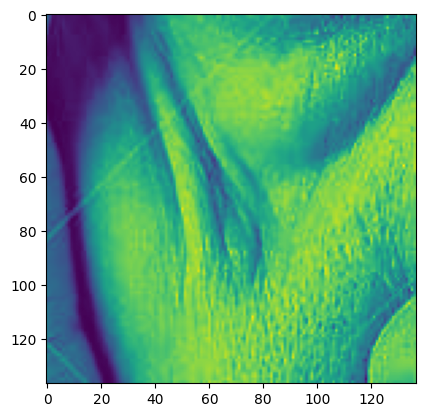

In [66]:
cropped_image = Image.fromarray(face_roi).convert('L')
cropped_image = np.array(cropped_image)
cropped_image.shape
plt.imshow(cropped_image)

In [54]:
final_image = cv2.resize(cropped_image, (48, 48))
final_image = np.expand_dims(final_image, axis=0)
final_image = np.expand_dims(final_image, axis=-1)
final_image = final_image / 255.0
final_image.shape


    img_rgb = np.array(img_rgb)
    img_gray = cv2.cvtColor(np.array(img_rgb), cv2.COLOR_BGR2GRAY)
    cropped_image = preprocess_crop_face(img_rgb, img_gray)

(1, 48, 48, 1)